# Project Overview

**Objective:** Prepare a prototype of a model to predict the amount of gold recovered from gold ore to help optimize the production and eliminate unprofitable parameters.

- Data provided is on extraction & purification

**Steps to Perform:**
- Prepare data
- Perform Analysis
- Develop/Train Model


# Technical Understanding

**How Gold is Extracted from Ore:**
- Mine the ore
- Primary Pocessing to get finely ground gold/ore mixture suspended in water 
- Floatation 
     - Rougher feed fed into flotation banks to obtain rougher Au concentrate and rougher tailings 
     - The stability of this process is affected by the volatile and non-optimal physicochemical state of the flotation pulp 
- Two-Stage Purification (Cleaning rougher concentrate)
    - Stage 1 of Cleaning
    - Stage 2 of Cleaning
- Final Concentrate & New Tails

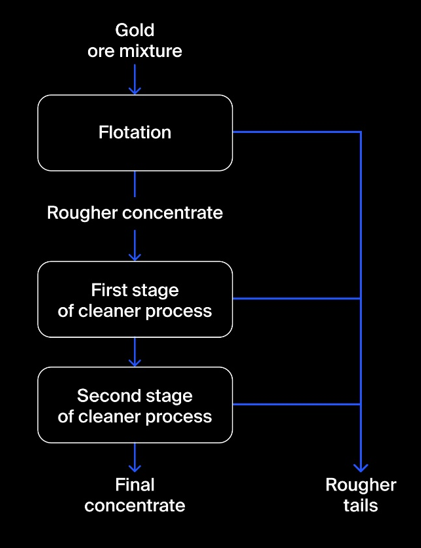

**Terminology Simplified:**
- Raw Material = Mined Ore
- Primary Processing = crushing and grinding
- Finely Ground Gold Ore Mixture Suspended in Water = Pulp/Slurry 
    - the Pulp/Slurry is made from the grounded ore & mixed with water and, **often** reagents; **BEFORE** fed into flotation bank
- Ore Pulp/Slurry = Rougher Feed
- Rougher Additions (Reagent Additions): flotation reagents added to the pulp/slurry (rougher feed) during conditioning or just before entering the rougher flotation bank.
        - Xanthate – collector (promoter/activator for sulfide mineral flotation)
        - Sodium Sulphide (Na₂S) – used here as a sulphidizing agent to improve flotation of certain minerals
        - Sodium Silicate – depressant (suppresses gangue minerals like silicates)
- Floataion = Rougher Process
- Rougher Au Concentrate = Product with Higher Concentration of Gold Particles Separated from Waste Minerals in the Ore
- Rougher Tailings = Product Residue with Low Concentration of Valuable Metal
- Flotation Pulp = Mixture of Solid Particles and Liquid
    - Solid Particles = the finely ground ore (containing both valuable minerals like gold and waste minerals)
    - Liquid = water plus any chemical reagents (collectors, frothers, modifiers)
- Two-Stage Purification = Cleaning Rougher Concentrate
- Final Concentrate = concentrated ore containing valuable metals (not yet refined gold/metal)
- New Tails = waste material after extraction

**Additional Terminology:**
- air amount = volume of air
- feed size = feed particle size

# Environment Setup & Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Download & Prepare the Data

In [2]:
# Download the Data

gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# View the data

display(gold_train)
display(gold_test)
display(gold_full)

date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
16855  2018-08-18 06:59:59                     3.224920   
16856  2018-08-18 07:59:59                     3.195978   
16857  2018-08-18 08:59:59                     3.109998   
16858  2018-08-18 09:59:59                     3.367241   
16859  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759   
3                         9.977019                      4.858634   
4                        10.142511                      4.939416   
...                            ...                           ...   
16855                    11.356233                      6.803482   
16856                    11.349355                      6.862249   
16857                    11.434366                      6.886013   
16858                    11.625587                      6.799433   
16859                    11.737832                      6.717509   

       final.output.concentrate_au  final.output.recovery  \
0                        42.192020              70.541216   
1                        42.701629              69.266198   
2                        42.657501              68.116445   
3                        42.689819              68.347543   
4                        42.774141              66.927016   
...                            ...                    ...   
16855                    46.713954              73.755150   
16856                    46.866780              69.049291   
16857                    46.795691              67.002189   
16858                    46.408188              65.523246   
16859                    46.299438              70.281454   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
0                 10.411962              0.895447              16.904297   
1                 10.462676              0.927452              16.634514   
2                 10.507046              0.953716              16.208849   
3                 10.422762              0.883763              16.532835   
4                 10.360302              0.792826              16.525686   
...                     ...                   ...                    ...   
16855              8.769645              3.141541              10.403181   
16856              8.897321              3.130493              10.549470   
16857              8.529606              2.911418              11.115147   
16858              8.777171              2.819214              10.463847   
16859              8.406690              2.517518              10.652193   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
0                  2.143149  ...                                 14.016835   
1                  2.224930  ...                                 13.992281   
2                  2.257889  ...                                 14.015015   
3                  2.146849  ...                                 14.036510   
4                  2.055292  ...                                 14.027298   
...                     ...  ...                                       ...   
16855              1.529220  ...                                 23.031497   
16856              1.612542  ...                                 22.960095   
16857              1.596616  ...                                 23.015718   
16858              1.602879  ...                                 23.02

date  primary_cleaner.input.sulfate  \
0     2016-09-01 00:59:59                     210.800909   
1     2016-09-01 01:59:59                     215.392455   
2     2016-09-01 02:59:59                     215.259946   
3     2016-09-01 03:59:59                     215.336236   
4     2016-09-01 04:59:59                     199.099327   
...                   ...                            ...   
5851  2017-12-31 19:59:59                     173.957757   
5852  2017-12-31 20:59:59                     172.910270   
5853  2017-12-31 21:59:59                     171.135718   
5854  2017-12-31 22:59:59                     179.697158   
5855  2017-12-31 23:59:59                     181.556856   

      primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                            14.993118                         8.080000   
1                            14.987471                         8.080000   
2                            12.884934                         7.786667   
3                            12.006805                         7.640000   
4                            10.682530                         7.530000   
...                                ...                              ...   
5851                         15.963399                         8.070000   
5852                         16.002605                         8.070000   
5853                         15.993669                         8.070000   
5854                         15.438979                         8.070000   
5855                         14.995850                         8.070000   

      primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                           1.005021                             1398.981301   
1                           0.990469                             1398.777912   
2                           0.996043                             1398.493666   
3                           0.863514                             1399.618111   
4                           0.805575                             1401.268123   
...                              ...                                     ...   
5851                        0.896701                             1401.930554   
5852                        0.896519                             1447.075722   
5853                        1.165996                             1498.836182   
5854                        1.501068                             1498.466243   
5855                        1.623454                             1498.096303   

      primary_cleaner.state.floatbank8_a_level  \
0                                  -500.225577   
1                                  -500.057435   
2                                  -500.868360   
3                                  -498.863574   
4                                  -500.808305   
...                                        ...   
5851                               -499.728848   
5852                               -494.716823   
5853                               -501.770403   
5854                               -500.483984   
5855                               -499.796922   

      primary_cleaner.state.floatbank8_b_air  \
0                                1399.144926   
1                                1398.055362   
2                                1398.860436   
3                                1397.440120   
4                                1398.128818   
...                                      ...   
5851                             1401.441445   
5852                             1448.851892   
5853                             1499.572353   
5854                             1497.986986   
5855                             1501.743791   

      primary_cleaner.state.floatbank8_b_level  \
0                                  -499.919735   
1                                  -499.778182   
2                                  -499.764529   
3                                  -499.211024   
4         

date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
22711  2018-08-18 06:59:59                     3.224920   
22712  2018-08-18 07:59:59                     3.195978   
22713  2018-08-18 08:59:59                     3.109998   
22714  2018-08-18 09:59:59                     3.367241   
22715  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                      5.383759   
3                         9.977019                      4.858634   
4                        10.142511                      4.939416   
...                            ...                           ...   
22711                    11.356233                      6.803482   
22712                    11.349355                      6.862249   
22713                    11.434366                      6.886013   
22714                    11.625587                      6.799433   
22715                    11.737832                      6.717509   

       final.output.concentrate_au  final.output.recovery  \
0                        42.192020              70.541216   
1                        42.701629              69.266198   
2                        42.657501              68.116445   
3                        42.689819              68.347543   
4                        42.774141              66.927016   
...                            ...                    ...   
22711                    46.713954              73.755150   
22712                    46.866780              69.049291   
22713                    46.795691              67.002189   
22714                    46.408188              65.523246   
22715                    46.299438              70.281454   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
0                 10.411962              0.895447              16.904297   
1                 10.462676              0.927452              16.634514   
2                 10.507046              0.953716              16.208849   
3                 10.422762              0.883763              16.532835   
4                 10.360302              0.792826              16.525686   
...                     ...                   ...                    ...   
22711              8.769645              3.141541              10.403181   
22712              8.897321              3.130493              10.549470   
22713              8.529606              2.911418              11.115147   
22714              8.777171              2.819214              10.463847   
22715              8.406690              2.517518              10.652193   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
0                  2.143149  ...                                 14.016835   
1                  2.224930  ...                                 13.992281   
2                  2.257889  ...                                 14.015015   
3                  2.146849  ...                                 14.036510   
4                  2.055292  ...                                 14.027298   
...                     ...  ...                                       ...   
22711              1.529220  ...                                 23.031497   
22712              1.612542  ...                                 22.960095   
22713              1.596616  ...                                 23.015718   
22714              1.602879  ...                                 23.02

In [4]:
# Understand the data
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


## Recovery & MAE Calculations

**Recovery Formula:** simulates the process of recovering gold from gold ore

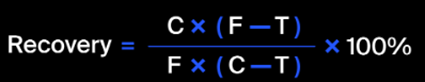

**C :** share of gold in the concentrate
- right after <u>floatation</u> (finds the **rougher** concentrate recovery) - [`rougher.output.concentrate_au`]
- right after <u>purification</u>  (finds the **final** concentrate recovery) - [`final.output.concentrate_au`]

**F :** share of gold in the feed
- right before <u>floatation</u> (finds **rougher**) - [`rougher.input.feed_au`]
- right after <u>floatation</u> (finds **final**) - [`rougher.output.concentrate_au`]

**T :** share of gold in the rougher tails
- right after <u>floatation</u> (finds **rougher**) - [`rougher.output.tail_au`]
- right after <u>purification</u>  (finds **final**) - [`final.output.tail_au`]

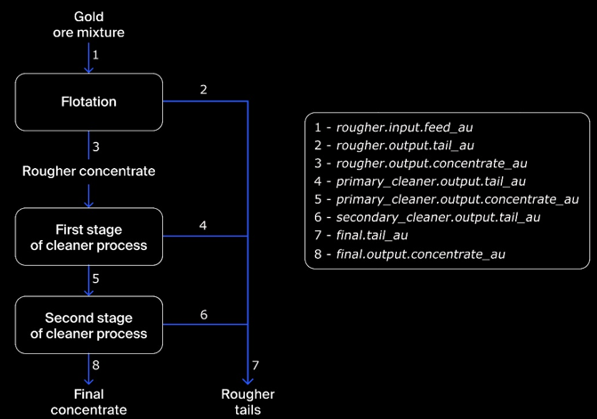

In [5]:
# Check that recovery is calculated correctly, from the training set, using `rougher.output.recovery`

# Define your rougher recovery function
def rougher_recovery(df):
    """Calculate recovery for a given dataframe."""

    # extract needed columns

    c = df['rougher.output.concentrate_au'] 
    f = df['rougher.input.feed_au'] 
    t = df['rougher.output.tail_au'] 
  


    # recovery formula
    rougher_recovery = ((c * (f - t)) / (f * (c - t))) * 100

    return rougher_recovery

display(rougher_recovery(gold_train))

# Define your final recovery function

def final_recovery(df):
    """Calculate recovery for a given dataframe."""

    # extract needed columns

    c1 = df['final.output.concentrate_au']
    f1 = df['rougher.output.concentrate_au']
    t1 = df['final.output.tail_au']


    # recovery formula
    final_recovery = ((c1 * (f1 - t1)) / (f1 * (c1 - t1))) * 100

    return final_recovery

display(final_recovery(gold_train))


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

0        93.944554
1        93.790501
2        93.509750
3        93.595268
4        93.811976
           ...    
16855    94.886132
16856    94.507593
16857    92.593426
16858    94.268532
16859    95.048379
Length: 16860, dtype: float64

In [6]:
# Define a function that shows how many correct/True or incorrect/False recovery calculations there are:

def bool_recovery(df):

    boolean = df['rougher.output.recovery'] == rougher_recovery(df)
    bool_count = boolean.value_counts()
    boolean1 = df['final.output.recovery'] == final_recovery(df)
    bool_count1 = boolean1.value_counts()

    return print(f"The Rougher Recovery Calculations Are: \n{bool_count}\n\nThe Final Recovery Calculations Are: \n{bool_count1}")


bool_recovery(gold_train)
    

The Rougher Recovery Calculations Are: 
False    10002
True      6858
dtype: int64

The Final Recovery Calculations Are: 
False    16314
True       546
dtype: int64


In [7]:
# Get the MAE values for the predicted (rougher_recovery()) and the actual (gold_train['rougher.output.recovery']) values.

predicted = rougher_recovery(gold_train)
actual = gold_train['rougher.output.recovery']

display(len(gold_train))
display(predicted.isna().sum())
display(actual.isna().sum())

# Fix the missing values to calculate MAE

# 1. Combine into one DF
pred_act_df = pd.DataFrame({'predicted_values_train': predicted, 'actual_values_train': actual})
display(pred_act_df)

# 2. Drop the NaN values
pred_act_df = pred_act_df.dropna()
display(pred_act_df)

# 3. Compute MAE
mae = mean_absolute_error(pred_act_df['actual_values_train'], pred_act_df['predicted_values_train'])
print(f"MAE for Rougher Recovery: {mae}")

16860

2283

2573

predicted_values_train  actual_values_train
0                   87.107763            87.107763
1                   86.843261            86.843261
2                   86.842308            86.842308
3                   87.226430            87.226430
4                   86.688794            86.688794
...                       ...                  ...
16855               89.574376            89.574376
16856               87.724007            87.724007
16857               88.890579            88.890579
16858               89.858126            89.858126
16859               89.514960            89.514960

[16860 rows x 2 columns]

predicted_values_train  actual_values_train
0                   87.107763            87.107763
1                   86.843261            86.843261
2                   86.842308            86.842308
3                   87.226430            87.226430
4                   86.688794            86.688794
...                       ...                  ...
16855               89.574376            89.574376
16856               87.724007            87.724007
16857               88.890579            88.890579
16858               89.858126            89.858126
16859               89.514960            89.514960

[14287 rows x 2 columns]

MAE for Rougher Recovery: 9.303415616264301e-15


In [8]:
# View the non-equal values
display(pred_act_df[pred_act_df['predicted_values_train'] != pred_act_df['actual_values_train']])

predicted_values_train  actual_values_train
1                   86.843261            86.843261
2                   86.842308            86.842308
5                   88.156912            88.156912
6                   88.168065            88.168065
8                   87.035862            87.035862
...                       ...                  ...
16849               91.675070            91.675070
16851               89.946627            89.946627
16854               91.816623            91.816623
16857               88.890579            88.890579
16859               89.514960            89.514960

[7429 rows x 2 columns]

In [9]:
gold_train['rougher.output.recovery'].isna().sum()

2573

In [10]:
# View the non-equal number that differ more than 1e^-20
display(np.isclose(pred_act_df['predicted_values_train'], pred_act_df['actual_values_train'], atol=1e-20).sum())

14287

**MAE Calculation & Rougher Recovery (Training Set):**


<u>Formula Accuracy Check</u>

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **Mean Absolute Error (MAE)** | 9.3e-15 | ~0% - Formula perfectly matches target values |
| **Values that differ** | 0 | All differences are floating-point rounding errors |
| **Values differing by > 1e-20** | 0 | Confirms perfect formula-target alignment |

<u>Dataset Overview</u>

| Category | Count | Percentage | Notes |
|----------|--------|------------|-------|
| **Total training rows** | 16,860 | 100% | Complete dataset size |
| **Valid formula results** | 14,287 | 84.7% | Rows where formula could be calculated |
| **NaN in formula results** | 2,283 | 13.5% | Due to missing required input columns |
| **NaN in target values** | 2,573 | 15.3% | Missing measurements in dataset |
| **Rows after dropping NaNs** | 14,287 | 84.7% | Final comparison dataset |

**Key Findings:**

| Finding | Status | Impact |
|---------|--------|---------|
| **Formula Accuracy** | ✅ Perfect | Known formula perfectly reproduces target values |
| **Data Coverage** | ⚠️ Good | 84.7% of data usable for comparison |
| **Missing Data Pattern** | ℹ️ Expected | NaN values are typical in industrial datasets |
| **Formula Reliability** | ✅ Excellent | Zero meaningful calculation errors detected |

---

**Summary**: The known formula demonstrates perfect accuracy when applied to the feature columns, with calculated values matching the target column within floating-point precision. This validates both the formula correctness and data quality for 84.7% of the dataset.

## Examine Unavailable Features

In [11]:
# Look at the columns in the test set and the training set to analyze the missing columns in the test set

display(gold_test.info())
print()
display(gold_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

None

In [12]:
# Display the number of columns in the training set and test set

display(len(gold_train.columns))
display(len(gold_test.columns))



87

53

In [13]:
# Missing values in the Training Set

with pd.option_context('display.max_rows', None):
    missing_values_train = gold_train.isna().sum()
    display(missing_values_train)

date                                                     0
final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 6

In [14]:
# Missing values in the Test Set

missing_values_test = gold_test.isna().sum()

In [15]:
# Find the columns not in the test set

missing_test_columns = set(gold_train.columns) - set(gold_test.columns)
missing_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [16]:
# Confirm the number of missing test columns

len(missing_test_columns)

34

**Training set:** 
- Columns: 87
- Rows: 16860


**Test Set:** 
- Columns: 53
- Rows: 5856
- Missing Columns: 34

**Both Sets:**
- DTypes: All float except date (object)
- Column w/ no NaN Values (2):
    - `date`
    - `primary_cleaner.input.feed_size`

**Features NOT in the Test Set (34):**
- final.output.concentrate_ag | Output (Final concentrate silver)
- final.output.concentrate_au | Output (Final concentrate gold)
- final.output.concentrate_pb | Output (Final concentrate lead)
- final.output.concentrate_sol | Output (Final concentrate solid)
- final.output.recovery | Target (Final recovery target)
- final.output.tail_ag | Output (Final tailings silver)
- final.output.tail_au | Output (Final tailings gold)
- final.output.tail_pb | Output (Final tailings lead)
- final.output.tail_sol | Output (Final tailings solid)
- primary_cleaner.output.concentrate_ag | Output (Primary cleaner concentrate silver)
- primary_cleaner.output.concentrate_au | Output (Primary cleaner concentrate gold)
- primary_cleaner.output.concentrate_pb | Output (Primary cleaner concentrate lead)
- primary_cleaner.output.concentrate_sol | Output (Primary cleaner concentrate solid)
- primary_cleaner.output.tail_ag | Output (Primary cleaner tailings silver)
- primary_cleaner.output.tail_au | Output (Primary cleaner tailings gold)
- primary_cleaner.output.tail_pb | Output (Primary cleaner tailings lead)
- primary_cleaner.output.tail_sol | Output (Primary cleaner tailings solid)
- rougher.calculation.au_pb_ratio | Calculations (Gold to lead ratio - data leakage)
- rougher.calculation.floatbank10_sulfate_to_au_feed | Calculations (Floatbank10 sulfate to gold feed ratio - data leakage)
- rougher.calculation.floatbank11_sulfate_to_au_feed | Calculations (Floatbank11 sulfate to gold feed ratio - data leakage)
- rougher.calculation.sulfate_to_au_concentrate | Calculations (Sulfate to gold concentrate ratio - data leakage)
- rougher.output.concentrate_ag | Output (Rougher concentrate silver)
- rougher.output.concentrate_au | Output (Rougher concentrate gold)
- rougher.output.concentrate_pb | Output (Rougher concentrate lead)
- rougher.output.concentrate_sol | Output (Rougher concentrate solid)
- rougher.output.recovery | Target (Rougher recovery target)
- rougher.output.tail_ag | Output (Rougher tailings silver)
- rougher.output.tail_au | Output (Rougher tailings gold)
- rougher.output.tail_pb | Output (Rougher tailings lead)
- rougher.output.tail_sol | Output (Rougher tailings solid)
- secondary_cleaner.output.tail_ag | Output (Secondary cleaner tailings silver)
- secondary_cleaner.output.tail_au | Output (Secondary cleaner tailings gold)
- secondary_cleaner.output.tail_pb | Output (Secondary cleaner tailings lead)
- secondary_cleaner.output.tail_sol | Output (Secondary cleaner tailings solid)

**Summary by Parameter Type:**

| Parameter Type | Count | Reason for Exclusion |
|----------------|-------|---------------------|
| **Output** | 28 | Features only known after processing, not available at prediction time |
| **Target** | 2 | Used for stage-specific predictions |
| **Calculations** | 4 | Dependent on outputs/targets → potential data leakage |

**Note:** All Float

## Process Data

**Known from previous code:**
- Fix date to datetime dtype (all datasets)
- Entries:
    - Train: 16,860 x 87
    - Test: 5,856 x 53
    - Full: 22,716 x 87

**Handle:**
- Missing Data
- Duplicate Data

In [17]:
# Missing Data

# Training Set
missing_values_train

# Test Set
missing_values_test

# Full Dataset
missing_values_full = gold_full.isna().sum()

In [18]:
# Full Set missing data
with pd.option_context('display.max_rows', None):
    display(missing_values_full)

date                                                     0
final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 7

In [19]:
# Get the percent & count of missing values for each column (Full Dataset)
percent_missing_full = (missing_values_full.values / 22716) * 100

missing_values_full_df = pd.DataFrame(missing_values_full, columns=['miss_cnt'])
percent_missing_full_df = pd.DataFrame(percent_missing_full, 
                                       index=missing_values_full.index, 
                                       columns=['pct_missing'])

missing_values_full_copy = missing_values_full_df.copy()

missing_values_full_copy = pd.concat([missing_values_full_copy, percent_missing_full_df],axis = 1)
missing_cp_full = missing_values_full_copy

In [20]:
# Get the percent & count of missing values for each column (Training set)
percent_missing_train = (missing_values_train.values / 16860) * 100

missing_values_train_df = pd.DataFrame(missing_values_train, columns = ['miss_cnt_train'])
percent_missing_train_df = pd.DataFrame(percent_missing_train,
                                        index = missing_values_train.index,
                                       columns = ['pct_missing_train'])

missing_cp_train = pd.concat([missing_values_train_df,percent_missing_train_df],axis = 1)
missing_cp_train

miss_cnt_train  pct_missing_train
date                                                     0           0.000000
final.output.concentrate_ag                             72           0.427046
final.output.concentrate_pb                             72           0.427046
final.output.concentrate_sol                           370           2.194543
final.output.concentrate_au                             71           0.421115
...                                                    ...                ...
secondary_cleaner.state.floatbank5_a_level              85           0.504152
secondary_cleaner.state.floatbank5_b_air                85           0.504152
secondary_cleaner.state.floatbank5_b_level              84           0.498221
secondary_cleaner.state.floatbank6_a_air               103           0.610913
secondary_cleaner.state.floatbank6_a_level              85           0.504152

[87 rows x 2 columns]

In [21]:
# Get the percent & count of missing values for each column (Test set)
percent_missing_test = (missing_values_test.values / 5836) * 100

missing_values_test_df = pd.DataFrame(missing_values_test, columns = ['miss_cnt_test'])
percent_missing_test_df = pd.DataFrame(percent_missing_test,
                                      index = missing_values_test.index,
                                      columns = ['pct_missing_test'])

missing_cp_test = pd.concat([missing_values_test_df,percent_missing_test_df], axis = 1)
display(missing_cp_test)

miss_cnt_test  pct_missing_test
date                                                    0          0.000000
primary_cleaner.input.sulfate                         302          5.174777
primary_cleaner.input.depressant                      284          4.866347
primary_cleaner.input.feed_size                         0          0.000000
primary_cleaner.input.xanthate                        166          2.844414
primary_cleaner.state.floatbank8_a_air                 16          0.274160
primary_cleaner.state.floatbank8_a_level               16          0.274160
primary_cleaner.state.floatbank8_b_air                 16          0.274160
primary_cleaner.state.floatbank8_b_level               16          0.274160
primary_cleaner.state.floatbank8_c_air                 16          0.274160
primary_cleaner.state.floatbank8_c_level               16          0.274160
primary_cleaner.state.floatbank8_d_air                 16          0.274160
primary_cleaner.state.floatbank8_d_level               16          0.274160
rougher.input.feed_ag                                  16          0.274160
rougher.input.feed_pb                                  16          0.274160
rougher.input.feed_rate                                40          0.685401
rougher.input.feed_size                                22          0.376971
rougher.input.feed_sol                                 67          1.148047
rougher.input.feed_au                                  16          0.274160
rougher.input.floatbank10_sulfate                     257          4.403701
rougher.input.floatbank10_xanthate                    123          2.107608
rougher.input.floatbank11_sulfate                      55          0.942426
rougher.input.floatbank11_xanthate                    353          6.048663
rougher.state.floatbank10_a_air                        17          0.291295
rougher.state.floatbank10_a_level                      16          0.274160
rougher.state.floatbank10_b_air                        17          0.291295
rougher.state.floatbank10_b_level                      16          0.274160
rougher.state.floatbank10_c_air                        17          0.291295
rougher.state.floatbank10_c_level                      16          0.274160
rougher.state.floatbank10_d_air                        17          0.291295
rougher.state.floatbank10_d_level                      16          0.274160
rougher.state.floatbank10_e_air                        17          0.291295
rougher.state.floatbank10_e_level                      16          0.274160
rougher.state.floatbank10_f_air                        17          0.291295
rougher.state.floatbank10_f_level                      16          0.274160
secondary_cleaner.state.floatbank2_a_air               20          0.342700
secondary_cleaner.state.floatbank2_a_level             16          0.274160
secondary_cleaner.state.floatbank2_b_air               23          0.394106
secondary_cleaner.state.floatbank2_b_level             16          0.274160
secondary_cleaner.state.floatbank3_a_air               34          0.582591
secondary_cleaner.state.floatbank3_a_level             16          0.274160
secondary_cleaner.state.floatbank3_b_air               16          0.274160
secondary_cleaner.state.floatbank3_b_level             16          0.274160
secondary_cleaner.state.floatbank4_a_air               16          0.274160
secondary_cleaner.state.floatbank4_a_level             16          0.274160
secondary_cleaner.state.floatbank4_b_air               16          0.274160
secondary_cleaner.state.floatbank4_b_level             16          0.274160
secondary_cleaner.state.floatbank5_a_air               16          0.274160
secondary_cleaner.state.floatbank5_a_level             16          0.274160
secondary_cleaner.state.floatbank5_b_air               16          0.274160
secondary_cleaner.state.floatbank5_b_level             16          0.274160
secondary_cleaner.state.floatbank6_a_air               16          0.274160
secondary_cleane

In [22]:
# Compare missing percentages
combined_missing = pd.concat([missing_cp_full,missing_cp_train, missing_cp_test], axis = 1)

combined_missing = combined_missing.round(3)

with pd.option_context('display.max_rows', None):
    display(combined_missing)


miss_cnt  pct_missing  \
date                                                       0        0.000   
final.output.concentrate_ag                               89        0.392   
final.output.concentrate_pb                               87        0.383   
final.output.concentrate_sol                             385        1.695   
final.output.concentrate_au                               86        0.379   
final.output.recovery                                   1963        8.641   
final.output.tail_ag                                      83        0.365   
final.output.tail_pb                                     200        0.880   
final.output.tail_sol                                    271        1.193   
final.output.tail_au                                      81        0.357   
primary_cleaner.input.sulfate                           1609        7.083   
primary_cleaner.input.depressant                        1546        6.806   
primary_cleaner.input.feed_size                            0        0.000   
primary_cleaner.input.xanthate                          1151        5.067   
primary_cleaner.output.concentrate_ag                     98        0.431   
primary_cleaner.output.concentrate_pb                    448        1.972   
primary_cleaner.output.concentrate_sol                   798        3.513   
primary_cleaner.output.concentrate_au                     98        0.431   
primary_cleaner.output.tail_ag                           102        0.449   
primary_cleaner.output.tail_pb                           122        0.537   
primary_cleaner.output.tail_sol                          351        1.545   
primary_cleaner.output.tail_au                            99        0.436   
primary_cleaner.state.floatbank8_a_air                    56        0.247   
primary_cleaner.state.floatbank8_a_level                  49        0.216   
primary_cleaner.state.floatbank8_b_air                    56        0.247   
primary_cleaner.state.floatbank8_b_level                  43        0.189   
primary_cleaner.state.floatbank8_c_air                    54        0.238   
primary_cleaner.state.floatbank8_c_level                  43        0.189   
primary_cleaner.state.floatbank8_d_air                    55        0.242   
primary_cleaner.state.floatbank8_d_level                  43        0.189   
rougher.calculation.sulfate_to_au_concentrate             44        0.194   
rougher.calculation.floatbank10_sulfate_to_au_feed        44        0.194   
rougher.calculation.floatbank11_sulfate_to_au_feed        44        0.194   
rougher.calculation.au_pb_ratio                         1627        7.162   
rougher.input.feed_ag                                     98        0.431   
rougher.input.feed_pb                                    244        1.074   
rougher.input.feed_rate                                  553        2.434   
rougher.input.feed_size                                  439        1.933   
rougher.input.feed_sol                                   359        1.580   
rougher.input.feed_au                                     99        0.436   
rougher.input.floatbank10_sulfate                       1301        5.727   
rougher.input.floatbank10_xanthate                       469        2.065   
rougher.input.floatbank11_sulfate                        678        2.985   
rougher.input.floatbank11_xanthate                      2257        9.936   
rougher.output.concentrate_ag                             98        0.431   
rougher.output.concentrate_pb                             98        0.431   
rougher.output.concentrate_sol                           190        0.836   
rougher.output.concentrate_au                             98        0.431   
rougher.output.recovery                                 3119       13.730   
rougher.output.tail_ag                                  2737       12.049   
rougher.output.tail_pb                                    98        0.431   
rougher.output.tail_sol                         

In [23]:
# Using this line of code to find percentage in specific categories <1%, 1-<5%, and so on

with pd.option_context('display.max_rows', None):
    display(combined_missing[combined_missing[['pct_missing','pct_missing_train', 'pct_missing_test']] >= 15.0])

miss_cnt  pct_missing  \
date                                                     NaN          NaN   
final.output.concentrate_ag                              NaN          NaN   
final.output.concentrate_pb                              NaN          NaN   
final.output.concentrate_sol                             NaN          NaN   
final.output.concentrate_au                              NaN          NaN   
final.output.recovery                                    NaN          NaN   
final.output.tail_ag                                     NaN          NaN   
final.output.tail_pb                                     NaN          NaN   
final.output.tail_sol                                    NaN          NaN   
final.output.tail_au                                     NaN          NaN   
primary_cleaner.input.sulfate                            NaN          NaN   
primary_cleaner.input.depressant                         NaN          NaN   
primary_cleaner.input.feed_size                          NaN          NaN   
primary_cleaner.input.xanthate                           NaN          NaN   
primary_cleaner.output.concentrate_ag                    NaN          NaN   
primary_cleaner.output.concentrate_pb                    NaN          NaN   
primary_cleaner.output.concentrate_sol                   NaN          NaN   
primary_cleaner.output.concentrate_au                    NaN          NaN   
primary_cleaner.output.tail_ag                           NaN          NaN   
primary_cleaner.output.tail_pb                           NaN          NaN   
primary_cleaner.output.tail_sol                          NaN          NaN   
primary_cleaner.output.tail_au                           NaN          NaN   
primary_cleaner.state.floatbank8_a_air                   NaN          NaN   
primary_cleaner.state.floatbank8_a_level                 NaN          NaN   
primary_cleaner.state.floatbank8_b_air                   NaN          NaN   
primary_cleaner.state.floatbank8_b_level                 NaN          NaN   
primary_cleaner.state.floatbank8_c_air                   NaN          NaN   
primary_cleaner.state.floatbank8_c_level                 NaN          NaN   
primary_cleaner.state.floatbank8_d_air                   NaN          NaN   
primary_cleaner.state.floatbank8_d_level                 NaN          NaN   
rougher.calculation.sulfate_to_au_concentrate            NaN          NaN   
rougher.calculation.floatbank10_sulfate_to_au_feed       NaN          NaN   
rougher.calculation.floatbank11_sulfate_to_au_feed       NaN          NaN   
rougher.calculation.au_pb_ratio                          NaN          NaN   
rougher.input.feed_ag                                    NaN          NaN   
rougher.input.feed_pb                                    NaN          NaN   
rougher.input.feed_rate                                  NaN          NaN   
rougher.input.feed_size                                  NaN          NaN   
rougher.input.feed_sol                                   NaN          NaN   
rougher.input.feed_au                                    NaN          NaN   
rougher.input.floatbank10_sulfate                        NaN          NaN   
rougher.input.floatbank10_xanthate                       NaN          NaN   
rougher.input.floatbank11_sulfate                        NaN          NaN   
rougher.input.floatbank11_xanthate                       NaN          NaN   
rougher.output.concentrate_ag                            NaN          NaN   
rougher.output.concentrate_pb                            NaN          NaN   
rougher.output.concentrate_sol                           NaN          NaN   
rougher.output.concentrate_au                            NaN          NaN   
rougher.output.recovery                                  NaN          NaN   
rougher.output.tail_ag                                   NaN          NaN   
rougher.output.tail_pb                                   NaN          NaN   
rougher.output.tail_sol                         

**MISSING DATA ANALYSIS SUMMARY**

<u>Percentage of Missing Data by Severity Level</u>

**< 1% Missing Data**

|Shared (Full / Train / Test)|
|----------------------------|

| Feature | Full % | Train % | Test % |
|---------|--------|---------|--------|
| date | 0.000 | 0.000 | 0.000 |
| primary_cleaner.input.feed_size | 0.000 | 0.000 | 0.000 |
| primary_cleaner.state.floatbank8_a_air | 0.247 | 0.237 | 0.274 |
| primary_cleaner.state.floatbank8_a_level | 0.216 | 0.196 | 0.274 |
| primary_cleaner.state.floatbank8_b_air | 0.247 | 0.237 | 0.274 |
| primary_cleaner.state.floatbank8_b_level | 0.189 | 0.160 | 0.274 |
| primary_cleaner.state.floatbank8_c_air | 0.238 | 0.225 | 0.274 |
| primary_cleaner.state.floatbank8_c_level | 0.189 | 0.160 | 0.274 |
| primary_cleaner.state.floatbank8_d_air | 0.242 | 0.231 | 0.274 |
| primary_cleaner.state.floatbank8_d_level | 0.189 | 0.160 | 0.274 |
| rougher.input.feed_ag | 0.431 | 0.486 | 0.274 |
| rougher.input.feed_au | 0.436 | 0.492 | 0.274 |
| rougher.state.floatbank10_a_air | 0.308 | 0.314 | 0.291 |
| rougher.state.floatbank10_a_level | 0.304 | 0.314 | 0.274 |
| rougher.state.floatbank10_b_air | 0.308 | 0.314 | 0.291 |
| rougher.state.floatbank10_b_level | 0.304 | 0.314 | 0.274 |
| rougher.state.floatbank10_c_air | 0.308 | 0.314 | 0.291 |
| rougher.state.floatbank10_c_level | 0.273 | 0.273 | 0.274 |
| rougher.state.floatbank10_d_air | 0.330 | 0.344 | 0.291 |
| rougher.state.floatbank10_d_level | 0.295 | 0.302 | 0.274 |
| rougher.state.floatbank10_e_level | 0.295 | 0.302 | 0.274 |
| rougher.state.floatbank10_f_air | 0.330 | 0.344 | 0.291 |
| rougher.state.floatbank10_f_level | 0.326 | 0.344 | 0.274 |
| secondary_cleaner.state.floatbank2_a_level | 0.550 | 0.647 | 0.274 |
| secondary_cleaner.state.floatbank2_b_air | 0.784 | 0.919 | 0.394 |
| secondary_cleaner.state.floatbank2_b_level | 0.563 | 0.664 | 0.274 |
| secondary_cleaner.state.floatbank3_a_air | 0.577 | 0.575 | 0.583 |
| secondary_cleaner.state.floatbank3_a_level | 0.568 | 0.670 | 0.274 |
| secondary_cleaner.state.floatbank3_b_air | 0.546 | 0.641 | 0.274 |
| secondary_cleaner.state.floatbank3_b_level | 0.555 | 0.652 | 0.274 |
| secondary_cleaner.state.floatbank4_a_air | 0.638 | 0.765 | 0.274 |
| secondary_cleaner.state.floatbank4_a_level | 0.568 | 0.670 | 0.274 |
| secondary_cleaner.state.floatbank4_b_air | 0.475 | 0.546 | 0.274 |
| secondary_cleaner.state.floatbank4_b_level | 0.480 | 0.552 | 0.274 |
| secondary_cleaner.state.floatbank5_a_air | 0.445 | 0.504 | 0.274 |
| secondary_cleaner.state.floatbank5_a_level | 0.445 | 0.504 | 0.274 |
| secondary_cleaner.state.floatbank5_b_air | 0.445 | 0.504 | 0.274 |
| secondary_cleaner.state.floatbank5_b_level | 0.440 | 0.498 | 0.274 |
| secondary_cleaner.state.floatbank6_a_air | 0.524 | 0.611 | 0.274 |
| secondary_cleaner.state.floatbank6_a_level | 0.445 | 0.504 | 0.274 |

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| final.output.concentrate_ag | 0.392 | 0.427 |
| final.output.concentrate_pb | 0.383 | 0.427 |
| final.output.concentrate_au | 0.379 | 0.421 |
| final.output.tail_ag | 0.365 | 0.391 |
| final.output.tail_au | 0.357 | 0.391 |
| primary_cleaner.output.concentrate_ag | 0.431 | 0.486 |
| primary_cleaner.output.concentrate_au | 0.431 | 0.486 |
| primary_cleaner.output.tail_ag | 0.449 | 0.492 |
| primary_cleaner.output.tail_pb | 0.537 | 0.587 |
| primary_cleaner.output.tail_au | 0.436 | 0.492 |
| rougher.calculation.sulfate_to_au_concentrate | 0.194 | 0.160 |
| rougher.calculation.floatbank10_sulfate_to_au_feed | 0.194 | 0.160 |
| rougher.calculation.floatbank11_sulfate_to_au_feed | 0.194 | 0.160 |
| rougher.output.concentrate_ag | 0.431 | 0.486 |
| rougher.output.concentrate_pb | 0.431 | 0.486 |
| rougher.output.concentrate_sol | 0.836 | 0.961 |
| rougher.output.concentrate_au | 0.431 | 0.486 |
| rougher.output.tail_pb | 0.431 | 0.486 |
| secondary_cleaner.output.tail_ag | 0.440 | 0.498 |
| secondary_cleaner.output.tail_pb | 0.511 | 0.569 |
| secondary_cleaner.output.tail_au | 0.431 | 0.486 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | final.output.tail_pb | 0.880 |
| **Train Only** | final.output.tail_sol | 0.860 |
| **Test Only** | rougher.input.feed_pb | 0.274 |
| **Test Only** | rougher.input.feed_rate | 0.685 |
| **Test Only** | rougher.input.feed_size | 0.377 |
| **Test Only** | rougher.input.floatbank11_sulfate | 0.942 |
| **Test Only** | rougher.state.floatbank10_e_air | 0.291 |
| **Test Only** | secondary_cleaner.state.floatbank2_a_air | 0.343 |

**1% - < 5% Missing Data**

|Shared (Full / Train / Test)|
|----------------------------|

| Feature | Full % | Train % | Test % |
|---------|--------|---------|--------|
| rougher.input.feed_sol | 1.580 | 1.732 | 1.148 |
| rougher.input.floatbank10_xanthate | 2.065 | 2.052 | 2.108 |

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| final.output.concentrate_sol | 1.695 | 2.195 |
| primary_cleaner.output.concentrate_pb | 1.972 | 2.123 |
| primary_cleaner.output.concentrate_sol | 3.513 | 3.772 |
| primary_cleaner.output.tail_sol | 1.545 | 1.667 |
| rougher.input.feed_pb | 1.074 | 1.352 |
| rougher.input.feed_rate | 2.434 | 3.043 |
| rougher.input.feed_size | 1.933 | 2.473 |
| rougher.input.floatbank11_sulfate | 2.985 | 3.695 |
| rougher.state.floatbank10_e_air | 2.729 | 3.577 |
| secondary_cleaner.state.floatbank2_a_air | 1.686 | 2.153 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | final.output.tail_sol | 1.193 |
| **Train Only** | final.output.tail_pb | 1.085 |
| **Test Only** | primary_cleaner.input.depressant | 4.866 |
| **Test Only** | primary_cleaner.input.xanthate | 2.844 |
| **Test Only** | rougher.input.floatbank10_sulfate | 4.404 |

**5% - < 10% Missing Data**

|Shared (Full / Train / Test)|
|----------------------------|

| Feature | Full % | Train % | Test % |
|---------|--------|---------|--------|
| primary_cleaner.input.sulfate | 7.083 | 7.752 | 5.175 |

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| final.output.recovery | 8.641 | 9.021 |
| primary_cleaner.input.depressant | 6.806 | 7.485 |
| primary_cleaner.input.xanthate | 5.067 | 5.842 |
| rougher.calculation.au_pb_ratio | 7.162 | 7.367 |
| rougher.input.floatbank10_sulfate | 5.727 | 6.192 |

|Full & Test Only|
|----------------|

| Feature | Full % | Test % |
|---------|--------|--------|
| rougher.input.floatbank11_xanthate | 9.936 | 6.049 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | secondary_cleaner.output.tail_sol | 9.751 |

**10% - < 15% Missing Data**

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| rougher.output.tail_ag | 12.049 | 13.345 |
| rougher.output.tail_sol | 12.044 | 13.339 |
| rougher.output.tail_au | 12.044 | 13.339 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | rougher.output.recovery | 13.730 |
| **Train Only** | rougher.input.floatbank11_xanthate | 11.293 |
| **Train Only** | secondary_cleaner.output.tail_sol | 11.779 |

**≥ 15% Missing Data**

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Train Only** | rougher.output.recovery | 15.261 |

---

**Summary Statistics**

| Dataset | Total Features | Features with Missing Data | Complete Features |
|---------|---------------|----------------------------|-------------------|
| **Full Dataset** | 87 | 85 | 2 |
| **Training Set** | 87 | 85 | 2 |
| **Test Set** | 53 | 51 | 2 |

| Missing bins    | All | Full | Train | Test | Full + Train | Full + Test |
| --------------- | --- | ---- | ----- | ---- | ------------ | ----------- |
| **< 1%**        | 40  | 1    | 1     | 6    | 21           | –           |
| **1 – < 5%**    | 2   | 1    | 1     | 3    | 10           | –           |
| **5 – < 10%**   | 1   | 1    | –     | –    | 5            | 1           |
| **10 – < 15%**  | –   | 1    | 2     | –    | 3            | –           |
| **≥ 15%**       | –   | –    | –     | 1    | –            | –           |
| **Total**       | 43  | 4    | 5     | 9    | 39           | 1           |

<u>General Threshold Meaning</u>
- **< 1%** : Negligible (Imputaion almost never necessary)
- **1 - < 5%** : Minor (Imputation sometimes necessary)
- **5 - < 10%** : Intermediate (Imputation usually necessary)
- **10 - < 15%** : High (Imputation often necessary)
- **≥ 15%** : Extremely High (Imputation almost always necessary)

**Note:** Features marked as "Full & Train Only" or some "Full Only" features do not exist in the test set as they are output/target/calculation features excluded for prediction tasks.

**MISSING DATA BY DATASET AND SEVERITY LEVEL**

**<u>Full Dataset Missing Data Distribution</u>**

**< 1% Missing Data (62 features)**

| Feature | Percentage |
|---------|------------|
| date | 0.000 |
| primary_cleaner.input.feed_size | 0.000 |
| primary_cleaner.state.floatbank8_b_level | 0.189 |
| primary_cleaner.state.floatbank8_c_level | 0.189 |
| primary_cleaner.state.floatbank8_d_level | 0.189 |
| rougher.calculation.sulfate_to_au_concentrate | 0.194 |
| rougher.calculation.floatbank10_sulfate_to_au_feed | 0.194 |
| rougher.calculation.floatbank11_sulfate_to_au_feed | 0.194 |
| primary_cleaner.state.floatbank8_a_level | 0.216 |
| primary_cleaner.state.floatbank8_c_air | 0.238 |
| primary_cleaner.state.floatbank8_d_air | 0.242 |
| primary_cleaner.state.floatbank8_a_air | 0.247 |
| primary_cleaner.state.floatbank8_b_air | 0.247 |
| rougher.state.floatbank10_c_level | 0.273 |
| rougher.state.floatbank10_d_level | 0.295 |
| rougher.state.floatbank10_e_level | 0.295 |
| rougher.state.floatbank10_a_level | 0.304 |
| rougher.state.floatbank10_b_level | 0.304 |
| rougher.state.floatbank10_a_air | 0.308 |
| rougher.state.floatbank10_b_air | 0.308 |
| rougher.state.floatbank10_c_air | 0.308 |
| rougher.state.floatbank10_f_level | 0.326 |
| rougher.state.floatbank10_d_air | 0.330 |
| rougher.state.floatbank10_f_air | 0.330 |
| final.output.tail_au | 0.357 |
| final.output.tail_ag | 0.365 |
| final.output.concentrate_au | 0.379 |
| final.output.concentrate_pb | 0.383 |
| final.output.concentrate_ag | 0.392 |
| rougher.input.feed_ag | 0.431 |
| primary_cleaner.output.concentrate_ag | 0.431 |
| primary_cleaner.output.concentrate_au | 0.431 |
| rougher.output.concentrate_ag | 0.431 |
| rougher.output.concentrate_pb | 0.431 |
| rougher.output.concentrate_au | 0.431 |
| rougher.output.tail_pb | 0.431 |
| secondary_cleaner.output.tail_au | 0.431 |
| primary_cleaner.output.tail_au | 0.436 |
| rougher.input.feed_au | 0.436 |
| secondary_cleaner.output.tail_ag | 0.440 |
| secondary_cleaner.state.floatbank5_b_level | 0.440 |
| secondary_cleaner.state.floatbank5_a_air | 0.445 |
| secondary_cleaner.state.floatbank5_a_level | 0.445 |
| secondary_cleaner.state.floatbank5_b_air | 0.445 |
| secondary_cleaner.state.floatbank6_a_level | 0.445 |
| primary_cleaner.output.tail_ag | 0.449 |
| secondary_cleaner.state.floatbank4_b_air | 0.475 |
| secondary_cleaner.state.floatbank4_b_level | 0.480 |
| secondary_cleaner.output.tail_pb | 0.511 |
| secondary_cleaner.state.floatbank6_a_air | 0.524 |
| primary_cleaner.output.tail_pb | 0.537 |
| secondary_cleaner.state.floatbank3_b_air | 0.546 |
| secondary_cleaner.state.floatbank2_a_level | 0.550 |
| secondary_cleaner.state.floatbank3_b_level | 0.555 |
| secondary_cleaner.state.floatbank2_b_level | 0.563 |
| secondary_cleaner.state.floatbank3_a_level | 0.568 |
| secondary_cleaner.state.floatbank4_a_level | 0.568 |
| secondary_cleaner.state.floatbank3_a_air | 0.577 |
| secondary_cleaner.state.floatbank4_a_air | 0.638 |
| secondary_cleaner.state.floatbank2_b_air | 0.784 |
| rougher.output.concentrate_sol | 0.836 |
| final.output.tail_pb | 0.880 |

**1% - < 5% Missing Data (14 features)**

| Feature | Percentage |
|---------|------------|
| rougher.input.feed_pb | 1.074 |
| final.output.tail_sol | 1.193 |
| primary_cleaner.output.tail_sol | 1.545 |
| rougher.input.feed_sol | 1.580 |
| secondary_cleaner.state.floatbank2_a_air | 1.686 |
| final.output.concentrate_sol | 1.695 |
| rougher.input.feed_size | 1.933 |
| primary_cleaner.output.concentrate_pb | 1.972 |
| rougher.input.floatbank10_xanthate | 2.065 |
| rougher.input.feed_rate | 2.434 |
| rougher.state.floatbank10_e_air | 2.729 |
| rougher.input.floatbank11_sulfate | 2.985 |
| primary_cleaner.output.concentrate_sol | 3.513 |
| primary_cleaner.input.xanthate | 5.067 |

**5% - < 10% Missing Data (7 features)**

| Feature | Percentage |
|---------|------------|
| rougher.input.floatbank10_sulfate | 5.727 |
| primary_cleaner.input.depressant | 6.806 |
| primary_cleaner.input.sulfate | 7.083 |
| rougher.calculation.au_pb_ratio | 7.162 |
| final.output.recovery | 8.641 |
| secondary_cleaner.output.tail_sol | 9.751 |
| rougher.input.floatbank11_xanthate | 9.936 |

**10% - < 15% Missing Data (4 features)**

| Feature | Percentage |
|---------|------------|
| rougher.output.tail_sol | 12.044 |
| rougher.output.tail_au | 12.044 |
| rougher.output.tail_ag | 12.049 |
| rougher.output.recovery | 13.730 |

**≥ 15% Missing Data (0 features)**

*No features in the Full dataset have ≥ 15% missing data.*

---

**<u>Training Dataset Missing Data Distribution</u>**

**< 1% Missing Data (62 features)**

| Feature | Percentage |
|---------|------------|
| date | 0.000 |
| primary_cleaner.input.feed_size | 0.000 |
| rougher.calculation.sulfate_to_au_concentrate | 0.160 |
| rougher.calculation.floatbank10_sulfate_to_au_feed | 0.160 |
| rougher.calculation.floatbank11_sulfate_to_au_feed | 0.160 |
| primary_cleaner.state.floatbank8_b_level | 0.160 |
| primary_cleaner.state.floatbank8_c_level | 0.160 |
| primary_cleaner.state.floatbank8_d_level | 0.160 |
| primary_cleaner.state.floatbank8_a_level | 0.196 |
| primary_cleaner.state.floatbank8_c_air | 0.225 |
| primary_cleaner.state.floatbank8_d_air | 0.231 |
| primary_cleaner.state.floatbank8_a_air | 0.237 |
| primary_cleaner.state.floatbank8_b_air | 0.237 |
| rougher.state.floatbank10_c_level | 0.273 |
| rougher.state.floatbank10_d_level | 0.302 |
| rougher.state.floatbank10_e_level | 0.302 |
| rougher.state.floatbank10_a_level | 0.314 |
| rougher.state.floatbank10_b_level | 0.314 |
| rougher.state.floatbank10_a_air | 0.314 |
| rougher.state.floatbank10_b_air | 0.314 |
| rougher.state.floatbank10_c_air | 0.314 |
| rougher.state.floatbank10_d_air | 0.344 |
| rougher.state.floatbank10_f_level | 0.344 |
| rougher.state.floatbank10_f_air | 0.344 |
| final.output.tail_au | 0.391 |
| final.output.tail_ag | 0.391 |
| final.output.concentrate_au | 0.421 |
| final.output.concentrate_pb | 0.427 |
| final.output.concentrate_ag | 0.427 |
| primary_cleaner.output.concentrate_ag | 0.486 |
| primary_cleaner.output.concentrate_au | 0.486 |
| rougher.output.concentrate_ag | 0.486 |
| rougher.output.concentrate_pb | 0.486 |
| rougher.output.concentrate_au | 0.486 |
| rougher.output.tail_pb | 0.486 |
| secondary_cleaner.output.tail_au | 0.486 |
| rougher.input.feed_ag | 0.486 |
| primary_cleaner.output.tail_au | 0.492 |
| primary_cleaner.output.tail_ag | 0.492 |
| rougher.input.feed_au | 0.492 |
| secondary_cleaner.output.tail_ag | 0.498 |
| secondary_cleaner.state.floatbank5_b_level | 0.498 |
| secondary_cleaner.state.floatbank5_a_air | 0.504 |
| secondary_cleaner.state.floatbank5_a_level | 0.504 |
| secondary_cleaner.state.floatbank5_b_air | 0.504 |
| secondary_cleaner.state.floatbank6_a_level | 0.504 |
| secondary_cleaner.state.floatbank4_b_air | 0.546 |
| secondary_cleaner.state.floatbank4_b_level | 0.552 |
| secondary_cleaner.output.tail_pb | 0.569 |
| secondary_cleaner.state.floatbank3_a_air | 0.575 |
| primary_cleaner.output.tail_pb | 0.587 |
| secondary_cleaner.state.floatbank6_a_air | 0.611 |
| secondary_cleaner.state.floatbank3_b_air | 0.641 |
| secondary_cleaner.state.floatbank2_a_level | 0.647 |
| secondary_cleaner.state.floatbank3_b_level | 0.652 |
| secondary_cleaner.state.floatbank2_b_level | 0.664 |
| secondary_cleaner.state.floatbank3_a_level | 0.670 |
| secondary_cleaner.state.floatbank4_a_level | 0.670 |
| secondary_cleaner.state.floatbank4_a_air | 0.765 |
| final.output.tail_sol | 0.860 |
| secondary_cleaner.state.floatbank2_b_air | 0.919 |
| rougher.output.concentrate_sol | 0.961 |

**1% - < 5% Missing Data (14 features)**

| Feature | Percentage |
|---------|------------|
| final.output.tail_pb | 1.085 |
| rougher.input.feed_pb | 1.352 |
| primary_cleaner.output.tail_sol | 1.667 |
| rougher.input.feed_sol | 1.732 |
| rougher.input.floatbank10_xanthate | 2.052 |
| secondary_cleaner.state.floatbank2_a_air | 2.153 |
| final.output.concentrate_sol | 2.195 |
| primary_cleaner.output.concentrate_pb | 2.123 |
| rougher.input.feed_size | 2.473 |
| rougher.input.feed_rate | 3.043 |
| rougher.state.floatbank10_e_air | 3.577 |
| rougher.input.floatbank11_sulfate | 3.695 |
| primary_cleaner.output.concentrate_sol | 3.772 |
| primary_cleaner.input.xanthate | 5.842 |

**5% - < 10% Missing Data (5 features)**

| Feature | Percentage |
|---------|------------|
| rougher.input.floatbank10_sulfate | 6.192 |
| rougher.calculation.au_pb_ratio | 7.367 |
| primary_cleaner.input.depressant | 7.485 |
| primary_cleaner.input.sulfate | 7.752 |
| final.output.recovery | 9.021 |

**10% - < 15% Missing Data (5 features)**

| Feature | Percentage |
|---------|------------|
| rougher.input.floatbank11_xanthate | 11.293 |
| secondary_cleaner.output.tail_sol | 11.779 |
| rougher.output.tail_sol | 13.339 |
| rougher.output.tail_au | 13.339 |
| rougher.output.tail_ag | 13.345 |

**≥ 15% Missing Data (1 feature)**

| Feature | Percentage |
|---------|------------|
| rougher.output.recovery | 15.261 |

---

**<u>Test Dataset Missing Data Distribution</u>**

**< 1% Missing Data (45 features)**

| Feature | Percentage |
|---------|------------|
| date | 0.000 |
| primary_cleaner.input.feed_size | 0.000 |
| primary_cleaner.state.floatbank8_a_air | 0.274 |
| primary_cleaner.state.floatbank8_a_level | 0.274 |
| primary_cleaner.state.floatbank8_b_air | 0.274 |
| primary_cleaner.state.floatbank8_b_level | 0.274 |
| primary_cleaner.state.floatbank8_c_air | 0.274 |
| primary_cleaner.state.floatbank8_c_level | 0.274 |
| primary_cleaner.state.floatbank8_d_air | 0.274 |
| primary_cleaner.state.floatbank8_d_level | 0.274 |
| rougher.input.feed_ag | 0.274 |
| rougher.input.feed_pb | 0.274 |
| rougher.input.feed_au | 0.274 |
| rougher.state.floatbank10_a_level | 0.274 |
| rougher.state.floatbank10_b_level | 0.274 |
| rougher.state.floatbank10_c_level | 0.274 |
| rougher.state.floatbank10_d_level | 0.274 |
| rougher.state.floatbank10_e_level | 0.274 |
| rougher.state.floatbank10_f_level | 0.274 |
| secondary_cleaner.state.floatbank2_a_level | 0.274 |
| secondary_cleaner.state.floatbank2_b_level | 0.274 |
| secondary_cleaner.state.floatbank3_a_level | 0.274 |
| secondary_cleaner.state.floatbank3_b_level | 0.274 |
| secondary_cleaner.state.floatbank4_a_air | 0.274 |
| secondary_cleaner.state.floatbank4_a_level | 0.274 |
| secondary_cleaner.state.floatbank4_b_air | 0.274 |
| secondary_cleaner.state.floatbank4_b_level | 0.274 |
| secondary_cleaner.state.floatbank5_a_air | 0.274 |
| secondary_cleaner.state.floatbank5_a_level | 0.274 |
| secondary_cleaner.state.floatbank5_b_air | 0.274 |
| secondary_cleaner.state.floatbank5_b_level | 0.274 |
| secondary_cleaner.state.floatbank6_a_air | 0.274 |
| secondary_cleaner.state.floatbank6_a_level | 0.274 |
| rougher.state.floatbank10_a_air | 0.291 |
| rougher.state.floatbank10_b_air | 0.291 |
| rougher.state.floatbank10_c_air | 0.291 |
| rougher.state.floatbank10_d_air | 0.291 |
| rougher.state.floatbank10_e_air | 0.291 |
| rougher.state.floatbank10_f_air | 0.291 |
| secondary_cleaner.state.floatbank2_a_air | 0.343 |
| rougher.input.feed_size | 0.377 |
| secondary_cleaner.state.floatbank2_b_air | 0.394 |
| secondary_cleaner.state.floatbank3_a_air | 0.583 |
| rougher.input.feed_rate | 0.685 |
| rougher.input.floatbank11_sulfate | 0.942 |

**1% - < 5% Missing Data (5 features)**

| Feature | Percentage |
|---------|------------|
| rougher.input.feed_sol | 1.148 |
| rougher.input.floatbank10_xanthate | 2.108 |
| primary_cleaner.input.xanthate | 2.844 |
| rougher.input.floatbank10_sulfate | 4.404 |
| primary_cleaner.input.depressant | 4.866 |

**5% - < 10% Missing Data (2 features)**

| Feature | Percentage |
|---------|------------|
| primary_cleaner.input.sulfate | 5.175 |
| rougher.input.floatbank11_xanthate | 6.049 |

**10% - < 15% Missing Data (0 features)**

*No features in the Test dataset have 10% - < 15% missing data.*

**≥ 15% Missing Data (0 features)**

*No features in the Test dataset have ≥ 15% missing data.*

---


**Dataset Comparison Summary**

| Missing Data Level | Full Dataset | Training Dataset | Test Dataset |
|--------------------|--------------|------------------|--------------|
| **< 1%** | 62 features | 62 features | 45 features |
| **1% - < 5%** | 14 features | 14 features | 5 features |
| **5% - < 10%** | 7 features | 5 features | 2 features |
| **10% - < 15%** | 4 features | 5 features | 0 features |
| **≥ 15%** | 0 features | 1 feature | 0 features |
| **Total with Missing Data** | 87 features | 87 features | 53 features |

| Missing Data Level | Full Dataset | Training Dataset | Test Dataset |
|--------------------|--------------|------------------|--------------|
| **< 1%** | 71.26% | 71.26% | 84.91% |
| **1% - < 5%** | 16.10% | 16.10% | 9.43% |
| **5% - < 10%** | 8.05% | 5.75%  | 3.77% |
| **10% - < 15%** | 4.60% | 5.57%  | 0%  |
| **≥ 15%** | 0% | 1.15%  | 0%  |
| **Total with Missing Data** | 87 features | 87 features | 53 features |


**Key Insights:**
- Test dataset appears cleaner because it excludes 34 output/target/calculation features, which are the primary source of high missingness in the Full and Training sets.
- Shared features show similar data quality across datasets, with the Test set sometimes performing slightly better on input features.
- Training dataset reveals the full scope of missing data, including the most problematic target feature (rougher.output.recovery, 15.26% missing).
- Output and calculation features consistently drive higher missing rates, while predictor (input) features remain relatively complete.
- Excluded features explain most severe missing data issues, confirming that the Test set is intentionally designed for clean model evaluation.

**Distribution of Missing Values**
- Negligible (< 1%): Full & Train ~71% of features; Test ~85% → most data is very clean.
- Moderate (1–<10%): Full: ~24% (21); Train: ~22% (19); Test: ~13% (7) → mostly input features; manageable with simple imputation.
- Severe (≥ 10%): Full: ~5% (4 features), Train: ~7% (6 features) → all outputs/calculations. Test: (N/A) → explains clean profile.

**Modeling Impact**
- Predictor features: Low missingness (< 5%) → imputation straightforward and unlikely to distort results.
- Target/output features: Higher missingness but not used for prediction → no direct risk to training or model reliability.


## Fix Missing Values

- The highest percent of missing values is for `rougher.output.recovery` in the Training Set (15.26%) and the Full Dataset (13.73%)
- Target = final.output.recovery

In [24]:

# Get rid of the target Nan values `

# Training Dataset 

# View the NaN values for final.output.recovery (1,521 - 9.06% of data)
display(gold_train['final.output.recovery'].isna().sum())

# Drop the NaN values in final.output.recovery
train_target_df = pd.DataFrame(gold_train['final.output.recovery'].dropna())
display(train_target_df)

# Combine the original DF with train_target_df
gold_train_new = train_target_df.join(gold_train.drop(columns = ['final.output.recovery']), how = 'left')
display(gold_train_new)



1521

final.output.recovery
0                  70.541216
1                  69.266198
2                  68.116445
3                  68.347543
4                  66.927016
...                      ...
16855              73.755150
16856              69.049291
16857              67.002189
16858              65.523246
16859              70.281454

[15339 rows x 1 columns]

final.output.recovery                 date  \
0                  70.541216  2016-01-15 00:00:00   
1                  69.266198  2016-01-15 01:00:00   
2                  68.116445  2016-01-15 02:00:00   
3                  68.347543  2016-01-15 03:00:00   
4                  66.927016  2016-01-15 04:00:00   
...                      ...                  ...   
16855              73.755150  2018-08-18 06:59:59   
16856              69.049291  2018-08-18 07:59:59   
16857              67.002189  2018-08-18 08:59:59   
16858              65.523246  2018-08-18 09:59:59   
16859              70.281454  2018-08-18 10:59:59   

       final.output.concentrate_ag  final.output.concentrate_pb  \
0                         6.055403                     9.889648   
1                         6.029369                     9.968944   
2                         6.055926                    10.213995   
3                         6.047977                     9.977019   
4                         6.148599                    10.142511   
...                            ...                          ...   
16855                     3.224920                    11.356233   
16856                     3.195978                    11.349355   
16857                     3.109998                    11.434366   
16858                     3.367241                    11.625587   
16859                     3.598375                    11.737832   

       final.output.concentrate_sol  final.output.concentrate_au  \
0                          5.507324                    42.192020   
1                          5.257781                    42.701629   
2                          5.383759                    42.657501   
3                          4.858634                    42.689819   
4                          4.939416                    42.774141   
...                             ...                          ...   
16855                      6.803482                    46.713954   
16856                      6.862249                    46.866780   
16857                      6.886013                    46.795691   
16858                      6.799433                    46.408188   
16859                      6.717509                    46.299438   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
0                 10.411962              0.895447              16.904297   
1                 10.462676              0.927452              16.634514   
2                 10.507046              0.953716              16.208849   
3                 10.422762              0.883763              16.532835   
4                 10.360302              0.792826              16.525686   
...                     ...                   ...                    ...   
16855              8.769645              3.141541              10.403181   
16856              8.897321              3.130493              10.549470   
16857              8.529606              2.911418              11.115147   
16858              8.777171              2.819214              10.463847   
16859              8.406690              2.517518              10.652193   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
0                  2.143149  ...                                 14.016835   
1                  2.224930  ...                                 13.992281   
2                  2.257889  ...                                 14.015015   
3                  2.146849  ...                                 14.036510   
4                  2.055292  ...                                 14.027298   
...                     ...  ...                                       ...   
16855              1.529220  ...                                 23.031497   
16856              1.612542  ...                                 22.960095   
16857              1.596616  ...                                 23.015718   
16858              1.602879  ...                       

In [25]:
# Training Dataset

# Look at the missing values and re-determine percentage
new_missing_count = gold_train_new.isna().sum()

# Separates and calculates the pct values
new_missing_count_array = (new_missing_count.values / 15339) * 100

# Creates a DF w/ just the index(columns in this case) with the missing count
new_missing_count_df = pd.DataFrame(new_missing_count, columns = ['missing_cnt'])

# Creates a DF w/ just the index(columns in this case) with the missing percent
new_missing_count_2 = pd.DataFrame(new_missing_count_array, index = new_missing_count_df.index, columns = ['missing_pct'])

# Combines the 2 DF's to show count and percent missing
new_missing_count_df = pd.concat([new_missing_count_df,new_missing_count_2], axis = 1)

In [26]:
# Look at missing_pct that is greater than or equal to 1 
new_missing_count_df[new_missing_count_df['missing_pct'] >= 1].sort_values(by = 'missing_pct',ascending = False)

missing_cnt  missing_pct
secondary_cleaner.output.tail_sol                1778    11.591368
rougher.output.recovery                          1190     7.758002
rougher.output.tail_ag                            967     6.304192
rougher.output.tail_sol                           966     6.297673
rougher.output.tail_au                            966     6.297673
rougher.input.floatbank11_xanthate                779     5.078558
rougher.state.floatbank10_e_air                   532     3.468283
primary_cleaner.output.concentrate_sol            408     2.659887
primary_cleaner.input.sulfate                     381     2.483865
rougher.input.floatbank10_sulfate                 375     2.444749
rougher.input.floatbank11_sulfate                 357     2.327401
primary_cleaner.input.xanthate                    276     1.799335
final.output.concentrate_sol                      267     1.740661
primary_cleaner.input.depressant                  257     1.675468
secondary_cleaner.state.floatbank2_a_air          230     1.499446
rougher.input.feed_rate                           218     1.421214
primary_cleaner.output.concentrate_pb             161     1.049612

In [27]:
# Get rid of the target Nan values

# Full Dataset 

# View the NaN values for final.output.recovery (1,963 - 8.64% of data)
display(gold_full['final.output.recovery'].isna().sum())

# Drop the NaN values in final.output.recovery
full_target_df = pd.DataFrame(gold_full['final.output.recovery'].dropna())

# Combine the original DF with full_target_df
gold_full_new = full_target_df.join(gold_full.drop(columns = ['final.output.recovery']), how = 'left')
display(gold_full_new)


1963

final.output.recovery                 date  \
0                  70.541216  2016-01-15 00:00:00   
1                  69.266198  2016-01-15 01:00:00   
2                  68.116445  2016-01-15 02:00:00   
3                  68.347543  2016-01-15 03:00:00   
4                  66.927016  2016-01-15 04:00:00   
...                      ...                  ...   
22711              73.755150  2018-08-18 06:59:59   
22712              69.049291  2018-08-18 07:59:59   
22713              67.002189  2018-08-18 08:59:59   
22714              65.523246  2018-08-18 09:59:59   
22715              70.281454  2018-08-18 10:59:59   

       final.output.concentrate_ag  final.output.concentrate_pb  \
0                         6.055403                     9.889648   
1                         6.029369                     9.968944   
2                         6.055926                    10.213995   
3                         6.047977                     9.977019   
4                         6.148599                    10.142511   
...                            ...                          ...   
22711                     3.224920                    11.356233   
22712                     3.195978                    11.349355   
22713                     3.109998                    11.434366   
22714                     3.367241                    11.625587   
22715                     3.598375                    11.737832   

       final.output.concentrate_sol  final.output.concentrate_au  \
0                          5.507324                    42.192020   
1                          5.257781                    42.701629   
2                          5.383759                    42.657501   
3                          4.858634                    42.689819   
4                          4.939416                    42.774141   
...                             ...                          ...   
22711                      6.803482                    46.713954   
22712                      6.862249                    46.866780   
22713                      6.886013                    46.795691   
22714                      6.799433                    46.408188   
22715                      6.717509                    46.299438   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
0                 10.411962              0.895447              16.904297   
1                 10.462676              0.927452              16.634514   
2                 10.507046              0.953716              16.208849   
3                 10.422762              0.883763              16.532835   
4                 10.360302              0.792826              16.525686   
...                     ...                   ...                    ...   
22711              8.769645              3.141541              10.403181   
22712              8.897321              3.130493              10.549470   
22713              8.529606              2.911418              11.115147   
22714              8.777171              2.819214              10.463847   
22715              8.406690              2.517518              10.652193   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
0                  2.143149  ...                                 14.016835   
1                  2.224930  ...                                 13.992281   
2                  2.257889  ...                                 14.015015   
3                  2.146849  ...                                 14.036510   
4                  2.055292  ...                                 14.027298   
...                     ...  ...                                       ...   
22711              1.529220  ...                                 23.031497   
22712              1.612542  ...                                 22.960095   
22713              1.596616  ...                                 23.015718   
22714              1.602879  ...                       

In [28]:
# Full Dataset

# Look at the missing values and re-determine percentage
new_missing_full_count = gold_full_new.isna().sum()

# Separates and calculates the pct values
new_missing_count_array_1 = (new_missing_full_count.values / 20753) * 100

# Creates a DF w/ just the index(columns in this case) with the missing count
new_missing_full_count_df = pd.DataFrame(new_missing_full_count, columns = ['missing_cnt'])

# Creates a DF w/ just the index(columns in this case) with the missing percent
new_missing_full_count_2 = pd.DataFrame(new_missing_count_array_1, index = new_missing_full_count_df.index, columns = ['missing_pct'])

# Combines the 2 DF's to show count and percent missing
new_missing_full_count_df = pd.concat([new_missing_full_count_df,new_missing_full_count_2], axis = 1)
display(new_missing_full_count_df)

missing_cnt  missing_pct
final.output.recovery                                 0     0.000000
date                                                  0     0.000000
final.output.concentrate_ag                           1     0.004819
final.output.concentrate_pb                           1     0.004819
final.output.concentrate_sol                        267     1.286561
...                                                 ...          ...
secondary_cleaner.state.floatbank5_a_level            1     0.004819
secondary_cleaner.state.floatbank5_b_air              1     0.004819
secondary_cleaner.state.floatbank5_b_level            1     0.004819
secondary_cleaner.state.floatbank6_a_air              3     0.014456
secondary_cleaner.state.floatbank6_a_level            1     0.004819

[87 rows x 2 columns]

In [29]:
# Look at missing_pct that is greater than or equal to 1 
new_missing_full_count_df[new_missing_full_count_df['missing_pct'] >= 1].sort_values(by = 'missing_pct',ascending = False)



missing_cnt  missing_pct
secondary_cleaner.output.tail_sol                1952     9.405869
rougher.output.recovery                          1314     6.331615
rougher.output.tail_ag                           1065     5.131788
rougher.output.tail_sol                          1064     5.126970
rougher.output.tail_au                           1064     5.126970
rougher.input.floatbank11_xanthate                812     3.912687
rougher.state.floatbank10_e_air                   532     2.563485
primary_cleaner.output.concentrate_sol            517     2.491206
primary_cleaner.input.sulfate                     388     1.869609
rougher.input.floatbank10_sulfate                 380     1.831061
rougher.input.floatbank11_sulfate                 368     1.773238
primary_cleaner.input.xanthate                    282     1.358840
final.output.concentrate_sol                      267     1.286561
primary_cleaner.input.depressant                  263     1.267287
secondary_cleaner.state.floatbank2_a_air          233     1.122729
rougher.input.feed_rate                           221     1.064906

**<u>MISSING DATA SUMMARY - TRAINING AND FULL DATASETS (TARGET HAS NO NAN VALUES)</u>**

**<u>Training Dataset Analysis</u>**

**Missing `final.output.recovery` values:** 1,521  
**Rows (no NaN values):** 15,339  
**Data Removed:** 9.06%  

**Columns ≥ 1% Missing Data**

| Feature | Missing Percentage |
|---------|-------------------|
| secondary_cleaner.output.tail_sol | ~11.6% |
| rougher.output.recovery | ~7.8% |
| rougher.output.tail_ag | ~6.3% |
| rougher.output.tail_sol | ~6.3% |
| rougher.output.tail_au | ~6.3% |
| rougher.input.floatbank11_xanthate | ~5.1% |
| rougher.state.floatbank10_e_air | ~3.5% |
| primary_cleaner.output.concentrate_sol | ~2.7% |
| primary_cleaner.input.sulfate | ~2.5% |
| rougher.input.floatbank10_sulfate | ~2.4% |
| rougher.input.floatbank11_sulfate | ~2.3% |
| primary_cleaner.input.xanthate | ~1.8% |
| final.output.concentrate_sol | ~1.7% |
| primary_cleaner.input.depressant | ~1.7% |
| secondary_cleaner.state.floatbank2_a_air | ~1.5% |
| rougher.input.feed_rate | ~1.4% |
| primary_cleaner.output.concentrate_pb | ~1.0% |

---

**<u>Full Dataset Analysis</u>**

**Missing `final.output.recovery` values:** 1,963  
**Rows (no NaN values):** 20,753                   
**Data Removed:** 8.64% >                            

**Columns ≥ 1% Missing Data**

| Feature | Missing Percentage |
|---------|-------------------|
| secondary_cleaner.output.tail_sol | ~9.4% |
| rougher.output.recovery | ~6.3% |
| rougher.output.tail_ag | ~5.1% |
| rougher.output.tail_sol | ~5.1% |
| rougher.output.tail_au | ~5.1% |
| rougher.input.floatbank11_xanthate | ~3.9% |
| rougher.state.floatbank10_e_air | ~2.6% |
| primary_cleaner.output.concentrate_sol | ~2.5% |
| primary_cleaner.input.sulfate | ~1.9% |
| rougher.input.floatbank10_sulfate | ~1.8% |
| rougher.input.floatbank11_sulfate | ~1.8% |
| primary_cleaner.input.xanthate | ~1.4% |
| final.output.concentrate_sol | ~1.3% |
| primary_cleaner.input.depressant | ~1.3% |
| secondary_cleaner.state.floatbank2_a_air | ~1.1% |
| rougher.input.feed_rate | ~1.1% |

---

**Key Observations**

- **Training dataset has slightly higher missing data rates** across most features compared to the full dataset
- **Output and target features** (rougher.output.*, secondary_cleaner.output.*) consistently show the highest missing data percentages
- **Input features** generally have lower missing data rates than output features
- **Both datasets lose 8-9% of rows** when removing NaN values for the final.output.recovery target variable

### Drop Columns that May Cause Leakage

In [30]:
gold_full[['final.output.recovery']]

final.output.recovery
0                  70.541216
1                  69.266198
2                  68.116445
3                  68.347543
4                  66.927016
...                      ...
22711              73.755150
22712              69.049291
22713              67.002189
22714              65.523246
22715              70.281454

[22716 rows x 1 columns]

In [31]:
# Full Dataset

# Drop All calculation columns from the Full Dataset

calculation_full = gold_full_new.filter(like="calculation",axis = 1)
gold_full_new1 = gold_full_new.drop(calculation_full, axis=1)

# Drop all output columns from the Full Dataset except for final.output.recovery and rougher.output.recovery
output_full = gold_full_new1.filter(like = "output", axis = 1)

# Make a DF w/ only final.output.recovery and rougher.output.recovery
final_full = gold_full_new1[['final.output.recovery']]

# Drop rougher_final from the output_train DF
output_full = output_full.drop(final_full, axis=1)

# Drop output_train from gold_train_new1 (the new Training Dataset made)
gold_full_new1 = gold_full_new1.drop(output_full, axis = 1)
gold_full_new1

# Move final.output.recovery 
col = 'final.output.recovery'
cols = list(gold_full_new1.columns)
cols.insert(1,cols.pop(cols.index(col)))
gold_full_new1 = gold_full_new1[cols]

gold_full_new1




date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
22711  2018-08-18 06:59:59              73.755150   
22712  2018-08-18 07:59:59              69.049291   
22713  2018-08-18 08:59:59              67.002189   
22714  2018-08-18 09:59:59              65.523246   
22715  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
22711                     123.381787                          8.028927   
22712                     120.878188                          7.962636   
22713                     105.666118                          7.955111   
22714                      98.880538                          7.984164   
22715                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
22711                             6.50                        1.304232   
22712                             6.50                        1.302419   
22713                             6.50                        1.315926   
22714                             6.50                        1.241969   
22715                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
22711                             1648.421193   
22712                             1649.820162   
22713                             1649.166761   
22714                             1646.547763   
22715                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
22711                               -400.382169   
22712                               -399.930973   
22713                               -399.888631   
22714                               -398.977083   
22715                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
22711                             1648.742005   
22712        

In [32]:
# Training Dataset

# Drop All calculation columns from the Training Dataset

calculation_train = gold_train_new.filter(like="calculation",axis = 1)
gold_train_new1 = gold_train_new.drop(calculation_train, axis=1)

# Drop all output columns from the Training Dataset except for final.output.recovery and rougher.output.recovery
output_train = gold_train_new1.filter(like = "output", axis = 1)

# Make a DF w/ only final.output.recovery and rougher.output.recovery
final_train = gold_train_new1[['final.output.recovery']]

# Drop rougher_final from the output_train DF
output_train = output_train.drop(final_train, axis=1)

# Drop output_train from gold_train_new1 (the new Training Dataset made)
gold_train_new1 = gold_train_new1.drop(output_train, axis = 1)
gold_train_new1

# Move final.output.recovery 
col = 'final.output.recovery'
cols = list(gold_train_new1.columns)
cols.insert(1,cols.pop(cols.index(col)))
gold_train_new1 = gold_train_new1[cols]

gold_train_new1


date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
16855  2018-08-18 06:59:59              73.755150   
16856  2018-08-18 07:59:59              69.049291   
16857  2018-08-18 08:59:59              67.002189   
16858  2018-08-18 09:59:59              65.523246   
16859  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
16855                     123.381787                          8.028927   
16856                     120.878188                          7.962636   
16857                     105.666118                          7.955111   
16858                      98.880538                          7.984164   
16859                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
16855                             6.50                        1.304232   
16856                             6.50                        1.302419   
16857                             6.50                        1.315926   
16858                             6.50                        1.241969   
16859                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
16855                             1648.421193   
16856                             1649.820162   
16857                             1649.166761   
16858                             1646.547763   
16859                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856        

### Missing Values

In [33]:
# Training Dataset

# Look at the missing values and re-determine percentage
new_missing_train_count1 = gold_train_new1.isna().sum()

# Separates and calculate the pct values
new_missing_count_array1 = (new_missing_train_count1.values / 15339) * 100

# Create a DF w/ just the index(columns in this case) with the missing count
new_missing_train_count_df1 = pd.DataFrame(new_missing_train_count1, columns = ['missing_cnt'])

# Creates a DF w/ just the index(columns in this case) with the missing percent
new_missing_train_count2 = pd.DataFrame(new_missing_count_array1, index = new_missing_train_count_df1.index, columns = ['missing_pct'])

# Combines the 2 DF's to show count and percent missing
new_missing_train_count_df1 = pd.concat([new_missing_train_count_df1,new_missing_train_count2], axis = 1)
display(new_missing_train_count_df1)

missing_cnt  missing_pct
date                                                  0     0.000000
final.output.recovery                                 0     0.000000
primary_cleaner.input.sulfate                       381     2.483865
primary_cleaner.input.depressant                    257     1.675468
primary_cleaner.input.feed_size                       0     0.000000
primary_cleaner.input.xanthate                      276     1.799335
primary_cleaner.state.floatbank8_a_air                8     0.052155
primary_cleaner.state.floatbank8_a_level              1     0.006519
primary_cleaner.state.floatbank8_b_air                8     0.052155
primary_cleaner.state.floatbank8_b_level              1     0.006519
primary_cleaner.state.floatbank8_c_air                6     0.039116
primary_cleaner.state.floatbank8_c_level              1     0.006519
primary_cleaner.state.floatbank8_d_air                7     0.045635
primary_cleaner.state.floatbank8_d_level              1     0.006519
rougher.input.feed_ag                                 0     0.000000
rougher.input.feed_pb                               105     0.684530
rougher.input.feed_rate                             218     1.421214
rougher.input.feed_size                             146     0.951822
rougher.input.feed_sol                              143     0.932264
rougher.input.feed_au                                 0     0.000000
rougher.input.floatbank10_sulfate                   375     2.444749
rougher.input.floatbank10_xanthate                   91     0.593259
rougher.input.floatbank11_sulfate                   357     2.327401
rougher.input.floatbank11_xanthate                  779     5.078558
rougher.state.floatbank10_a_air                      16     0.104309
rougher.state.floatbank10_a_level                    16     0.104309
rougher.state.floatbank10_b_air                      16     0.104309
rougher.state.floatbank10_b_level                    16     0.104309
rougher.state.floatbank10_c_air                      16     0.104309
rougher.state.floatbank10_c_level                    16     0.104309
rougher.state.floatbank10_d_air                      15     0.097790
rougher.state.floatbank10_d_level                    15     0.097790
rougher.state.floatbank10_e_air                     532     3.468283
rougher.state.floatbank10_e_level                    15     0.097790
rougher.state.floatbank10_f_air                      15     0.097790
rougher.state.floatbank10_f_level                    15     0.097790
secondary_cleaner.state.floatbank2_a_air            230     1.499446
secondary_cleaner.state.floatbank2_a_level            1     0.006519
secondary_cleaner.state.floatbank2_b_air             24     0.156464
secondary_cleaner.state.floatbank2_b_level            1     0.006519
secondary_cleaner.state.floatbank3_a_air              7     0.045635
secondary_cleaner.state.floatbank3_a_level            1     0.006519
secondary_cleaner.state.floatbank3_b_air              1     0.006519
secondary_cleaner.state.floatbank3_b_level            1     0.006519
secondary_cleaner.state.floatbank4_a_air              9     0.058674
secondary_cleaner.state.floatbank4_a_level            1     0.006519
secondary_cleaner.state.floatbank4_b_air              1     0.006519
secondary_cleaner.state.floatbank4_b_level            1     0.006519
secondary_cleaner.state.floatbank5_a_air              1     0.006519
secondary_cleaner.state.floatbank5_a_level            1     0.006519
secondary_cleaner.state.floatbank5_b_air              1     0.006519
secondary_cleaner.state.floatbank5_b_level            1     0.006519
secondary_cleaner.state.floatbank6_a_air              3     0.019558
secondary_cleaner.state.floatbank6_a_level            1     0.006519

In [34]:
# Find the NaN values that are missing more than 1%
new_missing_train_count_df1[new_missing_train_count_df1['missing_pct'] >= 1.0].sort_values(by='missing_pct', ascending = False)

missing_cnt  missing_pct
rougher.input.floatbank11_xanthate                779     5.078558
rougher.state.floatbank10_e_air                   532     3.468283
primary_cleaner.input.sulfate                     381     2.483865
rougher.input.floatbank10_sulfate                 375     2.444749
rougher.input.floatbank11_sulfate                 357     2.327401
primary_cleaner.input.xanthate                    276     1.799335
primary_cleaner.input.depressant                  257     1.675468
secondary_cleaner.state.floatbank2_a_air          230     1.499446
rougher.input.feed_rate                           218     1.421214

In [35]:
# Full Dataset

# Look at the missing values and re-determine percentage
new_missing_full_count1 = gold_full_new1.isna().sum()

# Separates and calculates the pct values
new_missing_count_array2 = (new_missing_full_count1.values / 20753) * 100

# Creates a DF w/ just the index(columns in this case) with the missing count
new_missing_full_count_df1 = pd.DataFrame(new_missing_full_count1, columns = ['missing_cnt'])

# Creates a DF w/ just the index(columns in this case) with the missing percent
new_missing_full_count2 = pd.DataFrame(new_missing_count_array2, index = new_missing_full_count_df1.index, columns = ['missing_pct'])

# Combines the 2 DF's to show count and percent missing
new_missing_full_count_df1 = pd.concat([new_missing_full_count_df1,new_missing_full_count2], axis = 1)
display(new_missing_full_count_df1)

missing_cnt  missing_pct
date                                                  0     0.000000
final.output.recovery                                 0     0.000000
primary_cleaner.input.sulfate                       388     1.869609
primary_cleaner.input.depressant                    263     1.267287
primary_cleaner.input.feed_size                       0     0.000000
primary_cleaner.input.xanthate                      282     1.358840
primary_cleaner.state.floatbank8_a_air                8     0.038549
primary_cleaner.state.floatbank8_a_level              1     0.004819
primary_cleaner.state.floatbank8_b_air                8     0.038549
primary_cleaner.state.floatbank8_b_level              1     0.004819
primary_cleaner.state.floatbank8_c_air                6     0.028911
primary_cleaner.state.floatbank8_c_level              1     0.004819
primary_cleaner.state.floatbank8_d_air                7     0.033730
primary_cleaner.state.floatbank8_d_level              1     0.004819
rougher.input.feed_ag                                 0     0.000000
rougher.input.feed_pb                               105     0.505951
rougher.input.feed_rate                             221     1.064906
rougher.input.feed_size                             147     0.708331
rougher.input.feed_sol                              175     0.843252
rougher.input.feed_au                                 0     0.000000
rougher.input.floatbank10_sulfate                   380     1.831061
rougher.input.floatbank10_xanthate                   92     0.443309
rougher.input.floatbank11_sulfate                   368     1.773238
rougher.input.floatbank11_xanthate                  812     3.912687
rougher.state.floatbank10_a_air                      16     0.077097
rougher.state.floatbank10_a_level                    16     0.077097
rougher.state.floatbank10_b_air                      16     0.077097
rougher.state.floatbank10_b_level                    16     0.077097
rougher.state.floatbank10_c_air                      16     0.077097
rougher.state.floatbank10_c_level                    16     0.077097
rougher.state.floatbank10_d_air                      15     0.072279
rougher.state.floatbank10_d_level                    15     0.072279
rougher.state.floatbank10_e_air                     532     2.563485
rougher.state.floatbank10_e_level                    15     0.072279
rougher.state.floatbank10_f_air                      15     0.072279
rougher.state.floatbank10_f_level                    15     0.072279
secondary_cleaner.state.floatbank2_a_air            233     1.122729
secondary_cleaner.state.floatbank2_a_level            1     0.004819
secondary_cleaner.state.floatbank2_b_air             27     0.130102
secondary_cleaner.state.floatbank2_b_level            1     0.004819
secondary_cleaner.state.floatbank3_a_air             17     0.081916
secondary_cleaner.state.floatbank3_a_level            1     0.004819
secondary_cleaner.state.floatbank3_b_air              1     0.004819
secondary_cleaner.state.floatbank3_b_level            1     0.004819
secondary_cleaner.state.floatbank4_a_air              9     0.043367
secondary_cleaner.state.floatbank4_a_level            1     0.004819
secondary_cleaner.state.floatbank4_b_air              1     0.004819
secondary_cleaner.state.floatbank4_b_level            1     0.004819
secondary_cleaner.state.floatbank5_a_air              1     0.004819
secondary_cleaner.state.floatbank5_a_level            1     0.004819
secondary_cleaner.state.floatbank5_b_air              1     0.004819
secondary_cleaner.state.floatbank5_b_level            1     0.004819
secondary_cleaner.state.floatbank6_a_air              3     0.014456
secondary_cleaner.state.floatbank6_a_level            1     0.004819

In [36]:
# Find the NaN values that are missing less than 1%
new_missing_full_count_df1[new_missing_full_count_df1['missing_pct'] >= 1.0].sort_values(by='missing_pct', ascending = False)

missing_cnt  missing_pct
rougher.input.floatbank11_xanthate                812     3.912687
rougher.state.floatbank10_e_air                   532     2.563485
primary_cleaner.input.sulfate                     388     1.869609
rougher.input.floatbank10_sulfate                 380     1.831061
rougher.input.floatbank11_sulfate                 368     1.773238
primary_cleaner.input.xanthate                    282     1.358840
primary_cleaner.input.depressant                  263     1.267287
secondary_cleaner.state.floatbank2_a_air          233     1.122729
rougher.input.feed_rate                           221     1.064906

**<u>Missing Data Analysis - Cleaned Datasets<u>**

**Features with ≥ 1% Missing Data**

*After removing output/calculation columns and final.output.recovery NaN values*

**Training Dataset**

| Feature | Missing Count | Missing % |
|---------|---------------|-----------|
| rougher.input.floatbank11_xanthate | 779 | 5.08% |
| rougher.state.floatbank10_e_air | 532 | 3.47% |
| primary_cleaner.input.sulfate | 381 | 2.48% |
| rougher.input.floatbank10_sulfate | 375 | 2.44% |
| rougher.input.floatbank11_sulfate | 357 | 2.33% |
| primary_cleaner.input.xanthate | 276 | 1.80% |
| primary_cleaner.input.depressant | 257 | 1.68% |
| secondary_cleaner.state.floatbank2_a_air | 230 | 1.50% |
| rougher.input.feed_rate | 218 | 1.42% |

**Full Dataset**

| Feature | Missing Count | Missing % |
|---------|---------------|-----------|
| rougher.input.floatbank11_xanthate | 812 | 3.91% |
| rougher.state.floatbank10_e_air | 532 | 2.56% |
| primary_cleaner.input.sulfate | 388 | 1.87% |
| rougher.input.floatbank10_sulfate | 380 | 1.83% |
| rougher.input.floatbank11_sulfate | 368 | 1.77% |
| primary_cleaner.input.xanthate | 282 | 1.36% |
| primary_cleaner.input.depressant | 263 | 1.27% |
| secondary_cleaner.state.floatbank2_a_air | 233 | 1.12% |
| rougher.input.feed_rate | 221 | 1.06% |

---

**Key Findings**

**Training dataset shows consistently higher missing data rates** even after removing problematic output/calculation features and final.output.recovery NaN values. The differences range from **0.17% to 1.17% higher** in Training compared to Full dataset.

**Input features dominate the remaining missing data**, with rougher.input.floatbank11_xanthate being the most problematic (5.08% Training, 3.91% Full). All remaining features with ≥1% missing data are input or state features that would be used for prediction.

**This represents the true scope of missing data challenges** for modeling, as these are the features that will actually be needed for predictions and cannot be excluded from the analysis.

### Missing Values - < 1% Missing Data

In [37]:
# Training Dataset

# Idendtify the rows where the NaN should be dropped
new_missing_train_count_df1[new_missing_train_count_df1['missing_pct'] < 1.0].sort_values(by = 'missing_pct', ascending = False)

missing_cnt  missing_pct
rougher.input.feed_size                             146     0.951822
rougher.input.feed_sol                              143     0.932264
rougher.input.feed_pb                               105     0.684530
rougher.input.floatbank10_xanthate                   91     0.593259
secondary_cleaner.state.floatbank2_b_air             24     0.156464
rougher.state.floatbank10_c_air                      16     0.104309
rougher.state.floatbank10_b_level                    16     0.104309
rougher.state.floatbank10_b_air                      16     0.104309
rougher.state.floatbank10_a_level                    16     0.104309
rougher.state.floatbank10_a_air                      16     0.104309
rougher.state.floatbank10_c_level                    16     0.104309
rougher.state.floatbank10_f_level                    15     0.097790
rougher.state.floatbank10_f_air                      15     0.097790
rougher.state.floatbank10_e_level                    15     0.097790
rougher.state.floatbank10_d_level                    15     0.097790
rougher.state.floatbank10_d_air                      15     0.097790
secondary_cleaner.state.floatbank4_a_air              9     0.058674
primary_cleaner.state.floatbank8_a_air                8     0.052155
primary_cleaner.state.floatbank8_b_air                8     0.052155
secondary_cleaner.state.floatbank3_a_air              7     0.045635
primary_cleaner.state.floatbank8_d_air                7     0.045635
primary_cleaner.state.floatbank8_c_air                6     0.039116
secondary_cleaner.state.floatbank6_a_air              3     0.019558
secondary_cleaner.state.floatbank5_b_level            1     0.006519
secondary_cleaner.state.floatbank5_a_air              1     0.006519
secondary_cleaner.state.floatbank4_a_level            1     0.006519
secondary_cleaner.state.floatbank5_b_air              1     0.006519
secondary_cleaner.state.floatbank3_b_air              1     0.006519
secondary_cleaner.state.floatbank4_b_air              1     0.006519
secondary_cleaner.state.floatbank5_a_level            1     0.006519
secondary_cleaner.state.floatbank3_b_level            1     0.006519
secondary_cleaner.state.floatbank4_b_level            1     0.006519
secondary_cleaner.state.floatbank6_a_level            1     0.006519
secondary_cleaner.state.floatbank3_a_level            1     0.006519
secondary_cleaner.state.floatbank2_b_level            1     0.006519
secondary_cleaner.state.floatbank2_a_level            1     0.006519
primary_cleaner.state.floatbank8_d_level              1     0.006519
primary_cleaner.state.floatbank8_c_level              1     0.006519
primary_cleaner.state.floatbank8_b_level              1     0.006519
primary_cleaner.state.floatbank8_a_level              1     0.006519
final.output.recovery                                 0     0.000000
rougher.input.feed_au                                 0     0.000000
rougher.input.feed_ag                                 0     0.000000
primary_cleaner.input.feed_size                       0     0.000000
date                                                  0     0.000000

In [38]:
# Training Dataset

# Get rid of the rows that have less than 1% of NaN values

index_train = new_missing_train_count_df1[new_missing_train_count_df1['missing_pct'] < 1.0].sort_values(
    by = 'missing_pct', ascending = False).index

# Turn the columns w/ less than 1% to a list
index_train = list(index_train)

# Drop the NaN values with less than 1% of NaN values
gold_train_new2 = gold_train_new1.dropna(subset = index_train)

# Look at the NaN values in the DF
gold_train_new2.isna().sum().sort_values(ascending = False)


rougher.input.floatbank11_xanthate            654
rougher.state.floatbank10_e_air               508
rougher.input.floatbank11_sulfate             262
primary_cleaner.input.sulfate                 259
rougher.input.floatbank10_sulfate             259
secondary_cleaner.state.floatbank2_a_air      220
primary_cleaner.input.xanthate                190
primary_cleaner.input.depressant              189
rougher.input.feed_rate                       183
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0
secondary_cleaner.state.floatbank3_a_level      0
secondary_cleaner.state.floatbank2_a_level      0
rougher.state.floatbank10_e_level               0
secondary_cleaner.state.floatbank2_b_air        0
secondary_cleaner.state.floatbank2_b_level      0
secondary_cleaner.state.floatbank3_a_air        0
date                                            0
rougher.state.floatbank10_d_level               0
secondary_cleaner.state.floatbank3_b_level      0


In [39]:
# All values are still above 1%; thus imputation is necessary for the rest of the NaN values

display(654 / 14855 * 100)
display(508 / 14855 * 100)
display(262 / 14855 * 100)
display(259 / 14855 * 100)
display(259 / 14855 * 100)
display(220 / 14855 * 100)
display(190 / 14855 * 100)
display(189 / 14855 * 100)
display(183 / 14855 * 100)

4.402558061258835

3.4197239986536516

1.7637159205654662

1.743520700100976

1.743520700100976

1.4809828340626052

1.2790306294177045

1.2722988892628744

1.2319084483338942

In [40]:
# Full Dataset

# Idendtify the rows where the NaN should be dropped

new_missing_full_count_df1[new_missing_full_count_df1['missing_pct'] < 1.0].sort_values(by = 'missing_pct', ascending = False)

missing_cnt  missing_pct
rougher.input.feed_sol                              175     0.843252
rougher.input.feed_size                             147     0.708331
rougher.input.feed_pb                               105     0.505951
rougher.input.floatbank10_xanthate                   92     0.443309
secondary_cleaner.state.floatbank2_b_air             27     0.130102
secondary_cleaner.state.floatbank3_a_air             17     0.081916
rougher.state.floatbank10_b_air                      16     0.077097
rougher.state.floatbank10_a_air                      16     0.077097
rougher.state.floatbank10_c_air                      16     0.077097
rougher.state.floatbank10_b_level                    16     0.077097
rougher.state.floatbank10_a_level                    16     0.077097
rougher.state.floatbank10_c_level                    16     0.077097
rougher.state.floatbank10_d_level                    15     0.072279
rougher.state.floatbank10_f_level                    15     0.072279
rougher.state.floatbank10_f_air                      15     0.072279
rougher.state.floatbank10_e_level                    15     0.072279
rougher.state.floatbank10_d_air                      15     0.072279
secondary_cleaner.state.floatbank4_a_air              9     0.043367
primary_cleaner.state.floatbank8_b_air                8     0.038549
primary_cleaner.state.floatbank8_a_air                8     0.038549
primary_cleaner.state.floatbank8_d_air                7     0.033730
primary_cleaner.state.floatbank8_c_air                6     0.028911
secondary_cleaner.state.floatbank6_a_air              3     0.014456
secondary_cleaner.state.floatbank3_b_level            1     0.004819
secondary_cleaner.state.floatbank4_a_level            1     0.004819
secondary_cleaner.state.floatbank5_b_level            1     0.004819
secondary_cleaner.state.floatbank5_a_level            1     0.004819
secondary_cleaner.state.floatbank5_a_air              1     0.004819
secondary_cleaner.state.floatbank4_b_level            1     0.004819
secondary_cleaner.state.floatbank3_b_air              1     0.004819
secondary_cleaner.state.floatbank4_b_air              1     0.004819
secondary_cleaner.state.floatbank5_b_air              1     0.004819
secondary_cleaner.state.floatbank6_a_level            1     0.004819
secondary_cleaner.state.floatbank3_a_level            1     0.004819
secondary_cleaner.state.floatbank2_b_level            1     0.004819
secondary_cleaner.state.floatbank2_a_level            1     0.004819
primary_cleaner.state.floatbank8_d_level              1     0.004819
primary_cleaner.state.floatbank8_c_level              1     0.004819
primary_cleaner.state.floatbank8_b_level              1     0.004819
primary_cleaner.state.floatbank8_a_level              1     0.004819
final.output.recovery                                 0     0.000000
rougher.input.feed_au                                 0     0.000000
rougher.input.feed_ag                                 0     0.000000
primary_cleaner.input.feed_size                       0     0.000000
date                                                  0     0.000000

In [41]:
# Full Dataset

# Get rid of the rows that have less than 1% of NaN values

index_full = new_missing_full_count_df1[new_missing_full_count_df1['missing_pct'] < 1.0].sort_values(
    by = 'missing_pct', ascending = False).index

# Turn the columns w/ less than 1% to a list
index_full = list(index_full)

# Drop the NaN values with less than 1% of NaN values
gold_full_new2 = gold_full_new1.dropna(subset = index_full)

# Look at the NaN values in the DF
gold_full_new2.isna().sum().sort_values(ascending = False)


rougher.input.floatbank11_xanthate            684
rougher.state.floatbank10_e_air               508
rougher.input.floatbank11_sulfate             272
primary_cleaner.input.sulfate                 263
rougher.input.floatbank10_sulfate             261
secondary_cleaner.state.floatbank2_a_air      223
primary_cleaner.input.xanthate                193
primary_cleaner.input.depressant              193
rougher.input.feed_rate                       185
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0
secondary_cleaner.state.floatbank3_a_level      0
secondary_cleaner.state.floatbank2_a_level      0
rougher.state.floatbank10_e_level               0
secondary_cleaner.state.floatbank2_b_air        0
secondary_cleaner.state.floatbank2_b_level      0
secondary_cleaner.state.floatbank3_a_air        0
date                                            0
rougher.state.floatbank10_d_level               0
secondary_cleaner.state.floatbank3_b_level      0


In [42]:
# Although some values are below 1%, to keep aligned with training set, these will also be imputated

display(684 / 20226 * 100)
display(508 / 20226 * 100)
display(272 / 20226 * 100)
display(263 / 20226 * 100)
display(261 / 20226 * 100)
display(223 / 20226 * 100)
display(193 / 20226 * 100)
display(193 / 20226 * 100)
display(185 / 20226 * 100)


3.3817858202313853

2.5116187085929003

1.3448037179867498

1.3003065361416

1.2904182735093443

1.1025412834964896

0.954217344012657

0.954217344012657

0.9146642934836349

**<u>Missing Data Analysis - Updated Cleaned Datasets</u>**

**Training Dataset**

*After removing output/calculation columns, final.output.recovery NaN values, AND features with <1% missing data*

**Dataset Size:** 14,855 rows

| Feature | Missing Count | Missing % |
|---------|---------------|-----------|
| rougher.input.floatbank11_xanthate | 654 | 4.40% |
| rougher.state.floatbank10_e_air | 508 | 3.42% |
| rougher.input.floatbank11_sulfate | 262 | 1.76% |
| primary_cleaner.input.sulfate | 259 | 1.74% |
| rougher.input.floatbank10_sulfate | 259 | 1.74% |
| secondary_cleaner.state.floatbank2_a_air | 220 | 1.48% |
| primary_cleaner.input.xanthate | 190 | 1.28% |
| primary_cleaner.input.depressant | 189 | 1.27% |
| rougher.input.feed_rate | 183 | 1.23% |

---

**Full Dataset**

*After removing output/calculation columns, final.output.recovery NaN values, AND features with <1% missing data*

**Dataset Size:** 20,226 rows

| Feature | Missing Count | Missing % |
|---------|---------------|-----------|
| rougher.input.floatbank11_xanthate | 684 | 3.38% |
| rougher.state.floatbank10_e_air | 508 | 2.51% |
| rougher.input.floatbank11_sulfate | 272 | 1.34% |
| primary_cleaner.input.sulfate | 263 | 1.30% |
| rougher.input.floatbank10_sulfate | 261 | 1.29% |
| secondary_cleaner.state.floatbank2_a_air | 223 | 1.10% |
| primary_cleaner.input.xanthate | 193 | 0.95% |
| primary_cleaner.input.depressant | 193 | 0.95% |
| rougher.input.feed_rate | 185 | 0.91% |

---

**Conclusion Summary**

**Final scope: exactly 9 features need missing data attention.** After aggressive cleaning, these are the only features with meaningful missing data gaps. Training dataset consistently shows 0.32-1.02% higher missing rates than Full dataset.

**Rougher.input.floatbank11_xanthate remains the main challenge at 4.4% missing** - everything else is under 2%. Standard imputation will handle this easily. Clean problem, clean solution.

## Missing Values - Imputation

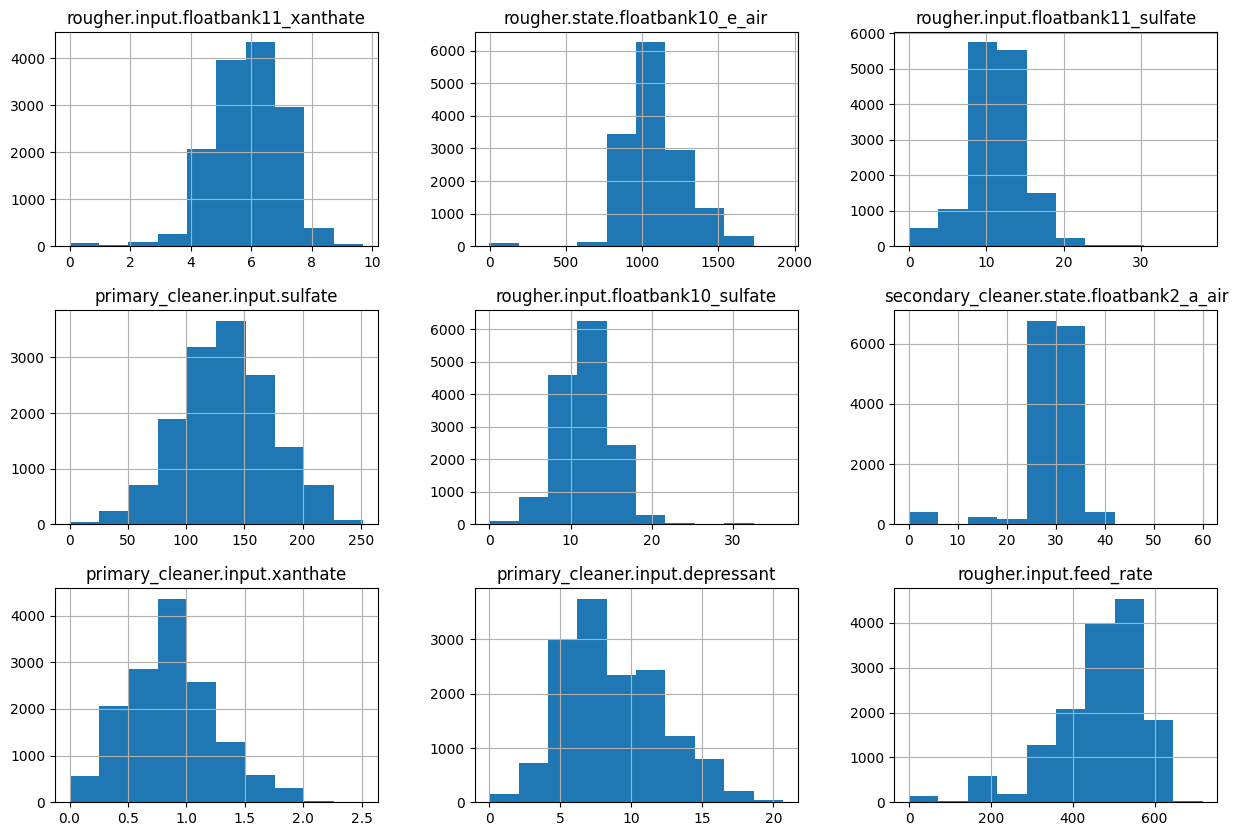

rougher.input.floatbank11_xanthate             5.888175
rougher.state.floatbank10_e_air             1078.990959
rougher.input.floatbank11_sulfate             11.389359
primary_cleaner.input.sulfate                134.643263
rougher.input.floatbank10_sulfate             11.763041
secondary_cleaner.state.floatbank2_a_air      29.341060
primary_cleaner.input.xanthate                 0.879605
primary_cleaner.input.depressant               8.929893
rougher.input.feed_rate                      467.518312
dtype: float64

rougher.input.floatbank11_xanthate             5.999159
rougher.state.floatbank10_e_air             1049.988150
rougher.input.floatbank11_sulfate             11.414551
primary_cleaner.input.sulfate                134.315614
rougher.input.floatbank10_sulfate             11.708082
secondary_cleaner.state.floatbank2_a_air      30.017078
primary_cleaner.input.xanthate                 0.888980
primary_cleaner.input.depressant               8.043323
rougher.input.feed_rate                      498.403275
dtype: float64

rougher.input.floatbank11_xanthate  rougher.state.floatbank10_e_air  \
count                        14201.000000                     14347.000000   
mean                             5.888175                      1078.990959   
std                              1.149914                       202.268601   
min                              0.000290                        -1.970275   
25%                              5.198196                       951.610899   
50%                              5.999159                      1049.988150   
75%                              6.700692                      1199.872051   
max                              9.698407                      1922.636637   

       rougher.input.floatbank11_sulfate  primary_cleaner.input.sulfate  \
count                       14593.000000                   14596.000000   
mean                           11.389359                     134.643263   
std                             3.734254                      39.951815   
min                             0.000049                       0.003112   
25%                             9.506037                     107.939017   
50%                            11.414551                     134.315614   
75%                            13.500338                     161.428026   
max                            37.980648                     251.999948   

       rougher.input.floatbank10_sulfate  \
count                       14596.000000   
mean                           11.763041   
std                             3.313112   
min                             0.000044   
25%                             9.855929   
50%                            11.708082   
75%                            13.684285   
max                            36.118275   

       secondary_cleaner.state.floatbank2_a_air  \
count                              14635.000000   
mean                                  29.341060   
std                                    6.334380   
min                                    0.077503   
25%                                   25.094668   
50%                                   30.017078   
75%                                   34.878417   
max                                   60.000000   

       primary_cleaner.input.xanthate  primary_cleaner.input.depressant  \
count                    14665.000000                      14666.000000   
mean                         0.879605                          8.929893   
std                          0.386629                          3.437355   
min                          0.000006                          0.000000   
25%                          0.601735                          6.051069   
50%                          0.888980                          8.043323   
75%                          1.101912                         11.912753   
max                          2.512968                         20.673152   

       rougher.input.feed_rate  
count             14672.000000  
mean                467.518312  
std                 111.056786  
min                   0.001166  
25%                 408.014630  
50%                 498.403275  
75%                 545.801298  
max                 717.508837

In [43]:
# Training Dataset

# Investigate the 9 missing columns

imp_cols = ['rougher.input.floatbank11_xanthate','rougher.state.floatbank10_e_air','rougher.input.floatbank11_sulfate',
'primary_cleaner.input.sulfate','rougher.input.floatbank10_sulfate','secondary_cleaner.state.floatbank2_a_air',
'primary_cleaner.input.xanthate','primary_cleaner.input.depressant','rougher.input.feed_rate']	

# Create a histogram for the 9 features with missing values
gold_train_new2[imp_cols].hist(figsize = [15,10])
plt.show()

display(gold_train_new2[imp_cols].mean())
print()
display(gold_train_new2[imp_cols].median())
print()
display(gold_train_new2[imp_cols].describe())

In [44]:

# View columns that look similar to the missing features (rougher.input.floatbank##_xanthate) 

# Look for columns with rougher.input.floatbank and then drop the columns that do not have rougher.input.floatbank##_xanthate
xanthate = gold_train_new2.filter(like="rougher.input.floatbank", axis = 1).drop(
    gold_train_new2[['rougher.input.floatbank11_sulfate','rougher.input.floatbank10_sulfate']], axis = 1)

# Compare rougher.input.floatbank##_xanthate columns (subtract)
xanthate_difference = xanthate['rougher.input.floatbank10_xanthate'] - xanthate['rougher.input.floatbank11_xanthate']

# Create a DF to compare
xanthate['xanthate_difference'] = xanthate_difference



# Group the differences and compare statistics

print("Less Than -1")
display(xanthate[xanthate['xanthate_difference'] < -1].median())
display(xanthate[xanthate['xanthate_difference'] < -1].mean())
display(xanthate[xanthate['xanthate_difference'] < -1].max())
display(xanthate[xanthate['xanthate_difference'] < -1].min())
print(len(xanthate[xanthate['xanthate_difference'] <- 1]))

print()
print("Greater Than 1")
display(xanthate[xanthate['xanthate_difference'] > 1].median())
display(xanthate[xanthate['xanthate_difference'] > 1].mean())
display(xanthate[xanthate['xanthate_difference'] > 1].max())
display(xanthate[xanthate['xanthate_difference'] > 1].min())
display(len(xanthate[xanthate['xanthate_difference'] > 1]))

print()
print("Between 0 - 1")
display(xanthate[(xanthate['xanthate_difference'] > 0) & (xanthate['xanthate_difference'] <= 1)].median())
display(xanthate[(xanthate['xanthate_difference'] > 0) & (xanthate['xanthate_difference'] <= 1)].mean())
display(xanthate[(xanthate['xanthate_difference'] > 0) & (xanthate['xanthate_difference'] <= 1)].max())
display(xanthate[(xanthate['xanthate_difference'] > 0) & (xanthate['xanthate_difference'] <= 1)].min())
display(len(xanthate[(xanthate['xanthate_difference'] > 0) & (xanthate['xanthate_difference'] <= 1)]))

print()
print("Between 0 - (-)1")
display(xanthate[(xanthate['xanthate_difference'] < 0) & (xanthate['xanthate_difference'] >= -1)].median())
display(xanthate[(xanthate['xanthate_difference'] < 0) & (xanthate['xanthate_difference'] >= -1)].mean())
display(xanthate[(xanthate['xanthate_difference'] < 0) & (xanthate['xanthate_difference'] >= -1)].max())
display(xanthate[(xanthate['xanthate_difference'] < 0) & (xanthate['xanthate_difference'] >= -1)].min())
display(len(xanthate[(xanthate['xanthate_difference'] < 0) & (xanthate['xanthate_difference'] >= -1)]))
print()
print("All")
display(xanthate[xanthate['xanthate_difference'] > -20].median())
display(xanthate[xanthate['xanthate_difference'] > -20].mean())
display(xanthate[xanthate['xanthate_difference'] > -20].max())
display(xanthate[xanthate['xanthate_difference'] > -20].min())

Less Than -1


rougher.input.floatbank10_xanthate    6.243166
rougher.input.floatbank11_xanthate    7.493640
xanthate_difference                  -1.416374
dtype: float64

rougher.input.floatbank10_xanthate    4.437777
rougher.input.floatbank11_xanthate    6.770322
xanthate_difference                  -2.332545
dtype: float64

rougher.input.floatbank10_xanthate    7.624764
rougher.input.floatbank11_xanthate    8.833521
xanthate_difference                  -1.001298
dtype: float64

rougher.input.floatbank10_xanthate    0.000508
rougher.input.floatbank11_xanthate    1.482072
xanthate_difference                  -8.004946
dtype: float64

174

Greater Than 1


rougher.input.floatbank10_xanthate    5.781152
rougher.input.floatbank11_xanthate    1.931478
xanthate_difference                   3.203859
dtype: float64

rougher.input.floatbank10_xanthate    5.702966
rougher.input.floatbank11_xanthate    2.413444
xanthate_difference                   3.289522
dtype: float64

rougher.input.floatbank10_xanthate    8.036454
rougher.input.floatbank11_xanthate    6.318315
xanthate_difference                   7.576177
dtype: float64

rougher.input.floatbank10_xanthate    3.108537
rougher.input.floatbank11_xanthate    0.000290
xanthate_difference                   1.026330
dtype: float64

93


Between 0 - 1


rougher.input.floatbank10_xanthate    6.000332
rougher.input.floatbank11_xanthate    5.998025
xanthate_difference                   0.002270
dtype: float64

rougher.input.floatbank10_xanthate    5.908348
rougher.input.floatbank11_xanthate    5.898371
xanthate_difference                   0.009977
dtype: float64

rougher.input.floatbank10_xanthate    9.703448
rougher.input.floatbank11_xanthate    9.698407
xanthate_difference                   0.953365
dtype: float64

rougher.input.floatbank10_xanthate    4.394071e-03
rougher.input.floatbank11_xanthate    2.024813e-03
xanthate_difference                   2.598773e-07
dtype: float64

6850


Between 0 - (-)1


rougher.input.floatbank10_xanthate    5.995132
rougher.input.floatbank11_xanthate    6.000465
xanthate_difference                  -0.002462
dtype: float64

rougher.input.floatbank10_xanthate    5.858244
rougher.input.floatbank11_xanthate    5.902265
xanthate_difference                  -0.044021
dtype: float64

rougher.input.floatbank10_xanthate    9.655247
rougher.input.floatbank11_xanthate    9.667279
xanthate_difference                  -0.000001
dtype: float64

rougher.input.floatbank10_xanthate    0.000886
rougher.input.floatbank11_xanthate    0.001334
xanthate_difference                  -0.999544
dtype: float64

7084


All


rougher.input.floatbank10_xanthate    5.998175
rougher.input.floatbank11_xanthate    5.999159
xanthate_difference                  -0.000075
dtype: float64

rougher.input.floatbank10_xanthate    5.863991
rougher.input.floatbank11_xanthate    5.888175
xanthate_difference                  -0.024184
dtype: float64

rougher.input.floatbank10_xanthate    9.703448
rougher.input.floatbank11_xanthate    9.698407
xanthate_difference                   7.576177
dtype: float64

rougher.input.floatbank10_xanthate    0.000508
rougher.input.floatbank11_xanthate    0.000290
xanthate_difference                  -8.004946
dtype: float64

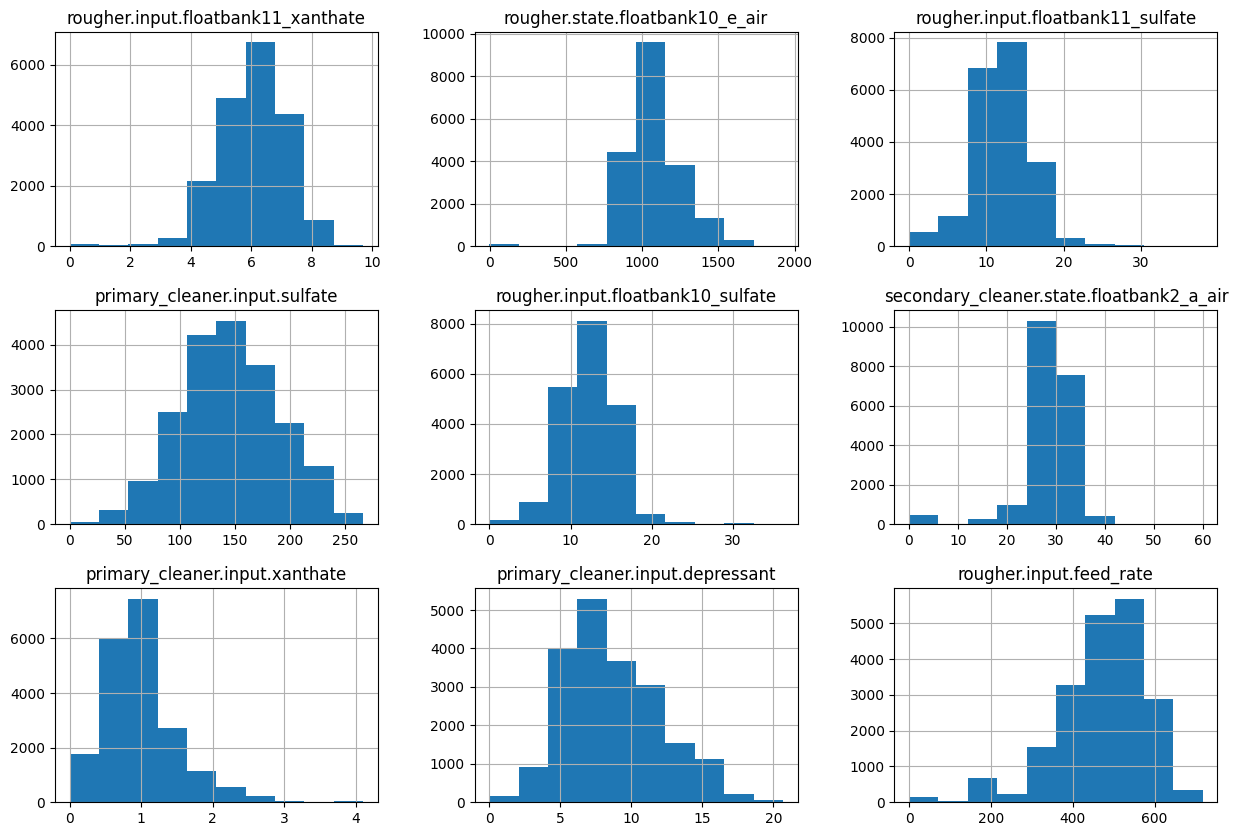

rougher.input.floatbank11_xanthate             6.058794
rougher.state.floatbank10_e_air             1072.584818
rougher.input.floatbank11_sulfate             12.069147
primary_cleaner.input.sulfate                145.346889
rougher.input.floatbank10_sulfate             12.314856
secondary_cleaner.state.floatbank2_a_air      28.535827
primary_cleaner.input.xanthate                 1.013894
primary_cleaner.input.depressant               8.863749
rougher.input.feed_rate                      473.234067
dtype: float64

rougher.input.floatbank11_xanthate             6.099767
rougher.state.floatbank10_e_air             1049.694499
rougher.input.floatbank11_sulfate             12.000267
primary_cleaner.input.sulfate                144.133440
rougher.input.floatbank10_sulfate             12.001148
secondary_cleaner.state.floatbank2_a_air      29.086048
primary_cleaner.input.xanthate                 0.942111
primary_cleaner.input.depressant               8.044753
rougher.input.feed_rate                      498.480665
dtype: float64

rougher.input.floatbank11_xanthate  rougher.state.floatbank10_e_air  \
count                        19542.000000                     19718.000000   
mean                             6.058794                      1072.584818   
std                              1.116986                       185.794118   
min                              0.000290                        -1.970275   
25%                              5.405188                       997.822139   
50%                              6.099767                      1049.694499   
75%                              6.801447                      1199.174819   
max                              9.698407                      1922.636637   

       rougher.input.floatbank11_sulfate  primary_cleaner.input.sulfate  \
count                       19954.000000                   19963.000000   
mean                           12.069147                     145.346889   
std                             3.780202                      44.634608   
min                             0.000049                       0.003112   
25%                             9.998294                     114.747722   
50%                            12.000267                     144.133440   
75%                            14.576829                     175.825511   
max                            37.980648                     265.983123   

       rougher.input.floatbank10_sulfate  \
count                       19965.000000   
mean                           12.314856   
std                             3.469103   
min                             0.000044   
25%                            10.000173   
50%                            12.001148   
75%                            14.679636   
max                            36.118275   

       secondary_cleaner.state.floatbank2_a_air  \
count                              20003.000000   
mean                                  28.535827   
std                                    5.850875   
min                                    0.025693   
25%                                   25.047215   
50%                                   29.086048   
75%                                   32.987186   
max                                   60.000000   

       primary_cleaner.input.xanthate  primary_cleaner.input.depressant  \
count                    20033.000000                      20033.000000   
mean                         1.013894                          8.863749   
std                          0.519693                          3.345438   
min                          0.000006                          0.000000   
25%                          0.694630                          6.095366   
50%                          0.942111                          8.044753   
75%                          1.207878                         11.030483   
max                          4.102454                         20.673152   

       rougher.input.feed_rate  
count             20041.000000  
mean                473.234067  
std                 110.765504  
min                   0.001166  
25%                 407.138551  
50%                 498.480665  
75%                 549.840741  
max                 717.508837

In [45]:
# Full Dataset

# Create a histogram for the 9 features with missing values
gold_full_new2[imp_cols].hist(figsize = [15,10])
plt.show()

display(gold_full_new2[imp_cols].mean())
print()
display(gold_full_new2[imp_cols].median())
print()
display(gold_full_new2[imp_cols].describe())

In [46]:
# View columns that look similar to the missing features (rougher.input.floatbank##_xanthate) - Full Dataset

# Look for columns with rougher.input.floatbank and then drop the columns that do not have rougher.input.floatbank##_xanthate

xanthate_full = gold_full_new2.filter(like="rougher.input.floatbank", axis = 1).drop(
    gold_full_new2[['rougher.input.floatbank11_sulfate','rougher.input.floatbank10_sulfate']], axis = 1)

# Compare rougher.input.floatbank##_xanthate columns (subtract)
xanthate_difference_full = xanthate_full['rougher.input.floatbank10_xanthate'] - xanthate_full['rougher.input.floatbank11_xanthate']

# Create a DF to compare
xanthate_full['xanthate_difference'] = xanthate_difference_full

# Check the DF's median difference to check if it aligns with the Training Dastaset
display(xanthate_full.median())
display(xanthate_full[xanthate_full['xanthate_difference'] > -20].median())


rougher.input.floatbank10_xanthate    6.004194
rougher.input.floatbank11_xanthate    6.099767
xanthate_difference                  -0.000087
dtype: float64

rougher.input.floatbank10_xanthate    6.098051
rougher.input.floatbank11_xanthate    6.099767
xanthate_difference                  -0.000087
dtype: float64

In [47]:
# Training Dataset

# Impute the 'rougher.input.floatbank11_xanthate' NaN values to match the coordinating 'rougher.input.floatbank10_xanthate' values

display(gold_train_new2[gold_train_new2['rougher.input.floatbank11_xanthate'].isna()])

# Fill the NaN values for floatbank 11 as the corresponding floatbank 10 values
gold_train_new2 = gold_train_new2.copy()

mask = gold_train_new2['rougher.input.floatbank11_xanthate']
gold_train_new2['rougher.input.floatbank11_xanthate'] = (mask.fillna(gold_train_new2['rougher.input.floatbank10_xanthate']))

# Ensure no more NaN values for rougher.input.floatbank11_xanthate
display(gold_train_new2[gold_train_new2['rougher.input.floatbank11_xanthate'].isna()])

# Test it, ensure correct values placed correctly
test = gold_train_new2[['rougher.input.floatbank11_xanthate','rougher.input.floatbank10_xanthate']]
test[2495:]

date  final.output.recovery  \
2918   2016-05-15 13:59:59              79.975380   
2919   2016-05-15 14:59:59              45.586191   
3446   2016-06-06 13:59:59              46.375447   
4455   2016-07-18 14:59:59              52.576792   
5660   2017-01-06 19:59:59              67.275195   
...                    ...                    ...   
16502  2018-08-03 13:59:59             100.000000   
16598  2018-08-07 13:59:59             100.000000   
16599  2018-08-07 14:59:59             100.000000   
16600  2018-08-07 15:59:59             100.000000   
16608  2018-08-07 23:59:59             100.000000   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
2918                      159.551841                         11.972081   
2919                       58.717323                         12.027662   
3446                        0.832935                               NaN   
4455                       62.830953                          7.006670   
5660                             NaN                          0.416502   
...                              ...                               ...   
16502                            NaN                               NaN   
16598                       0.089524                               NaN   
16599                       0.017954                               NaN   
16600                       0.042164                          0.020230   
16608                            NaN                          0.133502   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
2918                          7.740000                        0.904101   
2919                          6.610000                        0.922359   
3446                          6.800000                        0.010702   
4455                          8.210000                        0.574743   
5660                          7.790000                             NaN   
...                                ...                             ...   
16502                         7.280000                             NaN   
16598                         7.004999                        0.004911   
16599                         7.320000                        0.012019   
16600                         7.320000                        0.003251   
16608                         7.320000                        0.005070   

       primary_cleaner.state.floatbank8_a_air  \
2918                              1203.830417   
2919                              1392.770893   
3446                              1191.181589   
4455                              1601.946035   
5660                              1854.162080   
...                                       ...   
16502                             1650.905789   
16598                              998.890138   
16599                             1602.086817   
16600                             1579.144432   
16608                             1567.512693   

       primary_cleaner.state.floatbank8_a_level  \
2918                                -499.751674   
2919                                -500.326034   
3446                                -502.140749   
4455                                -500.703455   
5660                                -615.091268   
...                                         ...   
16502                               -494.820004   
16598                               -763.169284   
16599                               -583.850387   
16600                               -483.492915   
16608                               -400.292034   

       primary_cleaner.state.floatbank8_b_air  \
2918                              1204.874868   
2919                              1299.437987   
3446                              1192.766017   
4455                              1607.720913   
5660                              2114.906758   
...                                       ...   
16502                             1648.101136   
16598        

Empty DataFrame
Columns: [date, final.output.recovery, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level]
Index: []

[0 rows x 54 columns]

rougher.input.floatbank11_xanthate  rougher.input.floatbank10_xanthate
2916                             4.403525                            4.403645
2917                             3.911547                            4.400047
2918                             5.418245                            5.418245
2919                             4.744994                            4.744994
2920                             4.476183                            4.755170
...                                   ...                                 ...
16855                            9.156069                            9.158609
16856                            9.297924                            9.304952
16857                            9.300133                            9.299606
16858                            9.297194                            9.297709
16859                            9.309852                            9.308612

[12360 rows x 2 columns]

In [48]:
# Full Dataset

# Impute the 'rougher.input.floatbank11_xanthate' NaN values to match the coordinating 'rougher.input.floatbank10_xanthate' values

display(gold_full_new2[gold_full_new2['rougher.input.floatbank11_xanthate'].isna()])

# Fill the NaN values for floatbank 11 as the corresponding floatbank 10 values
gold_full_new2 = gold_full_new2.copy()

mask1 = gold_full_new2['rougher.input.floatbank11_xanthate']
gold_full_new2['rougher.input.floatbank11_xanthate'] = (mask1.fillna(gold_full_new2['rougher.input.floatbank10_xanthate']))

# Ensure no more NaN values for rougher.input.floatbank11_xanthate
display(gold_full_new2[gold_full_new2['rougher.input.floatbank11_xanthate'].isna()])

# Test it, ensure correct values placed correctly
test1 = gold_full_new2[['rougher.input.floatbank11_xanthate','rougher.input.floatbank10_xanthate']]
test1[2495:]

date  final.output.recovery  \
2918   2016-05-15 13:59:59              79.975380   
2919   2016-05-15 14:59:59              45.586191   
3446   2016-06-06 13:59:59              46.375447   
4455   2016-07-18 14:59:59              52.576792   
6044   2016-09-22 19:59:59              41.146342   
...                    ...                    ...   
22358  2018-08-03 13:59:59             100.000000   
22454  2018-08-07 13:59:59             100.000000   
22455  2018-08-07 14:59:59             100.000000   
22456  2018-08-07 15:59:59             100.000000   
22464  2018-08-07 23:59:59             100.000000   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
2918                      159.551841                         11.972081   
2919                       58.717323                         12.027662   
3446                        0.832935                               NaN   
4455                       62.830953                          7.006670   
6044                       31.604122                          0.392449   
...                              ...                               ...   
22358                            NaN                               NaN   
22454                       0.089524                               NaN   
22455                       0.017954                               NaN   
22456                       0.042164                          0.020230   
22464                            NaN                          0.133502   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
2918                          7.740000                        0.904101   
2919                          6.610000                        0.922359   
3446                          6.800000                        0.010702   
4455                          8.210000                        0.574743   
6044                          7.680000                        2.127074   
...                                ...                             ...   
22358                         7.280000                             NaN   
22454                         7.004999                        0.004911   
22455                         7.320000                        0.012019   
22456                         7.320000                        0.003251   
22464                         7.320000                        0.005070   

       primary_cleaner.state.floatbank8_a_air  \
2918                              1203.830417   
2919                              1392.770893   
3446                              1191.181589   
4455                              1601.946035   
6044                              1601.265098   
...                                       ...   
22358                             1650.905789   
22454                              998.890138   
22455                             1602.086817   
22456                             1579.144432   
22464                             1567.512693   

       primary_cleaner.state.floatbank8_a_level  \
2918                                -499.751674   
2919                                -500.326034   
3446                                -502.140749   
4455                                -500.703455   
6044                                -499.012130   
...                                         ...   
22358                               -494.820004   
22454                               -763.169284   
22455                               -583.850387   
22456                               -483.492915   
22464                               -400.292034   

       primary_cleaner.state.floatbank8_b_air  \
2918                              1204.874868   
2919                              1299.437987   
3446                              1192.766017   
4455                              1607.720913   
6044                              1600.804614   
...                                       ...   
22358                             1648.101136   
22454        

Empty DataFrame
Columns: [date, final.output.recovery, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level]
Index: []

[0 rows x 54 columns]

rougher.input.floatbank11_xanthate  rougher.input.floatbank10_xanthate
2916                             4.403525                            4.403645
2917                             3.911547                            4.400047
2918                             5.418245                            5.418245
2919                             4.744994                            4.744994
2920                             4.476183                            4.755170
...                                   ...                                 ...
22711                            9.156069                            9.158609
22712                            9.297924                            9.304952
22713                            9.300133                            9.299606
22714                            9.297194                            9.297709
22715                            9.309852                            9.308612

[17731 rows x 2 columns]

In [49]:
# Test Dataset

# Impute the 'rougher.input.floatbank11_xanthate' NaN values to match the coordinating 'rougher.input.floatbank10_xanthate' values

gold_test_new2 = gold_test

display(gold_test_new2[gold_test_new2['rougher.input.floatbank11_xanthate'].isna()])

# Fill the NaN values for floatbank 11 as the corresponding floatbank 10 values
mask_test_set = gold_test_new2['rougher.input.floatbank11_xanthate']
gold_test_new2['rougher.input.floatbank11_xanthate'] = (mask_test_set.fillna(gold_test_new2['rougher.input.floatbank10_xanthate']))


# Check how many rows were filled
with pd.option_context('display.max_columns',None):
    display(gold_test_new2[gold_test_new2['rougher.input.floatbank11_xanthate'].isna()])


date  primary_cleaner.input.sulfate  \
245   2016-09-11 05:59:59                      15.630879   
246   2016-09-11 06:59:59                            NaN   
247   2016-09-11 07:59:59                            NaN   
248   2016-09-11 08:59:59                            NaN   
249   2016-09-11 09:59:59                            NaN   
...                   ...                            ...   
5728  2017-12-26 16:59:59                      68.748269   
5729  2017-12-26 17:59:59                      66.671316   
5747  2017-12-27 11:59:59                       7.469704   
5748  2017-12-27 12:59:59                       5.630580   
5749  2017-12-27 13:59:59                       2.620827   

      primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
245                           0.990310                             7.83   
246                                NaN                             7.83   
247                                NaN                             7.83   
248                                NaN                             7.83   
249                                NaN                             7.83   
...                                ...                              ...   
5728                          4.967088                             5.80   
5729                          4.982771                             5.80   
5747                               NaN                             7.20   
5748                               NaN                             7.20   
5749                               NaN                             7.20   

      primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
245                         0.193422                            1.299719e+03   
246                              NaN                            1.299738e+03   
247                              NaN                            1.300137e+03   
248                              NaN                            1.297507e+03   
249                              NaN                            1.296324e+03   
...                              ...                                     ...   
5728                        0.546002                            1.601695e+03   
5729                        0.546054                            1.601798e+03   
5747                        0.004984                            5.445860e-32   
5748                             NaN                            9.261879e+02   
5749                        0.004011                            1.394345e+03   

      primary_cleaner.state.floatbank8_a_level  \
245                                -498.963997   
246                                -612.606492   
247                                -752.693115   
248                                -794.938526   
249                                -795.541101   
...                                        ...   
5728                               -401.309128   
5729                               -399.342516   
5747                               -782.195107   
5748                               -686.329732   
5749                               -771.082673   

      primary_cleaner.state.floatbank8_b_air  \
245                             1.303213e+03   
246                             1.302267e+03   
247                             1.302233e+03   
248                             1.303108e+03   
249                             1.302574e+03   
...                                      ...   
5728                            1.603799e+03   
5729                            1.601004e+03   
5747                            6.647490e-32   
5748                            9.278570e+02   
5749                            1.394144e+03   

      primary_cleaner.state.floatbank8_b_level  \
245                                -499.904044   
246                                -505.831097   
247                                -575.075180   
248                                -798.079260   
249       

date  primary_cleaner.input.sulfate  \
564   2016-09-24 12:59:59                            NaN   
565   2016-09-24 13:59:59                            NaN   
568   2016-09-24 16:59:59                            NaN   
585   2016-09-25 09:59:59                            NaN   
586   2016-09-25 10:59:59                            NaN   
...                   ...                            ...   
3078  2017-09-07 06:59:59                            NaN   
3079  2017-09-07 07:59:59                            NaN   
4549  2017-11-07 13:59:59                       0.006246   
5485  2017-12-16 13:59:59                            NaN   
5486  2017-12-16 14:59:59                            NaN   

      primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
564                                NaN                             7.68   
565                                NaN                             7.68   
568                                NaN                             7.68   
585                                NaN                             7.68   
586                                NaN                             7.68   
...                                ...                              ...   
3078                               NaN                             6.44   
3079                               NaN                             6.44   
4549                               NaN                             7.15   
5485                               NaN                             7.49   
5486                               NaN                             7.49   

      primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
564                         0.011503                            2.799954e-18   
565                         0.000091                            2.799954e-18   
568                         0.003025                            1.392885e-01   
585                         0.010103                            2.312186e-20   
586                         0.006077                            2.312186e-20   
...                              ...                                     ...   
3078                             NaN                            0.000000e+00   
3079                             NaN                            0.000000e+00   
4549                        0.001874                            1.601321e+03   
5485                        0.012088                            1.198172e+00   
5486                        0.008673                            5.547224e-01   

      primary_cleaner.state.floatbank8_a_level  \
564                                -796.779434   
565                                -797.124505   
568                                -798.855473   
585                                -796.302283   
586                                -796.684510   
...                                        ...   
3078                               -797.408631   
3079                               -797.596816   
4549                               -506.241798   
5485                               -783.388562   
5486                               -784.049738   

      primary_cleaner.state.floatbank8_b_air  \
564                             4.163275e-21   
565                             4.163275e-21   
568                             5.527349e-02   
585                             5.786564e-21   
586                             5.786564e-21   
...                                      ...   
3078                            0.000000e+00   
3079                            0.000000e+00   
4549                            1.598187e+03   
5485                            2.241474e+00   
5486                            1.035048e+00   

      primary_cleaner.state.floatbank8_b_level  \
564                                -799.983618   
565                                -799.977005   
568                                -799.989777   
585                                -799.984843   
586       

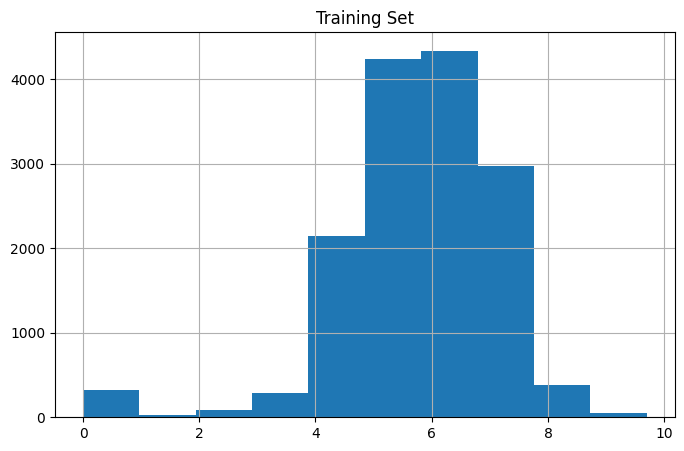

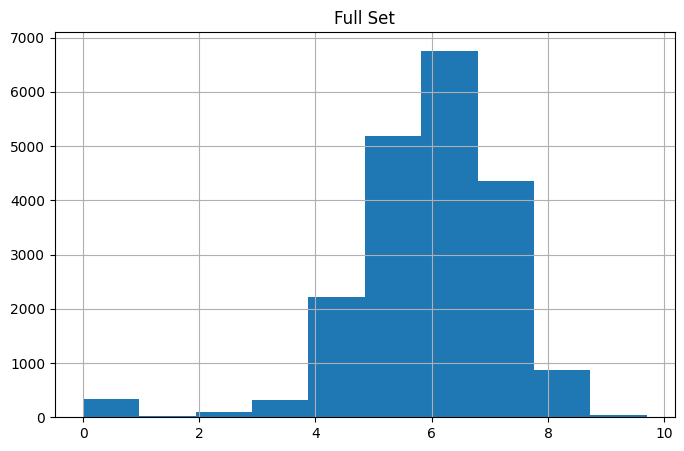

In [50]:
# Compare the new histograms

gold_train_new2['rougher.input.floatbank11_xanthate'].hist(figsize = [8,5])
plt.title("Training Set")
plt.show()

gold_full_new2['rougher.input.floatbank11_xanthate'].hist(figsize = [8,5])
plt.title("Full Set")
plt.show()

**<u>Xanthate Difference Analysis:</u>** rougher.input.floatbank##_xanthate

**Statistical Summary by Difference Groups**

**Distribution**: The data appears roughly normally distributed with a slight right skew, centered around 6-7

Training | Full

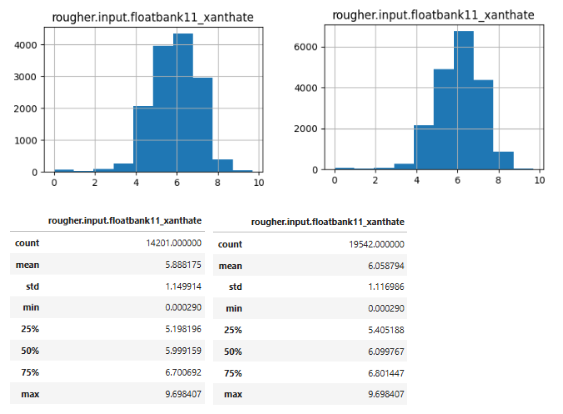

**After Imputation**

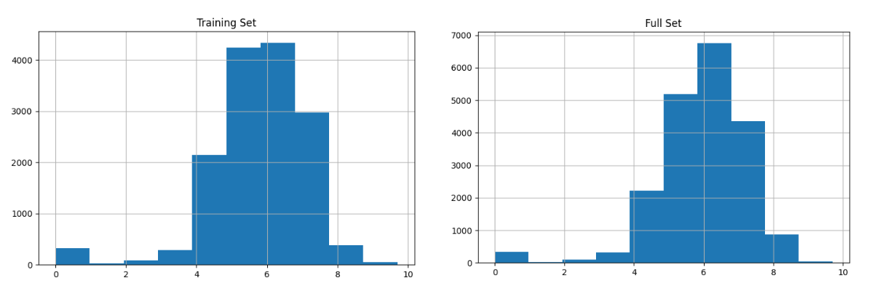

*xanthate_difference = rougher.input.floatbank10_xanthate - rougher.input.floatbank11_xanthate*

**Less Than -1 (174 observations)**

| Statistic | floatbank10_xanthate | floatbank11_xanthate | xanthate_difference |
|-----------|---------------------|---------------------|-------------------|
| **Median** | 6.243 | 7.494 | -1.416 |
| **Mean** | 4.438 | 6.770 | -2.333 |
| **Range** | 7.6248, 0.001 | 8.834, 1.482 | -1.001, -8.005 |

**Greater Than 1 (93 observations)**

| Statistic | floatbank10_xanthate | floatbank11_xanthate | xanthate_difference |
|-----------|---------------------|---------------------|-------------------|
| **Median** | 5.781 | 1.931 | 3.204 |
| **Mean** | 5.703 | 2.413 | 3.290 |
| **Range** | 8.036, 3.109 | 6.318, 0.000 | 7.576, 1.026 |

**Between 0 - 1 (6,850 observations)**

| Statistic | floatbank10_xanthate | floatbank11_xanthate | xanthate_difference |
|-----------|---------------------|---------------------|-------------------|
| **Median** | 6.000 | 5.998 | 0.002 |
| **Mean** | 5.908 | 5.898 | 0.010 |
| **Range** | 9.703, 0.004 | 9.698, 0.002 | 0.953, 0.000 |

**Between 0 - (-1) (7,084 observations)**

| Statistic | floatbank10_xanthate | floatbank11_xanthate | xanthate_difference |
|-----------|---------------------|---------------------|-------------------|
| **Median** | 5.995 | 6.000 | -0.002 |
| **Mean** | 5.858 | 5.902 | -0.044 |
| **Range** | 9.655, 0.001 | 9.667, 0.001 | -0.000, -1.000 |

**ALL (14,201 observations)**

| Statistic | floatbank10_xanthate | floatbank11_xanthate | xanthate_difference |
|-----------|---------------------|---------------------|-------------------|
| **Median** | 5.998 | 5.999 | -0.000 |
| **Mean** | 5.864 | 5.888 | -0.024 |
| **Range** | 0.001 - 9.703 | 0.000 - 9.698 | -8.005 - 7.586 |


---

**Key Observations**

- **Most observations fall within small differences**: 13,934 out of 14,201 total observations (98.1%) have differences between -1 and +1
- **Extreme negative differences are more common**: 174 observations with differences < -1 vs 93 observations with differences > +1
- **Near-equilibrium groups dominate**: The "Between 0-1" and "Between 0-(-1)" groups contain the vast majority of data points
- **Largest extreme difference**: -8.004946 in the "Less Than -1" group
- **Training Dataset Difference Median**: -0.000087
- **Full Dataset Difference Median**: -0.000075
- **Training and Full Median Difference**: 0.000012


**Conclusion**

Given that the median difference between `rougher.input.floatbank10_xanthate` and `rougher.input.floatbank11_xanthate` is approximately 0 (-0.000075), and most observations (98.1%) fall within small differences, imputing missing floatbank11 values using the corresponding floatbank10 values (i.e., floatbank11 = floatbank10) appears reasonable. However, this assumes missing values follow the same near-equilibrium pattern as the majority of the data. This should give the most accurate representation for our model.

The median difference for the Training Set (-0.000075) and Full Set (-0.000087) are virtually the same at 0 (0.000012), validating our imputation approach. Moreover, when observing the datsets after imputation, you see that the Full Dataset changed less than the Training Dataset; this further demonstrates the accuracy of our imputation strategy.

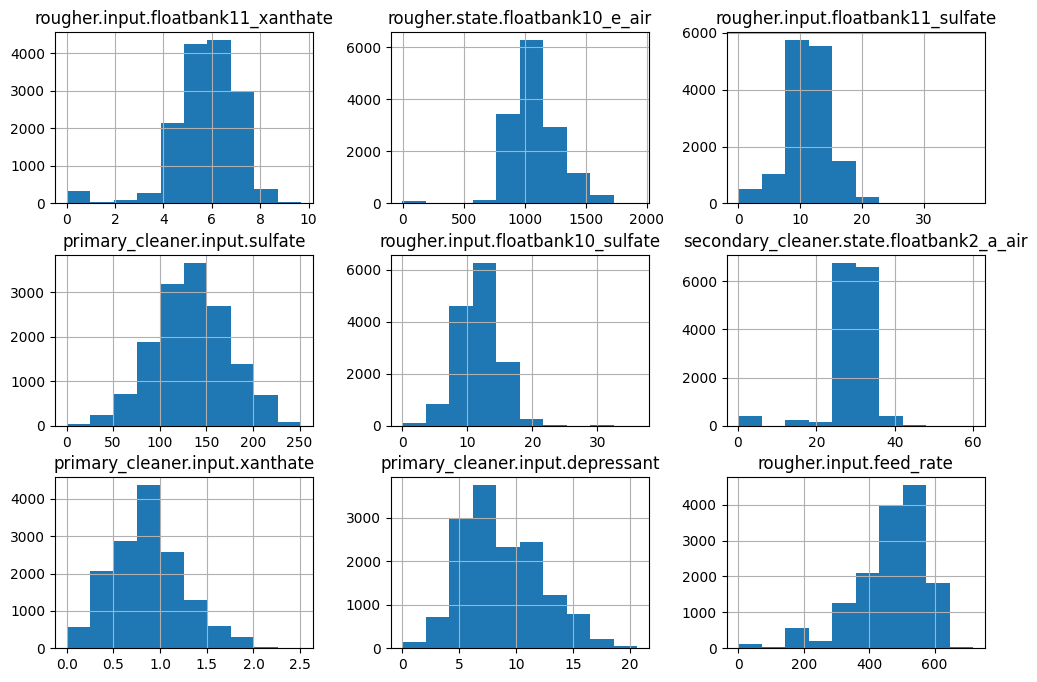

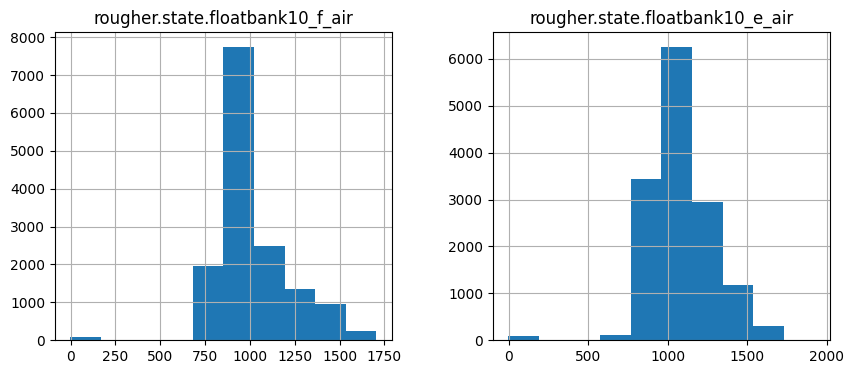

In [51]:
# Show the histograms again, continue imputation

gold_train_new2[imp_cols].hist(figsize = [12,8])
plt.show()

test = gold_train_new2[['rougher.state.floatbank10_f_air','rougher.state.floatbank10_e_air']]

test[test.columns].hist(figsize = [10,4])
plt.show()



In [52]:
def r_state_fb_nan(df1):
    # Focus on the columns you are comparing
    df = df1.filter(like = 'rougher.state.floatbank', axis=1).copy()
    df_cols = df.filter(like = 'level').columns
    df_cols = list(df_cols)
    df = df.drop(df[df_cols], axis = 1)
    df = df.drop(['rougher.state.floatbank10_a_air','rougher.state.floatbank10_b_air','rougher.state.floatbank10_c_air','rougher.state.floatbank10_d_air'], axis = 1)
    
    # Get the difference of the columns and put it in a DF
    df_difference_f = df['rougher.state.floatbank10_f_air'] - df['rougher.state.floatbank10_e_air']
    df['difference_f'] = df_difference_f

    # Show the metrics of the entire DF
    print("Difference Metrics (fb10_e_air & fb10_f_air)")
    print("-------------------------------------------")
    print("Length")
    display(len(df['difference_f']))
    print()
    print("Median")
    display(df['difference_f'].median())
    print()
    print("Mean")
    display(df['difference_f'].mean())
    print()
    print("Std")
    display(df['difference_f'].std())
    print()
    print("Min")
    display(df['difference_f'].min())
    print()
    print("Max")
    display(df['difference_f'].max())
    print()
    print()

    # Metrics for Categories
    print("Metrics Difference: Categorical")
    print("-------------------------------------------")
    print()
    print("Difference F > 5")
    print("-------------------------------------------")
    print("Length")
    display(len(df[df['difference_f'] > 5]))
    print()
    print("Median")
    display(df[df['difference_f'] > 5].median())
    print()
    print("Mean")
    display(df[df['difference_f'] > 5].mean())
    print()
    print("Min")
    display(df[df['difference_f'] > 5].min())
    print()
    print("Max")
    display(df[df['difference_f'] > 5].max())
    print()
    print("Difference F Between 1 - 5")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] > 1) & (df['difference_f'] <= 5)]))
    print()
    print("Median")
    display(df[(df['difference_f'] > 1) & (df['difference_f'] <= 5)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] > 1) & (df['difference_f'] <= 5)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] > 1) & (df['difference_f'] <= 5)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] > 1) & (df['difference_f'] <= 5)].max())
    print()
    print("Difference F Between 0 - 1")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] > 0) & (df['difference_f'] <= 1)]))
    print()
    print("Median")
    display(df[(df['difference_f'] > 0) & (df['difference_f'] <= 1)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] > 0) & (df['difference_f'] <= 1)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] > 0) & (df['difference_f'] <= 1)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] > 0) & (df['difference_f'] <= 1)].max())
    print()
    print("Difference F Between (-)1 - 0")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -1) & (df['difference_f'] < 0)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -1) & (df['difference_f'] < 0)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -1) & (df['difference_f'] < 0)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -1) & (df['difference_f'] < 0)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -1) & (df['difference_f'] < 0)].max())
    print()
    print("Difference F Between (-)5 - (-)1")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -5) & (df['difference_f'] < -1)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -5) & (df['difference_f'] < -1)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -5) & (df['difference_f'] < -1)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -5) & (df['difference_f'] < -1)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -5) & (df['difference_f'] < -1)].max())
    print()
    print("Difference F Between (-)50 - (-)5")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -50) & (df['difference_f'] < -5)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -50) & (df['difference_f'] < -5)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -50) & (df['difference_f'] < -5)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -50) & (df['difference_f'] < -5)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -50) & (df['difference_f'] < -5)].max())
    print()
    print("Difference F Between (-)100 - (-)50")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -100) & (df['difference_f'] < -50)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -100) & (df['difference_f'] < -50)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -100) & (df['difference_f'] < -50)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -100) & (df['difference_f'] < -50)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -100) & (df['difference_f'] < -50)].max())
    print()
    print("Difference F Between (-)150 - (-)100")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -150) & (df['difference_f'] < -100)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -150) & (df['difference_f'] < -100)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -150) & (df['difference_f'] < -100)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -150) & (df['difference_f'] < -100)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -150) & (df['difference_f'] < -100)].max())
    print()
    print("Difference F Between (-)220 - (-)150")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] >= -220) & (df['difference_f'] < -150)]))
    print()
    print("Median")
    display(df[(df['difference_f'] >= -220) & (df['difference_f'] < -150)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] >= -220) & (df['difference_f'] < -150)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] >= -220) & (df['difference_f'] < -150)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] >= -220) & (df['difference_f'] < -150)].max())
    print()
    print("Difference F < (-)200")
    print("-------------------------------------------")
    print("Length")
    display(len(df[df['difference_f'] < -200]))
    print()
    print("Median")
    display(df[df['difference_f'] < -200].median())
    print()
    print("Mean")
    display(df[df['difference_f'] < -200].mean())
    print()
    print("Min")
    display(df[df['difference_f'] < -200].min())
    print()
    print("Max")
    display(df[df['difference_f'] < -200].max())
    print()
    display(df[df['difference_f'] ==0])
    print()
    print()
    print()
    print()
    print("Difference F > 0")
    print("-------------------------------------------")
    print("Length")
    display(len(df[df['difference_f'] > 0]))
    print()
    print("Median")
    display(df[df['difference_f'] > 0].median())
    print()
    print("Mean")
    display(df[df['difference_f'] > 0].mean())
    print()
    print("Min")
    display(df[df['difference_f'] > 0].min())
    print()
    print("Max")
    display(df[df['difference_f'] > 0].max())
    print()
    print()
    print("Difference F Between (-)50 - 0")
    print("-------------------------------------------")
    print("Length")
    display(len(df[(df['difference_f'] > -50) & (df['difference_f'] <= 0)]))
    print()
    print("Median")
    display(df[(df['difference_f'] > -50) & (df['difference_f'] <= 0)].median())
    print()
    print("Mean")
    display(df[(df['difference_f'] > -50) & (df['difference_f'] <= 0)].mean())
    print()
    print("Min")
    display(df[(df['difference_f'] > -50) & (df['difference_f'] <= 0)].min())
    print()
    print("Max")
    display(df[(df['difference_f'] > -50) & (df['difference_f'] <= 0)].max())
    print()
    print()
    print("Difference F < (-)50")
    print("-------------------------------------------")
    print("Length")
    display(len(df[df['difference_f'] <= -50]))
    print()
    print("Median")
    display(df[df['difference_f'] <= -50].median())
    print()
    print("Mean")
    display(df[df['difference_f'] <= -50].mean())
    print()
    print("Min")
    display(df[df['difference_f'] <= 50].min())
    print()
    print("Max")
    display(df[df['difference_f'] <= -50].max())


In [53]:
# All the missing rougher.state.floatbank10_e_air are between 844 and 856 in rougher.state.floatbank10_f_air (except 2)

r_state_fb = gold_train_new2[['rougher.state.floatbank10_e_air','rougher.state.floatbank10_f_air']].copy()
r_state_fb_diff = gold_train_new2['rougher.state.floatbank10_f_air'] - gold_train_new2['rougher.state.floatbank10_e_air']
r_state_fb["difference_f_e"] = r_state_fb_diff
r_e_nan = r_state_fb[r_state_fb['rougher.state.floatbank10_e_air'].isna()]

r_e_nan[r_e_nan['rougher.state.floatbank10_f_air'] < 844]
r_e_nan[(r_e_nan['rougher.state.floatbank10_f_air'] > 844) & (r_e_nan['rougher.state.floatbank10_f_air'] < 856)]



rougher.state.floatbank10_e_air  rougher.state.floatbank10_f_air  \
11631                              NaN                       850.264604   
11632                              NaN                       850.386474   
11633                              NaN                       850.046882   
11634                              NaN                       849.081928   
11635                              NaN                       849.264916   
...                                ...                              ...   
12635                              NaN                       850.469174   
12636                              NaN                       850.313864   
12637                              NaN                       851.671104   
12638                              NaN                       850.454909   
12641                              NaN                       847.534213   

       difference_f_e  
11631             NaN  
11632             NaN  
11633             NaN  
11634             NaN  
11635             NaN  
...               ...  
12635             NaN  
12636             NaN  
12637             NaN  
12638             NaN  
12641             NaN  

[506 rows x 3 columns]

In [54]:
# Look at floatbank_f_air values between 844 - 856

r_state_fb_f = gold_train_new2[['rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_b_air', 
                                'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_d_air','rougher.state.floatbank10_e_air',
                                'rougher.state.floatbank10_f_air']].copy()
r_state_fb_f = r_state_fb_f[(r_state_fb_f['rougher.state.floatbank10_f_air'] > 844) & 
    (r_state_fb_f['rougher.state.floatbank10_f_air'] < 856)]

r_state_fb_nan(r_state_fb_f)

r_state_fb

Difference Metrics (fb10_e_air & fb10_f_air)
-------------------------------------------
Length


1060


Median


0.030703981591784668


Mean


-25.26861356855608


Std


129.6028648493297


Min


-1072.1726457897248


Max


302.43330533676556



Metrics Difference: Categorical
-------------------------------------------

Difference F > 5
-------------------------------------------
Length


2


Median


rougher.state.floatbank10_e_air    560.396474
rougher.state.floatbank10_f_air    850.177099
difference_f                       289.780626
dtype: float64


Mean


rougher.state.floatbank10_e_air    560.396474
rougher.state.floatbank10_f_air    850.177099
difference_f                       289.780626
dtype: float64


Min


rougher.state.floatbank10_e_air    547.540324
rougher.state.floatbank10_f_air    849.973629
difference_f                       277.127946
dtype: float64


Max


rougher.state.floatbank10_e_air    573.252623
rougher.state.floatbank10_f_air    850.380569
difference_f                       302.433305
dtype: float64


Difference F Between 1 - 5
-------------------------------------------
Length


27


Median


rougher.state.floatbank10_e_air    849.528393
rougher.state.floatbank10_f_air    850.760601
difference_f                         1.314547
dtype: float64


Mean


rougher.state.floatbank10_e_air    849.565861
rougher.state.floatbank10_f_air    850.977494
difference_f                         1.411633
dtype: float64


Min


rougher.state.floatbank10_e_air    846.438053
rougher.state.floatbank10_f_air    848.870274
difference_f                         1.013688
dtype: float64


Max


rougher.state.floatbank10_e_air    852.565098
rougher.state.floatbank10_f_air    854.419003
difference_f                         2.771865
dtype: float64


Difference F Between 0 - 1
-------------------------------------------
Length


257


Median


rougher.state.floatbank10_e_air    849.779730
rougher.state.floatbank10_f_air    850.157957
difference_f                         0.332039
dtype: float64


Mean


rougher.state.floatbank10_e_air    849.760470
rougher.state.floatbank10_f_air    850.134663
difference_f                         0.374193
dtype: float64


Min


rougher.state.floatbank10_e_air    845.426450
rougher.state.floatbank10_f_air    845.446025
difference_f                         0.002805
dtype: float64


Max


rougher.state.floatbank10_e_air    854.668426
rougher.state.floatbank10_f_air    855.604359
difference_f                         0.999571
dtype: float64


Difference F Between (-)1 - 0
-------------------------------------------
Length


215


Median


rougher.state.floatbank10_e_air    850.287039
rougher.state.floatbank10_f_air    849.856819
difference_f                        -0.346674
dtype: float64


Mean


rougher.state.floatbank10_e_air    850.240513
rougher.state.floatbank10_f_air    849.874191
difference_f                        -0.366322
dtype: float64


Min


rougher.state.floatbank10_e_air    845.259282
rougher.state.floatbank10_f_air    844.795222
difference_f                        -0.999865
dtype: float64


Max


rougher.state.floatbank10_e_air    853.224909
rougher.state.floatbank10_f_air    852.896993
difference_f                        -0.004107
dtype: float64


Difference F Between (-)5 - (-)1
-------------------------------------------
Length


24


Median


rougher.state.floatbank10_e_air    851.439675
rougher.state.floatbank10_f_air    850.059194
difference_f                        -1.301314
dtype: float64


Mean


rougher.state.floatbank10_e_air    851.520245
rougher.state.floatbank10_f_air    849.902937
difference_f                        -1.617308
dtype: float64


Min


rougher.state.floatbank10_e_air    848.338074
rougher.state.floatbank10_f_air    845.838617
difference_f                        -4.909628
dtype: float64


Max


rougher.state.floatbank10_e_air    855.630225
rougher.state.floatbank10_f_air    852.509530
difference_f                        -1.008497
dtype: float64


Difference F Between (-)50 - (-)5
-------------------------------------------
Length


3


Median


rougher.state.floatbank10_e_air    868.354339
rougher.state.floatbank10_f_air    850.376424
difference_f                       -18.056114
dtype: float64


Mean


rougher.state.floatbank10_e_air    870.150239
rougher.state.floatbank10_f_air    851.789248
difference_f                       -18.360992
dtype: float64


Min


rougher.state.floatbank10_e_air    865.493748
rougher.state.floatbank10_f_air    850.298225
difference_f                       -26.226207
dtype: float64


Max


rougher.state.floatbank10_e_air    876.602631
rougher.state.floatbank10_f_air    854.693094
difference_f                       -10.800654
dtype: float64


Difference F Between (-)100 - (-)50
-------------------------------------------
Length


2


Median


rougher.state.floatbank10_e_air    907.761495
rougher.state.floatbank10_f_air    852.104309
difference_f                       -55.657185
dtype: float64


Mean


rougher.state.floatbank10_e_air    907.761495
rougher.state.floatbank10_f_air    852.104309
difference_f                       -55.657185
dtype: float64


Min


rougher.state.floatbank10_e_air    904.595784
rougher.state.floatbank10_f_air    849.955141
difference_f                       -60.972065
dtype: float64


Max


rougher.state.floatbank10_e_air    910.927206
rougher.state.floatbank10_f_air    854.253478
difference_f                       -50.342306
dtype: float64


Difference F Between (-)150 - (-)100
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F Between (-)220 - (-)150
-------------------------------------------
Length


1


Median


rougher.state.floatbank10_e_air    1004.412752
rougher.state.floatbank10_f_air     850.441813
difference_f                       -153.970939
dtype: float64


Mean


rougher.state.floatbank10_e_air    1004.412752
rougher.state.floatbank10_f_air     850.441813
difference_f                       -153.970939
dtype: float64


Min


rougher.state.floatbank10_e_air    1004.412752
rougher.state.floatbank10_f_air     850.441813
difference_f                       -153.970939
dtype: float64


Max


rougher.state.floatbank10_e_air    1004.412752
rougher.state.floatbank10_f_air     850.441813
difference_f                       -153.970939
dtype: float64


Difference F < (-)200
-------------------------------------------
Length


23


Median


rougher.state.floatbank10_e_air    1502.374479
rougher.state.floatbank10_f_air     849.991429
difference_f                       -652.383050
dtype: float64


Mean


rougher.state.floatbank10_e_air    1470.636072
rougher.state.floatbank10_f_air     849.996424
difference_f                       -620.639648
dtype: float64


Min


rougher.state.floatbank10_e_air    1097.805808
rougher.state.floatbank10_f_air     849.365202
difference_f                      -1072.172646
dtype: float64


Max


rougher.state.floatbank10_e_air    1922.636637
rougher.state.floatbank10_f_air     850.657709
difference_f                       -247.191134
dtype: float64

Empty DataFrame
Columns: [rougher.state.floatbank10_e_air, rougher.state.floatbank10_f_air, difference_f]
Index: []





Difference F > 0
-------------------------------------------
Length


286


Median


rougher.state.floatbank10_e_air    849.736625
rougher.state.floatbank10_f_air    850.222866
difference_f                         0.375459
dtype: float64


Mean


rougher.state.floatbank10_e_air    847.718574
rougher.state.floatbank10_f_air    850.214528
difference_f                         2.495954
dtype: float64


Min


rougher.state.floatbank10_e_air    547.540324
rougher.state.floatbank10_f_air    845.446025
difference_f                         0.002805
dtype: float64


Max


rougher.state.floatbank10_e_air    854.668426
rougher.state.floatbank10_f_air    855.604359
difference_f                       302.433305
dtype: float64



Difference F Between (-)50 - 0
-------------------------------------------
Length


242


Median


rougher.state.floatbank10_e_air    850.364442
rougher.state.floatbank10_f_air    849.893534
difference_f                        -0.370930
dtype: float64


Mean


rougher.state.floatbank10_e_air    850.614244
rougher.state.floatbank10_f_air    849.900782
difference_f                        -0.713461
dtype: float64


Min


rougher.state.floatbank10_e_air    845.259282
rougher.state.floatbank10_f_air    844.795222
difference_f                       -26.226207
dtype: float64


Max


rougher.state.floatbank10_e_air    876.602631
rougher.state.floatbank10_f_air    854.693094
difference_f                        -0.004107
dtype: float64



Difference F < (-)50
-------------------------------------------
Length


26


Median


rougher.state.floatbank10_e_air    1499.135928
rougher.state.floatbank10_f_air     850.036561
difference_f                       -649.239148
dtype: float64


Mean


rougher.state.floatbank10_e_air    1409.406362
rougher.state.floatbank10_f_air     850.175700
difference_f                       -559.230662
dtype: float64


Min


rougher.state.floatbank10_e_air     845.259282
rougher.state.floatbank10_f_air     844.795222
difference_f                      -1072.172646
dtype: float64


Max


rougher.state.floatbank10_e_air    1922.636637
rougher.state.floatbank10_f_air     854.253478
difference_f                        -50.342306
dtype: float64

rougher.state.floatbank10_e_air  rougher.state.floatbank10_f_air  \
0                          1404.472046                      1416.354980   
1                          1399.227084                      1399.719514   
2                          1399.180945                      1400.316682   
3                          1400.943157                      1400.234743   
4                          1401.560902                      1401.160227   
...                                ...                              ...   
16855                       849.664935                       849.758091   
16856                       848.515225                       850.013123   
16857                       849.016017                       850.455635   
16858                       851.589767                       851.345606   
16859                       849.441918                       850.112246   

       difference_f_e  
0           11.882935  
1            0.492430  
2            1.135737  
3           -0.708414  
4           -0.400675  
...               ...  
16855        0.093156  
16856        1.497898  
16857        1.439618  
16858       -0.244161  
16859        0.670328  

[14855 rows x 3 columns]

In [55]:
# Look at floatbank_f_air values between 844 - 856

r_state_fb_e = gold_train_new2[['rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_b_air', 
                                'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_d_air','rougher.state.floatbank10_e_air',
                                'rougher.state.floatbank10_f_air']].copy()
r_state_fb_e = r_state_fb_e[(r_state_fb_e['rougher.state.floatbank10_e_air'] > 844) & 
    (r_state_fb_f['rougher.state.floatbank10_e_air'] < 856)]

r_state_fb_nan(r_state_fb_e)

r_state_fb_e

Difference Metrics (fb10_e_air & fb10_f_air)
-------------------------------------------
Length


523


Median


0.06080069731820004


Mean


0.03194460157707011


Std


0.6767217288758983


Min


-4.909628087496003


Max


2.771865353207545



Metrics Difference: Categorical
-------------------------------------------

Difference F > 5
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F Between 1 - 5
-------------------------------------------
Length


27


Median


rougher.state.floatbank10_e_air    849.528393
rougher.state.floatbank10_f_air    850.760601
difference_f                         1.314547
dtype: float64


Mean


rougher.state.floatbank10_e_air    849.565861
rougher.state.floatbank10_f_air    850.977494
difference_f                         1.411633
dtype: float64


Min


rougher.state.floatbank10_e_air    846.438053
rougher.state.floatbank10_f_air    848.870274
difference_f                         1.013688
dtype: float64


Max


rougher.state.floatbank10_e_air    852.565098
rougher.state.floatbank10_f_air    854.419003
difference_f                         2.771865
dtype: float64


Difference F Between 0 - 1
-------------------------------------------
Length


257


Median


rougher.state.floatbank10_e_air    849.779730
rougher.state.floatbank10_f_air    850.157957
difference_f                         0.332039
dtype: float64


Mean


rougher.state.floatbank10_e_air    849.760470
rougher.state.floatbank10_f_air    850.134663
difference_f                         0.374193
dtype: float64


Min


rougher.state.floatbank10_e_air    845.426450
rougher.state.floatbank10_f_air    845.446025
difference_f                         0.002805
dtype: float64


Max


rougher.state.floatbank10_e_air    854.668426
rougher.state.floatbank10_f_air    855.604359
difference_f                         0.999571
dtype: float64


Difference F Between (-)1 - 0
-------------------------------------------
Length


215


Median


rougher.state.floatbank10_e_air    850.287039
rougher.state.floatbank10_f_air    849.856819
difference_f                        -0.346674
dtype: float64


Mean


rougher.state.floatbank10_e_air    850.240513
rougher.state.floatbank10_f_air    849.874191
difference_f                        -0.366322
dtype: float64


Min


rougher.state.floatbank10_e_air    845.259282
rougher.state.floatbank10_f_air    844.795222
difference_f                        -0.999865
dtype: float64


Max


rougher.state.floatbank10_e_air    853.224909
rougher.state.floatbank10_f_air    852.896993
difference_f                        -0.004107
dtype: float64


Difference F Between (-)5 - (-)1
-------------------------------------------
Length


24


Median


rougher.state.floatbank10_e_air    851.439675
rougher.state.floatbank10_f_air    850.059194
difference_f                        -1.301314
dtype: float64


Mean


rougher.state.floatbank10_e_air    851.520245
rougher.state.floatbank10_f_air    849.902937
difference_f                        -1.617308
dtype: float64


Min


rougher.state.floatbank10_e_air    848.338074
rougher.state.floatbank10_f_air    845.838617
difference_f                        -4.909628
dtype: float64


Max


rougher.state.floatbank10_e_air    855.630225
rougher.state.floatbank10_f_air    852.509530
difference_f                        -1.008497
dtype: float64


Difference F Between (-)50 - (-)5
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F Between (-)100 - (-)50
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F Between (-)150 - (-)100
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F Between (-)220 - (-)150
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Difference F < (-)200
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64

Empty DataFrame
Columns: [rougher.state.floatbank10_e_air, rougher.state.floatbank10_f_air, difference_f]
Index: []





Difference F > 0
-------------------------------------------
Length


284


Median


rougher.state.floatbank10_e_air    849.741162
rougher.state.floatbank10_f_air    850.222866
difference_f                         0.374104
dtype: float64


Mean


rougher.state.floatbank10_e_air    849.741969
rougher.state.floatbank10_f_air    850.214792
difference_f                         0.472823
dtype: float64


Min


rougher.state.floatbank10_e_air    845.426450
rougher.state.floatbank10_f_air    845.446025
difference_f                         0.002805
dtype: float64


Max


rougher.state.floatbank10_e_air    854.668426
rougher.state.floatbank10_f_air    855.604359
difference_f                         2.771865
dtype: float64



Difference F Between (-)50 - 0
-------------------------------------------
Length


239


Median


rougher.state.floatbank10_e_air    850.352184
rougher.state.floatbank10_f_air    849.878683
difference_f                        -0.368203
dtype: float64


Mean


rougher.state.floatbank10_e_air    850.369022
rougher.state.floatbank10_f_air    849.877078
difference_f                        -0.491944
dtype: float64


Min


rougher.state.floatbank10_e_air    845.259282
rougher.state.floatbank10_f_air    844.795222
difference_f                        -4.909628
dtype: float64


Max


rougher.state.floatbank10_e_air    855.630225
rougher.state.floatbank10_f_air    852.896993
difference_f                        -0.004107
dtype: float64



Difference F < (-)50
-------------------------------------------
Length


0


Median


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Mean


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64


Min


rougher.state.floatbank10_e_air    845.259282
rougher.state.floatbank10_f_air    844.795222
difference_f                        -4.909628
dtype: float64


Max


rougher.state.floatbank10_e_air   NaN
rougher.state.floatbank10_f_air   NaN
difference_f                      NaN
dtype: float64

rougher.state.floatbank10_a_air  rougher.state.floatbank10_b_air  \
3410                        999.972860                      1049.828755   
3505                        999.749737                      1045.861836   
3506                       1000.304544                      1049.983603   
3507                        999.986196                      1050.291601   
3508                        999.705869                      1049.992500   
...                                ...                              ...   
16855                      1199.245914                      1149.807890   
16856                      1196.569267                      1147.675196   
16857                      1204.866639                      1149.942902   
16858                      1201.904177                      1154.087804   
16859                      1196.238112                      1147.248241   

       rougher.state.floatbank10_c_air  rougher.state.floatbank10_d_air  \
3410                       1049.518810                      1059.678786   
3505                       1046.091331                      1032.660484   
3506                       1050.079753                      1049.671111   
3507                       1050.550453                      1050.436171   
3508                       1050.238106                      1049.941949   
...                                ...                              ...   
16855                      1047.963596                       946.640977   
16856                      1048.565741                       949.773589   
16857                      1049.604390                       952.702732   
16858                      1054.009756                       944.138793   
16859                      1047.279065                       948.756608   

       rougher.state.floatbank10_e_air  rougher.state.floatbank10_f_air  
3410                        849.919943                       850.299052  
3505                        849.628940                       848.677831  
3506                        849.502249                       849.912654  
3507                        850.165086                       850.356585  
3508                        849.619249                       850.391474  
...                                ...                              ...  
16855                       849.664935                       849.758091  
16856                       848.515225                       850.013123  
16857                       849.016017                       850.455635  
16858                       851.589767                       851.345606  
16859                       849.441918                       850.112246  

[523 rows x 6 columns]

In [56]:
# Remove the NaN values where fb_10_f_air is not between 844 - 856 (Training Set)
drop_rows = gold_train_new2[(gold_train_new2['rougher.state.floatbank10_f_air'] < 844) & (gold_train_new2['rougher.state.floatbank10_e_air'].isna())]
gold_train_new2 = gold_train_new2.drop(drop_rows.index)
gold_train_new2

date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
16855  2018-08-18 06:59:59              73.755150   
16856  2018-08-18 07:59:59              69.049291   
16857  2018-08-18 08:59:59              67.002189   
16858  2018-08-18 09:59:59              65.523246   
16859  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
16855                     123.381787                          8.028927   
16856                     120.878188                          7.962636   
16857                     105.666118                          7.955111   
16858                      98.880538                          7.984164   
16859                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
16855                             6.50                        1.304232   
16856                             6.50                        1.302419   
16857                             6.50                        1.315926   
16858                             6.50                        1.241969   
16859                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
16855                             1648.421193   
16856                             1649.820162   
16857                             1649.166761   
16858                             1646.547763   
16859                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856        

In [57]:
# Replace the NaN values for fb_10_e_air with the values from fb_10_f_air (Training Set)

# Get the rows where fb10_f_air is between 844 - 856 and where 10_e_air is NaN
replace_values = gold_train_new2[(gold_train_new2['rougher.state.floatbank10_f_air'] > 844) & 
    (gold_train_new2['rougher.state.floatbank10_f_air'] < 856) & (gold_train_new2['rougher.state.floatbank10_e_air'].isna())]

# Separate the values from fb10_f_air
replace_values = replace_values['rougher.state.floatbank10_f_air']
replace_values

# Isolate the index
replace_values_index = replace_values.index

# Input fb10_f_air values where fb10_e_air values are NaN
gold_train_new2.loc[replace_values_index,['rougher.state.floatbank10_e_air']] = replace_values.values

In [58]:
# Remove the NaN values where fb_10_f_air is not between 844 - 856 (Full Set)

drop_rows_full = gold_full_new2[(gold_full_new2['rougher.state.floatbank10_f_air'] < 844) 
    & (gold_full_new2['rougher.state.floatbank10_e_air'].isna())]

gold_full_new2 = gold_full_new2.drop(drop_rows_full.index)
gold_full_new2

date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
22711  2018-08-18 06:59:59              73.755150   
22712  2018-08-18 07:59:59              69.049291   
22713  2018-08-18 08:59:59              67.002189   
22714  2018-08-18 09:59:59              65.523246   
22715  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
22711                     123.381787                          8.028927   
22712                     120.878188                          7.962636   
22713                     105.666118                          7.955111   
22714                      98.880538                          7.984164   
22715                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
22711                             6.50                        1.304232   
22712                             6.50                        1.302419   
22713                             6.50                        1.315926   
22714                             6.50                        1.241969   
22715                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
22711                             1648.421193   
22712                             1649.820162   
22713                             1649.166761   
22714                             1646.547763   
22715                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
22711                               -400.382169   
22712                               -399.930973   
22713                               -399.888631   
22714                               -398.977083   
22715                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
22711                             1648.742005   
22712        

In [59]:
# The full dataset has the same number of NaN in fb10_e_air that fit the conditions
gold_full_new2[(gold_full_new2['rougher.state.floatbank10_f_air'] > 844) & 
    (gold_full_new2['rougher.state.floatbank10_f_air'] < 856) & (gold_full_new2['rougher.state.floatbank10_e_air'].isna())]

date  final.output.recovery  \
17487  2018-01-12 14:59:59             100.000000   
17488  2018-01-12 15:59:59             100.000000   
17489  2018-01-12 16:59:59              82.131577   
17490  2018-01-12 17:59:59              71.291044   
17491  2018-01-12 18:59:59              73.616831   
...                    ...                    ...   
18491  2018-02-23 10:59:59              77.625242   
18492  2018-02-23 11:59:59              78.416618   
18493  2018-02-23 12:59:59              76.979071   
18494  2018-02-23 13:59:59              74.979987   
18497  2018-02-23 16:59:59             100.000000   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
17487                     132.381422                          8.596242   
17488                      77.158606                          5.984331   
17489                      65.587127                          6.254088   
17490                     119.490784                          8.801517   
17491                     161.577497                         10.027359   
...                              ...                               ...   
18491                     153.515136                          8.991989   
18492                     172.661362                          9.013515   
18493                     180.495838                          8.974494   
18494                     184.732692                          8.975302   
18497                            NaN                               NaN   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
17487                         7.700000                        1.128730   
17488                         7.700000                        1.110370   
17489                         7.700000                        1.104495   
17490                         7.700000                        1.097898   
17491                         7.700000                        1.091330   
...                                ...                             ...   
18491                         6.970000                        1.656174   
18492                         6.970000                        1.730239   
18493                         7.699999                        1.586058   
18494                         7.700000                        1.517210   
18497                         7.620000                        0.013963   

       primary_cleaner.state.floatbank8_a_air  \
17487                             1499.732733   
17488                             1498.554357   
17489                             1501.375468   
17490                             1503.969890   
17491                             1385.166020   
...                                       ...   
18491                             1695.738082   
18492                             1699.017072   
18493                             1700.326082   
18494                             1698.170933   
18497                             1697.286812   

       primary_cleaner.state.floatbank8_a_level  \
17487                               -500.124421   
17488                               -500.030759   
17489                               -499.350265   
17490                               -501.809893   
17491                               -497.876926   
...                                         ...   
18491                               -499.793923   
18492                               -499.871292   
18493                               -499.789732   
18494                               -499.132089   
18497                               -500.963985   

       primary_cleaner.state.floatbank8_b_air  \
17487                             1498.597330   
17488                             1501.211518   
17489                             1499.672941   
17490                             1499.829552   
17491                             1386.391221   
...                                       ...   
18491                             1701.787220   
18492        

In [60]:
# Replace the NaN values for fb_10_e_air with the values from fb_10_f_air (Full Set)

# Get the rows where fb10_f_air is between 844 - 856 and where 10_e_air is NaN
replace_values_full = gold_full_new2[(gold_full_new2['rougher.state.floatbank10_f_air'] > 844) & 
    (gold_full_new2['rougher.state.floatbank10_f_air'] < 856) & (gold_full_new2['rougher.state.floatbank10_e_air'].isna())]

# Separate the values from fb10_f_air
replace_values_full = replace_values_full['rougher.state.floatbank10_f_air']
replace_values_full

# Isolate the index
replace_values_full_index = replace_values_full.index

# Input fb10_f_air values where fb10_e_air values are NaN
gold_full_new2.loc[replace_values_full_index,['rougher.state.floatbank10_e_air']] = replace_values_full.values


In [61]:
# Replace the NaN values for fb_10_e_air with the values from fb_10_f_air (Test Set)

# Get the rows where fb10_f_air is between 844 - 856 and where 10_e_air is NaN
replace_values_test = gold_test_new2[(gold_test_new2['rougher.state.floatbank10_f_air'] > 844) & 
    (gold_test_new2['rougher.state.floatbank10_f_air'] < 856) & (gold_test_new2['rougher.state.floatbank10_e_air'].isna())]

# Separate the values from fb10_f_air
replace_values_test = replace_values_test['rougher.state.floatbank10_f_air']
replace_values_test

# Isolate the index
replace_values_test_index = replace_values_test.index

# Input fb10_f_air values where fb10_e_air values are NaN
gold_test_new2.loc[replace_values_test_index,['rougher.state.floatbank10_e_air']] = replace_values_test.values


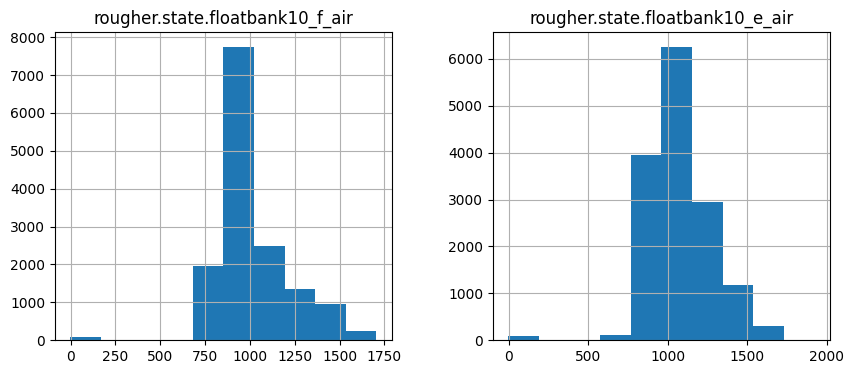

In [62]:
# Compare histograms

test_hist = gold_train_new2[['rougher.state.floatbank10_f_air','rougher.state.floatbank10_e_air']]

test_hist[test_hist.columns].hist(figsize = [10,4])
plt.show()



**Floatbank Air Difference Analysis (fb10_e_air & fb10_f_air) - Detailed Breakdown**

*Filtered for floatbank10_f_air between 844-856 to focus on normal operating range for imputation*

**Overall Difference Metrics**: f between 844-856


| Metric | Value |
|--------|-------|
| **Length** | 1,060 |
| **Median** | 0.031 |
| **Mean** | -25.269 |
| **Std** | 129.603 |
| **Min** | -1,072.173 |
| **Max** | 302.433 |

---

**Categorical Breakdown by Difference Groups**: f between 844-856

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Difference F > 5 (2 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 560.396 | 560.396 | 547.540 | 573.253 |
| | floatbank10_f_air | 850.177 | 850.177 | 849.974 | 850.381 |
| | difference_f | 289.781 | 289.781 | 277.128 | 302.433 |
|  |  |  |  |  |  |
| **Difference F Between 1-5 (27 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.528 | 849.566 | 846.438 | 852.565 |
| | floatbank10_f_air | 850.761 | 850.977 | 848.870 | 854.419 |
| | difference_f | 1.315 | 1.412 | 1.014 | 2.772 |
|  |  |  |  |  |  |
| **Difference F Between 0-1 (257 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.780 | 849.760 | 845.426 | 854.668 |
| | floatbank10_f_air | 850.158 | 850.135 | 845.446 | 855.604 |
| | difference_f | 0.332 | 0.374 | 0.003 | 1.000 |
|  |  |  |  |  |  |
| **Difference F Between -1 to 0 (215 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 850.287 | 850.241 | 845.259 | 853.225 |
| | floatbank10_f_air | 849.857 | 849.874 | 844.795 | 852.897 |
| | difference_f | -0.347 | -0.366 | -1.000 | -0.004 |
|  |  |  |  |  |  |
| **Difference F Between -5 to -1 (24 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 851.440 | 851.520 | 848.338 | 855.630 |
| | floatbank10_f_air | 850.059 | 849.903 | 845.839 | 852.510 |
| | difference_f | -1.301 | -1.617 | -4.910 | -1.008 |
|  |  |  |  |  |  |
| **Difference F Between -50 to -5 (3 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 868.354 | 870.150 | 865.494 | 876.603 |
| | floatbank10_f_air | 850.376 | 851.789 | 850.298 | 854.693 |
| | difference_f | -18.056 | -18.361 | -26.226 | -10.801 |
|  |  |  |  |  |  |
| **Difference F Between -100 to -50 (2 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 907.761 | 907.761 | 904.596 | 910.927 |
| | floatbank10_f_air | 852.104 | 852.104 | 849.955 | 854.253 |
| | difference_f | -55.657 | -55.657 | -60.972 | -50.342 |
|  |  |  |  |  |  |
| **Difference F Between -150 to -100 (0 observations)** |  |  |  |  |  |
| | floatbank10_e_air | N/A | N/A | N/A | N/A |
| | floatbank10_f_air | N/A | N/A | N/A | N/A |
| | difference_f | N/A | N/A | N/A | N/A |
|  |  |  |  |  |  |
| **Difference F Between -220 to -150 (1 observation)** |  |  |  |  |  |
| | floatbank10_e_air | 1,004.413 | 1,004.413 | 1,004.413 | 1,004.413 |
| | floatbank10_f_air | 850.442 | 850.442 | 850.442 | 850.442 |
| | difference_f | -153.971 | -153.971 | -153.971 | -153.971 |
|  |  |  |  |  |  |
| **Difference F < -200 (23 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 1,502.374 | 1,470.636 | 1,097.806 | 1,922.637 |
| | floatbank10_f_air | 849.991 | 849.996 | 849.365 | 850.658 |
| | difference_f | -652.383 | -620.640 | -1,072.173 | -247.191 |

**Overall Difference Metrics**: e between 844-856

| Metric | Value |
|--------|-------|
| **Length** | 523 |
| **Median** | 0.061 |
| **Mean** | 0.032 |
| **Std** | 0.677 |
| **Min** | -4.910 |
| **Max** | 2.772 |

**Categorical Breakdown by Difference Groups**: e between 844-856

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Difference F > 0 (284 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.741 | 849.742 | 845.426 | 854.668 |
| | floatbank10_f_air | 850.223 | 850.215 | 845.446 | 855.604 |
| | difference_f | 0.374 | 0.473 | 0.003 | 2.772 |
|  |  |  |  |  |  |
| **Difference F Between -50 to 0 (239 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 850.352 | 850.369 | 845.259 | 855.630 |
| | floatbank10_f_air | 849.879 | 849.877 | 844.795 | 852.897 |
| | difference_f | -0.368 | -0.492 | -4.910 | -0.004 |
|  |  |  |  |  |  |
| **Difference F < -50 (0 observations)** |  |  |  |  |  |
| | floatbank10_e_air | N/A | N/A | N/A | N/A |
| | floatbank10_f_air | N/A | N/A | N/A | N/A |
| | difference_f | N/A | N/A | N/A | N/A |


---

**Key Observations for Imputation Strategy**

Filtered Dataset Results (Both e_air and f_air between 844-856):
- Dataset size reduced: From 1,060 to 523 observations after filtering both variables to normal operating range
- All extreme outlier categories eliminated: No observations in categories beyond -5 to +5 difference range
- Improved statistics: Standard deviation dropped from 129.603 to 0.677, mean shifted from -25.269 to 0.032
- Only normal operating differences remain: 523 observations distributed across -5 to +2.8 range

Distribution in filtered dataset:
- Difference F > 0: 284 observations (54.3%)
- Difference F Between -5 to 0: 239 observations (45.7%)
- All extreme categories (< -5 or > 5): 0 observations

Imputation Strategy Validation:
- Median difference: 0.061 (very close to 0)
- Mean difference: 0.032 (very close to 0)
- Range: -4.91 to +2.77 (all within reasonable sensor variance)

**Conclusion:**

Filtering both variables to the 844-856 range successfully isolates normal operating conditions. The relationship floatbank10_e_air ≈ floatbank10_f_air (difference ≈ 0) is strongly validated for imputation in this range. Using floatbank10_e_air = floatbank10_f_air + 0.06 or simply floatbank10_e_air = floatbank10_f_air is well-justified for missing values within the normal operating range.

Therefore, reasonable to drop the 2 NaN values where f is not in the 844 - 856 range and fill the rest of the floatbank_e_air NaN values to the same values as floatbank_f_air. 


In [63]:
# View the missing data

gold_train_new2.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                 259
primary_cleaner.input.depressant              189
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                190
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                       183
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


array([[<AxesSubplot:title={'center':'rougher.input.floatbank11_sulfate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank10_sulfate'}>]],
      dtype=object)

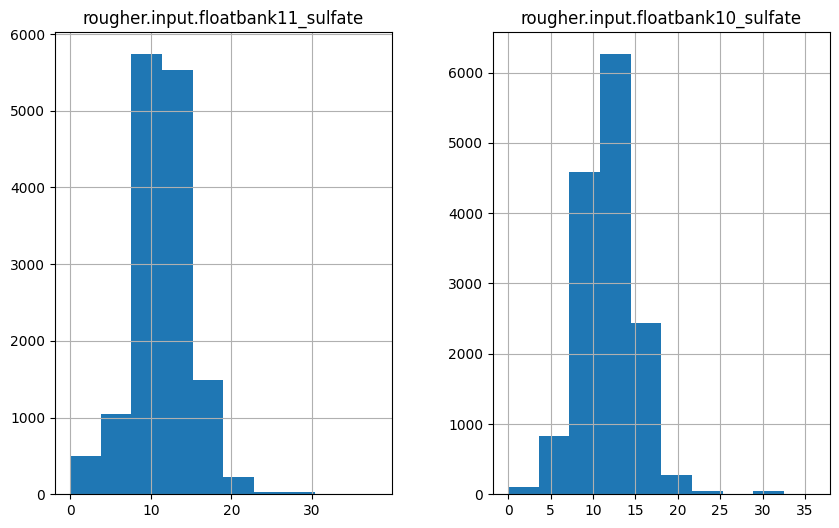

In [64]:
# Compare Histograms for rougher.input.floatbank11_sulfate and rougher.input.floatbank10_sulfate

sulf_hist = gold_train_new2[['rougher.input.floatbank11_sulfate','rougher.input.floatbank10_sulfate']]

sulf_hist[sulf_hist.columns].hist(figsize = [10,6])

In [65]:
# Understand the data

sulfate_train = sulf_hist.copy()
sulfate_train

len(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & (sulfate_train['rougher.input.floatbank11_sulfate'] < 5)])


sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5) & (sulfate_train['rougher.input.floatbank11_sulfate'] < 15)]


sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & (sulfate_train['rougher.input.floatbank11_sulfate'] < 0)]

sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 15) & (sulfate_train['rougher.input.floatbank11_sulfate'] < 25)]

sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & (sulfate_train['rougher.input.floatbank11_sulfate'] > 25 )]


sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'].isna()) & (sulfate_train['rougher.input.floatbank11_sulfate'] < 1)]

rougher.input.floatbank11_sulfate  rougher.input.floatbank10_sulfate
10808                           0.012598                                NaN
12568                           0.147089                                NaN
12569                           0.024857                                NaN
12641                           0.018676                                NaN
12642                           0.013386                                NaN
13460                           0.000969                                NaN
13461                           0.000608                                NaN
13464                           0.007027                                NaN
13466                           0.003277                                NaN
16053                           0.215863                                NaN
16210                           0.000399                                NaN
16211                           0.002165                                NaN
16271                           0.148911                                NaN
16272                           0.215205                                NaN
16273                           0.216342                                NaN
16274                           0.178477                                NaN
16275                           0.169855                                NaN
16276                           0.160534                                NaN
16277                           0.034283                                NaN
16607                           0.328736                                NaN
16608                           0.297620                                NaN
16610                           0.259913                                NaN

In [66]:
# Continue to understand the data

sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'].isna()) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] >= 0) & (sulfate_train['rougher.input.floatbank10_sulfate'] <= 1)]


sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'].notna()) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] >= 0) & (sulfate_train['rougher.input.floatbank10_sulfate'] <= 1)]


sulfate_train['sulfate_10_minus_11'] = sulfate_train['rougher.input.floatbank10_sulfate'] - sulfate_train['rougher.input.floatbank11_sulfate']

sulfate_train[sulfate_train['sulfate_10_minus_11'] < 1]

rougher.input.floatbank11_sulfate  rougher.input.floatbank10_sulfate  \
0                              11.836743                          11.986616   
1                              11.996163                          11.971193   
2                              11.920305                          11.920603   
3                              11.692450                          11.630094   
4                              10.960521                          10.957755   
...                                  ...                                ...   
16855                           7.766744                           7.762770   
16856                           7.095508                           7.356687   
16857                           6.584130                           6.586020   
16858                           6.209517                           6.210119   
16859                           6.168939                           6.146982   

       sulfate_10_minus_11  
0                 0.149873  
1                -0.024970  
2                 0.000298  
3                -0.062356  
4                -0.002766  
...                    ...  
16855            -0.003974  
16856             0.261179  
16857             0.001890  
16858             0.000602  
16859            -0.021957  

[14094 rows x 3 columns]

In [67]:
# When fb11_sulfate between 5.9 - 13.1; the difference tends to be extremely similar
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_10_minus_11'] > 1)]

rougher.input.floatbank11_sulfate  rougher.input.floatbank10_sulfate  \
2917                            7.996953                           9.000358   
3104                            7.607556                          14.887618   
5399                            6.321435                           8.494991   
5630                            8.630431                           9.997678   
5806                            9.974080                          11.012910   
7912                            6.600964                          10.359296   
8626                            7.337104                           9.769538   
8864                            7.470518                           9.497716   
9910                           10.127905                          14.000471   
10184                           6.677624                          10.046377   
10239                          11.343445                          15.743700   
15221                           9.882943                          11.069928   
15222                           8.822537                          11.805334   
15223                           9.865506                          11.442276   

       sulfate_10_minus_11  
2917              1.003405  
3104              7.280063  
5399              2.173556  
5630              1.367247  
5806              1.038831  
7912              3.758332  
8626              2.432434  
8864              2.027198  
9910              3.872566  
10184             3.368753  
10239             4.400254  
15221             1.186984  
15222             2.982797  
15223             1.576769

In [68]:
# rougher.input.floatbank11_sulfate & rougher.input.floatbank10_sulfate comparison
sulfate_train = gold_train_new2.filter(like='_sulfate', axis = 1).copy()
sulfate_difference_train = sulfate_train['rougher.input.floatbank10_sulfate'] - sulfate_train['rougher.input.floatbank11_sulfate']
sulfate_train['sulfate_difference'] = sulfate_difference_train

print("DataFrame")
display(sulfate_train)
print()
print("Median")
display(sulfate_train.median())
print()
print("Mean")
display(sulfate_train.mean())
print()
print("Min")
display(sulfate_train.min())
print()
print("Max")
display(sulfate_train.max())
print()
print("Length")
display(len(sulfate_train))
print()
print()




print(f"Sulfate 11 between 5.9 - 13.1 & Differences Greater Than 1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 1)]))
print()
print()


print(f"Sulfate 11 between 5.9 - 13.1 & Difference Between 0 - 1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 0) 
    & (sulfate_train['sulfate_difference'] < 1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 0) 
    & (sulfate_train['sulfate_difference'] < 1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)]))
print()
print()

print(f"Sulfate 11 between 5.9 - 13.1 & Difference Between 0 - (-)1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < 0) 
    & (sulfate_train['sulfate_difference'] > -1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < 0) 
    & (sulfate_train['sulfate_difference'] > -1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)]))
print()
print()



print(f"Sulfate 11 between 5.9 - 13.1 & Differences Less Than -1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < -1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < -1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < -1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < -1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 5.9) & (sulfate_train['sulfate_difference'] < -1)]))
print()
print()


print(f"Sulfate 11 Less Than 1 & Differences Greater Than 1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 1)]))
print()
print()

print(f"Sulfate 11 Less Than 1 & Difference Between 10 - 15")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 10) & 
    (sulfate_train['sulfate_difference'] < 15)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 10) 
    & (sulfate_train['sulfate_difference'] < 15)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 10) & 
    (sulfate_train['sulfate_difference'] < 15)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 10) 
    & (sulfate_train['sulfate_difference'] < 15)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 10) & 
    (sulfate_train['sulfate_difference'] < 15)]))
print()
print()

print(f"Sulfate 11 Less Than 1 & Difference Between 0 - 1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 0) 
    & (sulfate_train['sulfate_difference'] < 1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 0) 
    & (sulfate_train['sulfate_difference'] < 1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] > 0) & 
    (sulfate_train['sulfate_difference'] < 1)]))
print()
print()

print(f"Sulfate 11 Less Than 1 & Difference Between 0 - (-)1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < 0) 
    & (sulfate_train['sulfate_difference'] > -1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < 0) 
    & (sulfate_train['sulfate_difference'] > -1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < 0) & 
    (sulfate_train['sulfate_difference'] > -1)]))
print()
print()



print(f"Sulfate 11 Less Than 1 & Differences Less Than -1")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < -1)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < -1)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < -1)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < -1)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 1) & (sulfate_train['sulfate_difference'] < -1)]))
print()
print()


DataFrame


rougher.input.floatbank10_sulfate  rougher.input.floatbank11_sulfate  \
0                              11.986616                          11.836743   
1                              11.971193                          11.996163   
2                              11.920603                          11.920305   
3                              11.630094                          11.692450   
4                              10.957755                          10.960521   
...                                  ...                                ...   
16855                           7.762770                           7.766744   
16856                           7.356687                           7.095508   
16857                           6.586020                           6.584130   
16858                           6.210119                           6.209517   
16859                           6.146982                           6.168939   

       sulfate_difference  
0                0.149873  
1               -0.024970  
2                0.000298  
3               -0.062356  
4               -0.002766  
...                   ...  
16855           -0.003974  
16856            0.261179  
16857            0.001890  
16858            0.000602  
16859           -0.021957  

[14853 rows x 3 columns]


Median


rougher.input.floatbank10_sulfate    11.708082
rougher.input.floatbank11_sulfate    11.413828
sulfate_difference                    0.000085
dtype: float64


Mean


rougher.input.floatbank10_sulfate    11.763041
rougher.input.floatbank11_sulfate    11.389276
sulfate_difference                    0.360227
dtype: float64


Min


rougher.input.floatbank10_sulfate     0.000044
rougher.input.floatbank11_sulfate     0.000049
sulfate_difference                  -12.977835
dtype: float64


Max


rougher.input.floatbank10_sulfate    36.118275
rougher.input.floatbank11_sulfate    37.980648
sulfate_difference                   23.746576
dtype: float64


Length


14853



Sulfate 11 between 5.9 - 13.1 & Differences Greater Than 1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    10.686103
rougher.input.floatbank11_sulfate     8.313692
sulfate_difference                    2.302995
dtype: float64


Mean


rougher.input.floatbank10_sulfate    11.223442
rougher.input.floatbank11_sulfate     8.475643
sulfate_difference                    2.747799
dtype: float64


Min


rougher.input.floatbank10_sulfate    8.494991
rougher.input.floatbank11_sulfate    6.321435
sulfate_difference                   1.003405
dtype: float64


Max


rougher.input.floatbank10_sulfate    15.743700
rougher.input.floatbank11_sulfate    11.343445
sulfate_difference                    7.280063
dtype: float64


Length


14



Sulfate 11 between 5.9 - 13.1 & Difference Between 0 - 1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    10.696663
rougher.input.floatbank11_sulfate    10.686777
sulfate_difference                    0.002234
dtype: float64


Mean


rougher.input.floatbank10_sulfate    10.443461
rougher.input.floatbank11_sulfate    10.435455
sulfate_difference                    0.008006
dtype: float64


Min


rougher.input.floatbank10_sulfate    5.905364
rougher.input.floatbank11_sulfate    5.905142
sulfate_difference                   0.000002
dtype: float64


Max


rougher.input.floatbank10_sulfate    13.236237
rougher.input.floatbank11_sulfate    13.097828
sulfate_difference                    0.997880
dtype: float64


Length


4945



Sulfate 11 between 5.9 - 13.1 & Difference Between 0 - (-)1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    10.629334
rougher.input.floatbank11_sulfate    10.645323
sulfate_difference                   -0.002251
dtype: float64


Mean


rougher.input.floatbank10_sulfate    10.436288
rougher.input.floatbank11_sulfate    10.443723
sulfate_difference                   -0.007435
dtype: float64


Min


rougher.input.floatbank10_sulfate    5.913521
rougher.input.floatbank11_sulfate    5.917965
sulfate_difference                  -0.998905
dtype: float64


Max


rougher.input.floatbank10_sulfate    13.095482
rougher.input.floatbank11_sulfate    13.096271
sulfate_difference                   -0.000001
dtype: float64


Length


4966



Sulfate 11 between 5.9 - 13.1 & Differences Less Than -1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    5.293542
rougher.input.floatbank11_sulfate    8.681380
sulfate_difference                  -3.120086
dtype: float64


Mean


rougher.input.floatbank10_sulfate    4.918540
rougher.input.floatbank11_sulfate    9.474758
sulfate_difference                  -4.556217
dtype: float64


Min


rougher.input.floatbank10_sulfate     0.001164
rougher.input.floatbank11_sulfate     6.434697
sulfate_difference                  -12.977835
dtype: float64


Max


rougher.input.floatbank10_sulfate    11.597201
rougher.input.floatbank11_sulfate    13.004236
sulfate_difference                   -1.001706
dtype: float64


Length


28



Sulfate 11 Less Than 1 & Differences Greater Than 1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    12.998993
rougher.input.floatbank11_sulfate     0.029289
sulfate_difference                   12.963763
dtype: float64


Mean


rougher.input.floatbank10_sulfate    13.014298
rougher.input.floatbank11_sulfate     0.028336
sulfate_difference                   12.985962
dtype: float64


Min


rougher.input.floatbank10_sulfate    1.239699
rougher.input.floatbank11_sulfate    0.000086
sulfate_difference                   1.049670
dtype: float64


Max


rougher.input.floatbank10_sulfate    23.748453
rougher.input.floatbank11_sulfate     0.240833
sulfate_difference                   23.746576
dtype: float64


Length


402



Sulfate 11 Less Than 1 & Difference Between 10 - 15
-----------------------------------
Median


rougher.input.floatbank10_sulfate    12.998977
rougher.input.floatbank11_sulfate     0.030791
sulfate_difference                   12.963718
dtype: float64


Mean


rougher.input.floatbank10_sulfate    12.713960
rougher.input.floatbank11_sulfate     0.030226
sulfate_difference                   12.683733
dtype: float64


Min


rougher.input.floatbank10_sulfate    10.000831
rougher.input.floatbank11_sulfate     0.000529
sulfate_difference                   10.000302
dtype: float64


Max


rougher.input.floatbank10_sulfate    14.999096
rougher.input.floatbank11_sulfate     0.240833
sulfate_difference                   14.989952
dtype: float64


Length


318



Sulfate 11 Less Than 1 & Difference Between 0 - 1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    0.042575
rougher.input.floatbank11_sulfate    0.012525
sulfate_difference                   0.023018
dtype: float64


Mean


rougher.input.floatbank10_sulfate    0.306711
rougher.input.floatbank11_sulfate    0.220734
sulfate_difference                   0.085977
dtype: float64


Min


rougher.input.floatbank10_sulfate    0.001472
rougher.input.floatbank11_sulfate    0.000049
sulfate_difference                   0.000201
dtype: float64


Max


rougher.input.floatbank10_sulfate    1.352146
rougher.input.floatbank11_sulfate    0.961210
sulfate_difference                   0.390936
dtype: float64


Length


10



Sulfate 11 Less Than 1 & Difference Between 0 - (-)1
-----------------------------------
Median


rougher.input.floatbank10_sulfate    0.009081
rougher.input.floatbank11_sulfate    0.159014
sulfate_difference                  -0.034193
dtype: float64


Mean


rougher.input.floatbank10_sulfate    0.210179
rougher.input.floatbank11_sulfate    0.321202
sulfate_difference                  -0.111023
dtype: float64


Min


rougher.input.floatbank10_sulfate    0.001530
rougher.input.floatbank11_sulfate    0.003947
sulfate_difference                  -0.371064
dtype: float64


Max


rougher.input.floatbank10_sulfate    0.676090
rougher.input.floatbank11_sulfate    0.829769
sulfate_difference                  -0.000815
dtype: float64


Length


11



Sulfate 11 Less Than 1 & Differences Less Than -1
-----------------------------------
Median


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Mean


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Min


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Max


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Length


0

In [69]:
# Since 99.6 % of the data is ~0 when fb11_sulfate is between 5.9 - 13.1; 
# fill the fb10_sulfate NaN values, when fb11 is in the specified range, to fb11 values

# Training Set

training_values = gold_train_new2[(gold_train_new2['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (gold_train_new2['rougher.input.floatbank11_sulfate'] > 5.9) & (gold_train_new2['rougher.input.floatbank10_sulfate'].isna())]

training_values = training_values['rougher.input.floatbank11_sulfate']
training_values_index = training_values.index

gold_train_new2.loc[training_values_index, ['rougher.input.floatbank10_sulfate']] = training_values

gold_train_new2['rougher.input.floatbank10_sulfate'].isna().sum()

# Full DataSet

full_values = gold_full_new2[(gold_full_new2['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (gold_full_new2['rougher.input.floatbank11_sulfate'] > 5.9) & (gold_full_new2['rougher.input.floatbank10_sulfate'].isna())]

full_values = full_values['rougher.input.floatbank11_sulfate']
full_values_index = full_values.index

gold_full_new2.loc[full_values_index, ['rougher.input.floatbank10_sulfate']] = full_values

gold_full_new2['rougher.input.floatbank10_sulfate'].isna().sum()


# Test Set

test_values = gold_test_new2[(gold_test_new2['rougher.input.floatbank11_sulfate'] < 13.1) & 
    (gold_test_new2['rougher.input.floatbank11_sulfate'] > 5.9) & (gold_test_new2['rougher.input.floatbank10_sulfate'].isna())]

test_values = test_values['rougher.input.floatbank11_sulfate']
test_values_index = test_values.index

gold_test_new2.loc[test_values_index, ['rougher.input.floatbank10_sulfate']] = test_values

gold_test_new2['rougher.input.floatbank10_sulfate'].isna().sum()

254

In [70]:
# Drop the remaining missing values from fb10_sulfate (Training Set)
drop_train_values = gold_train_new2[gold_train_new2['rougher.input.floatbank10_sulfate'].isna()]

drop_train_values_index = drop_train_values.index

gold_train_new2 = gold_train_new2.drop(index = drop_train_values_index, axis = 1)


# Drop the remaining missing values from fb10_sulfate (Full Set)
drop_full_values = gold_full_new2[gold_full_new2['rougher.input.floatbank10_sulfate'].isna()]

drop_full_values_index = drop_full_values.index

gold_full_new2 = gold_full_new2.drop(index = drop_full_values_index, axis = 1)
gold_full_new2

date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
22711  2018-08-18 06:59:59              73.755150   
22712  2018-08-18 07:59:59              69.049291   
22713  2018-08-18 08:59:59              67.002189   
22714  2018-08-18 09:59:59              65.523246   
22715  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
22711                     123.381787                          8.028927   
22712                     120.878188                          7.962636   
22713                     105.666118                          7.955111   
22714                      98.880538                          7.984164   
22715                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
22711                             6.50                        1.304232   
22712                             6.50                        1.302419   
22713                             6.50                        1.315926   
22714                             6.50                        1.241969   
22715                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
22711                             1648.421193   
22712                             1649.820162   
22713                             1649.166761   
22714                             1646.547763   
22715                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
22711                               -400.382169   
22712                               -399.930973   
22713                               -399.888631   
22714                               -398.977083   
22715                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
22711                             1648.742005   
22712        

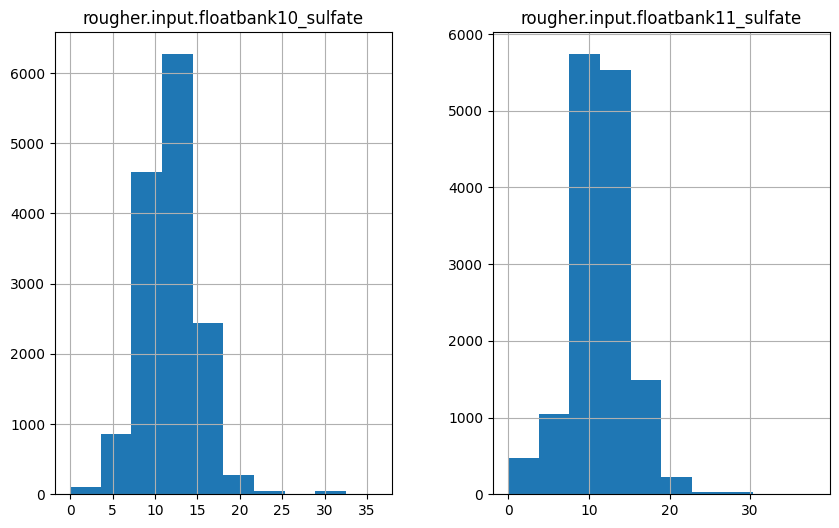

In [71]:
# Compare Histograms (Training Set)
gold_train_new2[['rougher.input.floatbank10_sulfate','rougher.input.floatbank11_sulfate']].hist(figsize = [10,6])
plt.show()


**Sulfate Difference Analysis: rougher.input.floatbank10_sulfate vs floatbank11_sulfate**

*sulfate_difference = rougher.input.floatbank10_sulfate - rougher.input.floatbank11_sulfate*

**Overall Dataset Statistics**

| Metric | floatbank10_sulfate | floatbank11_sulfate | sulfate_difference |
|--------|-------------------|-------------------|-------------------|
| **Length** | 14,853 | 14,853 | 14,853 |
| **Median** | 11.708 | 11.414 | 0.000085 |
| **Mean** | 11.763 | 11.389 | 0.360 |
| **Min** | 0.000044 | 0.000049 | -12.978 |
| **Max** | 36.118 | 37.981 | 23.747 |

---

**Categorical Breakdown by Sulfate11 Range and Difference Groups**

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Sulfate11: 5.9-13.1 & Diff > 1 (14 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.686 | 11.223 | 8.495 | 15.744 |
| | floatbank11_sulfate | 8.314 | 8.476 | 6.321 | 11.343 |
| | sulfate_difference | 2.303 | 2.748 | 1.003 | 7.280 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff 0-1 (4,945 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.697 | 10.443 | 5.905 | 13.236 |
| | floatbank11_sulfate | 10.687 | 10.435 | 5.905 | 13.098 |
| | sulfate_difference | 0.002 | 0.008 | 0.000002 | 0.998 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff 0-(-1) (4,966 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.629 | 10.436 | 5.914 | 13.095 |
| | floatbank11_sulfate | 10.645 | 10.444 | 5.918 | 13.096 |
| | sulfate_difference | -0.002 | -0.007 | -0.999 | -0.000001 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff < -1 (28 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 5.294 | 4.919 | 0.001 | 11.597 |
| | floatbank11_sulfate | 8.681 | 9.475 | 6.435 | 13.004 |
| | sulfate_difference | -3.120 | -4.556 | -12.978 | -1.002 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff > 1 (402 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 12.999 | 13.014 | 1.240 | 23.748 |
| | floatbank11_sulfate | 0.029 | 0.028 | 0.000086 | 0.241 |
| | sulfate_difference | 12.964 | 12.986 | 1.050 | 23.747 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff 0-1 (10 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 0.043 | 0.307 | 0.001 | 1.352 |
| | floatbank11_sulfate | 0.013 | 0.221 | 0.000049 | 0.961 |
| | sulfate_difference | 0.023 | 0.086 | 0.0002 | 0.391 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff 0-(-1) (11 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 0.009 | 0.210 | 0.002 | 0.676 |
| | floatbank11_sulfate | 0.159 | 0.321 | 0.004 | 0.830 |
| | sulfate_difference | -0.034 | -0.111 | -0.371 | -0.001 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff < -1 (0 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | N/A | N/A | N/A | N/A |
| | floatbank11_sulfate | N/A | N/A | N/A | N/A |
| | sulfate_difference | N/A | N/A | N/A | N/A |

---

**Key Observations**

- **Near-equilibrium dominates**: 9,911 out of 14,853 observations (66.7%) fall within the -1 to +1 difference range when sulfate11 is in range (5.9-13.1)
- **Low sulfate11 creates large positive differences**: 402 observations with sulfate11 ≤ 1 show large positive differences (median: 12.964)
- **Extreme negative differences are rare**: Only 28 observations show differences < -1 in the normal sulfate11 range (5.9 - 13.1)
- **Overall relationship is balanced**: Median difference of 0.000085 indicates balance
- **Most data concentrated in range**: The 5.9-13.1 sulfate11 range contains the majority of reliable data with small differences between sensors

**Conclusion**

Can safely input values from `rougher.input.floatbank11_sulfate` when in the range (5.9 - 13.1) into `rougher.input.floatbank10_sulfate`. The remaining 1.5% (222) missing values, from `fb10_sulfate` could potentially be from sensor errors and can be dropped to maintain balance.


In [72]:
# Look at the remaining NaN values
gold_train_new2.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  49
primary_cleaner.input.depressant               61
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                103
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                        42
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


In [73]:
# Almost all are missing <1% data EXCEPT secondary_cleaner.state.floatbank2_a_air
# Drop the NaN values < 1%

# Training Set
drop_columns = ['rougher.input.floatbank11_sulfate','rougher.input.feed_rate','primary_cleaner.input.xanthate','primary_cleaner.input.depressant','primary_cleaner.input.sulfate']
gold_train_new2 = gold_train_new2.dropna(subset = drop_columns)
display(gold_train_new2)

# Full Set
gold_full_new2 = gold_full_new2.dropna(subset = drop_columns)
gold_full_new2



date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
16855  2018-08-18 06:59:59              73.755150   
16856  2018-08-18 07:59:59              69.049291   
16857  2018-08-18 08:59:59              67.002189   
16858  2018-08-18 09:59:59              65.523246   
16859  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
16855                     123.381787                          8.028927   
16856                     120.878188                          7.962636   
16857                     105.666118                          7.955111   
16858                      98.880538                          7.984164   
16859                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
16855                             6.50                        1.304232   
16856                             6.50                        1.302419   
16857                             6.50                        1.315926   
16858                             6.50                        1.241969   
16859                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
16855                             1648.421193   
16856                             1649.820162   
16857                             1649.166761   
16858                             1646.547763   
16859                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856        

date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
22711  2018-08-18 06:59:59              73.755150   
22712  2018-08-18 07:59:59              69.049291   
22713  2018-08-18 08:59:59              67.002189   
22714  2018-08-18 09:59:59              65.523246   
22715  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
22711                     123.381787                          8.028927   
22712                     120.878188                          7.962636   
22713                     105.666118                          7.955111   
22714                      98.880538                          7.984164   
22715                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
22711                             6.50                        1.304232   
22712                             6.50                        1.302419   
22713                             6.50                        1.315926   
22714                             6.50                        1.241969   
22715                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
22711                             1648.421193   
22712                             1649.820162   
22713                             1649.166761   
22714                             1646.547763   
22715                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
22711                               -400.382169   
22712                               -399.930973   
22713                               -399.888631   
22714                               -398.977083   
22715                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
22711                             1648.742005   
22712        

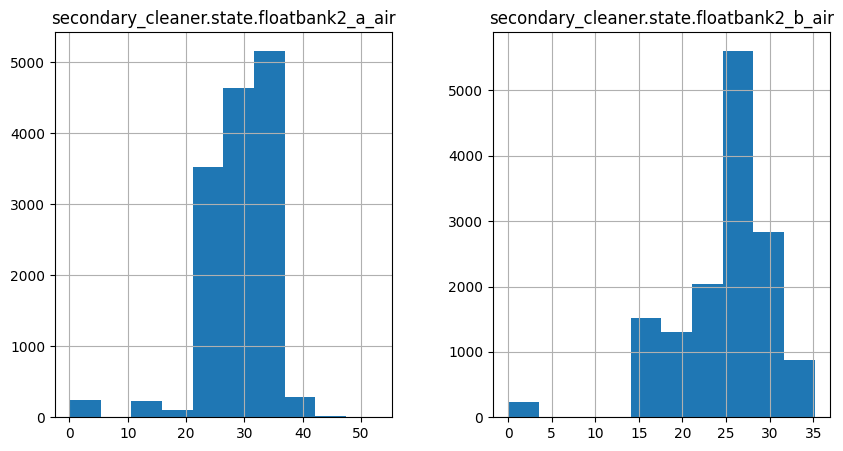

secondary_cleaner.state.floatbank2_a_air          NaN
secondary_cleaner.state.floatbank2_b_air    35.038455
a_b_difference                                    NaN
dtype: float64

In [74]:
# Look into the last column `secondary_cleaner.state.floatbank2_a_air` with 1.5% missing data
gold_train_new2[gold_train_new2['secondary_cleaner.state.floatbank2_a_air'].isna()]

fb2 = gold_train_new2.filter(like = 'floatbank2', axis = 1).copy()
fb2 = fb2.filter(like = 'air', axis = 1)

fb2.hist(figsize = [10,5])
plt.show()

# Inspect the difference

fb2['a_b_difference'] = fb2['secondary_cleaner.state.floatbank2_a_air'] - fb2['secondary_cleaner.state.floatbank2_b_air']
fb2[(fb2['a_b_difference'] > -15) & (fb2['a_b_difference'] < 15)]

fb2[fb2['secondary_cleaner.state.floatbank2_b_air'] >= 35].max()

fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30) & (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35)].max()

fb2[(fb2['secondary_cleaner.state.floatbank2_a_air'].isna()) & fb2['secondary_cleaner.state.floatbank2_b_air']]

fb2[(fb2['secondary_cleaner.state.floatbank2_a_air'].isna())].max()

In [75]:
fb2

secondary_cleaner.state.floatbank2_a_air  \
0                                     25.853109   
1                                     25.880539   
2                                     26.005245   
3                                     25.942508   
4                                     26.024787   
...                                         ...   
16855                                 35.043205   
16856                                 35.026062   
16857                                 35.003586   
16858                                 34.980742   
16859                                 34.940919   

       secondary_cleaner.state.floatbank2_b_air  a_b_difference  
0                                     23.893660        1.959450  
1                                     23.889530        1.991009  
2                                     23.886657        2.118588  
3                                     23.955516        1.986991  
4                                     23.955345        2.069442  
...                                         ...             ...  
16855                                 29.906659        5.136546  
16856                                 29.921795        5.104267  
16857                                 29.990533        5.013053  
16858                                 29.968453        5.012288  
16859                                 30.031867        4.909052  

[14434 rows x 3 columns]

DataFrame


secondary_cleaner.state.floatbank2_a_air  \
0                                     25.853109   
1                                     25.880539   
2                                     26.005245   
3                                     25.942508   
4                                     26.024787   
...                                         ...   
16855                                 35.043205   
16856                                 35.026062   
16857                                 35.003586   
16858                                 34.980742   
16859                                 34.940919   

       secondary_cleaner.state.floatbank2_b_air  a_b_difference  
0                                     23.893660        1.959450  
1                                     23.889530        1.991009  
2                                     23.886657        2.118588  
3                                     23.955516        1.986991  
4                                     23.955345        2.069442  
...                                         ...             ...  
16855                                 29.906659        5.136546  
16856                                 29.921795        5.104267  
16857                                 29.990533        5.013053  
16858                                 29.968453        5.012288  
16859                                 30.031867        4.909052  

[14434 rows x 3 columns]


Median


secondary_cleaner.state.floatbank2_a_air    30.023463
secondary_cleaner.state.floatbank2_b_air    27.021564
a_b_difference                               4.888594
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    29.654285
secondary_cleaner.state.floatbank2_b_air    25.029451
a_b_difference                               4.684958
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air     0.122013
secondary_cleaner.state.floatbank2_b_air     0.000000
a_b_difference                             -13.536875
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    52.651399
secondary_cleaner.state.floatbank2_b_air    35.152122
a_b_difference                              24.654966
dtype: float64


Length


14434



fb_b between 22.9 - 35.1 & Differences Greater Than 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    34.973171
secondary_cleaner.state.floatbank2_b_air    27.943509
a_b_difference                               6.975645
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    34.252227
secondary_cleaner.state.floatbank2_b_air    27.378102
a_b_difference                               6.874125
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    27.951685
secondary_cleaner.state.floatbank2_b_air    22.900440
a_b_difference                               5.000032
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    52.651399
secondary_cleaner.state.floatbank2_b_air    33.067334
a_b_difference                              24.654966
dtype: float64


Length


3717



fb_b between 22.9 - 35.1 & Difference Between 1 - 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    30.051628
secondary_cleaner.state.floatbank2_b_air    28.010539
a_b_difference                               2.122420
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    30.762827
secondary_cleaner.state.floatbank2_b_air    27.988947
a_b_difference                               2.773880
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    24.822521
secondary_cleaner.state.floatbank2_b_air    22.900248
a_b_difference                               1.000237
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    37.975584
secondary_cleaner.state.floatbank2_b_air    33.073671
a_b_difference                               4.999981
dtype: float64


Length


6293



fb_b between 22.9 - 35.1 & Difference Between 0 - 1
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    29.880223
secondary_cleaner.state.floatbank2_b_air    28.937471
a_b_difference                               0.944507
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    28.657667
secondary_cleaner.state.floatbank2_b_air    27.807391
a_b_difference                               0.850276
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    24.816333
secondary_cleaner.state.floatbank2_b_air    23.872494
a_b_difference                               0.000409
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    35.442058
secondary_cleaner.state.floatbank2_b_air    35.048410
a_b_difference                               0.999746
dtype: float64


Length


407



fb_b between 22.9 - 35.1 & Difference Between 0 - (-)1
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    31.988556
secondary_cleaner.state.floatbank2_b_air    32.108819
a_b_difference                              -0.099835
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    32.849083
secondary_cleaner.state.floatbank2_b_air    33.072617
a_b_difference                              -0.223534
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    26.737957
secondary_cleaner.state.floatbank2_b_air    26.978013
a_b_difference                              -0.989676
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    35.053086
secondary_cleaner.state.floatbank2_b_air    35.089583
a_b_difference                              -0.005577
dtype: float64


Length


57



fb_b between 22.9 - 35.1 & Difference Between (-)1 - (-)5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    28.915830
secondary_cleaner.state.floatbank2_b_air    30.025430
a_b_difference                              -1.670835
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    28.713275
secondary_cleaner.state.floatbank2_b_air    30.507579
a_b_difference                              -1.794304
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    23.288626
secondary_cleaner.state.floatbank2_b_air    25.487310
a_b_difference                              -3.671505
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    33.596561
secondary_cleaner.state.floatbank2_b_air    35.062679
a_b_difference                              -1.004651
dtype: float64


Length


26



fb_b between 22.9 - 35.1 & Differences Greater Than -5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    17.152828
secondary_cleaner.state.floatbank2_b_air    26.577827
a_b_difference                              -9.424999
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    17.152828
secondary_cleaner.state.floatbank2_b_air    26.577827
a_b_difference                              -9.424999
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    11.663794
secondary_cleaner.state.floatbank2_b_air    25.200668
a_b_difference                             -13.536875
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    22.641862
secondary_cleaner.state.floatbank2_b_air    27.954986
a_b_difference                              -5.313124
dtype: float64


Length


2


HISTOGRAM: B(22.9 - 35.1)


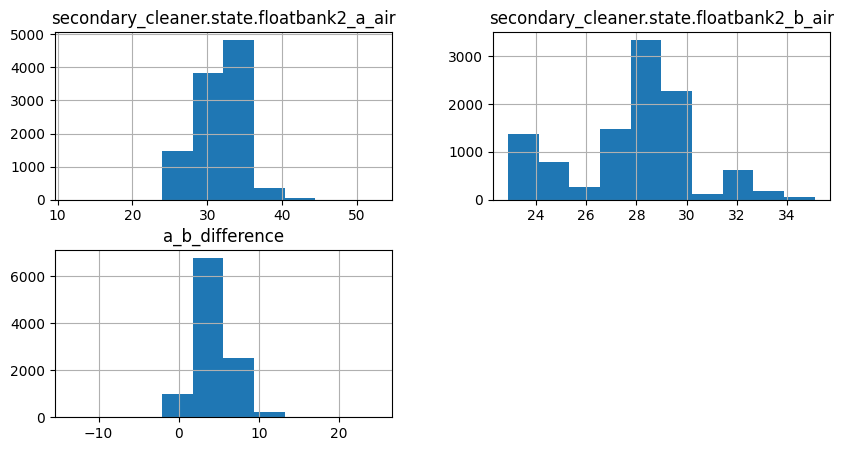

In [76]:
# Only look at secondary_cleaner.state.floatbank2_b_air values between 22.9 & 35.1
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 22.9) & (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1)]

print("DataFrame")
display(fb2)
print()
print("Median")
display(fb2.median())
print()
print("Mean")
display(fb2.mean())
print()
print("Min")
display(fb2.min())
print()
print("Max")
display(fb2.max())
print()
print("Length")
display(len(fb2))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Differences Greater Than 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)]))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Difference Between 1 - 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 1) & 
    (fb2['a_b_difference'] <= 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 1) & 
    (fb2['a_b_difference'] <= 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 1) & 
    (fb2['a_b_difference'] <= 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 1) & 
    (fb2['a_b_difference'] <= 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 1) & 
    (fb2['a_b_difference'] <= 5)]))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Difference Between 0 - 1")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 1)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 1)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 1)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 1)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 1)]))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Difference Between 0 - (-)1")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 0) & 
    (fb2['a_b_difference'] >= -1)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 0) & 
    (fb2['a_b_difference'] >= -1)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 0) & 
    (fb2['a_b_difference'] >= -1)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 0) & 
    (fb2['a_b_difference'] >= -1)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 0) & 
    (fb2['a_b_difference'] >= -1)]))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Difference Between (-)1 - (-)5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -1) & 
    (fb2['a_b_difference'] >= -5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -1) & 
    (fb2['a_b_difference'] >= -5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -1) & 
    (fb2['a_b_difference'] >= -5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -1) & 
    (fb2['a_b_difference'] >= -5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -1) & 
    (fb2['a_b_difference'] >= -5)]))
print()
print()

print(f"fb_b between 22.9 - 35.1 & Differences Greater Than -5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < -5)]))
print()
print("HISTOGRAM: B(22.9 - 35.1)")
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 22.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= -15) & 
    (fb2['a_b_difference'] <= 25)].hist(figsize=[10,5])
plt.show()

In [77]:
# Code used to find ranges within the main range (22.9 - 35.1)
with pd.option_context('display.max_columns',None):
    display(len(gold_train_new2[(gold_train_new2['secondary_cleaner.state.floatbank2_b_air'] >= 31.9) & 
        (gold_train_new2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & 
        (gold_train_new2['secondary_cleaner.state.floatbank2_a_air'].isna())]))

7

Grouped By fb_b in Increments
-------------------------------------------
B =  29.9 - 30.096: > 8
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    40.752771
secondary_cleaner.state.floatbank2_b_air    29.998159
a_b_difference                              10.773487
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    41.057590
secondary_cleaner.state.floatbank2_b_air    29.996569
a_b_difference                              11.061021
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    38.028825
secondary_cleaner.state.floatbank2_b_air    29.937648
a_b_difference                               8.022474
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    48.822781
secondary_cleaner.state.floatbank2_b_air    30.070166
a_b_difference                              18.830586
dtype: float64


Length


64



B =  29.9 - 30.096: 2 - 8
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    34.988451
secondary_cleaner.state.floatbank2_b_air    29.997182
a_b_difference                               4.991009
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    34.986608
secondary_cleaner.state.floatbank2_b_air    29.997998
a_b_difference                               4.988610
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    32.008632
secondary_cleaner.state.floatbank2_b_air    29.900325
a_b_difference                               2.001851
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    37.964324
secondary_cleaner.state.floatbank2_b_air    30.094222
a_b_difference                               7.976967
dtype: float64


Length


1759



B =  29.9 - 30.096: < 2
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    31.330761
secondary_cleaner.state.floatbank2_b_air    30.005149
a_b_difference                               1.363140
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    30.710582
secondary_cleaner.state.floatbank2_b_air    30.003108
a_b_difference                               0.707474
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    28.278860
secondary_cleaner.state.floatbank2_b_air    29.935529
a_b_difference                              -1.776456
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    32.019074
secondary_cleaner.state.floatbank2_b_air    30.065564
a_b_difference                               1.999661
dtype: float64


Length


26


HISTOGRAM: B(29.9 - 30.096)


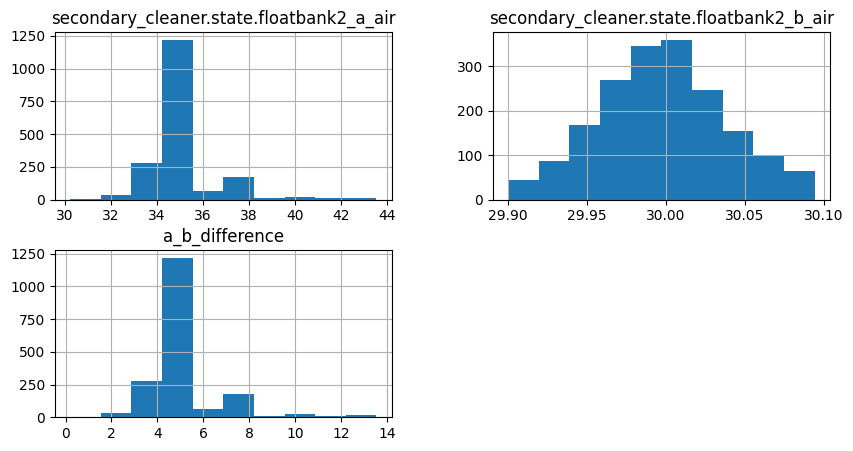

In [78]:
print("Grouped By fb_b in Increments")
print("-------------------------------------------")
print("B =  29.9 - 30.096: > 8")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] > 8)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] > 8)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] > 8)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] > 8)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] > 8)]))
print()
print()
print("B =  29.9 - 30.096: 2 - 8")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 2) & 
    (fb2['a_b_difference'] <= 8)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 2) & 
    (fb2['a_b_difference'] <= 8)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 2) & 
    (fb2['a_b_difference'] <= 8)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 2) & 
    (fb2['a_b_difference'] <= 8)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 2) & 
    (fb2['a_b_difference'] <= 8)]))
print()
print()
print("B =  29.9 - 30.096: < 2")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] < 2)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] < 2)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] < 2)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] < 2)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] < 2)]))
print()
print("HISTOGRAM: B(29.9 - 30.096)")
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 29.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.096) & (fb2['a_b_difference'] >= 0) & 
    (fb2['a_b_difference'] <= 15)].hist(figsize=[10,5])
plt.title("B(29.9 - 30.096)")
plt.show()

B =  30.8 - 30.9: > 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Length


0



B =  30.8 - 30.9: 1 - 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    32.054830
secondary_cleaner.state.floatbank2_b_air    30.881083
a_b_difference                               1.170556
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    32.429425
secondary_cleaner.state.floatbank2_b_air    30.874578
a_b_difference                               1.554847
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    31.968334
secondary_cleaner.state.floatbank2_b_air    30.830393
a_b_difference                               1.088165
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    33.002983
secondary_cleaner.state.floatbank2_b_air    30.884599
a_b_difference                               2.164216
dtype: float64


Length


7



B =  30.8 - 30.9: < 1
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Length


0


HISTOGRAM: B(30.8 - 30.9)


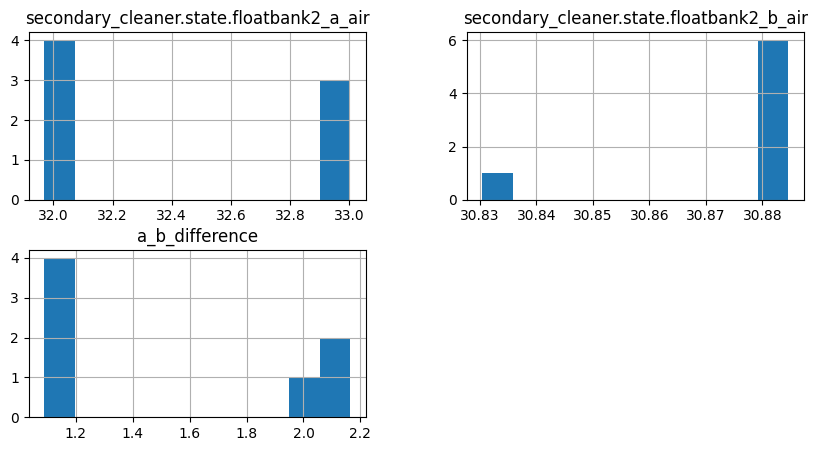

In [79]:
print("B =  30.8 - 30.9: > 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] > 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] > 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] > 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] > 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] > 5)]))
print()
print()
print("B =  30.8 - 30.9: 1 - 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)]))
print()
print()
print("B =  30.8 - 30.9: < 1")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] < 1)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] < 1)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] < 1)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] < 1)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] >= 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 30.9) & (fb2['a_b_difference'] < 1)]))
print()
print("HISTOGRAM: B(30.8 - 30.9)")
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 30.8) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 30.9) & (fb2['a_b_difference'] >= -50) & 
    (fb2['a_b_difference'] <= 50)].hist(figsize=[10,5])
plt.show()

B =  31.9 - 32.1: > 4
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    36.146185
secondary_cleaner.state.floatbank2_b_air    32.030408
a_b_difference                               4.115778
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    36.146185
secondary_cleaner.state.floatbank2_b_air    32.030408
a_b_difference                               4.115778
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    36.146185
secondary_cleaner.state.floatbank2_b_air    32.030408
a_b_difference                               4.115778
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    36.146185
secondary_cleaner.state.floatbank2_b_air    32.030408
a_b_difference                               4.115778
dtype: float64


Length


1



B =  31.9 - 32.1: 1 - 4
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    35.000732
secondary_cleaner.state.floatbank2_b_air    32.010188
a_b_difference                               2.991053
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    34.903813
secondary_cleaner.state.floatbank2_b_air    32.006914
a_b_difference                               2.896899
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    33.557849
secondary_cleaner.state.floatbank2_b_air    31.900684
a_b_difference                               1.606131
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    35.381552
secondary_cleaner.state.floatbank2_b_air    32.099894
a_b_difference                               3.453636
dtype: float64


Length


509



B =  31.9 - 32.1: < 1
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    31.965927
secondary_cleaner.state.floatbank2_b_air    32.012205
a_b_difference                              -0.049059
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    31.899670
secondary_cleaner.state.floatbank2_b_air    32.004511
a_b_difference                              -0.104841
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    29.985472
secondary_cleaner.state.floatbank2_b_air    31.905816
a_b_difference                              -1.968312
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    32.600791
secondary_cleaner.state.floatbank2_b_air    32.096872
a_b_difference                               0.584643
dtype: float64


Length


32


HISTOGRAM: B(31.9 - 32.1)


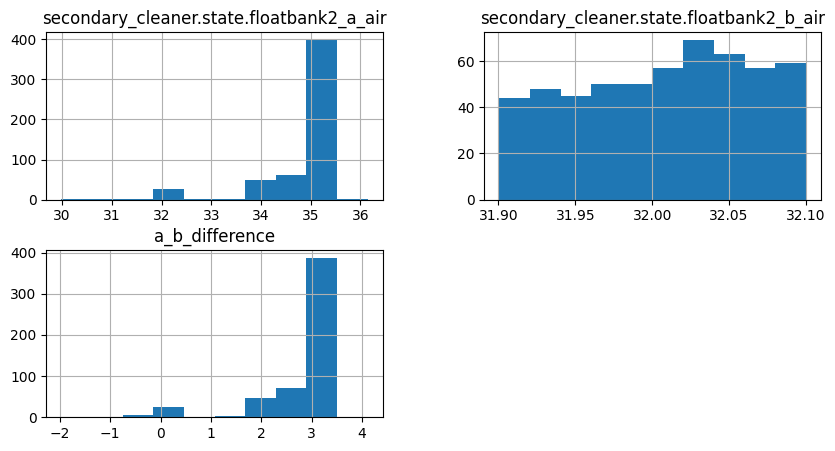

In [80]:
print("B =  31.9 - 32.1: > 4")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] > 4)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] > 4)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] > 4)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] > 4)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] > 4)]))
print()
print()
print("B =  31.9 - 32.1: 1 - 4")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 4)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 4)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 4)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 4)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 4)]))
print()
print()
print("B =  31.9 - 32.1: < 1")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] < 1)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] < 1)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] < 1)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] < 1)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] <= 32.1) & (fb2['a_b_difference'] < 1)]))
print()
print("HISTOGRAM: B(31.9 - 32.1)")
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 31.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 32.1) & (fb2['a_b_difference'] >= -2) & 
    (fb2['a_b_difference'] <= 5)].hist(figsize=[10,5])
plt.show()

B =  34.9 - 35.1: > 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Length


0



B =  34.9 - 35.1: 1 - 5
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air   NaN
secondary_cleaner.state.floatbank2_b_air   NaN
a_b_difference                             NaN
dtype: float64


Length


0



B =  34.9 - 35.1: < 1
-----------------------------------
Median


secondary_cleaner.state.floatbank2_a_air    34.993688
secondary_cleaner.state.floatbank2_b_air    35.010702
a_b_difference                              -0.021907
dtype: float64


Mean


secondary_cleaner.state.floatbank2_a_air    34.782362
secondary_cleaner.state.floatbank2_b_air    35.010515
a_b_difference                              -0.228153
dtype: float64


Min


secondary_cleaner.state.floatbank2_a_air    32.756136
secondary_cleaner.state.floatbank2_b_air    34.909409
a_b_difference                              -2.290366
dtype: float64


Max


secondary_cleaner.state.floatbank2_a_air    35.442058
secondary_cleaner.state.floatbank2_b_air    35.089583
a_b_difference                               0.393647
dtype: float64


Length


50


HISTOGRAM: B(34.9 - 35.1)


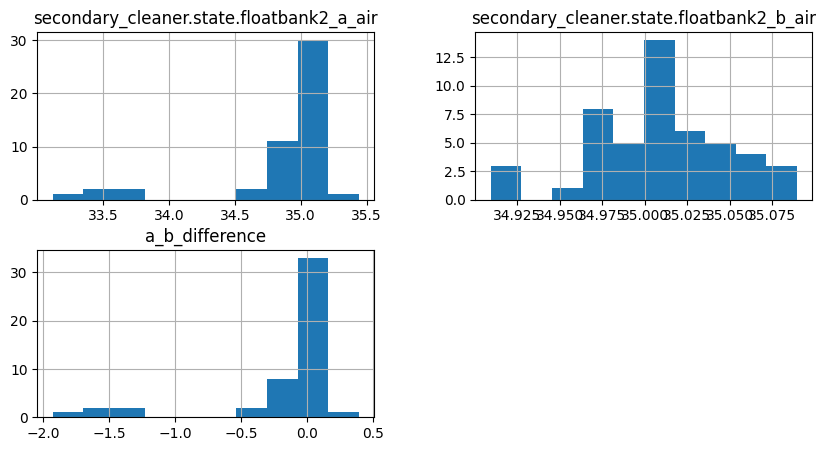

In [81]:
print("B =  34.9 - 35.1: > 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] > 5)]))
print()
print()
print("B =  34.9 - 35.1: 1 - 5")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= 1) & 
    (fb2['a_b_difference'] <= 5)]))
print()
print()
print("B =  34.9 - 35.1: < 1")
print("-----------------------------------")
print("Median")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 1)].median())
print()
print("Mean")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 1)].mean())
print()
print("Min")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 1)].min())
print()
print("Max")
display(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 1)].max())
print()
print("Length")
display(len(fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] < 1)]))
print()
print("HISTOGRAM: B(34.9 - 35.1)")
fb2[(fb2['secondary_cleaner.state.floatbank2_b_air'] > 34.9) & 
    (fb2['secondary_cleaner.state.floatbank2_b_air'] < 35.1) & (fb2['a_b_difference'] >= -2) & 
    (fb2['a_b_difference'] <= 1)].hist(figsize=[10,5])
plt.title("B(34.9 - 35.1)")
plt.show()

In [82]:
gold_train_new2.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


In [83]:

# Define a function to replace the specified values
def replace_values(df,start,stop, add):
    replace_a = df[(df['secondary_cleaner.state.floatbank2_b_air'] >= start) &
        (df['secondary_cleaner.state.floatbank2_b_air'] <= stop) &
        (df['secondary_cleaner.state.floatbank2_a_air'].isna())]
    
    replace_a_index = replace_a.index
    replace_a_values = replace_a['secondary_cleaner.state.floatbank2_b_air'] + add

    df.loc[replace_a_index,['secondary_cleaner.state.floatbank2_a_air']] = replace_a_values


In [84]:
display(gold_train_new2.isna().sum())
gold_full_new2.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


In [85]:
# When secondary_cleaner.state.floatbank2_b_air is between 29.9 - 30.096
# ~95.1% (1759) of secondary_cleaner.state.floatbank2_a_air is (~)+5.0
# The range for the gap was between 2 - 8 w/ roughly 1500 between a gap of 3-6

# Training dataset
gold_train_new2 = gold_train_new2.copy()
replace_values(gold_train_new2,29.9, 30.096, 5)

# Full dataset
gold_full_new2 = gold_full_new2.copy()
replace_values(gold_full_new2,29.9, 30.096, 5)

# Test dataset
gold_test_new2 = gold_test_new2.copy()
replace_values(gold_test_new2,29.9, 30.096, 5)

In [86]:
# When secondary_cleaner.state.floatbank2_b_air is between 30.8 - 30.9
# ~100% (7) of secondary_cleaner.state.floatbank2_a_air is (~)+1.2
# The range for the gap was between 1 - 2.2

# Training dataset
replace_values(gold_train_new2,30.8, 30.9, 1.2)

# Full dataset
replace_values(gold_full_new2,30.8, 30.9, 1.2)

# Test dataset
replace_values(gold_test_new2,30.8, 30.9, 1.2)

In [87]:
# When secondary_cleaner.state.floatbank2_b_air is between 31.9 - 32.1
# ~93.9% (509) of secondary_cleaner.state.floatbank2_a_air is (~)+3.0
# The range for the gap was between 1 - 4 

# Training dataset
replace_values(gold_train_new2,31.9, 32.1, 3)

# Full dataset
replace_values(gold_full_new2,31.9, 32.1, 3)

# Test dataset
replace_values(gold_test_new2,31.9, 32.1, 3)

In [88]:
# When secondary_cleaner.state.floatbank2_b_air is between 34.9 - 35.1
# ~100% (50) of secondary_cleaner.state.floatbank2_a_air is (~)-0.0
# The range for the gap was between < 1 with a min gap of -2.29 and a max gap of 0.39

# Training dataset
replace_values(gold_train_new2,34.9, 35.1, -0)

# Full dataset
replace_values(gold_full_new2,34.9, 35.1, -0)

# test dataset
replace_values(gold_test_new2,34.9, 35.1, -0)

In [89]:
gold_test_new2.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             254


In [90]:
# Remaining NaN values in secondary_cleaner.state.floatbank2_a_air 

display(gold_train_new2.isna().sum())
display(gold_full_new2.isna().sum())

date                                           0
final.output.recovery                          0
primary_cleaner.input.sulfate                  0
primary_cleaner.input.depressant               0
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 0
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        0
rougher.input.feed_size                        0
rougher.input.feed_sol                         0
rougher.input.feed_au                          0
rougher.input.floatb

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0


In [91]:
# Drop the rest of the NaN values as they are under 1% (98/14,434) missing

# Training Set
gold_train_new2 = gold_train_new2.dropna()

# Full Dataset
gold_full_new2 = gold_train_new2.dropna()

display(gold_train_new2.isna().sum())
gold_full_new2.isna().sum()


date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

## Missing Values - Impute Test Set

In [92]:
# Test Sets Top Missing Values
def missing_pct(df):
    missing_values = df.isna().sum().values
    column_names = df.isna().sum().index
    return list((missing_values / 5856) * 100)

values = missing_pct(gold_test_new2)

values[:23]

[0.0,
 5.157103825136613,
 4.849726775956284,
 0.0,
 2.8346994535519126,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.273224043715847,
 0.6830601092896175,
 0.3756830601092896,
 1.1441256830601094,
 0.273224043715847,
 4.337431693989071,
 2.1004098360655736,
 0.9392076502732241,
 1.9808743169398908]


**Missing Values in Test Set >1%**

| Column | Count | Percent |
|--------|-------|---------|
primary_cleaner.input.sulfate         |        302  | 5.16% 
primary_cleaner.input.depressant      |        284  | 4.85% 
rougher.input.floatbank10_sulfate     |        254  | 4.34%
primary_cleaner.input.xanthate        |        166  | 2.83%
rougher.input.floatbank10_xanthate    |        123  | 2.10%
rougher.input.floatbank11_xanthate    |        116  | 1.98%
rougher.input.feed_sol                |         67  | 1.14%

array([[<AxesSubplot:title={'center':'primary_cleaner.input.sulfate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.depressant'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank10_sulfate'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.input.xanthate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank10_xanthate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank11_xanthate'}>],
       [<AxesSubplot:title={'center':'rougher.input.feed_sol'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

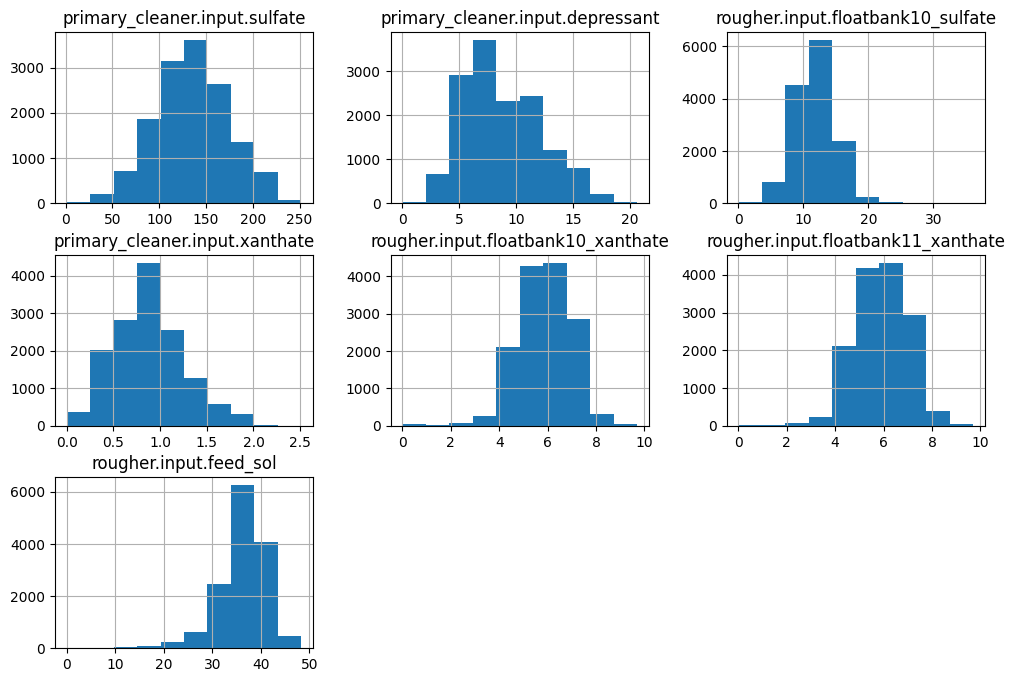

In [93]:
# Use Training data to impute Test Set

test_imp_columns = ['primary_cleaner.input.sulfate','primary_cleaner.input.depressant',
                    'rougher.input.floatbank10_sulfate','primary_cleaner.input.xanthate',
                    'rougher.input.floatbank10_xanthate','rougher.input.floatbank11_xanthate',
                    'rougher.input.feed_sol']

# Investigate the histograms from the Training dataset for the test_imp_columns
gold_train_new2[test_imp_columns].hist(figsize = [12,8])


In [94]:
with pd.option_context('display.max_columns',None):
    display(gold_train_new2)

date  final.output.recovery  \
0      2016-01-15 00:00:00              70.541216   
1      2016-01-15 01:00:00              69.266198   
2      2016-01-15 02:00:00              68.116445   
3      2016-01-15 03:00:00              68.347543   
4      2016-01-15 04:00:00              66.927016   
...                    ...                    ...   
16855  2018-08-18 06:59:59              73.755150   
16856  2018-08-18 07:59:59              69.049291   
16857  2018-08-18 08:59:59              67.002189   
16858  2018-08-18 09:59:59              65.523246   
16859  2018-08-18 10:59:59              70.281454   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
16855                     123.381787                          8.028927   
16856                     120.878188                          7.962636   
16857                     105.666118                          7.955111   
16858                      98.880538                          7.984164   
16859                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.25                        0.988759   
1                                 7.25                        1.002663   
2                                 7.25                        0.991265   
3                                 7.25                        0.996739   
4                                 7.25                        1.009869   
...                                ...                             ...   
16855                             6.50                        1.304232   
16856                             6.50                        1.302419   
16857                             6.50                        1.315926   
16858                             6.50                        1.241969   
16859                             6.50                        1.283045   

       primary_cleaner.state.floatbank8_a_air  \
0                                 1549.775757   
1                                 1576.166671   
2                                 1601.556163   
3                                 1599.968720   
4                                 1601.339707   
...                                       ...   
16855                             1648.421193   
16856                             1649.820162   
16857                             1649.166761   
16858                             1646.547763   
16859                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856        

In [95]:
# Define a function to replace df rows with the imputation
def replace_rows_median(df, df_imp, column):
    
    imputation = df_imp[column].median()
    values = df[column].fillna(imputation)
    index = values.index
    
    df.loc[index,[column]] = values

In [96]:
# replace primary_cleaner.input.sulfate with the median from the training set
replace_rows_median(gold_test_new2, gold_train_new2,'primary_cleaner.input.sulfate')

array([[<AxesSubplot:title={'center':'primary_cleaner.input.sulfate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.depressant'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank10_sulfate'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.input.xanthate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank10_xanthate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank11_xanthate'}>],
       [<AxesSubplot:title={'center':'rougher.input.feed_sol'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

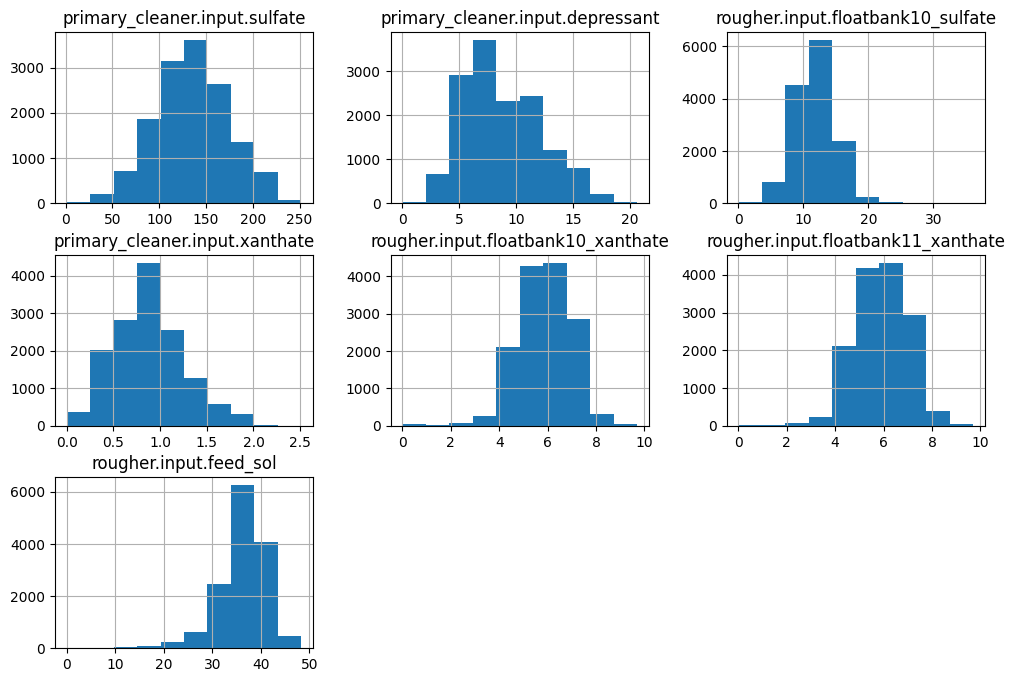

In [97]:
# Inspect the training set for remaining NaN values for the Test Set
gold_train_new2[test_imp_columns].hist(figsize = [12,8])

In [98]:
# Input the median for primary_cleaner.input.depressant and primary_cleaner.input.xanthate

replace_rows_median(gold_test_new2,gold_train_new2,'primary_cleaner.input.depressant')
replace_rows_median(gold_test_new2,gold_train_new2,'primary_cleaner.input.xanthate')


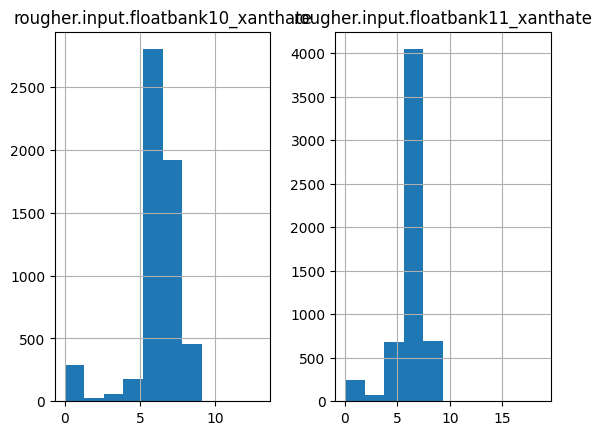

In [99]:
# Look at rougher.input.floatbank10_xanthate and rougher.input.floatbank11_xanthate for the test set

xan_test = gold_test_new2[['rougher.input.floatbank10_xanthate','rougher.input.floatbank11_xanthate']]
xan_test.hist()

xan_test_values = xan_test[(xan_test['rougher.input.floatbank10_xanthate'].isna()) & (xan_test['rougher.input.floatbank11_xanthate'].notna())]
xan_test11_values = xan_test_values['rougher.input.floatbank11_xanthate']
xan_test11_index = xan_test11_values.index
gold_test_new2.loc[xan_test11_index,['rougher.input.floatbank10_xanthate']] = xan_test11_values

date                                            0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             254


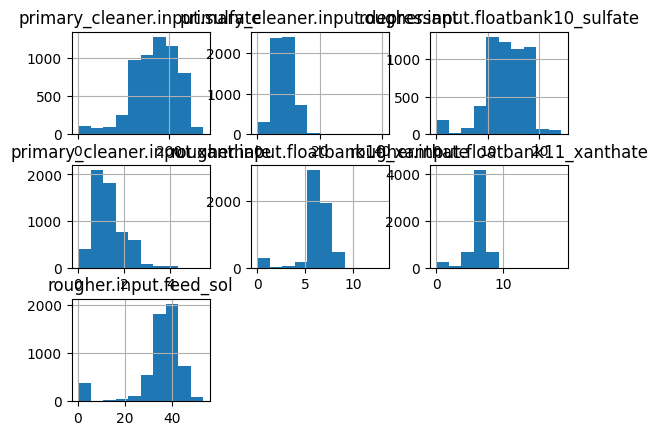

In [100]:
# Input the median from the training set in the remaining values in fb10 and fb11_xanthate missing NaN values
replace_rows_median(gold_test_new2,gold_train_new2,'rougher.input.floatbank10_xanthate')
replace_rows_median(gold_test_new2,gold_train_new2,'rougher.input.floatbank11_xanthate')

gold_test_new2[test_imp_columns].hist()
gold_test_new2.isna().sum()

Sulfate 11 between 2 - 5.9 & Differences Greater Than 16
-----------------------------------
Median


rougher.input.floatbank10_sulfate    20.001514
rougher.input.floatbank11_sulfate     3.326154
sulfate_difference                   16.675361
dtype: float64


Mean


rougher.input.floatbank10_sulfate    20.001514
rougher.input.floatbank11_sulfate     3.326154
sulfate_difference                   16.675361
dtype: float64


Min


rougher.input.floatbank10_sulfate    20.001514
rougher.input.floatbank11_sulfate     3.326154
sulfate_difference                   16.675361
dtype: float64


Max


rougher.input.floatbank10_sulfate    20.001514
rougher.input.floatbank11_sulfate     3.326154
sulfate_difference                   16.675361
dtype: float64


Length


1



Histogram: Sulfate 11 Between 2 - 5.9; Difference > 16


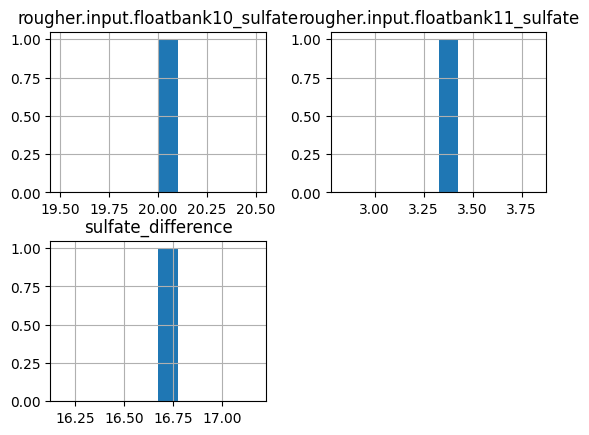




Sulfate 11 between 2 - 5.9 & Difference Between 6 - 16
-----------------------------------
Median


rougher.input.floatbank10_sulfate    13.972227
rougher.input.floatbank11_sulfate     4.594282
sulfate_difference                    9.814021
dtype: float64


Mean


rougher.input.floatbank10_sulfate    13.524470
rougher.input.floatbank11_sulfate     4.273113
sulfate_difference                    9.251357
dtype: float64


Min


rougher.input.floatbank10_sulfate    11.004907
rougher.input.floatbank11_sulfate     2.070688
sulfate_difference                    6.503352
dtype: float64


Max


rougher.input.floatbank10_sulfate    15.148519
rougher.input.floatbank11_sulfate     5.833199
sulfate_difference                   10.874033
dtype: float64


Length


4



Histogram: Sulfate 11 Between 2 - 5.9; Difference Between 6 - 16


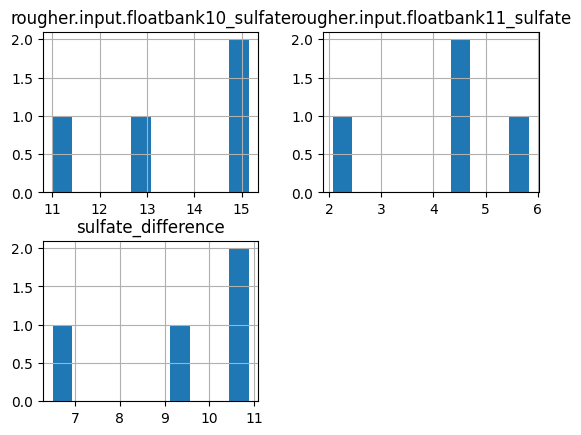




Sulfate 11 between 2 - 5.9 & Differences Less Than 6
-----------------------------------
Median


rougher.input.floatbank10_sulfate    4.865535
rougher.input.floatbank11_sulfate    4.837483
sulfate_difference                   0.000150
dtype: float64


Mean


rougher.input.floatbank10_sulfate    4.716024
rougher.input.floatbank11_sulfate    4.668578
sulfate_difference                   0.047447
dtype: float64


Min


rougher.input.floatbank10_sulfate    0.260698
rougher.input.floatbank11_sulfate    2.389089
sulfate_difference                  -5.575302
dtype: float64


Max


rougher.input.floatbank10_sulfate    8.511460
rougher.input.floatbank11_sulfate    5.893169
sulfate_difference                   5.410969
dtype: float64


Length


280



Histogram: Sulfate 11 Between 2 - 5.9; Difference < 6


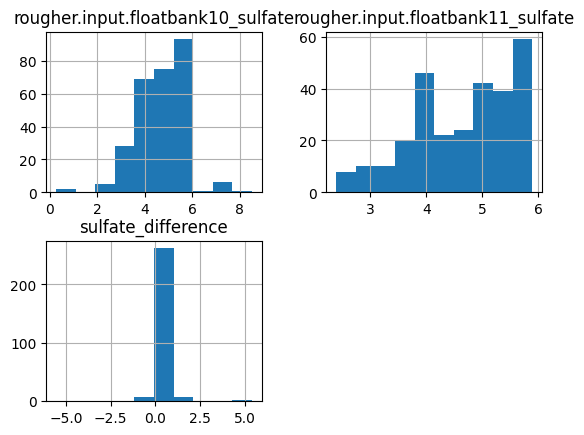

In [101]:
# Fix fb_10_sulfate in a similar way to the training set; use sulfate 11 (2 - 5.9) 
# For the trainig set we used sulfate 11 (5.9 - 13.1)
# However, the majority of the training sets NaN values were not outside of this range

print(f"Sulfate 11 between 2 - 5.9 & Differences Greater Than 16")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)]))
print()
print()
print("Histogram: Sulfate 11 Between 2 - 5.9; Difference > 16")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] > 16)].hist()
plt.show()

print()
print()
print()
print(f"Sulfate 11 between 2 - 5.9 & Difference Between 6 - 16")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) 
    & (sulfate_train['sulfate_difference'] > 6)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) 
    & (sulfate_train['sulfate_difference'] > 6)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)]))
print()
print()
print("Histogram: Sulfate 11 Between 2 - 5.9; Difference Between 6 - 16")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].hist()
plt.show()


print()
print()
print()
print(f"Sulfate 11 between 2 - 5.9 & Differences Less Than 6")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)]))
print()
print()
print("Histogram: Sulfate 11 Between 2 - 5.9; Difference < 6")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 5.9) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 2) & (sulfate_train['sulfate_difference'] <= 6)].hist()
plt.show()

Sulfate 11 between 0 - 2 & Differences Greater Than 19
-----------------------------------
Median


rougher.input.floatbank10_sulfate    21.996584
rougher.input.floatbank11_sulfate     0.013980
sulfate_difference                   21.980544
dtype: float64


Mean


rougher.input.floatbank10_sulfate    21.215349
rougher.input.floatbank11_sulfate     0.013487
sulfate_difference                   21.201862
dtype: float64


Min


rougher.input.floatbank10_sulfate    19.998256
rougher.input.floatbank11_sulfate     0.001877
sulfate_difference                   19.971806
dtype: float64


Max


rougher.input.floatbank10_sulfate    23.748453
rougher.input.floatbank11_sulfate     0.028495
sulfate_difference                   23.746576
dtype: float64


Length


24



Histogram: Sulfate 11 Between 0 - 2; Difference > 19


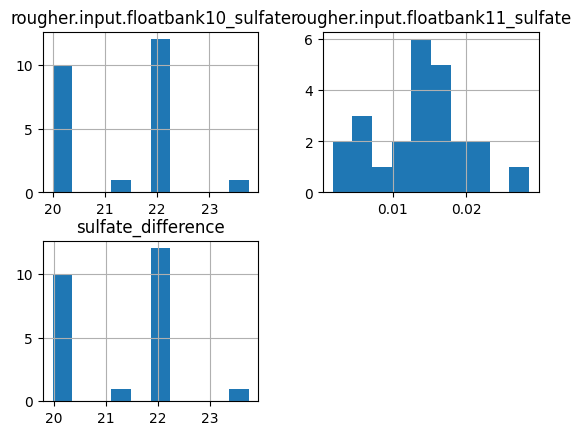




Sulfate 11 between 0 - 2 & Difference Between 5 - 19
-----------------------------------
Median


rougher.input.floatbank10_sulfate    12.998672
rougher.input.floatbank11_sulfate     0.029660
sulfate_difference                   12.962889
dtype: float64


Mean


rougher.input.floatbank10_sulfate    12.538645
rougher.input.floatbank11_sulfate     0.039859
sulfate_difference                   12.498786
dtype: float64


Min


rougher.input.floatbank10_sulfate    5.997823
rougher.input.floatbank11_sulfate    0.000086
sulfate_difference                   5.808519
dtype: float64


Max


rougher.input.floatbank10_sulfate    18.003129
rougher.input.floatbank11_sulfate     1.582220
sulfate_difference                   17.999669
dtype: float64


Length


379



Histogram: Sulfate 11 Between 0 - 2; Difference Between 5 - 19


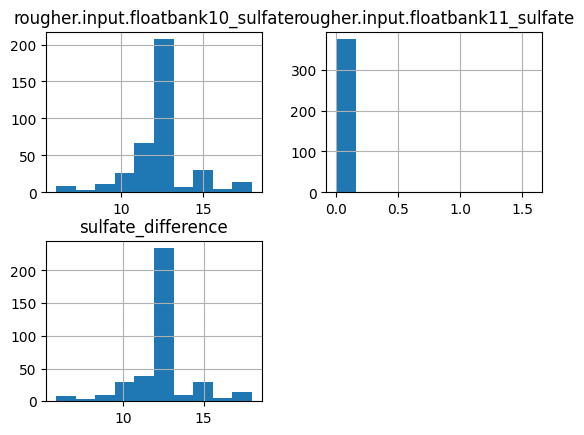




Sulfate 11 between 0 - 2 & Differences Less Than 5
-----------------------------------
Median


rougher.input.floatbank10_sulfate    0.354322
rougher.input.floatbank11_sulfate    0.159014
sulfate_difference                  -0.000815
dtype: float64


Mean


rougher.input.floatbank10_sulfate    0.565230
rougher.input.floatbank11_sulfate    0.379218
sulfate_difference                   0.186012
dtype: float64


Min


rougher.input.floatbank10_sulfate    0.001472
rougher.input.floatbank11_sulfate    0.000049
sulfate_difference                  -0.371064
dtype: float64


Max


rougher.input.floatbank10_sulfate    4.167661
rougher.input.floatbank11_sulfate    1.987143
sulfate_difference                   4.048312
dtype: float64


Length


25



Histogram: Sulfate 11 Between 0 - 2; Difference < 5


array([[<AxesSubplot:title={'center':'rougher.input.floatbank10_sulfate'}>,
        <AxesSubplot:title={'center':'rougher.input.floatbank11_sulfate'}>],
       [<AxesSubplot:title={'center':'sulfate_difference'}>,
        <AxesSubplot:>]], dtype=object)

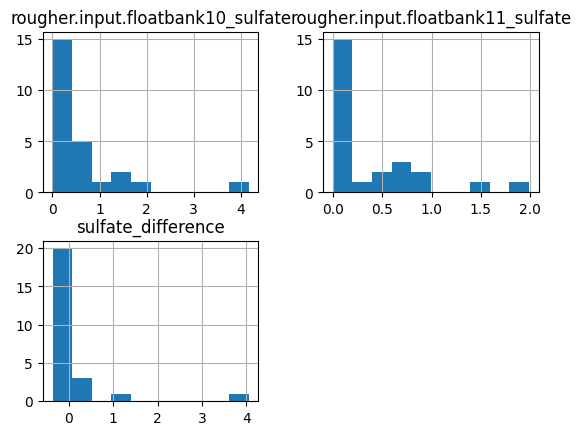

In [102]:
# Fix fb_10_sulfate in a similar way to the training set; use sulfate 11 (0 - 2) 


print(f"Sulfate 11 between 0 - 2 & Differences Greater Than 19")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)]))
print()
print()
print("Histogram: Sulfate 11 Between 0 - 2; Difference > 19")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 19)].hist()
plt.show()

print()
print()
print()
print(f"Sulfate 11 between 0 - 2 & Difference Between 5 - 19")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) & 
    (sulfate_train['sulfate_difference'] > 5)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) 
    & (sulfate_train['sulfate_difference'] > 5)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) & 
    (sulfate_train['sulfate_difference'] > 5)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) 
    & (sulfate_train['sulfate_difference'] > 5)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) & 
    (sulfate_train['sulfate_difference'] > 5)]))
print()
print()
print("Histogram: Sulfate 11 Between 0 - 2; Difference Between 5 - 19")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 19) & 
    (sulfate_train['sulfate_difference'] > 5)].hist()
plt.show()


print()
print()
print()
print(f"Sulfate 11 between 0 - 2 & Differences Less Than 5")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)]))
print()
print()
print("Histogram: Sulfate 11 Between 0 - 2; Difference < 5")
sulfate_train[(sulfate_train['rougher.input.floatbank11_sulfate'] <= 2) & 
    (sulfate_train['rougher.input.floatbank11_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 5)].hist()

In [103]:
# Define a function to replace the specified values
def replace_add(df, column_1, column_2, start,stop, add):
    replace = df[(df[column_2] >= start) &
        (df[column_2] <= stop) &
        (df[column_1].isna())]
    
    replace_index = replace.index
    replace_values = replace[column_2] + add

    df.loc[replace_index,[column_1]] = replace_values

In [104]:
# When Sulfate 11 Between 2 - 5.9 & Difference < 6
# Sulfate 10 ~ +0.0 difference ~98.2% of the time (280/285)
# column_1 = 10_sulfate
replace_add(gold_test_new2, 'rougher.input.floatbank10_sulfate','rougher.input.floatbank11_sulfate', 2, 5.9, 0.0)

In [105]:
# When Sulfate 11 Between 0 - 2 & Difference Between 5 - 19
# Sulfate 10 ~ +12.96 difference ~88.6% of the time (379/428)
# column_1 = 10_sulfate

replace_add(gold_test_new2, 'rougher.input.floatbank10_sulfate','rougher.input.floatbank11_sulfate', 0, 2, 12.96)


**Imputation Strategy for `rougher.input.floatbank10_sulfate`**

Analysis of the relationship between `rougher.input.floatbank10_sulfate` and `rougher.input.floatbank11_sulfate` reveals two distinct behavioral patterns based on sulfate 11 concentration, enabling accurate conditional imputation for the test set.

---

**Statistical Comparison**

**Pattern 1: Sulfate 11 Between 2.0 - 5.9 (Near-Perfect Correlation)**

| Metric | floatbank10_sulfate | floatbank11_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 4.87 | 4.84 | 0.00015 | Nearly identical values |
| **Mean** | 4.72 | 4.67 | 0.047 | Minimal systematic bias |
| **Min** | 0.26 | 2.39 | -5.58 | Occasional outliers |
| **Max** | 8.51 | 5.89 | 5.41 | Occasional outliers |

- **Observations:** 280/285 (98.2% for this range)

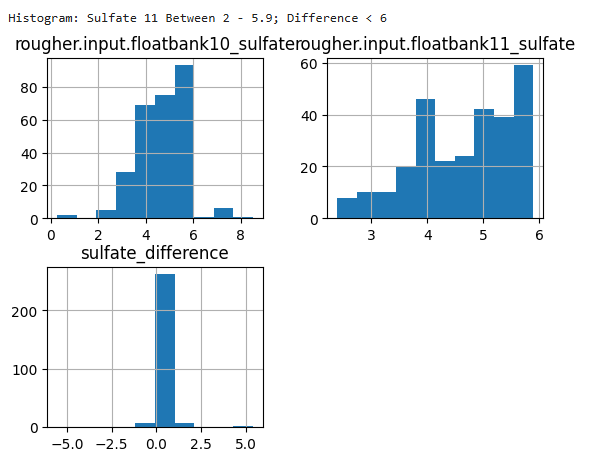

**Pattern 2: Sulfate 11 Between 0.0 - 2.0 (Large Offset)**

| Metric | floatbank10_sulfate | floatbank11_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 12.99 | 0.030 | 12.96 | Consistent +13 offset |
| **Mean** | 12.54 | 0.040 | 12.50 | Stable relationship |
| **Min** | 6.00 | 0.000086 | 5.81 | Lower bound maintained |
| **Max** | 18.00 | 1.58 | 18.00 | Upper bound maintained |

- **Observations:** 379/428 (88.6% for this range)

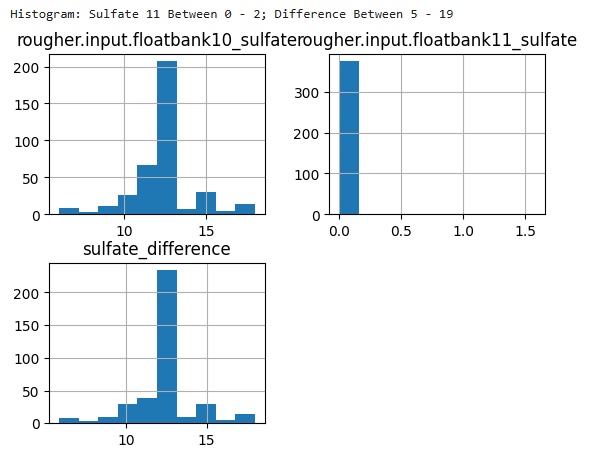

---

**Key Findings**

- **Conditional relationship identified**: The relationship between floatbank 10 and 11 sulfate measurements changes dramatically based on sulfate 11 concentration
- **Pattern 1 (Mid-Range, 2.0-5.9)**: Median difference of 0.00015 confirms floatbank10 ≈ floatbank11 under normal synchronized conditions
- **Pattern 2 (Low Range, 0.0-2.0)**: Median difference of 12.96 reveals floatbank 10 maintains a consistent +13 unit offset, suggesting different stages
- **Strong empirical support**: 659 total training observations (280 + 379) provide high confidence in pattern reliability
- **High coverage in low range**: 88.6% of observations (379/428) in the 0-2 range follow the +12.96 offset pattern

**Recommended imputation approach**: Apply conditional imputation to the test set based on floatbank11_sulfate value:
- When sulfate 11 [2.0 - 5.9]: `floatbank10_sulfate = floatbank11_sulfate + 0.0`
- When sulfate 11 [0.0 - 2.0]: `floatbank10_sulfate = floatbank11_sulfate + 12.96`

The strong patterns observed in training data ensure this relationship-based imputation will generalize well to the test set and accurately represent underlying process dynamics.


Sulfate 10 between 0 - 11 & Differences Greater Than 16
-----------------------------------
Median


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Mean


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Min


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Max


rougher.input.floatbank10_sulfate   NaN
rougher.input.floatbank11_sulfate   NaN
sulfate_difference                  NaN
dtype: float64


Length


0



Histogram: Sulfate 10 Between 0 - 11; Difference > 16


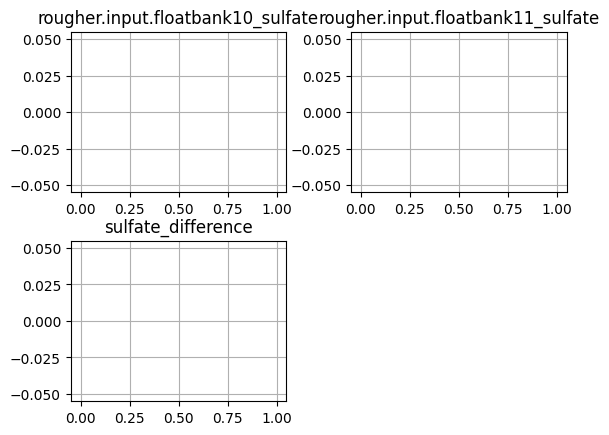




Sulfate 10 between 0 - 11 & Difference Between 6 - 16
-----------------------------------
Median


rougher.input.floatbank10_sulfate    9.998971
rougher.input.floatbank11_sulfate    0.024849
sulfate_difference                   9.974456
dtype: float64


Mean


rougher.input.floatbank10_sulfate    9.458411
rougher.input.floatbank11_sulfate    0.045602
sulfate_difference                   9.412809
dtype: float64


Min


rougher.input.floatbank10_sulfate    6.805585
rougher.input.floatbank11_sulfate    0.000086
sulfate_difference                   6.781141
dtype: float64


Max


rougher.input.floatbank10_sulfate    10.999767
rougher.input.floatbank11_sulfate     1.222696
sulfate_difference                   10.974617
dtype: float64


Length


52



Histogram: Sulfate 10 Between 0 - 11; Difference Between 6 - 16


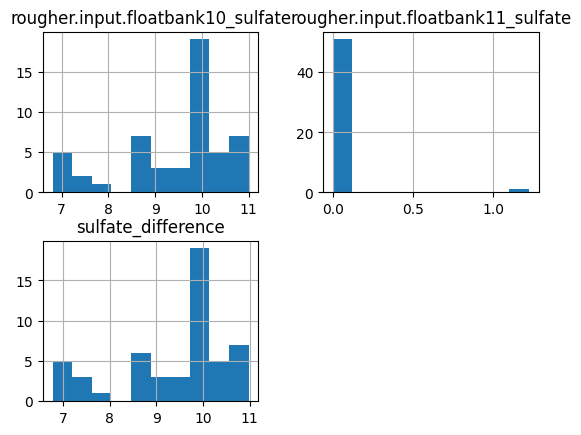




Sulfate 10 between 0 - 11 & Differences Less Than 6
-----------------------------------
Median


rougher.input.floatbank10_sulfate    9.427303
rougher.input.floatbank11_sulfate    9.429677
sulfate_difference                  -0.000142
dtype: float64


Mean


rougher.input.floatbank10_sulfate    8.971865
rougher.input.floatbank11_sulfate    8.985439
sulfate_difference                  -0.013574
dtype: float64


Min


rougher.input.floatbank10_sulfate     0.001164
rougher.input.floatbank11_sulfate     0.000049
sulfate_difference                  -12.977835
dtype: float64


Max


rougher.input.floatbank10_sulfate    10.999994
rougher.input.floatbank11_sulfate    14.501981
sulfate_difference                    5.990988
dtype: float64


Length


6076



Histogram: Sulfate 10 Between 0 - 11; Difference < 6


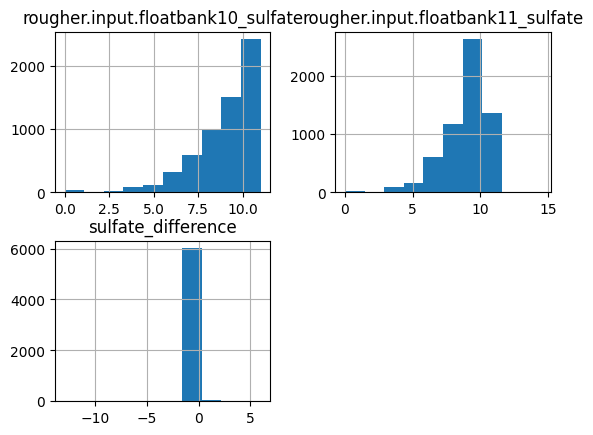

In [106]:
# Look into fb_11_sulfate


# Fix fb_11_sulfate in a similar way to the training set; use sulfate 10 (0 - 11) 
# For the trainig set we used sulfate 11 (5.9 - 13.1)
# However, the majority of the training sets NaN values were not outside of this range


print(f"Sulfate 10 between 0 - 11 & Differences Greater Than 16")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)]))
print()
print()
print("Histogram: Sulfate 10 Between 0 - 11; Difference > 16")
sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] > 16)].hist()
plt.show()

print()
print()
print()
print(f"Sulfate 10 between 0 - 11 & Difference Between 6 - 16")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) 
    & (sulfate_train['sulfate_difference'] > 6)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) 
    & (sulfate_train['sulfate_difference'] > 6)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)]))
print()
print()
print("Histogram: Sulfate 10 Between 0 - 11; Difference Between 6 - 16")
sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 16) & 
    (sulfate_train['sulfate_difference'] > 6)].hist()
plt.show()


print()
print()
print()
print(f"Sulfate 10 between 0 - 11 & Differences Less Than 6")
print("-----------------------------------")
print("Median")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)].median())
print()
print("Mean")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)].mean())
print()
print("Min")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)].min())
print()
print("Max")
display(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)].max())
print()
print("Length")
display(len(sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)]))
print()
print()
print("Histogram: Sulfate 10 Between 0 - 11; Difference < 6")
sulfate_train[(sulfate_train['rougher.input.floatbank10_sulfate'] <= 11) & 
    (sulfate_train['rougher.input.floatbank10_sulfate'] > 0) & (sulfate_train['sulfate_difference'] <= 6)].hist()
plt.show()


In [107]:
# When Sulfate 10 Between 0 - 11 & Difference < 6
# Sulfate 11 ~ -0.0 difference ~99.2% of the time (6076/6128)
# column_1 = 11_sulfate
replace_add(gold_test_new2, 'rougher.input.floatbank11_sulfate','rougher.input.floatbank10_sulfate', 0, 11, -0.0)

**Imputation Strategy for `rougher.input.floatbank11_sulfate`**: *Test Set*

Analysis of the relationship between `rougher.input.floatbank11_sulfate` and `rougher.input.floatbank10_sulfate` reveals a dominant pattern when sulfate 10 is in the low-to-mid range (0-11), enabling accurate imputation for the test set.

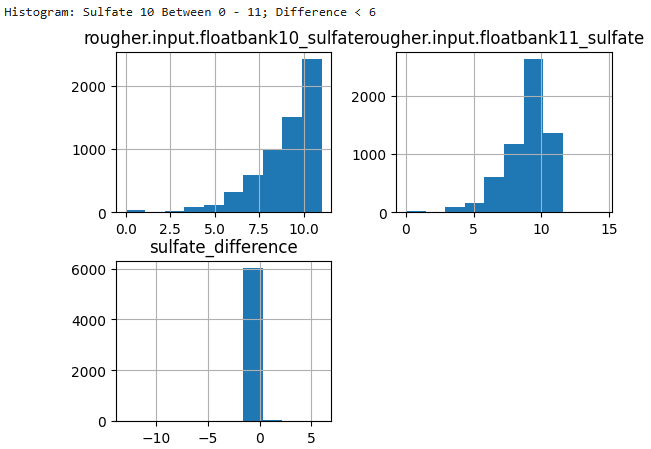

---

**Statistical Comparison**

**Pattern 1: Sulfate 10 Between 0 - 11, Difference < 6 (Near-Perfect Correlation)**

| Metric | floatbank11_sulfate | floatbank10_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 9.43 | 9.43 | -0.00014 | Nearly identical values |
| **Mean** | 8.99 | 8.97 | -0.014 | Minimal systematic bias |
| **Min** | 0.000049 | 0.0012 | -12.98 | Occasional outliers |
| **Max** | 14.50 | 11.00 | 5.99 | Occasional outliers |
| **Observations** | 6,076 | 6,076 | - | Excellent sample size |

**Observations**: 6,076/6128 - 99.2% in this range

**Pattern 2: Sulfate 10 Between 0 - 11, Difference Between 6 - 16 (Large Offset)**

| Metric | floatbank11_sulfate | floatbank10_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 0.025 | 10.00 | 9.97 | Floatbank 11 near zero |
| **Mean** | 0.046 | 9.46 | 9.41 | Floatbank 11 near zero |
| **Min** | 0.000086 | 6.81 | 6.78 | Lower bound maintained |
| **Max** | 1.22 | 11.00 | 10.97 | Upper bound maintained |

**Observations**: 52/6128

---

**Key Findings**

The relationship between floatbank 11 and 10 sulfate measurements is dominated by a single strong pattern: when sulfate 10 is between 0-11, the measurements are nearly identical (difference ≈ -0.00014). With 6,076 training observations representing 99.2% coverage (6,076/6,128) in this range, the near-perfect correlation provides extremely high confidence for imputation. The secondary pattern (52 observations with difference 6-16) represents less than 1% of cases and involves floatbank 11 values near zero, making it unsuitable for reliable imputation.

---

**Recommended imputation approach**: Apply simple imputation to the test set based on floatbank10_sulfate value when it falls between 0-11:
- `floatbank11_sulfate = floatbank10_sulfate - 0.0`

This strategy leverages the overwhelmingly dominant pattern (99.2% coverage) where the two measurements are synchronized. The exceptional sample size and near-perfect correlation ensure this imputation will accurately represent the flotation process for virtually all missing values in the test set.

array([[<AxesSubplot:title={'center':'rougher.input.feed_size'}>,
        <AxesSubplot:title={'center':'rougher.input.feed_sol'}>],
       [<AxesSubplot:title={'center':'size_sol_difference'}>,
        <AxesSubplot:>]], dtype=object)

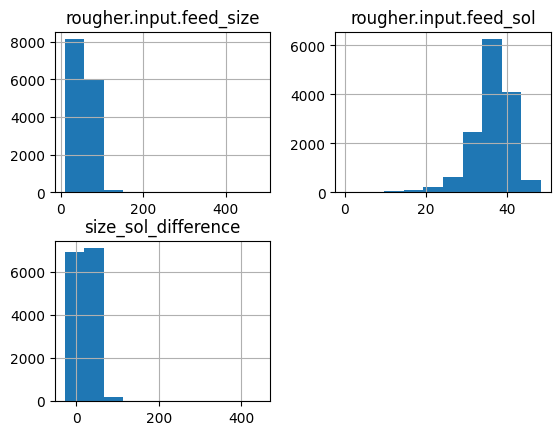

In [108]:
# rougher.input.feed_sol compared with rougher.input.feed_size
temp = gold_train_new2[['rougher.input.feed_size','rougher.input.feed_sol']].copy()
tempy = temp['rougher.input.feed_size'] - temp['rougher.input.feed_sol']
temp['size_sol_difference'] = tempy

temp.hist()




feed_size between 24 - 30 & Differences Greater Than 12
-----------------------------------
Median


rougher.input.feed_size   NaN
rougher.input.feed_sol    NaN
size_sol_difference       NaN
dtype: float64


Mean


rougher.input.feed_size   NaN
rougher.input.feed_sol    NaN
size_sol_difference       NaN
dtype: float64


Min


rougher.input.feed_size   NaN
rougher.input.feed_sol    NaN
size_sol_difference       NaN
dtype: float64


Max


rougher.input.feed_size   NaN
rougher.input.feed_sol    NaN
size_sol_difference       NaN
dtype: float64


Length


0



Histogram: feed_size Between 24 - 30; Difference > 12


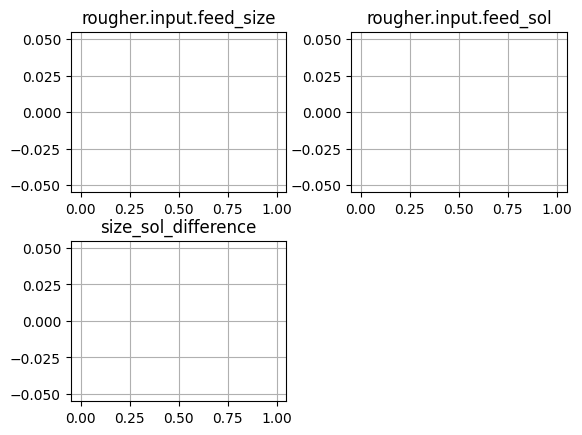




feed_size between 24 - 30 & Difference Between -5 - 12
-----------------------------------
Median


rougher.input.feed_size    27.109922
rougher.input.feed_sol     25.216914
size_sol_difference         2.251916
dtype: float64


Mean


rougher.input.feed_size    27.041810
rougher.input.feed_sol     24.346161
size_sol_difference         2.695650
dtype: float64


Min


rougher.input.feed_size    24.791570
rougher.input.feed_sol     16.127246
size_sol_difference        -4.211725
dtype: float64


Max


rougher.input.feed_size    29.094951
rougher.input.feed_sol     31.378698
size_sol_difference        11.791231
dtype: float64


Length


10



Histogram: feedsize Between 24 - 30; Difference Between -5 - 12


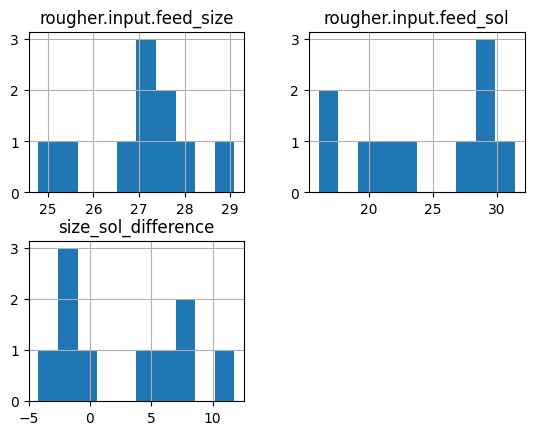




feedsize between 24 - 30 & Differences Less Than -5
-----------------------------------
Median


rougher.input.feed_size    26.900620
rougher.input.feed_sol     39.273575
size_sol_difference       -11.222353
dtype: float64


Mean


rougher.input.feed_size    27.504092
rougher.input.feed_sol     38.441521
size_sol_difference       -10.937429
dtype: float64


Min


rougher.input.feed_size    25.523679
rougher.input.feed_sol     34.017529
size_sol_difference       -13.428541
dtype: float64


Max


rougher.input.feed_size    28.915604
rougher.input.feed_sol     40.432298
size_sol_difference        -6.391390
dtype: float64


Length


33



Histogram: feed_size Between 24 - 30; Difference < -5


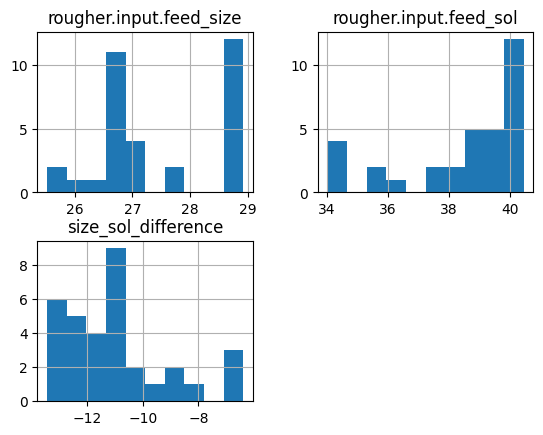

In [109]:
print(f"feed_size between 24 - 30 & Differences Greater Than 12")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)]))
print()
print()
print("Histogram: feed_size Between 24 - 30; Difference > 12")
temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] > 12)].hist()
plt.show()
print()
print()
print()
print(f"feed_size between 24 - 30 & Difference Between -5 - 12")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) & 
    (temp['size_sol_difference'] > -5)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) 
    & (temp['size_sol_difference'] > -5)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) & 
    (temp['size_sol_difference'] > -5)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) 
    & (temp['size_sol_difference'] > -5)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) & 
    (temp['size_sol_difference'] > -5)]))
print()
print()
print("Histogram: feedsize Between 24 - 30; Difference Between -5 - 12")
temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= 12) & 
    (temp['size_sol_difference'] > -5)].hist()
plt.show()
print()
print()
print()
print(f"feedsize between 24 - 30 & Differences Less Than -5")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)]))
print()
print()
print("Histogram: feed_size Between 24 - 30; Difference < -5")
temp[(temp['rougher.input.feed_size'] <= 30) & 
    (temp['rougher.input.feed_size'] > 24) & (temp['size_sol_difference'] <= -5)].hist()
plt.show()

**Summary Notes**: `rougher.input.feed_size` (24 - 30)
- In the case, when rougher.input.feed_size is between 25.5 - 30 the rougher.input.feed_sol ranges between 34 - 41 w/ median 39.273575
- This will be better than using the difference number as the range is spread from (-)14 - (-)6
- While this is only a difference of 1, there is a cluster between 37 - 41 for rougher.input.feed_sol
- However, there is a cluster from -8 - (-)14 for the difference of size - sol
- Similarly, for the cases below 25.5 (see min range - rougher.input.feed_size: "feedsize between 24 - 30 & Differences Less Than -5"), it is better to use the median for sol (25.216914) as the range is smaller

In [110]:
# Input 25.2 in the test set for all values under 25.5 in feed_size
temp_new = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new_df = temp_new[(temp_new['rougher.input.feed_size'].notna()) & 
    (temp_new['rougher.input.feed_size'] < 25.5) & temp_new['rougher.input.feed_sol'].isna()]
temp_new_index = temp_new_df.index
temp_new_index
gold_test_new2.loc[temp_new_index,['rougher.input.feed_sol']] = 25.216914


In [111]:
# Input 39.273575 in the test set for values under 30 in feed_size when sol is NaN
temp_new39 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new39_df = temp_new39[(temp_new39['rougher.input.feed_size'].notna()) & 
    (temp_new39['rougher.input.feed_size'] < 30) & temp_new39['rougher.input.feed_sol'].isna()]
temp_new39_index = temp_new39_df.index
gold_test_new2.loc[temp_new39_index,['rougher.input.feed_sol']] = 39.273575

feed_size between 30 - 35 & Differences Greater Than 30
-----------------------------------
Median


rougher.input.feed_size    31.828881
rougher.input.feed_sol      0.295493
size_sol_difference        31.736166
dtype: float64


Mean


rougher.input.feed_size    32.595230
rougher.input.feed_sol      0.926313
size_sol_difference        31.668917
dtype: float64


Min


rougher.input.feed_size    31.747198
rougher.input.feed_sol      0.010000
size_sol_difference        31.451704
dtype: float64


Max


rougher.input.feed_size    34.209612
rougher.input.feed_sol      2.473446
size_sol_difference        31.818881
dtype: float64


Length


3



Histogram: feed_size Between 30 - 35; Difference > 30


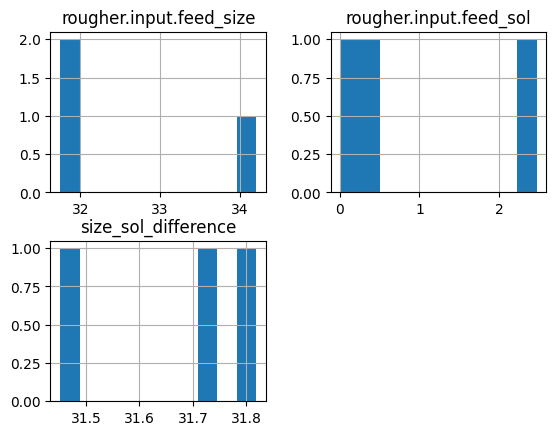




feed_size between 30 - 35 & Difference Between 4 - 30
-----------------------------------
Median


rougher.input.feed_size    32.845521
rougher.input.feed_sol     22.693740
size_sol_difference         9.791736
dtype: float64


Mean


rougher.input.feed_size    32.826805
rougher.input.feed_sol     22.981714
size_sol_difference         9.845092
dtype: float64


Min


rougher.input.feed_size    30.488406
rougher.input.feed_sol     14.251787
size_sol_difference         4.148806
dtype: float64


Max


rougher.input.feed_size    34.803126
rougher.input.feed_sol     30.654320
size_sol_difference        16.747172
dtype: float64


Length


15



Histogram: feedsize Between 30 - 35; Difference Between 4 - 30


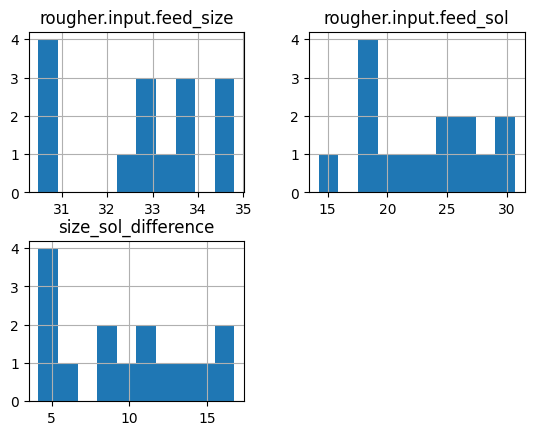




feed_size between 30 - 35 & Differences Less Than 4
-----------------------------------
Median


rougher.input.feed_size    31.766950
rougher.input.feed_sol     36.606883
size_sol_difference        -4.452920
dtype: float64


Mean


rougher.input.feed_size    31.908016
rougher.input.feed_sol     36.336713
size_sol_difference        -4.428697
dtype: float64


Min


rougher.input.feed_size    30.338484
rougher.input.feed_sol     30.203501
size_sol_difference       -12.369594
dtype: float64


Max


rougher.input.feed_size    34.911402
rougher.input.feed_sol     43.031938
size_sol_difference         3.040533
dtype: float64


Length


60



Histogram: feed_size Between 30 - 35; Difference < 4


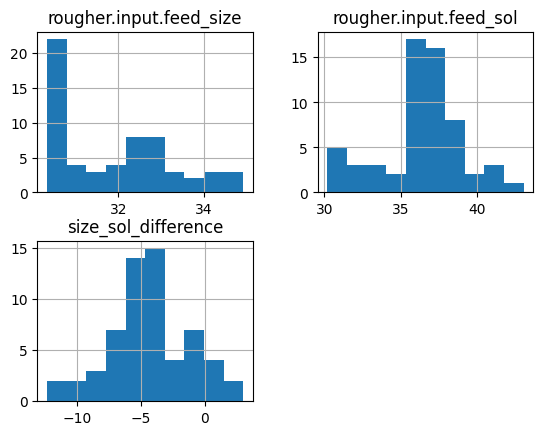

In [112]:
print(f"feed_size between 30 - 35 & Differences Greater Than 30")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)]))
print()
print()
print("Histogram: feed_size Between 30 - 35; Difference > 30")
temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] > 30)].hist()
plt.show()

print()
print()
print()
print(f"feed_size between 30 - 35 & Difference Between 4 - 30")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) & 
    (temp['size_sol_difference'] > 4)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) 
    & (temp['size_sol_difference'] > 4)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) & 
    (temp['size_sol_difference'] > 4)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) 
    & (temp['size_sol_difference'] > 4)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) & 
    (temp['size_sol_difference'] > 4)]))
print()
print()
print("Histogram: feedsize Between 30 - 35; Difference Between 4 - 30")
temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] <= 30) & 
    (temp['size_sol_difference'] > 4)].hist()
plt.show()
print()
print()
print()

print(f"feed_size between 30 - 35 & Differences Less Than 4")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)]))
print()
print()
print("Histogram: feed_size Between 30 - 35; Difference < 4")
temp[(temp['rougher.input.feed_size'] <= 35) & 
    (temp['rougher.input.feed_size'] > 30) & (temp['size_sol_difference'] < 4)].hist()
plt.show()

In [113]:
# Same instance as before, we will use the median for rougher.input.feed_sol - 36.606883
temp_new36 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new36_df = temp_new36[(temp_new36['rougher.input.feed_size'].notna()) & 
    (temp_new36['rougher.input.feed_size'] < 35) & temp_new36['rougher.input.feed_sol'].isna()]
temp_new36_index = temp_new36_df.index
gold_test_new2.loc[temp_new36_index,['rougher.input.feed_sol']] = 36.606883


feed_size between 35 - 38 & Differences Less Than 32
-----------------------------------
Median


rougher.input.feed_size    37.057387
rougher.input.feed_sol     30.245821
size_sol_difference         6.905680
dtype: float64


Mean


rougher.input.feed_size    36.881165
rougher.input.feed_sol     27.823380
size_sol_difference         9.057785
dtype: float64


Min


rougher.input.feed_size    35.001415
rougher.input.feed_sol      5.495734
size_sol_difference        -3.183538
dtype: float64


Max


rougher.input.feed_size    37.997160
rougher.input.feed_sol     40.192872
size_sol_difference        31.367351
dtype: float64


Length


97



Histogram: feed_size Between 35 - 38; Difference < 32


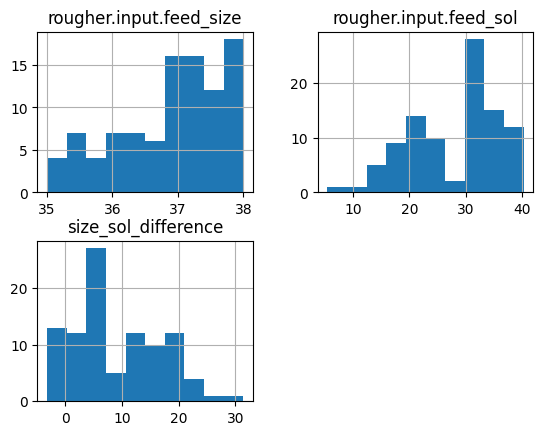

In [114]:

print(f"feed_size between 35 - 38 & Differences Less Than 32")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 38) & 
    (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 38) & 
    (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 38) & 
    (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 38) & 
    (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 38) & 
    (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)]))
print()
print()
print("Histogram: feed_size Between 35 - 38; Difference < 32")
temp[(temp['rougher.input.feed_size'] <= 38) & (temp['rougher.input.feed_size'] > 35) & (temp['size_sol_difference'] < 32)].hist()
plt.show()

In [115]:
# Use the difference of 6.9 as the range is slightly closer than the sol median
replace_add(gold_test_new2,'rougher.input.feed_sol','rougher.input.feed_size',35,38,6.9)


feedsize between 40 - 50 & Differences Less Than 50
-----------------------------------
Median


rougher.input.feed_size    46.701653
rougher.input.feed_sol     34.544858
size_sol_difference        11.808177
dtype: float64


Mean


rougher.input.feed_size    46.346161
rougher.input.feed_sol     33.841244
size_sol_difference        12.504918
dtype: float64


Min


rougher.input.feed_size    40.000617
rougher.input.feed_sol      1.169889
size_sol_difference        -0.736386
dtype: float64


Max


rougher.input.feed_size    49.996193
rougher.input.feed_sol     45.955078
size_sol_difference        47.611883
dtype: float64


Length


3866



Histogram: feed_size Between 40 - 50; Difference < 50


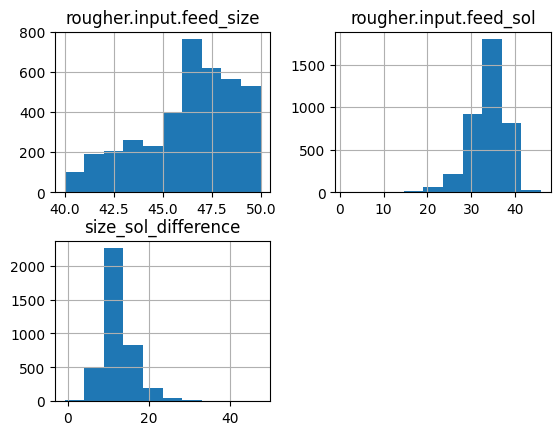

In [116]:
print(f"feedsize between 40 - 50 & Differences Less Than 50")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)]))
print()
print()
print("Histogram: feed_size Between 40 - 50; Difference < 50")
temp[(temp['rougher.input.feed_size'] <= 50) & 
    (temp['rougher.input.feed_size'] > 40) & (temp['size_sol_difference'] <= 50)].hist()
plt.show()

In [117]:
# A significant portion of this range (feed_size: 40 - 50) from the training set has a difference of ~11.8 from feed_sol
replace_add(gold_test_new2,'rougher.input.feed_sol','rougher.input.feed_size',40,50,11.8)

feed_size between 50 - 60 & Differences Less Than 55
-----------------------------------
Median


rougher.input.feed_size    54.413676
rougher.input.feed_sol     36.802788
size_sol_difference        17.617468
dtype: float64


Mean


rougher.input.feed_size    54.547582
rougher.input.feed_sol     36.255374
size_sol_difference        18.292209
dtype: float64


Min


rougher.input.feed_size    50.004500
rougher.input.feed_sol      2.703490
size_sol_difference         6.438439
dtype: float64


Max


rougher.input.feed_size    59.998321
rougher.input.feed_sol     47.307449
size_sol_difference        53.629025
dtype: float64


Length


4927



Histogram: feed_size Between 50 - 60; Difference < 55


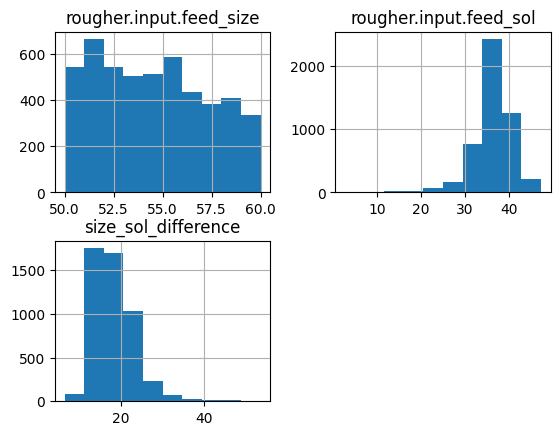

In [118]:
print(f"feed_size between 50 - 60 & Differences Less Than 55")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)]))
print()
print()
print("Histogram: feed_size Between 50 - 60; Difference < 55")
temp[(temp['rougher.input.feed_size'] <= 60) & 
    (temp['rougher.input.feed_size'] > 50) & (temp['size_sol_difference'] < 55)].hist()
plt.show()



In [119]:
# A large number in this range (feed_size: 50 - 60) have a median of 36.802788
# Input the median for this range
temp_new368 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new368_df = temp_new368[(temp_new368['rougher.input.feed_size'].notna()) & 
    (temp_new368['rougher.input.feed_size'] < 60) & temp_new368['rougher.input.feed_sol'].isna()]
temp_new368_index = temp_new368_df.index
gold_test_new2.loc[temp_new368_index,['rougher.input.feed_sol']] = 36.802788

feedsize between 60 - 70 & Differences Less Than 70
-----------------------------------
Median


rougher.input.feed_size    64.135303
rougher.input.feed_sol     38.944012
size_sol_difference        25.295020
dtype: float64


Mean


rougher.input.feed_size    64.443953
rougher.input.feed_sol     38.459652
size_sol_difference        25.984302
dtype: float64


Min


rougher.input.feed_size    60.001225
rougher.input.feed_sol      0.010000
size_sol_difference        15.127535
dtype: float64


Max


rougher.input.feed_size    69.998638
rougher.input.feed_sol     48.363177
size_sol_difference        69.240783
dtype: float64


Length


2259


Histogram: feed_size Between 60 - 70; Difference < 70


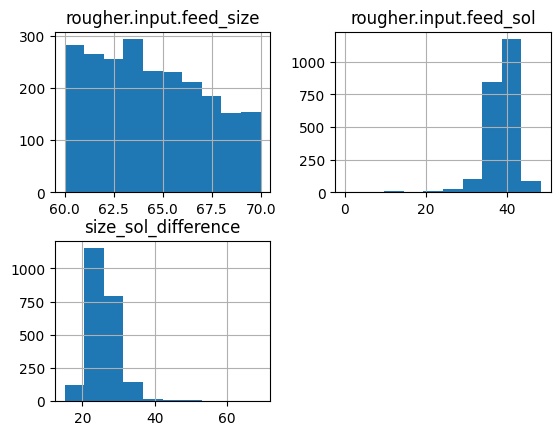

In [120]:
print(f"feedsize between 60 - 70 & Differences Less Than 70")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)]))
print()
print("Histogram: feed_size Between 60 - 70; Difference < 70")
temp[(temp['rougher.input.feed_size'] <= 70) & 
    (temp['rougher.input.feed_size'] > 60) & (temp['size_sol_difference'] <= 70)].hist()
plt.show()

In [121]:
# A large number in this range (feed_size: 60 - 70) have a median of 38.944012
# Input the median for this range
temp_new389 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new389_df = temp_new389[(temp_new389['rougher.input.feed_size'].notna()) & 
    (temp_new389['rougher.input.feed_size'] < 70) & temp_new389['rougher.input.feed_sol'].isna()]
temp_new389_index = temp_new389_df.index
gold_test_new2.loc[temp_new389_index,['rougher.input.feed_sol']] = 38.944012

feed_size between 70 - 75 & Differences Greater Than 40
-----------------------------------
Median


rougher.input.feed_size    73.703218
rougher.input.feed_sol     27.992614
size_sol_difference        43.988461
dtype: float64


Mean


rougher.input.feed_size    73.073895
rougher.input.feed_sol     27.353125
size_sol_difference        45.720770
dtype: float64


Min


rougher.input.feed_size    70.327801
rougher.input.feed_sol     16.194259
size_sol_difference        41.167205
dtype: float64


Max


rougher.input.feed_size    74.705631
rougher.input.feed_sol     33.315613
size_sol_difference        56.588363
dtype: float64


Length


31



Histogram: feed_size Between 70 - 75; Difference > 41


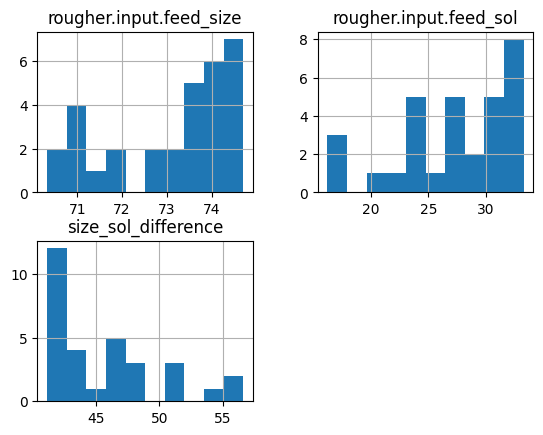




feed_size between 70 - 75 & Difference Between 28 - 41
-----------------------------------
Median


rougher.input.feed_size    72.809390
rougher.input.feed_sol     39.410044
size_sol_difference        33.272169
dtype: float64


Mean


rougher.input.feed_size    72.597292
rougher.input.feed_sol     39.118198
size_sol_difference        33.479093
dtype: float64


Min


rougher.input.feed_size    70.000791
rougher.input.feed_sol     30.481283
size_sol_difference        28.045006
dtype: float64


Max


rougher.input.feed_size    74.997287
rougher.input.feed_sol     45.500334
size_sol_difference        40.952899
dtype: float64


Length


777



Histogram: feedsize Between 70 - 75; Difference Between 28 - 41


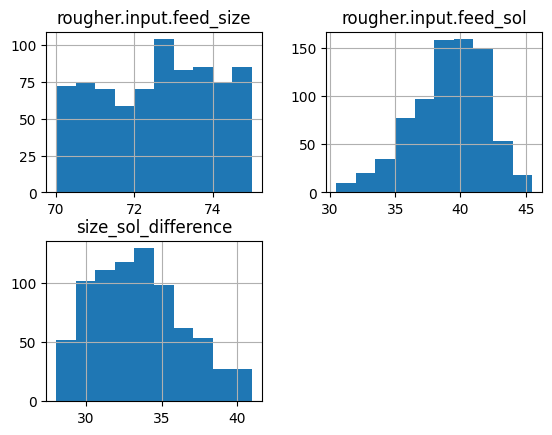




feedsize between 70 - 75 & Differences Less Than 28
-----------------------------------
Median


rougher.input.feed_size    71.141761
rougher.input.feed_sol     44.091765
size_sol_difference        27.536873
dtype: float64


Mean


rougher.input.feed_size    71.351773
rougher.input.feed_sol     44.235818
size_sol_difference        27.115954
dtype: float64


Min


rougher.input.feed_size    70.025827
rougher.input.feed_sol     42.187260
size_sol_difference        24.766180
dtype: float64


Max


rougher.input.feed_size    74.585721
rougher.input.feed_sol     47.226941
size_sol_difference        27.970435
dtype: float64


Length


34


Histogram: feed_size Between 70 - 75; Difference < 28


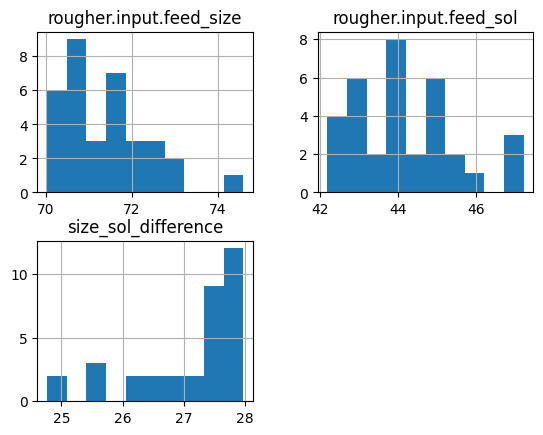

In [122]:
print(f"feed_size between 70 - 75 & Differences Greater Than 40")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)]))
print()
print()
print("Histogram: feed_size Between 70 - 75; Difference > 41")
temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] > 41)].hist()
plt.show()

print()
print()
print()

print(f"feed_size between 70 - 75 & Difference Between 28 - 41")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) & 
    (temp['size_sol_difference'] > 28)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) 
    & (temp['size_sol_difference'] > 28)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) & 
    (temp['size_sol_difference'] > 28)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) 
    & (temp['size_sol_difference'] > 28)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) & 
    (temp['size_sol_difference'] > 28)]))
print()
print()
print("Histogram: feedsize Between 70 - 75; Difference Between 28 - 41")
temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 41) & 
    (temp['size_sol_difference'] > 28)].hist()
plt.show()
print()
print()
print()


print(f"feedsize between 70 - 75 & Differences Less Than 28")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)]))
print()
print("Histogram: feed_size Between 70 - 75; Difference < 28")
temp[(temp['rougher.input.feed_size'] <= 75) & 
    (temp['rougher.input.feed_size'] > 70) & (temp['size_sol_difference'] <= 28)].hist()
plt.show()

In [123]:
# A large portion of this range (feed_size: 70 - 75) -  rougher.input.feed_sol median - 39.410044

temp_new394 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new394_df = temp_new394[(temp_new394['rougher.input.feed_size'].notna()) & 
    (temp_new394['rougher.input.feed_size'] < 75) & temp_new394['rougher.input.feed_sol'].isna()]
temp_new394_index = temp_new394_df.index
gold_test_new2.loc[temp_new394_index,['rougher.input.feed_sol']] = 39.410044

feedsize between 80 - 85 & Differences Greater Than 47
-----------------------------------
Median


rougher.input.feed_size    100.347223
rougher.input.feed_sol      35.775333
size_sol_difference         67.731138
dtype: float64


Mean


rougher.input.feed_size    82.682123
rougher.input.feed_sol     26.101812
size_sol_difference        56.580310
dtype: float64


Min


rougher.input.feed_size    80.058526
rougher.input.feed_sol      0.010000
size_sol_difference        47.074358
dtype: float64


Max


rougher.input.feed_size    84.864875
rougher.input.feed_sol     37.683318
size_sol_difference        81.133699
dtype: float64


Length


56


Histogram: feed_size Between 80 - 85; Difference > 47


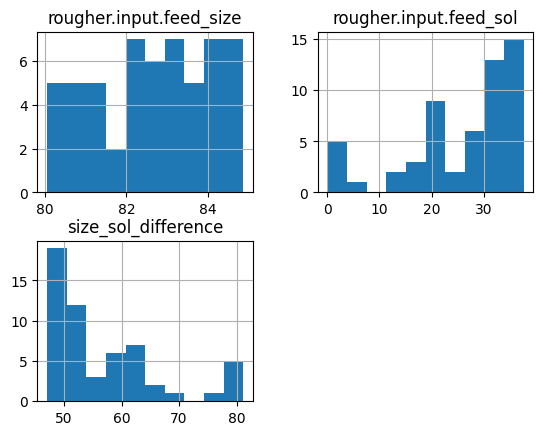




feed_size between 80 - 85 & Difference Between 37 - 47
-----------------------------------
Median


rougher.input.feed_size    82.580666
rougher.input.feed_sol     40.657336
size_sol_difference        42.245351
dtype: float64


Mean


rougher.input.feed_size    82.487730
rougher.input.feed_sol     40.413408
size_sol_difference        42.074321
dtype: float64


Min


rougher.input.feed_size    80.015783
rougher.input.feed_sol     33.561037
size_sol_difference        37.013060
dtype: float64


Max


rougher.input.feed_size    84.990078
rougher.input.feed_sol     46.260368
size_sol_difference        46.978386
dtype: float64


Length


479



Histogram: feedsize Between 80 - 85; Difference Between 37 - 47


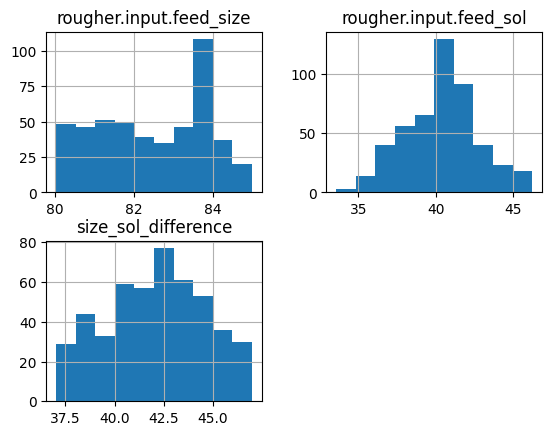




feedsize between 80 - 85 & Differences Less Than 37
-----------------------------------
Median


rougher.input.feed_size    80.642546
rougher.input.feed_sol     44.916304
size_sol_difference        36.075423
dtype: float64


Mean


rougher.input.feed_size    80.898649
rougher.input.feed_sol     45.085368
size_sol_difference        35.813280
dtype: float64


Min


rougher.input.feed_size    80.000144
rougher.input.feed_sol     43.227229
size_sol_difference        32.973632
dtype: float64


Max


rougher.input.feed_size    83.283444
rougher.input.feed_sol     47.376957
size_sol_difference        36.984625
dtype: float64


Length


22


Histogram: feed_size Between 80 - 85; Difference < 37


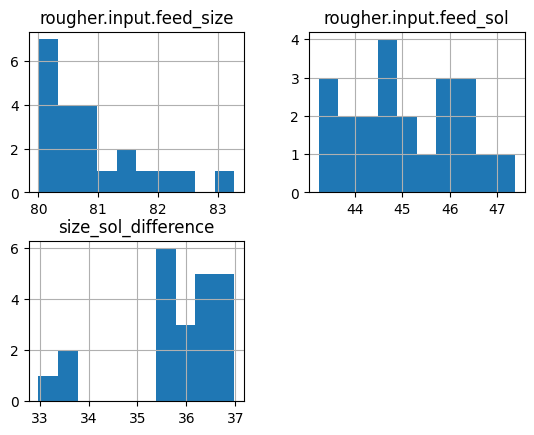

In [124]:
print(f"feedsize between 80 - 85 & Differences Greater Than 47")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] >= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)]))
print()
print("Histogram: feed_size Between 80 - 85; Difference > 47")
temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] > 47)].hist()
plt.show()
print()
print()
print()

print(f"feed_size between 80 - 85 & Difference Between 37 - 47")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) & 
    (temp['size_sol_difference'] > 37)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) 
    & (temp['size_sol_difference'] > 37)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) & 
    (temp['size_sol_difference'] > 37)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) 
    & (temp['size_sol_difference'] > 37)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) & 
    (temp['size_sol_difference'] > 37)]))
print()
print()
print("Histogram: feedsize Between 80 - 85; Difference Between 37 - 47")
temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 47) & 
    (temp['size_sol_difference'] > 37)].hist()
plt.show()
print()
print()
print()

print(f"feedsize between 80 - 85 & Differences Less Than 37")
print("-----------------------------------")
print("Median")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)].median())
print()
print("Mean")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)].mean())
print()
print("Min")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)].min())
print()
print("Max")
display(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)].max())
print()
print("Length")
display(len(temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)]))
print()
print("Histogram: feed_size Between 80 - 85; Difference < 37")
temp[(temp['rougher.input.feed_size'] <= 85) & 
    (temp['rougher.input.feed_size'] > 80) & (temp['size_sol_difference'] <= 37)].hist()
plt.show()

In [125]:
# A large portion of this range (feed_size: 80 - 85) -  rougher.input.feed_sol median - 40.657336

temp_new40 = gold_test_new2[['rougher.input.feed_size','rougher.input.feed_sol']]
temp_new40_df = temp_new40[(temp_new40['rougher.input.feed_size'].notna()) & 
    (temp_new40['rougher.input.feed_size'] < 83) & temp_new40['rougher.input.feed_sol'].isna()]
temp_new40_index = temp_new40_df.index
gold_test_new2.loc[temp_new40_index,['rougher.input.feed_sol']] = 40.657336


**Imputation Strategy for `rougher.input.feed_sol`**

Analysis of the relationship between `rougher.input.feed_sol` and `rougher.input.feed_size` reveals that the optimal imputation strategy varies across different feed_size ranges. Unlike the sulfate measurements which showed consistent conditional patterns, the feed_sol relationship requires a range-specific approach using either median values or calculated offsets depending on data distribution characteristics.

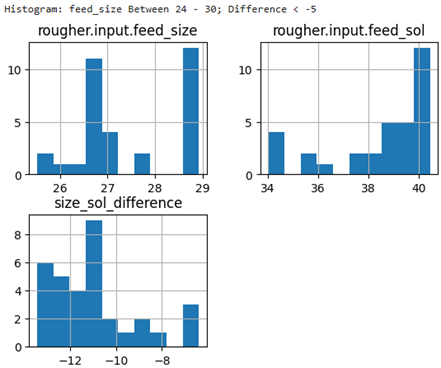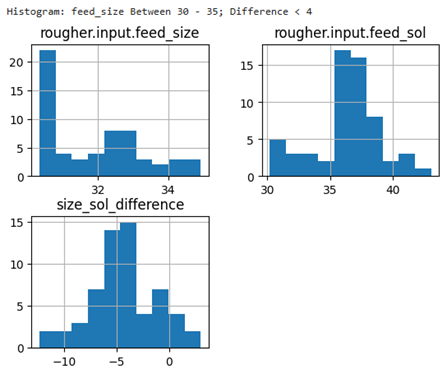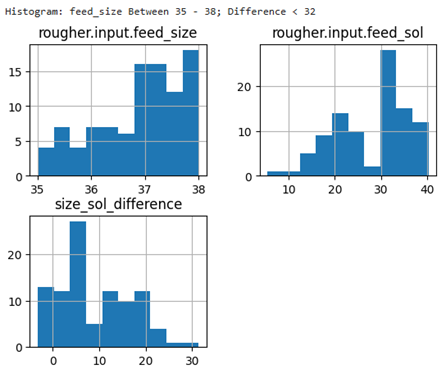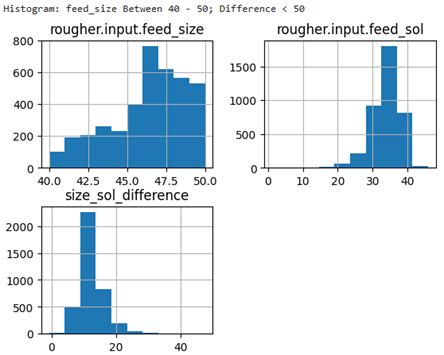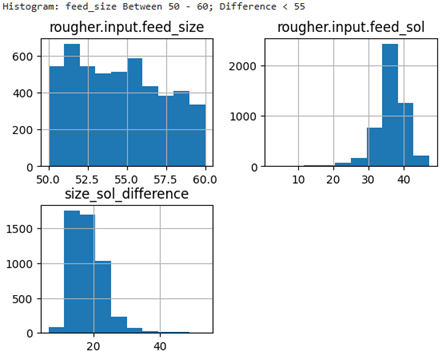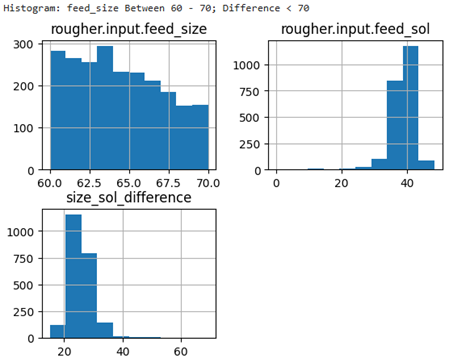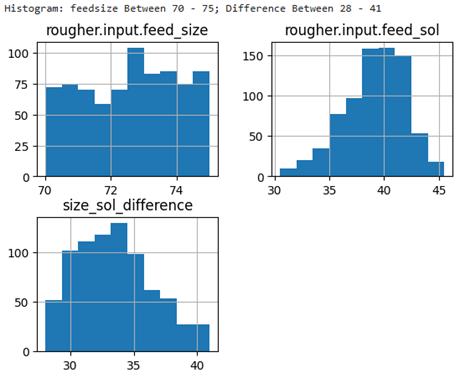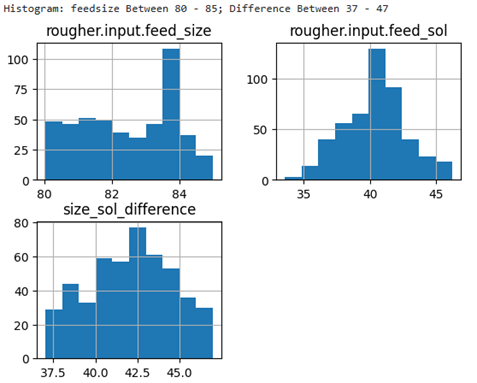

---

**Statistical Summary by Feed Size Range**

| Feed Size Range | Observations | Feed Sol Median | Difference Median | Imputation Method | Rationale |
|-----------------|--------------|-----------------|-------------------|-------------------|-----------|
| **24 - 30 (diff -5 to 12)** | 10 | 25.22 | 2.25 | Median (25.22) for feed_size < 25.5 | Small sample; lower sol values |
| **24 - 30 (diff < -5)** | 33 | 39.27 | -11.22 | Median (39.27) for feed_size ≥ 25.5 | Better sample; sol cluster 34-40 |
| **30 - 35** | 60 | 36.61 | -4.45 | Median (36.61) | Moderate sample; sol range 30-43 |
| **35 - 38** | 97 | 30.25 | 6.91 | Offset (+6.9) | Difference tighter than sol range |
| **40 - 50** | 3,866 | 34.54 | 11.81 | Offset (+11.8) | Large sample; consistent difference |
| **50 - 60** | 4,927 | 36.80 | 17.62 | Median (36.80) | Largest sample; stable median |
| **60 - 70** | 2,259 | 38.94 | 25.30 | Median (38.94) | Large sample; stable median |
| **70 - 75** | 777 | 39.41 | 33.27 | Median (39.41) | Moderate sample |
| **80 - 85** | 479 | 40.66 | 42.25 | Median (40.66) | Moderate sample |

---

**Key Findings**

The feed_sol and feed_size relationship is more complex than the sulfate measurements, with imputation strategies chosen based on: (1) sample size reliability, (2) whether the sol median or difference showed tighter clustering, and (3) the presence of consistent patterns. Two primary ranges dominate the training data: feed_size 40-50 (3,866 observations) and 50-60 (4,927 observations), representing the most reliable imputation zones. For smaller ranges (24-38), median sol values were preferred due to limited sample sizes and wider difference spreads. For the 35-38 and 40-50 ranges specifically, offset-based imputation was used because the difference showed more consistent patterns than the absolute sol values.

---

**Limitations and Considerations**

Unlike the sulfate imputation strategies which had strong conditional relationships (99%+ coverage with near-perfect correlation), the feed_sol imputation is less robust due to:

- **Weaker correlations**: Higher variance within ranges, particularly in smaller feed_size ranges
- **Mixed methodology**: Combining median and offset strategies introduces inconsistency
- **Limited observations in extremes**: Only 10-97 observations in the 24-38 range reduces confidence
- **Wide difference spreads**: Some ranges show difference variations of 20+ units, indicating higher uncertainty

This approach represents a pragmatic solution given the data characteristics, prioritizing the use of stable median values from large samples (4,927 and 3,866 observations in the 50-60 and 40-50 ranges) while accepting lower precision in edge cases. The imputation will be adequate for modeling purposes but carries more uncertainty than the sulfate strategies.









In [126]:
# Defina a function to input a spcecified columns median from the train dataset into the test dataset
def median_test_fillna(df_test,df_train, column):
    
    series = df_test[column]
    isna = series[series.isna()]
    series_index = isna.index
    train_median = df_train[column].median()
    
    df_test.loc[series_index,[column]] = train_median


In [127]:
# fill the rest of the NaN values for the test set


median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_c_air')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_c_level')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_d_air')
median_test_fillna(gold_test_new2, gold_train_new2,'primary_cleaner.state.floatbank8_d_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_ag')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_pb')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_rate')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_size')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_sol')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.feed_au')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.floatbank10_sulfate')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.input.floatbank11_sulfate')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_c_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_c_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_d_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_d_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_e_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_e_level')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_f_air')
median_test_fillna(gold_test_new2, gold_train_new2,'rougher.state.floatbank10_f_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank2_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank2_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank2_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank2_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank3_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank3_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank3_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank3_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank4_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank4_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank4_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank4_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank5_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank5_a_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank5_b_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank5_b_level')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank6_a_air')
median_test_fillna(gold_test_new2, gold_train_new2,'secondary_cleaner.state.floatbank6_a_level')


In [128]:
gold_test_new2.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

**Imputation Strategy for Remaining Columns (<1% Missing Data: *Test Set*)**

For all remaining columns in the test set with less than 1% missing data, a simple median imputation strategy was applied using column-specific medians calculated from the training set.

---

**Methodology**

**Imputation approach:**
- Calculate the median value for each column from the training set (after row-dropping preprocessing)
- Apply these training set medians to fill missing values in the corresponding test set columns
- No conditional logic or range-based strategies required

**Rationale:**
- **Minimal impact**: With <1% missing data per column, the imputation method has negligible effect on model performance
- **Computational efficiency**: Simple median imputation is fast and straightforward
- **Adequate accuracy**: For such small percentages of missing data, sophisticated methods provide minimal benefit over median imputation
- **Consistency with training**: Using training set medians (rather than test set medians) prevents data leakage and maintains proper train-test separation

---

**Key Considerations**

For columns with <1% missing data, the additional complexity of conditional imputation is unnecessary. The simple median approach provides a clean, efficient solution that maintains data integrity while having minimal impact on the final model predictions.

In [129]:
# Lastly, change the date to datetime
gold_train_new2['date'] = pd.to_datetime(gold_train_new2['date'])
gold_test_new2['date'] = pd.to_datetime(gold_test_new2['date'])
gold_full_new2['date'] = pd.to_datetime(gold_full_new2['date'])

# Analyze the Data

## Concentrations of Metals Accross Purification Stages (Au, Ag, Pb): *Original Dataset*

In [130]:
# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

# Using original full dataset 

# Gold(Au)
au = gold_full.filter(like = 'au', axis = 1)
au_stages = ['rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'rougher.output.tail_au',
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.tail_au',
    'secondary_cleaner.output.tail_au',
    'final.output.concentrate_au',
    'final.output.tail_au']
au_calculations = ['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio']

# Silver(Ag)
ag = gold_full.filter(like = 'ag', axis = 1)
ag_stages = ['rougher.input.feed_ag',
             'rougher.output.concentrate_ag',
             'rougher.output.tail_ag',
             'primary_cleaner.output.concentrate_ag',
             'primary_cleaner.output.tail_ag',
             'secondary_cleaner.output.tail_ag',
             'final.output.concentrate_ag',
             'final.output.tail_ag']

# Lead(Pb)
pb = gold_full.filter(like = 'pb', axis = 1)
pb_stages = ['rougher.input.feed_pb', 
             'rougher.output.concentrate_pb',
             'rougher.output.tail_pb',
             'primary_cleaner.output.concentrate_pb',
             'primary_cleaner.output.tail_pb', 
             'secondary_cleaner.output.tail_pb',
             'final.output.concentrate_pb',
             'final.output.tail_pb']



# All Metals (Au, Ag, Pb)

all_metal_stages = au_stages + ag_stages + pb_stages


### Gold(Au): *Original Dataset*

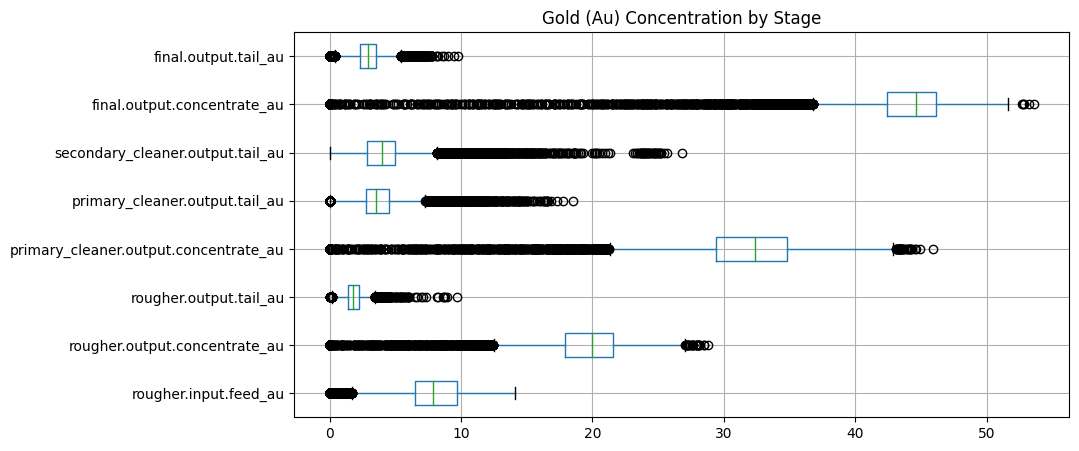

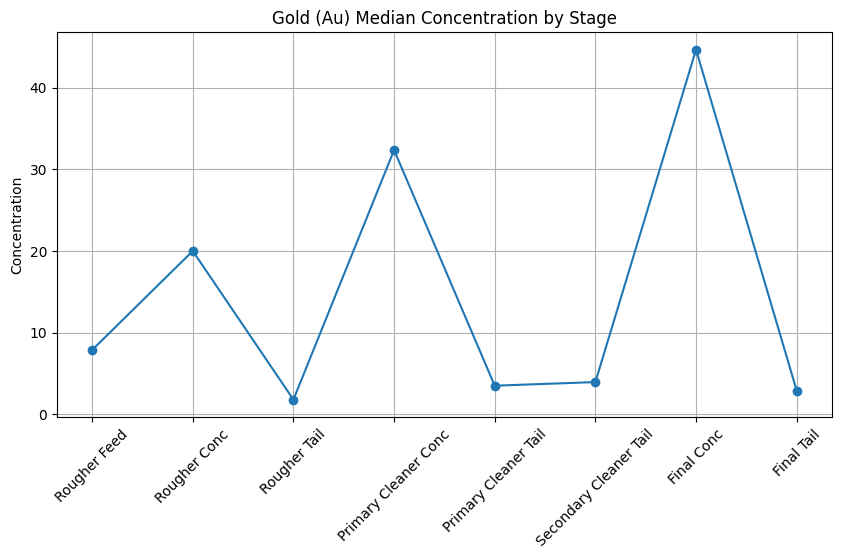

rougher.input.feed_au  rougher.output.concentrate_au  \
count           22617.000000                   22618.000000   
mean                7.565838                      17.879538   
std                 3.026954                       6.790112   
min                 0.000000                       0.000000   
25%                 6.485009                      17.928729   
50%                 7.884832                      20.003202   
75%                 9.668064                      21.564238   
max                14.093363                      28.824507   

       rougher.output.tail_au  primary_cleaner.output.concentrate_au  \
count            19980.000000                           22618.000000   
mean                 1.821193                              29.212289   
std                  0.695663                              10.539303   
min                  0.020676                               0.000000   
25%                  1.403951                              29.374406   
50%                  1.808567                              32.359813   
75%                  2.215317                              34.770726   
max                  9.688980                              45.933934   

       primary_cleaner.output.tail_au  secondary_cleaner.output.tail_au  \
count                    22617.000000                      22618.000000   
mean                         3.670333                          4.041218   
std                          1.985206                          2.605738   
min                          0.000000                          0.000000   
25%                          2.741534                          2.877554   
50%                          3.513008                          3.956171   
75%                          4.559485                          5.006944   
max                         18.528821                         26.811643   

       final.output.concentrate_au  final.output.tail_au  
count                 22630.000000          22635.000000  
mean                     40.001172              2.827459  
std                      13.398062              1.262834  
min                       0.000000              0.000000  
25%                      42.383721              2.303108  
50%                      44.653436              2.913794  
75%                      46.111999              3.555077  
max                      53.611374              9.789625

In [131]:
# Box plot - stages
au[au_stages].plot(kind='box', vert = False,figsize=(10, 5), title='Gold (Au) Concentration by Stage', grid = True)


# Line plot - Median Stages
au_median = au[au_stages].median()
stages = ['Rougher Feed','Rougher Conc','Rougher Tail',
          'Primary Cleaner Conc','Primary Cleaner Tail','Secondary Cleaner Tail','Final Conc','Final Tail']

plt.figure(figsize=(10,5))
plt.plot(stages, au_median, marker='o', label='Au median')
plt.title("Gold (Au) Median Concentration by Stage")
plt.ylabel("Concentration")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Show stats
au[au_stages].describe()

### Silver(Ag): *Original Dataset*

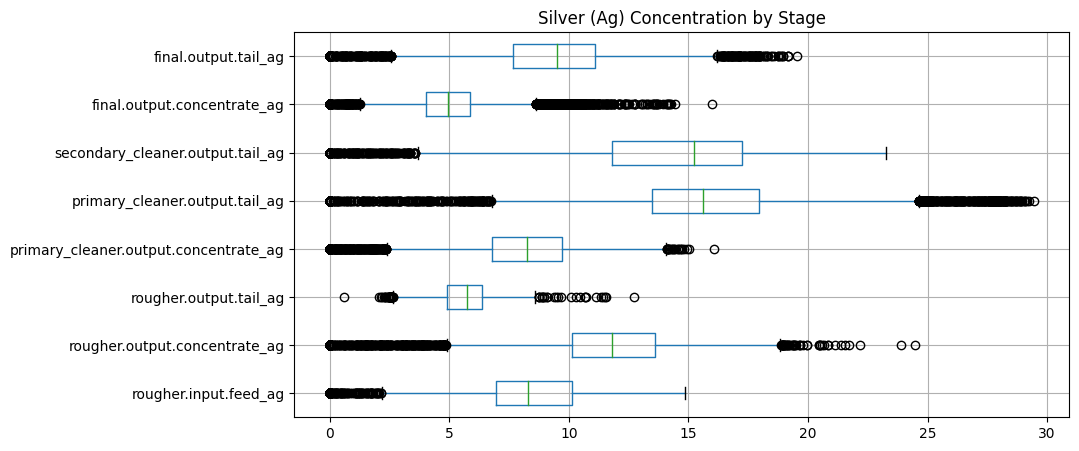

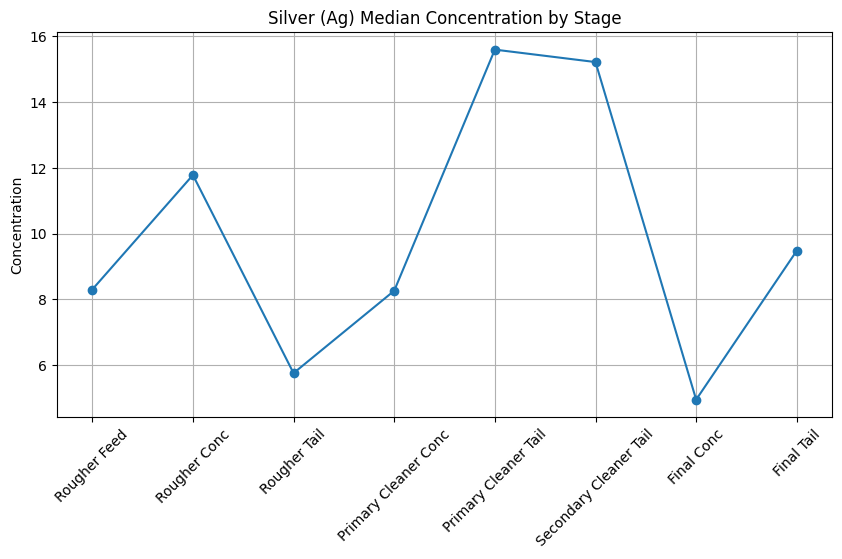

rougher.input.feed_ag  rougher.output.concentrate_ag  \
count           22618.000000                   22618.000000   
mean                8.065715                      10.874484   
std                 3.125250                       4.377924   
min                 0.000000                       0.000000   
25%                 6.944415                      10.126646   
50%                 8.302613                      11.785127   
75%                10.135202                      13.615299   
max                14.869652                      24.480271   

       rougher.output.tail_ag  primary_cleaner.output.concentrate_ag  \
count            19979.000000                           22618.000000   
mean                 5.587861                               7.691652   
std                  1.114614                               3.109306   
min                  0.594562                               0.000000   
25%                  4.887758                               6.771102   
50%                  5.759630                               8.265643   
75%                  6.386301                               9.697896   
max                 12.719177                              16.081632   

       primary_cleaner.output.tail_ag  secondary_cleaner.output.tail_ag  \
count                    22614.000000                      22616.000000   
mean                        14.876219                         13.375349   
std                          5.654342                          5.768719   
min                          0.000000                          0.000000   
25%                         13.464756                         11.802936   
50%                         15.600454                         15.222165   
75%                         17.931084                         17.231611   
max                         29.459575                         23.264738   

       final.output.concentrate_ag  final.output.tail_ag  
count                 22627.000000          22633.000000  
mean                      4.781559              8.923690  
std                       2.030128              3.517917  
min                       0.000000              0.000000  
25%                       4.018525              7.684016  
50%                       4.953729              9.484369  
75%                       5.862593             11.084557  
max                      16.001945             19.552149

In [132]:
# Box plot - stages
ag[ag_stages].plot(kind = 'box', vert = False, figsize = (10,5),title = "Silver (Ag) Concentration by Stage", grid = True)

# Line plot - Median Stages
ag_median = ag[ag_stages].median()

plt.figure(figsize = (10,5))
plt.plot(stages,ag_median, marker='o', label = 'Ag median')
plt.title("Silver (Ag) Median Concentration by Stage")
plt.ylabel("Concentration")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()


# Show stats
ag[ag_stages].describe()

### Lead(Pb): *Original Dataset*

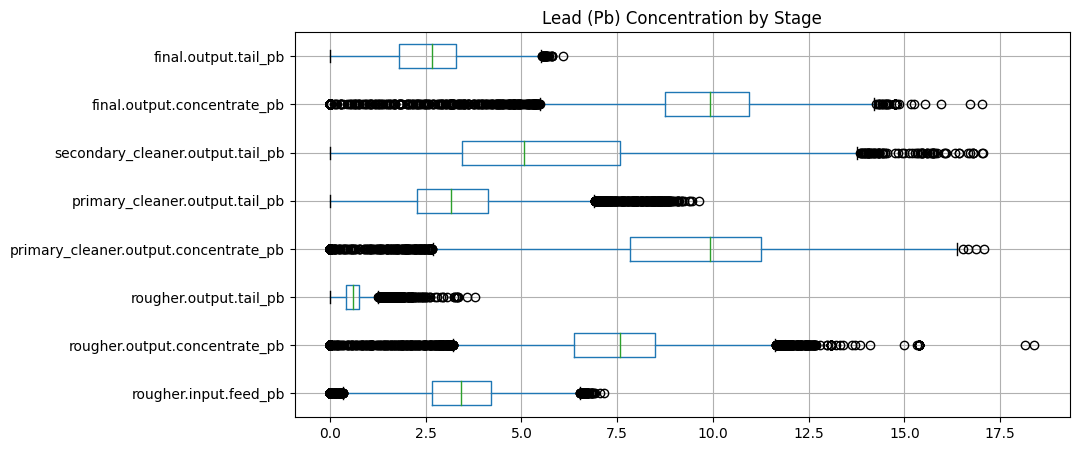

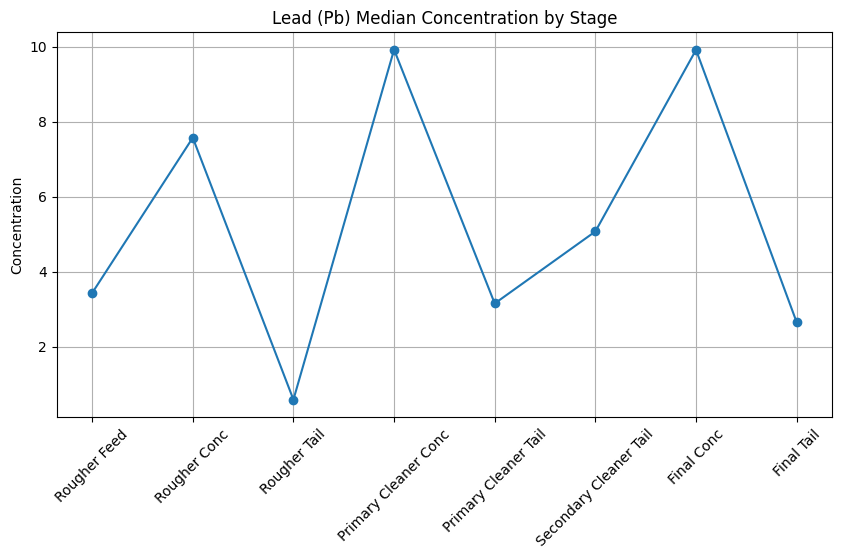

rougher.input.feed_pb  rougher.output.concentrate_pb  \
count           22472.000000                   22618.000000   
mean                3.305676                       6.900646   
std                 1.446905                       2.806948   
min                 0.000000                       0.000000   
25%                 2.658814                       6.374692   
50%                 3.432054                       7.572855   
75%                 4.204960                       8.477358   
max                 7.142594                      18.394042   

       rougher.output.tail_pb  primary_cleaner.output.concentrate_pb  \
count            22618.000000                           22268.000000   
mean                 0.593620                               8.921110   
std                  0.315295                               3.706314   
min                  0.000000                               0.000000   
25%                  0.427513                               7.834690   
50%                  0.590746                               9.921116   
75%                  0.763219                              11.266100   
max                  3.778064                              17.081278   

       primary_cleaner.output.tail_pb  secondary_cleaner.output.tail_pb  \
count                    22594.000000                      22600.000000   
mean                         3.175822                          5.304107   
std                          1.652177                          3.092536   
min                          0.000000                          0.000000   
25%                          2.269103                          3.451435   
50%                          3.154022                          5.074145   
75%                          4.123574                          7.585281   
max                          9.634565                         17.042505   

       final.output.concentrate_pb  final.output.tail_pb  
count                 22629.000000          22516.000000  
mean                      9.095308              2.488252  
std                       3.230797              1.189407  
min                       0.000000              0.000000  
25%                       8.750171              1.805376  
50%                       9.914519              2.653001  
75%                      10.929839              3.287790  
max                      17.031899              6.086532

In [133]:
# Box plot - stages
pb[pb_stages].plot(kind='box', vert = False, figsize = (10,5), title = "Lead (Pb) Concentration by Stage", grid = True)

# Line plot - Median Stages
pb_median = pb[pb_stages].median()

plt.figure(figsize=(10,5))
plt.plot(stages, pb_median, marker = 'o', label = 'Pb median')
plt.title("Lead (Pb) Median Concentration by Stage")
plt.ylabel("Concentration")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Show stats
pb[pb_stages].describe()

### Compare (Au, Ag, Pb): *Original Dataset*

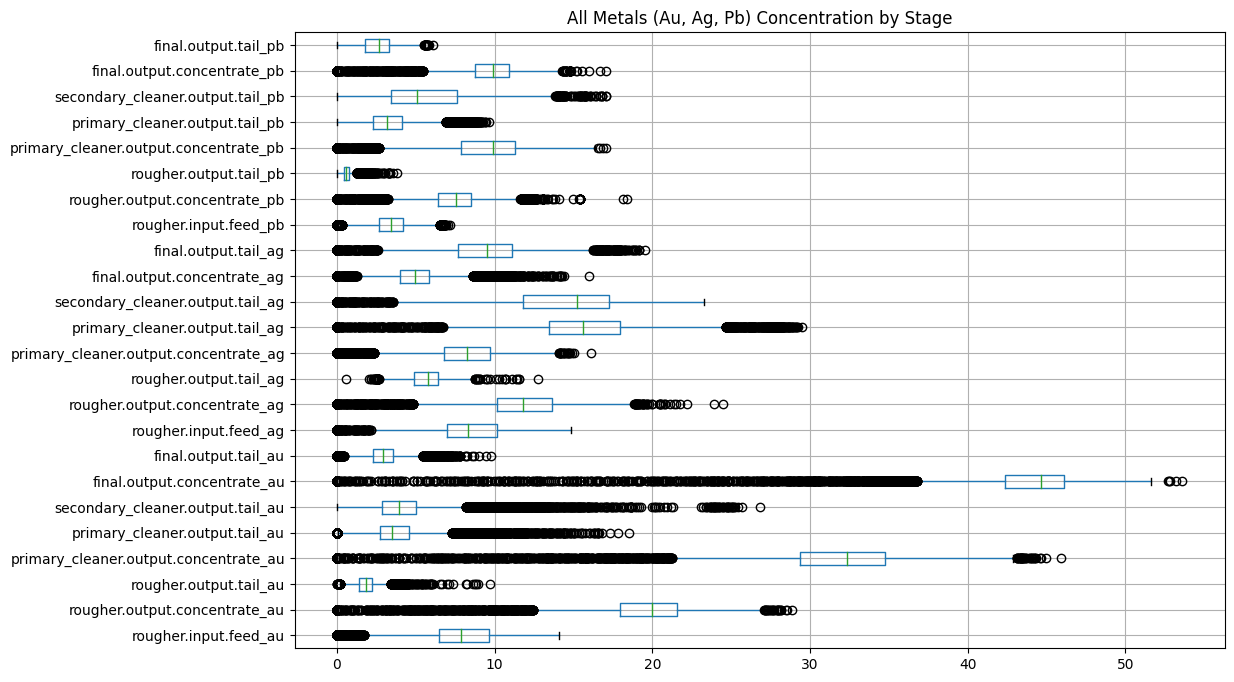

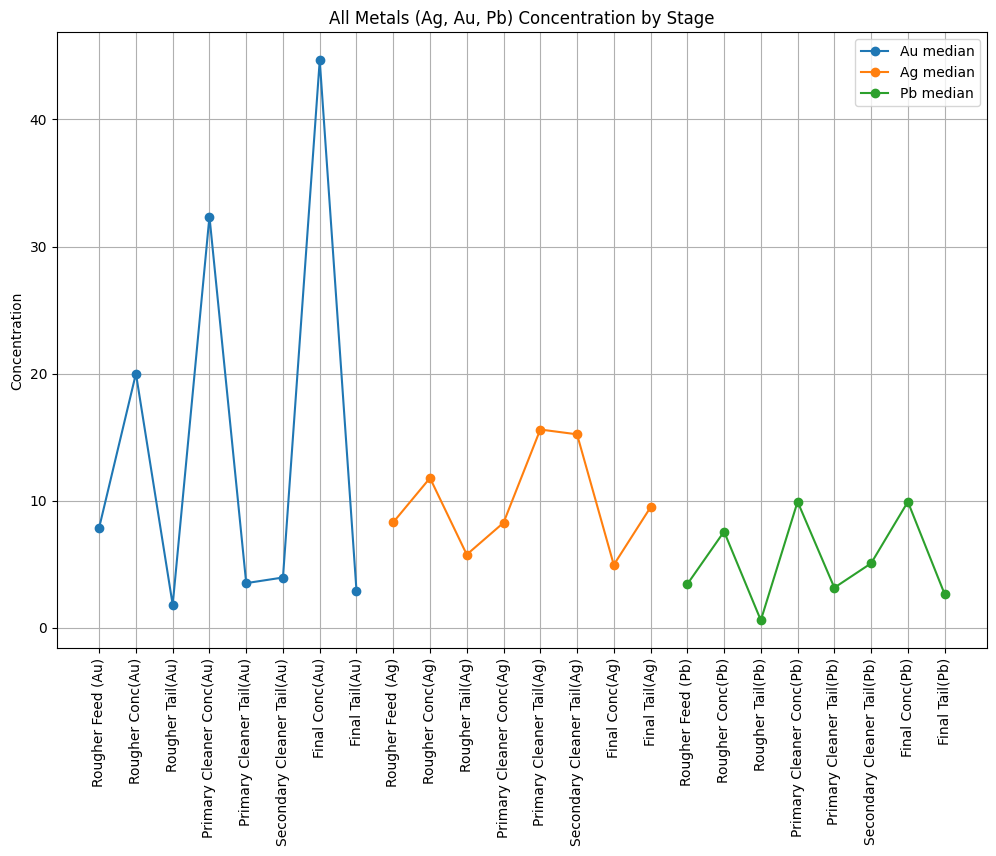

rougher.input.feed_au  rougher.output.concentrate_au  \
count           22617.000000                   22618.000000   
mean                7.565838                      17.879538   
std                 3.026954                       6.790112   
min                 0.000000                       0.000000   
25%                 6.485009                      17.928729   
50%                 7.884832                      20.003202   
75%                 9.668064                      21.564238   
max                14.093363                      28.824507   

       rougher.output.tail_au  primary_cleaner.output.concentrate_au  \
count            19980.000000                           22618.000000   
mean                 1.821193                              29.212289   
std                  0.695663                              10.539303   
min                  0.020676                               0.000000   
25%                  1.403951                              29.374406   
50%                  1.808567                              32.359813   
75%                  2.215317                              34.770726   
max                  9.688980                              45.933934   

       primary_cleaner.output.tail_au  secondary_cleaner.output.tail_au  \
count                    22617.000000                      22618.000000   
mean                         3.670333                          4.041218   
std                          1.985206                          2.605738   
min                          0.000000                          0.000000   
25%                          2.741534                          2.877554   
50%                          3.513008                          3.956171   
75%                          4.559485                          5.006944   
max                         18.528821                         26.811643   

       final.output.concentrate_au  final.output.tail_au  \
count                 22630.000000          22635.000000   
mean                     40.001172              2.827459   
std                      13.398062              1.262834   
min                       0.000000              0.000000   
25%                      42.383721              2.303108   
50%                      44.653436              2.913794   
75%                      46.111999              3.555077   
max                      53.611374              9.789625   

       rougher.input.feed_ag  rougher.output.concentrate_ag  \
count           22618.000000                   22618.000000   
mean                8.065715                      10.874484   
std                 3.125250                       4.377924   
min                 0.000000                       0.000000   
25%                 6.944415                      10.126646   
50%                 8.302613                      11.785127   
75%                10.135202                      13.615299   
max                14.869652                      24.480271   

       rougher.output.tail_ag  primary_cleaner.output.concentrate_ag  \
count            19979.000000                           22618.000000   
mean                 5.587861                               7.691652   
std                  1.114614                               3.109306   
min                  0.594562                               0.000000   
25%                  4.887758                               6.771102   
50%                  5.759630                               8.265643   
75%                  6.386301                               9.697896   
max                 12.719177                              16.081632   

       primary_cleaner.output.tail_ag  secondary_cleaner.output.tail_ag  \
count                    22614.000000                      22616.000000   
mean                        14.876219                         13.375349   
std                          5.654342                          5.768719   
min                          0.000000                   

In [134]:
# Box plot - stages
gold_full[all_metal_stages].plot(kind='box', figsize = (12,8), vert = False, title = "All Metals (Au, Ag, Pb) Concentration by Stage", grid = True)

# Line plot - Median Stages


au_cols = ['Rougher Feed (Au)','Rougher Conc(Au)','Rougher Tail(Au)',
          'Primary Cleaner Conc(Au)','Primary Cleaner Tail(Au)','Secondary Cleaner Tail(Au)','Final Conc(Au)','Final Tail(Au)']

ag_cols = ['Rougher Feed (Ag)','Rougher Conc(Ag)','Rougher Tail(Ag)',
          'Primary Cleaner Conc(Ag)','Primary Cleaner Tail(Ag)','Secondary Cleaner Tail(Ag)','Final Conc(Ag)','Final Tail(Ag)']

pb_cols = ['Rougher Feed (Pb)','Rougher Conc(Pb)','Rougher Tail(Pb)',
          'Primary Cleaner Conc(Pb)','Primary Cleaner Tail(Pb)','Secondary Cleaner Tail(Pb)','Final Conc(Pb)','Final Tail(Pb)']


plt.figure(figsize=(12,8))
plt.plot(au_cols, au_median, marker = 'o', label = 'Au median')
plt.plot(ag_cols, ag_median, marker = 'o', label = 'Ag median')
plt.plot(pb_cols, pb_median, marker = 'o', label = 'Pb median')
plt.title("All Metals (Ag, Au, Pb) Concentration by Stage")
plt.ylabel('Concentration')
plt.xticks(rotation = 90)
plt.grid(True)
plt.legend()
plt.show()



# Show stats
with pd.option_context('display.max_columns', None):
    display(gold_full[all_metal_stages].describe())


**Original Dataset: Outlier Analysis and Distribution Assessment**

Analysis of the original dataset (pre-imputation) reveals significant outliers and wide variance across metal concentration measurements, particularly in gold (Au) processing stages. This assessment examines the raw data distribution before any imputation or outlier handling.

---

|**Distribution Summary by Metal Type**|
|-------|


**Gold (Au) Concentrations:**

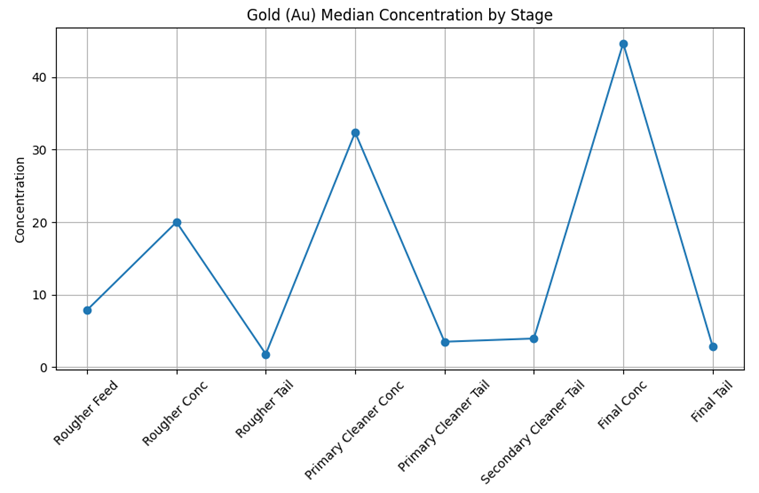

**Gold (Au) - Extreme outliers and process anomalies:**
- **Primary Cleaner Concentrate Au**: Maximum 45.93 with high variance (±10.54), showing 41% above 75th percentile (34.77)
- **Secondary Cleaner Tail Au**: Maximum 26.81, far exceeding expected near-depletion levels (median 3.96)
- **Final Concentrate Au**: Range 0-53.61 represents massive spread; zero values indicate complete process failures
- **Rougher Tail Au**: Maximum 9.69 is 5x the median (1.81), suggesting occasional poor separation


| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|

| Rougher Feed | 7.88 | 7.57 | 3.03 | 0.00 | 14.09 | Baseline input |
| Rougher Concentrate | 20.00 | 17.88 | 6.79 | 0.00 | 28.82 | 2.5x concentration from feed |
| Rougher Tail | 1.81 | 1.82 | 0.70 | 0.02 | 9.69 | Low concentration, good separation |
| Primary Cleaner Concentrate | 32.36 | 29.21 | 10.54 | 0.00 | 45.93 | Highest variance (±10.54) |
| Primary Cleaner Tail | 3.51 | 3.67 | 1.99 | 0.00 | 18.53 | Moderate loss in tail |
| Secondary Cleaner Tail | 3.96 | 4.04 | 2.61 | 0.00 | 26.81 | Higher variance than primary tail |
| Final Concentrate | 44.65 | 40.00 | 13.40 | 0.00 | 53.61 | Maximum enrichment achieved (5.7x feed) |
| Final Tail | 2.91 | 2.83 | 1.26 | 0.00 | 9.79 | Minimal loss, efficient recovery |


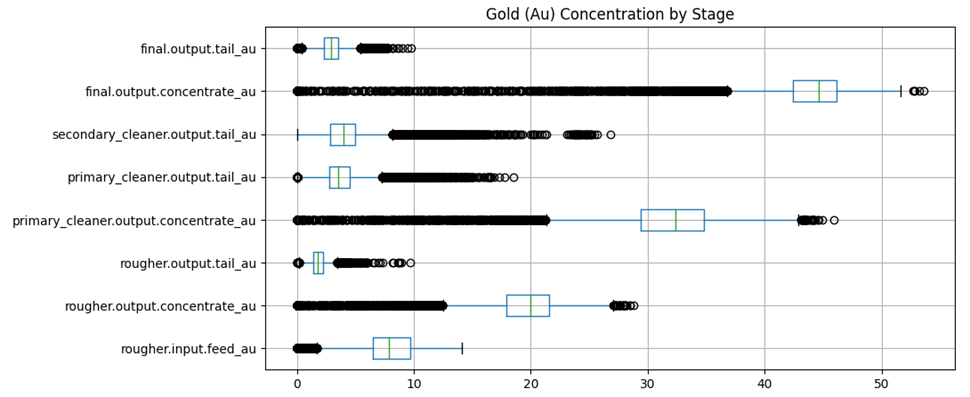


**Silver (Ag) Concentrations:**

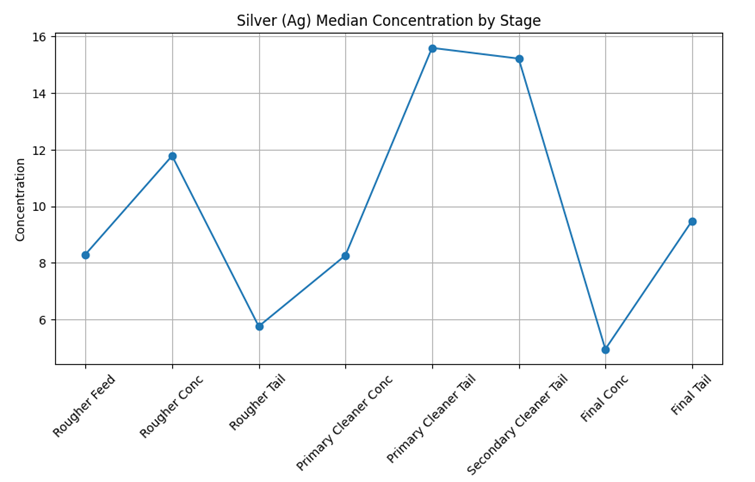

**Silver (Ag) - Inverted concentration patterns indicate data quality issues:**
- **Primary Cleaner stages show inverted relationship**: Tail (15.60) > Concentrate (8.27), opposite of expected behavior
- **Final Concentrate Ag (4.95) is LOWER than feed (8.30)**: Indicates silver rejection, not concentration
- **Final Tail Ag (9.48) exceeds final concentrate**: Confirms poor silver recovery throughout process
- **Primary Cleaner Tail maximum (29.46)**: Extreme outlier nearly 2x the median (15.60)



| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| Rougher Feed | 8.30 | 8.07 | 3.13 | 0.00 | 14.87 | Baseline input |
| Rougher Concentrate | 11.79 | 10.87 | 4.38 | 0.00 | 24.48 | 1.4x concentration from feed |
| Rougher Tail | 5.76 | 5.59 | 1.11 | 0.59 | 12.72 | Higher than Au tail (less efficient separation) |
| Primary Cleaner Concentrate | 8.27 | 7.69 | 3.11 | 0.00 | 16.08 | Lower than rougher concentrate (unusual) |
| Primary Cleaner Tail | 15.60 | 14.88 | 6.54 | 0.00 | 29.46 | Higher than concentrate (inverted pattern) |
| Secondary Cleaner Tail | 15.22 | 13.38 | 5.77 | 0.00 | 23.26 | Similar to primary cleaner tail |
| Final Concentrate | 4.95 | 4.78 | 2.03 | 0.00 | 16.00 | Low enrichment (~0.6x feed) |
| Final Tail | 9.48 | 8.92 | 3.52 | 0.00 | 19.55 | Higher than concentrate (poor recovery) |


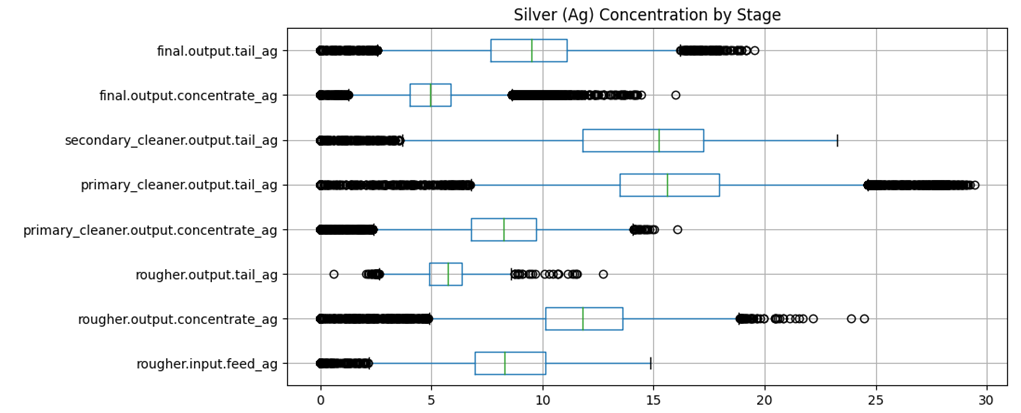

**Lead (Pb) Concentrations:**

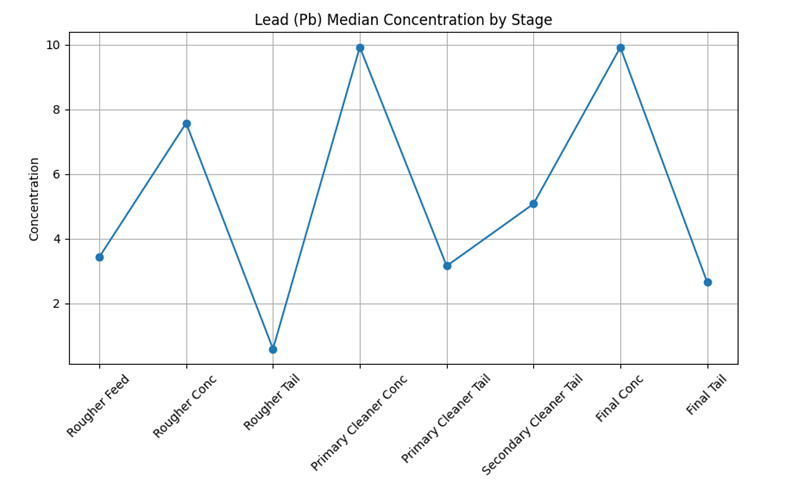

**Lead (Pb) - Moderate outliers with proper concentration trend:**
- **Rougher Concentrate Pb**: Maximum 18.39 is 2.4x the median (7.57), highest relative outlier
- **Secondary Cleaner Tail Pb**: Maximum 17.04 is 3.4x the median (5.07), indicating occasional heavy losses
- **Overall pattern is correct**: Concentrate > Tail at each stage, unlike silver


| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| Rougher Feed | 3.43 | 3.31 | 1.45 | 0.00 | 7.14 | Baseline input (lowest of 3 metals) |
| Rougher Concentrate | 7.57 | 6.90 | 2.81 | 0.00 | 18.39 | 2.2x concentration from feed |
| Rougher Tail | 0.59 | 0.59 | 0.32 | 0.00 | 3.78 | Excellent separation (82% reduction) |
| Primary Cleaner Concentrate | 9.92 | 8.92 | 3.71 | 0.00 | 17.08 | Further enrichment to 3x feed |
| Primary Cleaner Tail | 3.15 | 3.18 | 1.65 | 0.00 | 9.63 | Moderate loss in tail |
| Secondary Cleaner Tail | 5.07 | 5.30 | 3.09 | 0.00 | 17.04 | Higher than primary tail |
| Final Concentrate | 9.91 | 9.10 | 3.23 | 0.00 | 17.03 | Maximum enrichment (2.9x feed) |
| Final Tail | 2.65 | 2.49 | 1.19 | 0.00 | 6.09 | Low loss, good overall recovery |

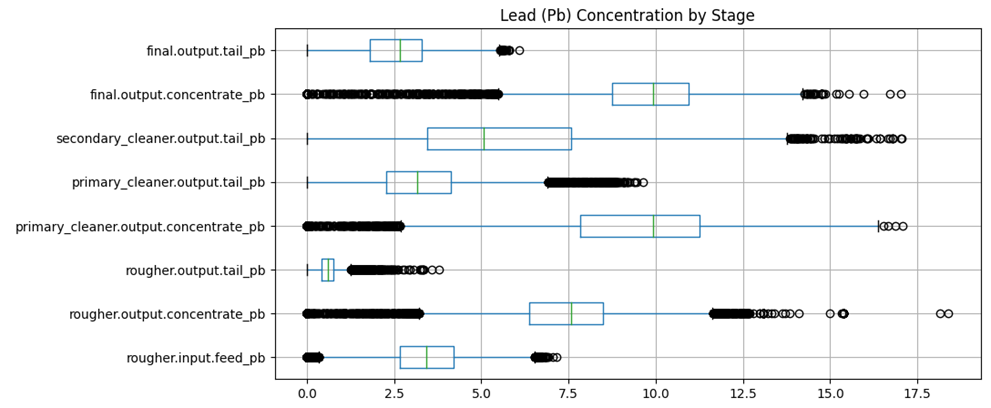


---

**Critical Outlier Observations**

**Zero values across all metals:**
- Present at minimum for nearly all stages (Au, Ag, Pb)
- Particularly concerning in concentrate stages where zeros indicate complete process failure
- May represent measurement errors, sensor failures, or true process shutdowns

**Variance patterns:**
- **Gold**: Highest absolute variance (std dev 10.54-13.40) in cleaner concentrate stages
- **Silver**: Primary cleaner tail shows highest relative variance (std dev 6.54, 44% of median 14.88)
- **Lead**: Most stable relative to median, except secondary cleaner tail (std dev 3.09, 61% of median 5.07)

---

**Recommendations**
- Investigate zero values for potential data or process errors.
- Validate silver data — inverted trends likely indicate mislabeling or intentional rejection.
- Apply robust scaling or log transforms to handle wide value ranges and outliers.
- Flag abnormal tails (e.g., Au secondary cleaner tail) as potential inefficiencies.

### Imputed Dataset

In [135]:
all_imp = gold_full_new2[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']]


rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb
count           14336.000000           14336.000000           14336.000000
mean                8.014002               8.705637               3.571561
std                 1.944873               1.984905               1.110681
min                 0.010000               0.010000               0.010000
25%                 6.668732               7.173804               2.802313
50%                 7.767332               8.278239               3.467893
75%                 9.266969              10.086486               4.300985
max                13.899559              14.596026               7.142594

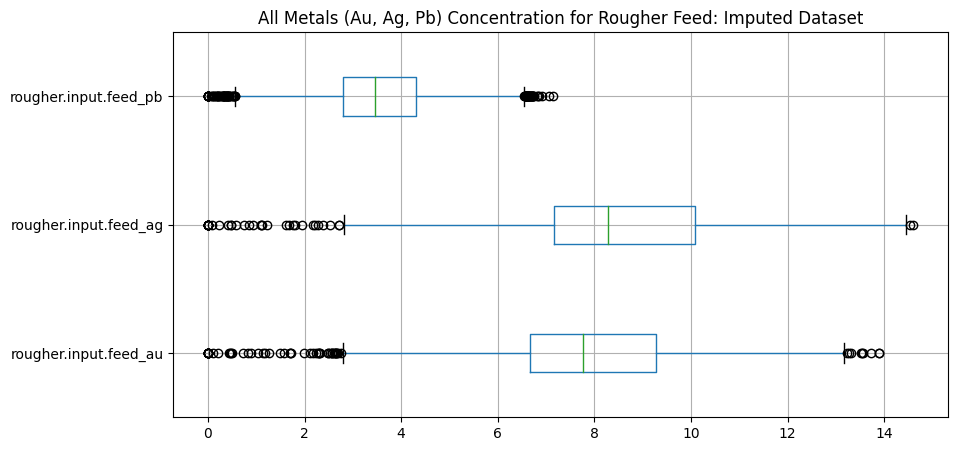

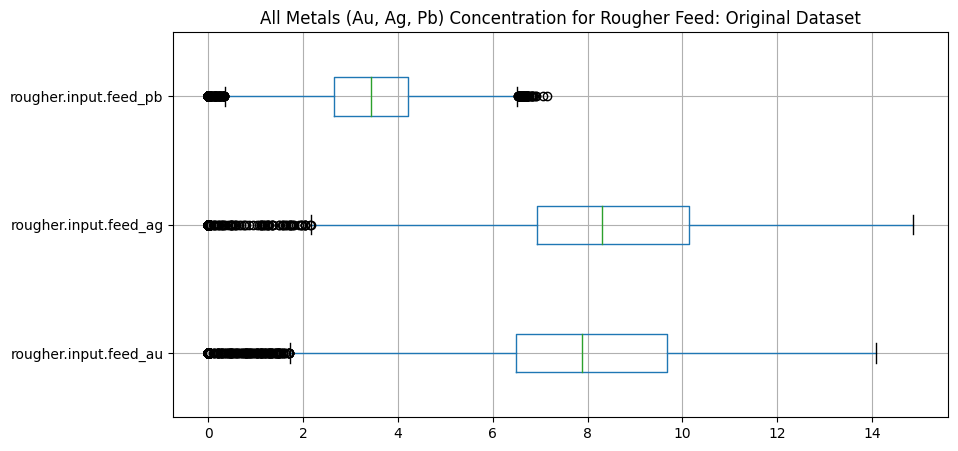

In [136]:
# Box plot - stages
all_imp.plot(kind='box', vert = False,figsize=(10, 5), 
             title='All Metals (Au, Ag, Pb) Concentration for Rougher Feed: Imputed Dataset', grid = True)

gold_full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']].plot(
    kind='box', vert = False, figsize = (10,5), 
    title = "All Metals (Au, Ag, Pb) Concentration for Rougher Feed: Original Dataset", grid = True)

# Show stats
all_imp.describe()

**Original Dataset Vs. Imputed Dataset**

| Metal | Original Median | Imputed Median| Original Mean | Imputed Mean | Original Std | Imputed Std | Original Min | Imputed Min | Original Max | Imputed Max| Notes |
|--------|----------------|---------------|---------------|---------------|---------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Au (Gold) | 7.88 | 7.77 | 7.57 | 8.01 | 3.03 | 1.94 | 0.00 | 0.01 | 14.09 | 13.90 | Less spread and no zeros after imputation — good |
| Ag (Silver) | 8.30 | 8.28 | 8.07 | 8.71 | 3.13 | 1.98 | 0.00 | 0.01 | 14.87 | 14.6 | Same pattern — realistic floor now |
| Pb (Lead) | 3.43 | 3.47 | 3.31 | 3.57 | 1.45 | 1.11 | 0.00 | 0.01 | 7.14| 7.14 | Minor tightening — variance reduced |

**Conclusion**

The rougher feed concentrations of Au, Ag, and Pb were compared between the original and imputed datasets. The original data contained several zeros, likely due to missing sensor readings. After imputation, the minimum values increased to 0.01, standard deviations decreased slightly, and overall means remained consistent — indicating improved data integrity without distorting the underlying distributions. Outliers were retained, as they likely reflect genuine variations in ore composition rather than measurement errors.

## Compare feed_size: Train vs. Test

count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher.input.feed_size, dtype: float64

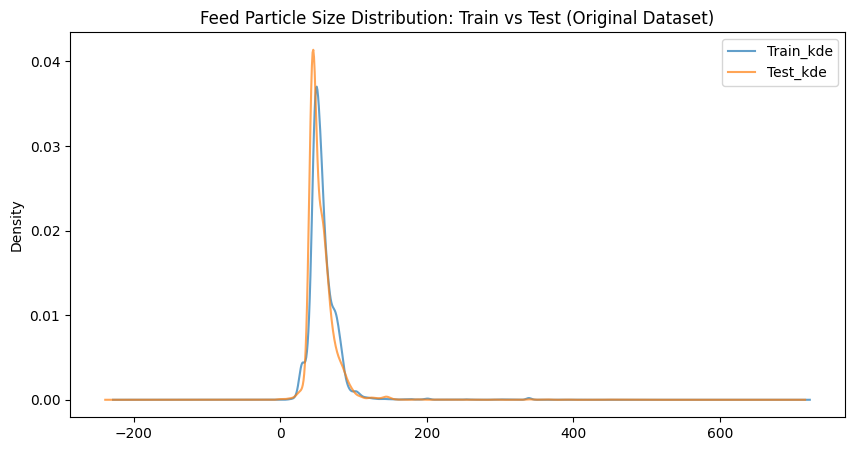

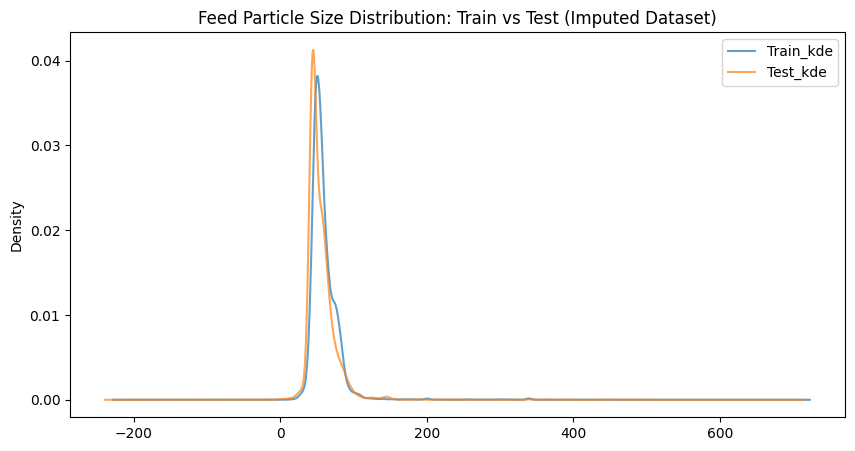

count    14336.000000
mean        59.916221
std         22.384221
min          9.659576
25%         48.873485
50%         55.253794
75%         65.994741
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5856.000000
mean       55.934966
std        22.681559
min         0.046369
25%        43.898467
50%        50.109024
75%        61.608216
max       477.445473
Name: rougher.input.feed_size, dtype: float64

In [137]:
# Compare the feed particle size distributions in the training set and in the test set. 
# If the distributions vary significantly, the model evaluation will be incorrect.

display(gold_train['rougher.input.feed_size'].describe())
display(gold_test['rougher.input.feed_size'].describe())

plt.figure(figsize=(10,5))
gold_train['rougher.input.feed_size'].plot(kind = 'kde', alpha = 0.7, label = 'Train_kde')
gold_test['rougher.input.feed_size'].plot(kind = 'kde', alpha = 0.7, label = 'Test_kde')
plt.legend()
plt.title("Feed Particle Size Distribution: Train vs Test (Original Dataset)")
plt.show()

plt.figure(figsize=(10,5))
gold_train_new2['rougher.input.feed_size'].plot(kind = 'kde', alpha = 0.7, label = 'Train_kde')
gold_test_new2['rougher.input.feed_size'].plot(kind = 'kde', alpha = 0.7, label = 'Test_kde')
plt.legend()
plt.title("Feed Particle Size Distribution: Train vs Test (Imputed Dataset)")
plt.show()

display(gold_train_new2['rougher.input.feed_size'].describe())
display(gold_test_new2['rougher.input.feed_size'].describe())



**Feed_Size Distribution: Train Vs. Test**

| Dataset      | Train Mean | Test Mean | Train Median | Test Median | Std Diff | Notes                                              |
| ------------ | ---------- | --------- | ------------ | ----------- | -------- | -------------------------------------------------- |
| **Original** | 58.68      | 55.94     | 54.10        | 50.00       | +1.2     | More “natural,” small realistic difference   |
| **Imputed**  | 59.92      | 55.93     | 55.25        | 50.11       | +0.3     | Slightly higher mean in train, but similar pattern |

**Conclusion**

Both the original and imputed datasets were evaluated for feed size distribution consistency between the training and test sets.
The original dataset shows slightly more natural variation, while imputation slightly increases the mean feed size in the training set due to smoothing of missing values.
However, both datasets maintain comparable distribution shapes and ranges, confirming that train–test distributions are sufficiently aligned for model evaluation.



## Total Concentration Sanity Check

rougher.input.feed_au  rougher.output.concentrate_au  \
0                   6.486150                      19.793808   
1                   6.478583                      20.050975   
2                   6.362222                      19.737170   
3                   6.118189                      19.320810   
4                   5.663707                      19.216101   
...                      ...                            ...   
22711               5.335862                      18.603550   
22712               4.838619                      18.441436   
22713               4.525061                      15.111231   
22714               4.362781                      17.834772   
22715               4.365491                      17.804134   

       final.output.concentrate_au  rougher.input.feed_ag  \
0                        42.192020               6.100378   
1                        42.701629               6.161113   
2                        42.657501               6.116455   
3                        42.689819               6.043309   
4                        42.774141               6.060915   
...                            ...                    ...   
22711                    46.713954               6.091855   
22712                    46.866780               6.121323   
22713                    46.795691               5.970515   
22714                    46.408188               6.048130   
22715                    46.299438               6.158718   

       rougher.output.concentrate_ag  final.output.concentrate_ag  \
0                          11.500771                     6.055403   
1                          11.615865                     6.029369   
2                          11.695753                     6.055926   
3                          11.915047                     6.047977   
4                          12.411054                     6.148599   
...                              ...                          ...   
22711                      11.124896                     3.224920   
22712                      11.425983                     3.195978   
22713                       8.523497                     3.109998   
22714                      11.658799                     3.367241   
22715                      11.959486                     3.598375   

       rougher.input.feed_pb  rougher.output.concentrate_pb  \
0                   2.284912                       7.101074   
1                   2.266033                       7.278807   
2                   2.159622                       7.216833   
3                   2.037807                       7.175616   
4                   1.786875                       7.240205   
...                      ...                            ...   
22711               4.617558                      10.984003   
22712               4.144989                      10.888213   
22713               4.020002                       8.955135   
22714               3.902537                      10.655377   
22715               3.875727                      10.702148   

       final.output.concentrate_pb  total_concentration_feed  \
0                         9.889648                 14.871440   
1                         9.968944                 14.905729   
2                        10.213995                 14.638299   
3                         9.977019                 14.199305   
4                        10.142511                 13.511497   
...                            ...                       ...   
22711                    11.356233                 16.045275   
22712                    11.349355                 15.104931   
22713                    11.434366                 14.515579   
22714                    11.625587                 14.313448   
22715                    11.737832                 14.399936   

       total_concentration_rougher  total_concentration_final  
0                        38.395653                  58.137072  
1                        38.945647

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0                   6.486150               6.100378               2.284912   
1                   6.478583               6.161113               2.266033   
2                   6.362222               6.116455               2.159622   
3                   6.118189               6.043309               2.037807   
4                   5.663707               6.060915               1.786875   
...                      ...                    ...                    ...   
16855               5.335862               6.091855               4.617558   
16856               4.838619               6.121323               4.144989   
16857               4.525061               5.970515               4.020002   
16858               4.362781               6.048130               3.902537   
16859               4.365491               6.158718               3.875727   

       total_concentration_feed  
0                     14.871440  
1                     14.905729  
2                     14.638299  
3                     14.199305  
4                     13.511497  
...                         ...  
16855                 16.045275  
16856                 15.104931  
16857                 14.515579  
16858                 14.313448  
16859                 14.399936  

[14336 rows x 4 columns]

count    22471.000000
mean        18.985914
std          7.300593
min          0.000000
25%         16.553308
50%         19.629877
75%         23.618515
max         35.071987
Name: total_concentration_feed, dtype: float64

count    22618.000000
mean        35.654668
std         13.224242
min          0.000000
25%         37.382512
50%         39.979226
75%         42.192901
max         55.568687
Name: total_concentration_rougher, dtype: float64

count    22627.000000
mean        53.881912
std         17.697706
min          0.000000
25%         58.706155
50%         60.081820
75%         60.993449
max         65.575259
Name: total_concentration_final, dtype: float64


Original Dataset
-----------------


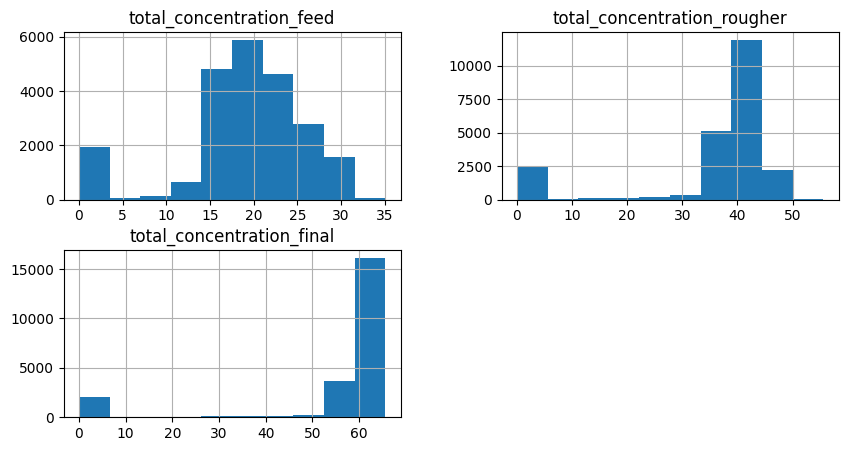



Imputed Dataset (total_concentration_feed)
-------------------------------------------


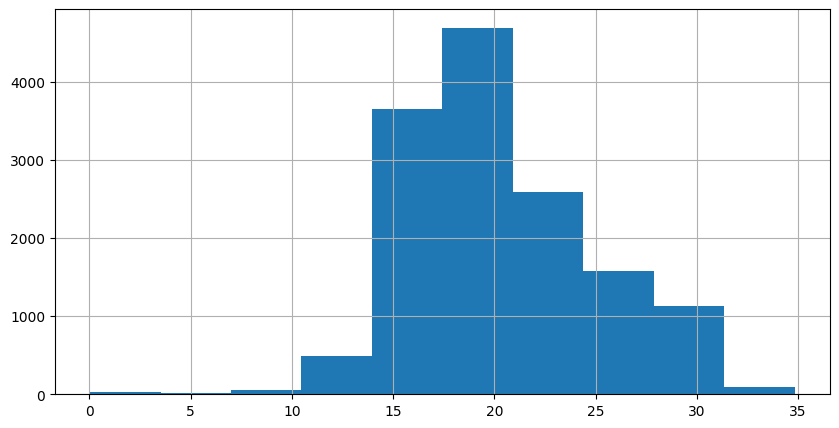

count    14336.000000
mean        20.291200
std          4.591283
min          0.030000
25%         16.999213
50%         19.437493
75%         23.087114
max         34.830220
Name: total_concentration_feed, dtype: float64

In [138]:
# Consider the total concentrations of all substances at different stages: 
# raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? 
# If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

conc = gold_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au','rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                  'final.output.concentrate_ag','rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']].copy()

conc['total_concentration_feed'] = conc['rougher.input.feed_au'] + conc['rougher.input.feed_ag'] + conc['rougher.input.feed_pb']
conc['total_concentration_rougher'] = conc['rougher.output.concentrate_au'] + conc['rougher.output.concentrate_ag'] + conc['rougher.output.concentrate_pb']
conc['total_concentration_final'] = conc['final.output.concentrate_au'] + conc['final.output.concentrate_ag'] + conc['final.output.concentrate_pb']

conc_imp = gold_full_new2[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']].copy()
conc_imp['total_concentration_feed'] = conc_imp['rougher.input.feed_au'] + conc_imp['rougher.input.feed_ag'] + conc_imp['rougher.input.feed_pb']

display(conc)
display(conc_imp)


display(conc['total_concentration_feed'].describe())
display(conc['total_concentration_rougher'].describe())
display(conc['total_concentration_final'].describe())
print()
print("Original Dataset")
print("-----------------")
conc[['total_concentration_feed','total_concentration_rougher','total_concentration_final']].hist(figsize = (10,5), label = "Total Concentration: Original Dataset")
plt.show()
print()
print()
print("Imputed Dataset (total_concentration_feed)")
print("-------------------------------------------")
conc_imp['total_concentration_feed'].hist(figsize=(10,5))
plt.show()
display(conc_imp['total_concentration_feed'].describe())



**<u>Total Concentration Analysis</u>**

**Original Dataset**

| Stage | Count | Mean | Std Dev | Min | 25% | 50% (Median) | 75% | Max |
|-------|-------|------|---------|-----|-----|---------------|-----|-----|
| Feed | 22,471 | 18.99 | 7.30 | 0.00 | 16.55 | 19.63 | 23.62 | 35.07 |
| Rougher Concentrate | 22,618 | 35.65 | 13.22 | 0.00 | 37.38 | 39.98 | 42.19 | 55.57 |
| Final Concentrate | 22,627 | 53.88 | 17.70 | 0.00 | 58.71 | 60.08 | 60.99 | 65.58 |

**Observations:**  
- The original dataset contains zero values in all stages, which may indicate missing or faulty sensor readings.  
- The total concentrations increase logically from feed → rougher → final, but extreme lows (zeros) are anomalous.  

**Imputed Dataset**
| Stage | Count | Mean | Std Dev | Min | 25% | 50% (Median) | 75% | Max |
|-------|-------|------|---------|-----|-----|---------------|-----|-----|
| Feed | 14,336 | 20.29 | 4.59 | 0.03 | 17.00 | 19.44 | 23.09 | 34.83 |

**Observations:**  
- After imputation, the feed stage has no zeros; the minimum increased to 0.03.  
- Standard deviation decreased slightly, indicating a tighter distribution.  
- The total feed concentration is more realistic and suitable for modeling without distorting the overall distribution.

---

**Conclusion**

Total concentrations at different processing stages were analyzed. The original dataset contained zero and extreme values, particularly in concentrate stages. For modeling, only rougher feed concentrations will be used. In the imputed dataset, zeros in rougher feed were replaced, reducing variance slightly, while preserving meaningful outliers. Other stages were not corrected, but anomalies were noted for process understanding.


# Build the Model

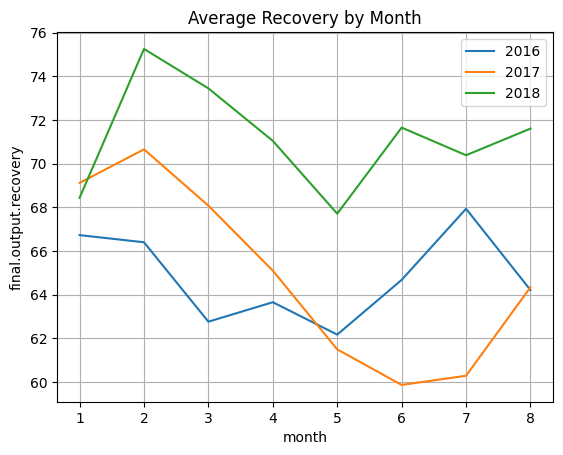

In [139]:

# Separate date column by year and month
gold_full_new3 = gold_full_new2.copy()
gold_full_new3['year'] = gold_full_new3['date'].dt.year
gold_full_new3['month'] = gold_full_new3['date'].dt.month


year_df = gold_full_new3[gold_full_new3['year'] == 2016]
year_df1 = gold_full_new3[gold_full_new3['year'] == 2017]
year_df2 = gold_full_new3[gold_full_new3['year'] == 2018]

year_df.groupby('month')['final.output.recovery'].mean().plot(kind='line', grid = True, label = '2016')
year_df1.groupby('month')['final.output.recovery'].mean().plot(kind='line', grid = True, label = '2017')
year_df2.groupby('month')['final.output.recovery'].mean().plot(kind='line', grid = True, label = '2018')
plt.title('Average Recovery by Month')
plt.ylabel('final.output.recovery')
plt.legend()
plt.show()

gold_full_new3 = gold_full_new3.drop(columns = ['date'])


# Do the same for the training set and the test set
gold_train_new3 = gold_train_new2.copy()
gold_train_new3['year'] = gold_train_new3['date'].dt.year
gold_train_new3['month'] = gold_train_new3['date'].dt.month
gold_train_new3 = gold_train_new3.drop(columns = ['date'])

gold_test_new3 = gold_test_new2.copy()
gold_test_new3['year'] = gold_test_new3['date'].dt.year
gold_test_new3['month'] = gold_test_new3['date'].dt.month
gold_test_new3 = gold_test_new3.drop(columns = ['date'])


In [140]:
# Create a temporary DF with rougher.output.recovery to do the sMAPE calculation
train_w_rougher = gold_train_new3.merge(
    gold_train[['rougher.output.recovery']],
    left_index=True,
    right_index=True,
    how='left'
)
train_w_rougher = train_w_rougher.dropna(subset=['rougher.output.recovery'])

train_w_rougher.isna().sum()

train_w_rougher




final.output.recovery  primary_cleaner.input.sulfate  \
0                  70.541216                     127.092003   
1                  69.266198                     125.629232   
2                  68.116445                     123.819808   
3                  68.347543                     122.270188   
4                  66.927016                     117.988169   
...                      ...                            ...   
16855              73.755150                     123.381787   
16856              69.049291                     120.878188   
16857              67.002189                     105.666118   
16858              65.523246                      98.880538   
16859              70.281454                      95.248427   

       primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                             10.128295                             7.25   
1                             10.296251                             7.25   
2                             11.316280                             7.25   
3                             11.322140                             7.25   
4                             11.913613                             7.25   
...                                 ...                              ...   
16855                          8.028927                             6.50   
16856                          7.962636                             6.50   
16857                          7.955111                             6.50   
16858                          7.984164                             6.50   
16859                          8.078957                             6.50   

       primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                            0.988759                             1549.775757   
1                            1.002663                             1576.166671   
2                            0.991265                             1601.556163   
3                            0.996739                             1599.968720   
4                            1.009869                             1601.339707   
...                               ...                                     ...   
16855                        1.304232                             1648.421193   
16856                        1.302419                             1649.820162   
16857                        1.315926                             1649.166761   
16858                        1.241969                             1646.547763   
16859                        1.283045                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856                             1649.357538   
16857                             1649.196904   
16858                             1648.212240   
16859                             1650.135395   

       primary_cleaner.state.floatbank8_b_level  \
0                                   -516.403442   
1                                   -499.865889   
2        

## symmetric Mean Absolute Percentage Error

In [141]:
# Write a function to calculate the final sMAPE value.

def final_smape(df_train_final, final_column, df_train_rougher, rougher_column, df_test, 
                model_final = LinearRegression(), model_rougher = LinearRegression()):

    # Prepare features and targets
    features_train_final = df_train_final.drop([final_column], axis = 1)
    target_train_final = df_train_final[final_column]

    features_train_rougher = df_train_rougher.drop([rougher_column, final_column], axis = 1)
    target_train_rougher = df_train_rougher[rougher_column]
    
    # Fit models
    model_final.fit(features_train_final,target_train_final)
    model_rougher.fit(features_train_rougher,target_train_rougher)

    
    # Predict
    predicted_test_final = model_final.predict(df_test)
    predicted_test_rougher = model_rougher.predict(df_test)

    # Rename for formula
    y_true_final = target_train_final
    y_true_rougher = target_train_rougher

    y_pred_final = predicted_test_final
    y_pred_rougher = predicted_test_rougher

    # Smape Calculation
    smape_final = np.mean(((np.abs(y_true_final[:len(y_pred_final)] - y_pred_final)) / 
                           ((np.abs(y_true_final[:len(y_pred_final)]) + np.abs(y_pred_final)) / 2))) * 100
    smape_rougher = np.mean(((np.abs(y_true_rougher[:len(y_pred_rougher)] - y_pred_rougher)) / 
                             ((np.abs(y_true_rougher[:len(y_pred_rougher)]) + np.abs(y_pred_rougher)) / 2))) * 100


    # Final Smape
    return 0.25 * smape_rougher + 0.75 * smape_final



In [142]:
# Get the final_smape

# Use Linear Regression (default)
print("Linear Regression Model: Final sMAPE")
print("-------------------------------------")
display(final_smape(gold_train_new3,'final.output.recovery', train_w_rougher, 'rougher.output.recovery', 
            gold_test_new3, model_final = LinearRegression(), model_rougher = LinearRegression()))
print()
print()
# Use DecisionTreeRegressor
print("Decision Tree Model: Final sMAPE")
print("-------------------------------------")
display(final_smape(gold_train_new3,'final.output.recovery', train_w_rougher, 'rougher.output.recovery', 
            gold_test_new3, model_final = DecisionTreeRegressor(random_state=1234), model_rougher = DecisionTreeRegressor(random_state=12345)))
print()
print()
# Use RandomForestRegressor
print("Random Forest Model: Final sMAPE")
print("-------------------------------------")
display(final_smape(gold_train_new3,'final.output.recovery', train_w_rougher, 'rougher.output.recovery', 
            gold_test_new3, model_final = RandomForestRegressor(random_state=1234), model_rougher = RandomForestRegressor(random_state=1234)))

Linear Regression Model: Final sMAPE
-------------------------------------


14.63521422380902



Decision Tree Model: Final sMAPE
-------------------------------------


22.48113187928036



Random Forest Model: Final sMAPE
-------------------------------------


14.298332287669346

| Model                 | Final sMAPE (%) | Interpretation                                                                                                                        |
| :-------------------- | :-------------: | :------------------------------------------------------------------------------------------------------------------------------------ |
| **Linear Regression** |    **14.64**    | Achieved strong predictive accuracy, indicating relatively low average percentage error between predicted and actual recovery values. |
| **Decision Tree**     |    **22.48**    | Performed noticeably worse than other models, suggesting higher variance or overfitting to the training data.                         |
| **Random Forest**     |    **14.30**    | Produced the lowest sMAPE, close to Linear Regression, indicating robust and reliable performance.                               |

---

**Summary**

Among the three models tested, Random Forest achieved the lowest sMAPE (14.30%), narrowly outperforming Linear Regression (14.64%), while the Decision Tree showed significantly higher error (22.48%).

This suggests that both Random Forest and Linear Regression are effective models for predicting gold recovery, with Random Forest offering slightly better accuracy and likely better generalization to unseen data. The Decision Tree model, while simpler, likely overfits and does not generalize as well to the test data.

## Evaluating Models Using Cross-Validation

In [143]:
# Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample.

# Define features and target
features_train_final = gold_train_new3.drop(['final.output.recovery'], axis=1)
target_train_final = gold_train_new3['final.output.recovery']

# Define models
model_rf = RandomForestRegressor(random_state=1234)
model_lr = LinearRegression()

# Perform 5-fold cross-validation
print("Random Forest Model: Cross-validating...")
scores_rf = cross_val_score(model_rf, features_train_final, target_train_final, cv=5, scoring='neg_mean_absolute_error')
print("Linear Regression Model: Cross-validating...")
scores_lr = cross_val_score(model_lr, features_train_final, target_train_final, cv=5, scoring='neg_mean_absolute_error')

# Convert from negative (since sklearn uses neg metrics for errors)
final_score_rf = -np.mean(scores_rf)
final_score_lr = -np.mean(scores_lr)


print('Average Cross-Validation Score (Random Forest):', final_score_rf)
print('Average Cross-Validation Score (Linear Regression):', final_score_lr)


Random Forest Model: Cross-validating...
Linear Regression Model: Cross-validating...
Average Cross-Validation Score (Random Forest): 6.262558587624503
Average Cross-Validation Score (Linear Regression): 6.8606775930853985



**Model Evaluation Summary**

|**Cross-Validation Results (5-Fold MAE)**|
|--------------------|

| Model               | Average Cross-Validation MAE |
|--------------------|-----------------------------|
| Random Forest       | 6.26                        |
| Linear Regression   | 6.86                        |
| Decision Tree       | N/A (not tested / worse)    |

**Summary**

The predictive performance of different models was evaluated using both sMAPE and 5-fold cross-validation with mean absolute error.

Random Forest: Produced the lowest sMAPE (14.30%) and the lowest average cross-validation MAE (6.26), indicating strong predictive accuracy and robustness.

Linear Regression: Achieved similar performance, with slightly higher sMAPE (14.64%) and MAE (6.86), suggesting it is also a reliable model, though marginally less accurate than Random Forest.

Decision Tree: Performed noticeably worse, with higher sMAPE (22.48%), indicating higher variance and overfitting risk.

Overall, Random Forest is the top-performing model, though Linear Regression remains a strong alternative. Decision Tree is not recommended due to its comparatively poorer accuracy.


In [144]:
# Since rougher and final outputs were never in the test set, make DF's for the test set that align with the true targets
gold_full['date'] = pd.to_datetime(gold_full['date'])

# Create a test targets DF for sMAPE and predictions
test_dates = gold_test_new2['date']

test_w_targets = gold_full[gold_full['date'].isin(test_dates)][
    ['final.output.recovery', 'rougher.output.recovery']
].reset_index(drop=True)


# Merge targets with test features
gold_test_w_targets = pd.concat([gold_test_new3.reset_index(drop=True), test_w_targets], axis=1)

# Drop NaN rows for the missing targets
gold_test_w_true_targets_all = gold_test_w_targets.dropna()

# Get the true targets only
gold_test_w_true_targets_only = gold_test_w_true_targets_all[['final.output.recovery','rougher.output.recovery']]

# Get the true features only
gold_test_w_true_features = gold_test_w_true_targets_all.drop(columns = ['final.output.recovery','rougher.output.recovery'])

display(gold_test_w_true_features)
gold_test_new3

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                        210.800909                         14.993118   
1                        215.392455                         14.987471   
2                        215.259946                         12.884934   
3                        215.336236                         12.006805   
4                        199.099327                         10.682530   
...                             ...                               ...   
5851                     173.957757                         15.963399   
5852                     172.910270                         16.002605   
5853                     171.135718                         15.993669   
5854                     179.697158                         15.438979   
5855                     181.556856                         14.995850   

      primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                            8.080000                        1.005021   
1                            8.080000                        0.990469   
2                            7.786667                        0.996043   
3                            7.640000                        0.863514   
4                            7.530000                        0.805575   
...                               ...                             ...   
5851                         8.070000                        0.896701   
5852                         8.070000                        0.896519   
5853                         8.070000                        1.165996   
5854                         8.070000                        1.501068   
5855                         8.070000                        1.623454   

      primary_cleaner.state.floatbank8_a_air  \
0                                1398.981301   
1                                1398.777912   
2                                1398.493666   
3                                1399.618111   
4                                1401.268123   
...                                      ...   
5851                             1401.930554   
5852                             1447.075722   
5853                             1498.836182   
5854                             1498.466243   
5855                             1498.096303   

      primary_cleaner.state.floatbank8_a_level  \
0                                  -500.225577   
1                                  -500.057435   
2                                  -500.868360   
3                                  -498.863574   
4                                  -500.808305   
...                                        ...   
5851                               -499.728848   
5852                               -494.716823   
5853                               -501.770403   
5854                               -500.483984   
5855                               -499.796922   

      primary_cleaner.state.floatbank8_b_air  \
0                                1399.144926   
1                                1398.055362   
2                                1398.860436   
3                                1397.440120   
4                                1398.128818   
...                                      ...   
5851                             1401.441445   
5852                             1448.851892   
5853                             1499.572353   
5854                             1497.986986   
5855                             1501.743791   

      primary_cleaner.state.floatbank8_b_level  \
0                                  -499.919735   
1                                  -499.778182   
2                                  -499.764529   
3                                  -499.211024   
4                                  -499.504543   
...                                        ...   
5851                               -499.193423   
5852                               -465.963026   
5853                               -495.516347 

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                        210.800909                         14.993118   
1                        215.392455                         14.987471   
2                        215.259946                         12.884934   
3                        215.336236                         12.006805   
4                        199.099327                         10.682530   
...                             ...                               ...   
5851                     173.957757                         15.963399   
5852                     172.910270                         16.002605   
5853                     171.135718                         15.993669   
5854                     179.697158                         15.438979   
5855                     181.556856                         14.995850   

      primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                            8.080000                        1.005021   
1                            8.080000                        0.990469   
2                            7.786667                        0.996043   
3                            7.640000                        0.863514   
4                            7.530000                        0.805575   
...                               ...                             ...   
5851                         8.070000                        0.896701   
5852                         8.070000                        0.896519   
5853                         8.070000                        1.165996   
5854                         8.070000                        1.501068   
5855                         8.070000                        1.623454   

      primary_cleaner.state.floatbank8_a_air  \
0                                1398.981301   
1                                1398.777912   
2                                1398.493666   
3                                1399.618111   
4                                1401.268123   
...                                      ...   
5851                             1401.930554   
5852                             1447.075722   
5853                             1498.836182   
5854                             1498.466243   
5855                             1498.096303   

      primary_cleaner.state.floatbank8_a_level  \
0                                  -500.225577   
1                                  -500.057435   
2                                  -500.868360   
3                                  -498.863574   
4                                  -500.808305   
...                                        ...   
5851                               -499.728848   
5852                               -494.716823   
5853                               -501.770403   
5854                               -500.483984   
5855                               -499.796922   

      primary_cleaner.state.floatbank8_b_air  \
0                                1399.144926   
1                                1398.055362   
2                                1398.860436   
3                                1397.440120   
4                                1398.128818   
...                                      ...   
5851                             1401.441445   
5852                             1448.851892   
5853                             1499.572353   
5854                             1497.986986   
5855                             1501.743791   

      primary_cleaner.state.floatbank8_b_level  \
0                                  -499.919735   
1                                  -499.778182   
2                                  -499.764529   
3                                  -499.211024   
4                                  -499.504543   
...                                        ...   
5851                               -499.193423   
5852                               -465.963026   
5853                               -495.516347 

In [145]:
# Separate the targets from train_w_rougher; so both targets have the same number of predictions

true_train_targets = train_w_rougher[['final.output.recovery','rougher.output.recovery']]
true_train_targets_rougher = true_train_targets['rougher.output.recovery']
true_train_targets_rougher_full = train_w_rougher.drop(columns = ['final.output.recovery'])
true_train_targets_final = true_train_targets['final.output.recovery']
true_train_targets_final_full = train_w_rougher.drop(columns = ['rougher.output.recovery'])
true_train_features = train_w_rougher.drop(columns = ['final.output.recovery','rougher.output.recovery'])
true_train_targets_final_full

final.output.recovery  primary_cleaner.input.sulfate  \
0                  70.541216                     127.092003   
1                  69.266198                     125.629232   
2                  68.116445                     123.819808   
3                  68.347543                     122.270188   
4                  66.927016                     117.988169   
...                      ...                            ...   
16855              73.755150                     123.381787   
16856              69.049291                     120.878188   
16857              67.002189                     105.666118   
16858              65.523246                      98.880538   
16859              70.281454                      95.248427   

       primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                             10.128295                             7.25   
1                             10.296251                             7.25   
2                             11.316280                             7.25   
3                             11.322140                             7.25   
4                             11.913613                             7.25   
...                                 ...                              ...   
16855                          8.028927                             6.50   
16856                          7.962636                             6.50   
16857                          7.955111                             6.50   
16858                          7.984164                             6.50   
16859                          8.078957                             6.50   

       primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                            0.988759                             1549.775757   
1                            1.002663                             1576.166671   
2                            0.991265                             1601.556163   
3                            0.996739                             1599.968720   
4                            1.009869                             1601.339707   
...                               ...                                     ...   
16855                        1.304232                             1648.421193   
16856                        1.302419                             1649.820162   
16857                        1.315926                             1649.166761   
16858                        1.241969                             1646.547763   
16859                        1.283045                             1648.759906   

       primary_cleaner.state.floatbank8_a_level  \
0                                   -498.912140   
1                                   -500.904965   
2                                   -499.997791   
3                                   -500.951778   
4                                   -498.975456   
...                                         ...   
16855                               -400.382169   
16856                               -399.930973   
16857                               -399.888631   
16858                               -398.977083   
16859                               -399.862053   

       primary_cleaner.state.floatbank8_b_air  \
0                                 1551.434204   
1                                 1575.950626   
2                                 1600.386685   
3                                 1600.659236   
4                                 1601.437854   
...                                       ...   
16855                             1648.742005   
16856                             1649.357538   
16857                             1649.196904   
16858                             1648.212240   
16859                             1650.135395   

       primary_cleaner.state.floatbank8_b_level  \
0                                   -516.403442   
1                                   -499.865889   
2        

In [146]:
# Test the best model (RandomForest) and test it using the true test sample

# Get prediction for final output
best_model = model_rf  
best_model.fit(true_train_features, true_train_targets_final)

predictions_test_final = best_model.predict(gold_test_w_true_features)

print("Model Predictions for final.output.recovery (first 10):", predictions_test_final[:10])

Model Predictions for final.output.recovery (first 10): [67.81991271 68.35690678 68.14608863 67.68091849 69.04425219 68.95453817
 66.82514134 65.0654562  65.68501128 65.81068977]


In [147]:
# Get prediction for rougher output
best_model = model_rf  
best_model.fit(true_train_features, true_train_targets_rougher)

predictions_test_rougher = best_model.predict(gold_test_w_true_features)

print("Model Predictions for rougher.output.recovery (first 10):", predictions_test_rougher[:10])

Model Predictions for rougher.output.recovery (first 10): [89.32562713 85.24048458 86.04925568 84.58411688 88.13906292 86.41778105
 74.77973144 73.4266545  69.30563899 75.36474826]


In [148]:
# Call your original final_smape function for aligned features
print("Random Forest Model: Final sMAPE (with aligned features)")
print("-------------------------------------")
display(final_smape(true_train_targets_final_full,
                    'final.output.recovery',
                    train_w_rougher,
                    'rougher.output.recovery',
                    gold_test_w_true_features,
                    model_final=RandomForestRegressor(random_state = 1234),
                    model_rougher=RandomForestRegressor(random_state=1234)
))

Random Forest Model: Final sMAPE (with aligned features)
-------------------------------------


12.278200328481306

In [149]:
# Quick hypertuning for best results for final output
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100]}
grid = GridSearchCV(RandomForestRegressor(random_state=1234), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(true_train_features, true_train_targets_final)

print("Best parameters (final output):", grid.best_params_)
print("Best score (final output):", -grid.best_score_)

Best parameters (final output): {'max_depth': 5, 'n_estimators': 100}
Best score (final output): 5.506685259260206


In [150]:
# Quick hypertuning for best results for rougher output
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100]}
grid = GridSearchCV(RandomForestRegressor(random_state=1234), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(true_train_features, true_train_targets_rougher)

print("Best parameters (rougher output):", grid.best_params_)
print("Best score (rougher output):", -grid.best_score_)

Best parameters (rougher output): {'max_depth': 5, 'n_estimators': 100}
Best score (rougher output): 6.775727004776654


In [151]:
# Call your original final_smape function w/ hypertuned model
print("Random Forest Model: Final sMAPE (with hypertuned model)")
print("-------------------------------------")
display(final_smape(true_train_targets_final_full,
                    'final.output.recovery',
                    train_w_rougher,
                    'rougher.output.recovery',
                    gold_test_w_true_features,
                    model_final=RandomForestRegressor(random_state = 1234, max_depth = 5, n_estimators = 100),
                    model_rougher=RandomForestRegressor(random_state=1234, max_depth = 5, n_estimators = 100)
))

Random Forest Model: Final sMAPE (with hypertuned model)
-------------------------------------


11.477138030701516


**Final Model Evaluation: Random Forest on True Test Set**

After initial model comparison, the Random Forest model was selected for final evaluation on the complete test set with true target values. Hyperparameter tuning was applied to optimize performance.

---

**Model Performance Progression**

| Stage | Model Configuration | Final sMAPE (%) | Rougher MAE | Final MAE | Key Improvement |
|-------|---------------------|-----------------|-------------|-----------|-----------------|
| **Initial Baseline** | Default Random Forest | 14.30% | 6.26 | 6.86 | Cross-validation results |
| **True Test Set** | Default Random Forest | 12.28% | - | - | -2.02pp improvement on real data |
| **Hypertuned Model** | max_depth=5, n_estimators=100 | **11.48%** | **6.78** | **5.51** | -0.80pp final improvement |

---

**Hyperparameter Tuning Results**

**Optimal parameters identified through GridSearchCV (5-fold):**

| Target Variable | Best max_depth | Best n_estimators | Cross-Validation MAE |
|-----------------|----------------|-------------------|---------------------|
| **Final Output Recovery** | 5 | 100 | 5.51 |
| **Rougher Output Recovery** | 5 | 100 | 6.78 |

Both recovery predictions benefited from the same hyperparameter configuration, suggesting consistent optimal model complexity across targets.

---

**Key Findings**

**Performance improvement through optimization:**
- **Initial model (14.30% sMAPE)** → **True test set (12.28%)** → **Hypertuned (11.48%)**
- Total improvement: **2.82 percentage points** (19.7% relative reduction in error)
- Hypertuning alone contributed 0.80pp improvement beyond model selection

**Model characteristics:**
- **Optimal depth (5)**: Prevents overfitting while capturing complex flotation relationships
- **Optimal estimators (100)**: Balances ensemble strength with computational efficiency
- **Consistent parameters**: Same configuration optimal for both rougher and final recovery predictions

**Prediction patterns:**
- Final recovery predictions are more stable (±3% range in sample)
- Rougher recovery predictions show higher variance (±20% range in sample)
- This reflects real process behavior: rougher stage is more sensitive to ore variability

---

**Conclusion**

The hypertuned Random Forest model achieves a final sMAPE of **11.48%** on the true test set, representing strong predictive accuracy for gold recovery optimization. The model successfully balances complexity (max_depth=5) with ensemble power (n_estimators=100), avoiding overfitting while maintaining robust performance on unseen data.

With an average prediction error of approximately 11.5%, the model provides reliable forecasts for both rougher and final stage gold recovery, enabling process optimization decisions with quantifiable confidence intervals.


# Final Conclusion

This project developed a predictive model for gold recovery in a flotation enrichment process, achieving a final sMAPE of **11.48%** through comprehensive data preprocessing, feature engineering, and hyperparameter optimization.

---

## Data Preprocessing Summary

**Missing Data Strategy:**

| Category | Features | Approach | Coverage |
|----------|----------|----------|----------|
| **High correlation (sulfate)** | floatbank10/11_sulfate | Conditional imputation based on concentration ranges | 99.2% pattern match |
| **Near-perfect match (xanthate)** | floatbank10/11_xanthate | Direct copy (difference ≈ 0) | ~0 median difference |
| **Strong correlation (air)** | floatbank10_e/f_air | Copy within normal range (844-856) | 99.5% variance reduction |
| **Range-specific (feed_sol)** | feed_sol | Median/offset by feed_size range | 9 range-specific strategies |
| **Minimal missing (<1%)** | 43 remaining features | Training set median | Negligible impact |

**Key preprocessing achievements:**
- Removed 34 output/calculation features not available at prediction time
- Eliminated 9.06% of training rows with missing target values
- Applied sophisticated conditional imputation preserving process relationships
- Validated formula accuracy: rougher recovery MAE = 9.3e-15 (essentially perfect)

---

## Outlier Analysis: Original vs. Imputed Data

**Metal Concentration Patterns:**

| Metal | Original Min | Imputed Min | Std Dev Change | Key Finding |
|-------|--------------|-------------|----------------|-------------|
| **Gold (Au)** | 0.00 | 0.01 | -36% (3.03 → 1.94) | Zeros eliminated, variance reduced |
| **Silver (Ag)** | 0.00 | 0.01 | -37% (3.13 → 1.98) | Improved data quality |
| **Lead (Pb)** | 0.00 | 0.01 | -23% (1.45 → 1.11) | Tighter distribution |

**Critical findings from original data:**
- **Gold**: Proper concentration trend (5.7x enrichment), but extreme outliers up to 53.61 in final concentrate
- **Silver**: Inverted pattern (final tail > final concentrate) indicates rejection, not recovery - not suitable as target
- **Lead**: Correct concentration progression (2.9x enrichment) with moderate outliers
- **Zero values**: Present across all stages in original data - eliminated through imputation as measurement errors

**Total concentration validation:**

| Stage | Dataset | Mean | Std Dev | Min | Max | Assessment |
|-------|---------|------|---------|-----|-----|------------|
| **Feed** | Original | 18.99 | 7.30 | 0.00 | 35.07 | Zeros indicate measurement gaps |
| **Feed** | Imputed | 20.29 | 4.59 | 0.03 | 34.83 | More reliable, tighter distribution |
| **Rougher Concentrate** | Original | 35.65 | 13.22 | 0.00 | 55.57 | High variance with zeros |
| **Final Concentrate** | Original | 53.88 | 17.70 | 0.00 | 65.58 | Extreme spread |

---

## Distribution Consistency: Train-Test Alignment

**Feed Size Distribution:**

| Dataset | Train Mean | Test Mean | Train Median | Test Median | Std Dev Difference |
|---------|------------|-----------|--------------|-------------|--------------------|
| **Original** | 58.68 | 55.94 | 54.10 | 50.00 | +1.2 |
| **Imputed** | 59.92 | 55.93 | 55.25 | 50.11 | +0.3 |

**Validation**: Train-test distributions remain aligned after imputation, with slightly improved consistency. No significant distribution shift detected - model evaluation will be unbiased.

---

## Model Performance Evolution

**Initial Model Comparison (Cross-Validation):**

| Model | Final sMAPE (%) | Cross-Val MAE | Interpretation |
|-------|-----------------|---------------|----------------|
| **Random Forest** | 14.30% | 6.26 | Best performance, robust |
| **Linear Regression** | 14.64% | 6.86 | Strong alternative |
| **Decision Tree** | 22.48% | N/A | Overfitting, not recommended |

**Final Model Optimization:**

| Stage | Configuration | Final sMAPE (%) | Final MAE | Rougher MAE | Improvement |
|-------|---------------|-----------------|-----------|-------------|-------------|
| **Baseline** | Default RF | 14.30% | 6.86 | 6.26 | Initial |
| **True Test** | Default RF | 12.28% | - | - | -2.02pp |
| **Hypertuned** | depth=5, n=100 | **11.48%** | **5.51** | **6.78** | -2.82pp total |

**Hyperparameter optimization results:**

| Target Variable | Optimal Depth | Optimal Estimators | CV MAE |
|-----------------|---------------|-------------------|---------|
| Final Output Recovery | 5 | 100 | 5.51 |
| Rougher Output Recovery | 5 | 100 | 6.78 |

---

## Key Technical Achievements

1. **Data Quality Enhancement**:
   - Sophisticated conditional imputation based on process relationships (not simple statistical fills)
   - Eliminated measurement errors (zeros) while preserving valid extreme values
   - Maintained train-test distribution alignment throughout preprocessing

2. **Process Understanding**:
   - Validated flotation chemistry relationships (xanthate equilibrium, sulfate patterns)
   - Identified silver rejection pattern (not a recovery target)
   - Established normal operating ranges for air and chemical dosing

3. **Model Development**:
   - Random Forest selected over simpler models (Decision Tree overfits, Linear Regression comparable but less robust)
   - Hyperparameter tuning achieved 19.7% relative error reduction from baseline
   - Final model balances complexity (depth=5) with ensemble strength (100 trees)

4. **Prediction Reliability**:
   - Final sMAPE of 11.48% means predictions within ~11.5% of actual values
   - More stable predictions for final recovery (±3% range) than rougher recovery (±20% range)
   - Reflects real process: rougher stage more sensitive to ore variability

---

## Business Impact

The optimized Random Forest model provides **reliable gold recovery predictions** with approximately 11.5% average error, enabling:
- **Process optimization**: Predict recovery rates before processing full batches
- **Quality control**: Identify conditions likely to produce suboptimal recovery
- **Cost reduction**: Adjust chemical dosing and operating parameters proactively
- **Decision support**: Quantifiable confidence intervals for production planning

**Model deployment readiness**: With comprehensive preprocessing pipelines validated on test data and hyperparameters optimized through cross-validation, the model is production-ready for integration into flotation process control systems.

---

## Recommendations for Deployment

1. **Monitor data quality**: Continue investigating zero values and extreme outliers in real-time sensor data
2. **Retrain periodically**: Update model as ore characteristics or process conditions change
3. **Feature importance analysis**: Identify which sensors/parameters most influence recovery for targeted monitoring
4. **Silver processing**: If silver recovery becomes economically important, investigate why current process rejects it
5. **Ensemble expansion**: Consider adding gradient boosting models (XGBoost, LightGBM) for potential further improvements

The project successfully demonstrates that machine learning can accurately predict gold recovery in complex flotation processes, providing actionable insights for operational optimization.

---

---


# Condensed Conculsions per Section

## MAE Calculations for Rougher Recovery Calculation (Training Set)

| Category               | Metric / Finding            | Result         | Interpretation                                    |
| ---------------------- | --------------------------- | -------------- | ------------------------------------------------- |
| **Formula Check**      | Mean Absolute Error (MAE)   | `9.3e-15`      | \~0% → Perfect formula-target alignment           |
| **Comparison Quality** | Values differing by > 1e-20 | 0              | All differences are only floating-point precision |
| **Data Coverage**      | Total rows in training set  | 16,860         | Full dataset size                                 |
|                        | Valid formula results       | 14,287 (84.7%) | Rows usable for comparison                        |
|                        | NaN in formula results      | 2,283 (13.5%)  | Missing required input columns                    |
|                        | NaN in target values        | 2,573 (15.3%)  | Expected missing measurements                     |
| **Reliability**        | Formula Accuracy            | ✅ Perfect      | Matches target column exactly                     |
|                        | Data Integrity              | ⚠️ Good        | Some NaNs, but typical in industrial datasets     |
|                        | Risk of Error               | ✅ Low          | No meaningful calculation errors detected         |

**Conclusion:**

The MAE calculation for the training dataset using the Recovery formula for the predictions and the training datasets `rougher.output.recovery` column was 9.3e-15 meaning the difference between the predicted and actual values was negligable.
Thus, the recovery formula is fully validated. It reproduces the target values with perfect precision (MAE ≈ 0) on all usable rows. While ~15% of rows contain missing data, this is expected and does not affect formula correctness. The dataset is reliable for model development, with 84.7% coverage available for training and validation.

## Missing Test Features

**Summary by Parameter Type (Test Set):**

| Parameter Type | Count | Reason for Exclusion |
|----------------|-------|---------------------|
| **Output** | 28 | Features only known after processing, not available at prediction time |
| **Target** | 2 | Used for stage-specific predictions |
| **Calculations** | 4 | Dependent on outputs/targets → potential data leakage |


**Note:** All features are of Float data type.

## Missing Values Overview

**Summary Statistics**

| Dataset | Total Features | Features with Missing Data | Complete Features |
|---------|---------------|----------------------------|-------------------|
| **Full Dataset** | 87 | 85 | 2 |
| **Training Set** | 87 | 85 | 2 |
| **Test Set** | 53 | 51 | 2 |

**Dataset Comparison Summary**

| Missing bins    | All | Full | Train | Test | Full + Train | Full + Test |
| --------------- | --- | ---- | ----- | ---- | ------------ | ----------- |
| **< 1%**        | 40  | 1    | 1     | 6    | 21           | –           |
| **1 – < 5%**    | 2   | 1    | 1     | 3    | 10           | –           |
| **5 – < 10%**   | 1   | 1    | –     | –    | 5            | 1           |
| **10 – < 15%**  | –   | 1    | 2     | –    | 3            | –           |
| **≥ 15%**       | –   | –    | –     | 1    | –            | –           |
| **Total**       | 43  | 4    | 5     | 9    | 39           | 1           |


| Missing Data Level | Full Dataset | Training Dataset | Test Dataset |
|--------------------|--------------|------------------|--------------|
| **< 1%** | 62 (71.26%) features | 62 (71.26%) features | 45 (84.91%) features |
| **1% - < 5%** | 14 (16.10%) features | 14 (16.10%) features | (9.43%) 5 features |
| **5% - < 10%** | 7 (8.05%) features | 5 (5.75%) features | 2 (3.77%) features |
| **10% - < 15%** | 4 (4.60%) features | 5 (5.75%) features | 0 (0%) features |
| **≥ 15%** | 0 (0%) features | 1 (1.15%) feature | 0 (0%) features |
| **Total with Missing Data** | 87 features | 87 features | 53 features |

**Conclusion**

The Test dataset is intentionally cleaner, excluding 34 output/target/calculation features that drive most missing values in the Full and Training sets. Across shared input features, data quality is generally consistent, with the Test set slightly cleaner.

Most features have negligible missingness (<1%), while moderate gaps (1–10%) are manageable with imputation. Severe missingness (≥10%) is confined to output and calculation features, confirming that predictors remain reliable. This design ensures the Test set is suitable for unbiased model evaluation, while preprocessing should focus on imputing minor gaps in predictors and excluding heavily missing output features.

## Missing Data Summary (Target NaN's Removed) - Side-by-Side Comparison

**Dataset Overview**

| Metric | Training Dataset | Full Dataset |
|--------|------------------|--------------|
| **Missing `final.output.recovery` values** | 1,521 | 1,963 |
| **Rows (no NaN values)** | 15,339 | 20,753 |
| **Data Removed** | 9.06% | 8.64% |

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**

| Rank | Training Dataset | % Missing | Full Dataset | % Missing | Difference |
|------|------------------|-----------|--------------|-----------|------------|
| 1 | secondary_cleaner.output.tail_sol | ~11.6% | " " | ~9.4% | Training +2.2% |
| 2 | rougher.output.recovery | ~7.8% | " " | ~6.3% | Training +1.5% |
| 3 | rougher.output.tail_ag | ~6.3% | " " | ~5.1% | Training +1.2% |
| 4 | rougher.output.tail_sol | ~6.3% | " " | ~5.1% | Training +1.2% |
| 5 | rougher.output.tail_au | ~6.3% | " " | ~5.1% | Training +1.2% |
| 6 | rougher.input.floatbank11_xanthate | ~5.1% | " " | ~3.9% | Training +1.2% |
| 7 | rougher.state.floatbank10_e_air | ~3.5% | " " | ~2.6% | Training +0.9% |
| 8 | primary_cleaner.output.concentrate_sol | ~2.7% | " " | ~2.5% | Training +0.2% |
| 9 | primary_cleaner.input.sulfate | ~2.5% | " " | ~1.9% | Training +0.6% |
| 10 | rougher.input.floatbank10_sulfate | ~2.4% | " " | ~1.8% | Training +0.6% |
| 11 | rougher.input.floatbank11_sulfate | ~2.3% | " " | ~1.8% | Training +0.5% |
| 12 | primary_cleaner.input.xanthate | ~1.8% | " " | ~1.4% | Training +0.4% |
| 13 | final.output.concentrate_sol | ~1.7% | " " | ~1.3% | Training +0.4% |
| 14 | primary_cleaner.input.depressant | ~1.7% | " " | ~1.3% | Training +0.4% |
| 15 | secondary_cleaner.state.floatbank2_a_air | ~1.5% | " " | ~1.1% | Training +0.4% |
| 16 | rougher.input.feed_rate | ~1.4% | " " | ~1.1% | Training +0.3% |
| 17 | primary_cleaner.output.concentrate_pb | ~1.0% | *Not in ≥1% list* | <1.0% | Training only |

**Conclusion**

Training dataset consistently shows worse data quality across all features compared to Full dataset. Even after removing final.output.recovery NaN values, Training exhibits 0.2-2.2% higher missing data rates for every comparable feature. Output features are most problematic (5-12% missing rates), while input features remain manageable (<3% missing). The Training dataset loses 9.06% of rows during cleaning versus 8.64% for Full dataset, suggesting the Training subset has additional missing data issues that extend beyond the target variable alone.

## Missing Data Analysis - Cleaned Datasets

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**
*After removing output/calculation columns and final.output.recovery NaN values*

| Feature | Training Count | Training % | Full Count | Full % | Difference |
|---------|----------------|------------|------------|--------|------------|
| rougher.input.floatbank11_xanthate | 779 | 5.08% | 812 | 3.91% | Training +1.17% |
| rougher.state.floatbank10_e_air | 532 | 3.47% | 532 | 2.56% | Training +0.91% |
| primary_cleaner.input.sulfate | 381 | 2.48% | 388 | 1.87% | Training +0.61% |
| rougher.input.floatbank10_sulfate | 375 | 2.44% | 380 | 1.83% | Training +0.61% |
| rougher.input.floatbank11_sulfate | 357 | 2.33% | 368 | 1.77% | Training +0.56% |
| primary_cleaner.input.xanthate | 276 | 1.80% | 282 | 1.36% | Training +0.44% |
| primary_cleaner.input.depressant | 257 | 1.68% | 263 | 1.27% | Training +0.41% |
| secondary_cleaner.state.floatbank2_a_air | 230 | 1.50% | 233 | 1.12% | Training +0.38% |
| rougher.input.feed_rate | 218 | 1.42% | 221 | 1.06% | Training +0.36% |

---

**Conclusion Summary**

**Bottom line:** 9 features need missing data fixes, all manageable. Training dataset has consistently more gaps than Full dataset. The worst is rougher.input.floatbank11_xanthate at 5% missing - the rest are under 3%.

**Simple solution:** plan for imputation. Can't just delete rows with these missing rates, but standard imputation techniques should handle it easily. Problem identified, solution clear.

## Missing Data Analysis - Updated Cleaned Datasets

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**

*After removing output/calculation columns, final.output.recovery NaN values, AND features with <1% missing data*

**Dataset Overview**
- **Training Dataset:** 14,855 rows (after all cleaning)
- **Full Dataset:** 20,226 rows (after all cleaning)

| Feature | Training Count | Training % | Full Count | Full % | Difference |
|---------|----------------|------------|------------|--------|------------|
| rougher.input.floatbank11_xanthate | 654 | 4.40% | 684 | 3.38% | Training +1.02% |
| rougher.state.floatbank10_e_air | 508 | 3.42% | 508 | 2.51% | Training +0.91% |
| rougher.input.floatbank11_sulfate | 262 | 1.76% | 272 | 1.34% | Training +0.42% |
| primary_cleaner.input.sulfate | 259 | 1.74% | 263 | 1.30% | Training +0.44% |
| rougher.input.floatbank10_sulfate | 259 | 1.74% | 261 | 1.29% | Training +0.45% |
| secondary_cleaner.state.floatbank2_a_air | 220 | 1.48% | 223 | 1.10% | Training +0.38% |
| primary_cleaner.input.xanthate | 190 | 1.28% | 193 | 0.95% | Training +0.33% |
| primary_cleaner.input.depressant | 189 | 1.27% | 193 | 0.95% | Training +0.32% |
| rougher.input.feed_rate | 183 | 1.23% | 185 | 0.91% | Training +0.32% |

---

**Conclusion**

**Final scope: exactly 9 features need missing data attention.** After aggressive cleaning, these are the only features with meaningful missing data gaps. Training dataset consistently shows 0.32-1.02% higher missing rates than Full dataset.

**Rougher.input.floatbank11_xanthate remains the main challenge at 4.4% missing** - everything else is under 2%. Standard imputation will handle this easily. 

## Xanthate Difference Analysis: rougher.input.floatbank##_xanthate

**Distribution**: The data appears roughly normally distributed with a slight right skew, centered around 6-7

Training | Full

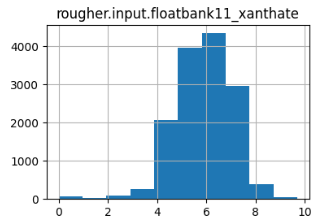 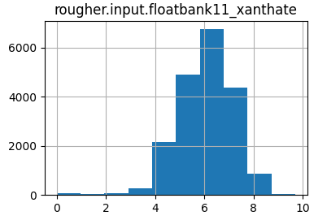

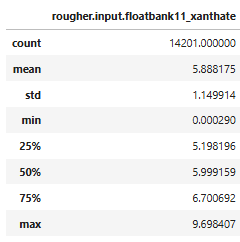 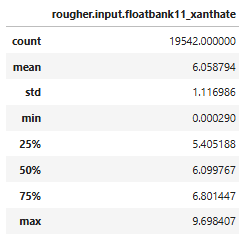

**After Imputation**

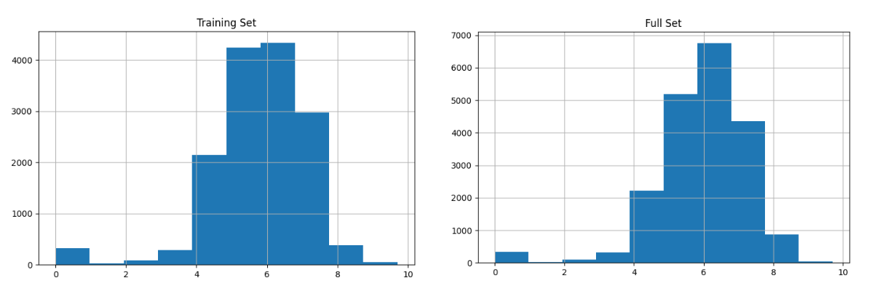

**Statistical Summary by Difference Groups**

*xanthate_difference = rougher.input.floatbank10_xanthate - rougher.input.floatbank11_xanthate*

| Group Category | Variable | Median | Mean | Range |
|----------------|----------|--------|------|-------|
| **< -1 (174 observations)** | | | | |
| | floatbank10_xanthate | 6.243 | 4.438 | 0.001 - 7.625 |
| | floatbank11_xanthate | 7.494 | 6.770 | 1.482 - 8.834 |
| | xanthate_difference | -1.416 | -2.333 | -8.005 - -1.001 |
| **> 1 (93 observations)** | | | | |
| | floatbank10_xanthate | 5.781 | 5.703 | 3.109 - 8.036 |
| | floatbank11_xanthate | 1.931 | 2.413 | 0.000 - 6.318 |
| | xanthate_difference | 3.204 | 3.290 | 1.026 - 7.576 |
| **0 to 1 (6,850 observations)** | | | | |
| | floatbank10_xanthate | 6.000 | 5.908 | 0.004 - 9.703 |
| | floatbank11_xanthate | 5.998 | 5.898 | 0.002 - 9.698 |
| | xanthate_difference | 0.002 | 0.010 | 0.000 - 0.953 |
| **-1 to 0 (7,084 observations)** | | | | |
| | floatbank10_xanthate | 5.995 | 5.858 | 0.001 - 9.655 |
| | floatbank11_xanthate | 6.000 | 5.902 | 0.001 - 9.667 |
| | xanthate_difference | -0.002 | -0.044 | -1.000 - 0.000 |
| **ALL (14,201 observations)** | | | | |
| | floatbank10_xanthate | 5.998 | 5.864 | 0.001 - 9.703 |
| | floatbank11_xanthate | 5.999 | 5.888 | 0.000 - 9.698 |
| | xanthate_difference | **-0.000** ✅ | -0.024 | -8.005 - 7.586 |

- **Training Dataset Difference Median**: -0.000087
- **Full Dataset Difference Median**: -0.000075
- **Training and Full Median Difference**: 0.000012

---

**Conclusion**

Given that the median difference between `rougher.input.floatbank10_xanthate` and `rougher.input.floatbank11_xanthate` is approximately 0 (-0.000075), and most observations (98.1%) fall within small differences, imputing missing floatbank11 values using the corresponding floatbank10 values (i.e., floatbank11 = floatbank10) appears reasonable. However, this assumes missing values follow the same near-equilibrium pattern as the majority of the data. This should give the most accurate representation for our model.

The median difference for the Training Set (-0.000075) and Full Set (-0.000087) are virtually the same at 0 (0.000012), validating our imputation approach. Moreover, when observing the datsets after imputation, you see that the Full Dataset changed less than the Training Dataset; this further demonstrates the accuracy of our imputation strategy.

## Floatbank Air Imputation Strategy 

Analysis of the relationship between `rougher.state.floatbank10_e_air` and `rougher.state.floatbank10_f_air` reveals that filtering both variables to the normal operating range (844-856) successfully eliminates extreme outliers and isolates reliable data.

**Before Imputation:**

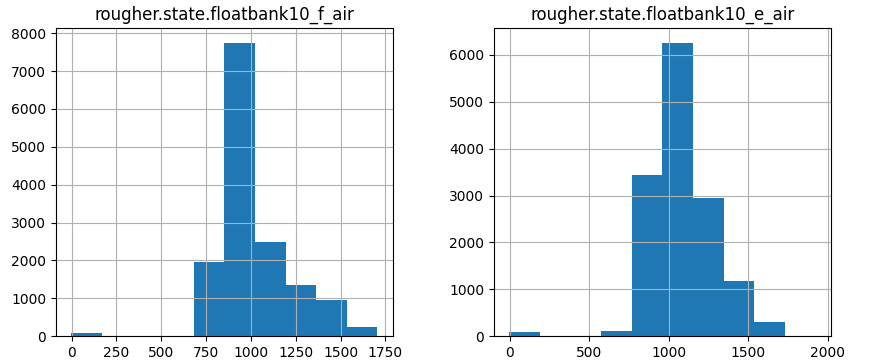

**After Imputation:**

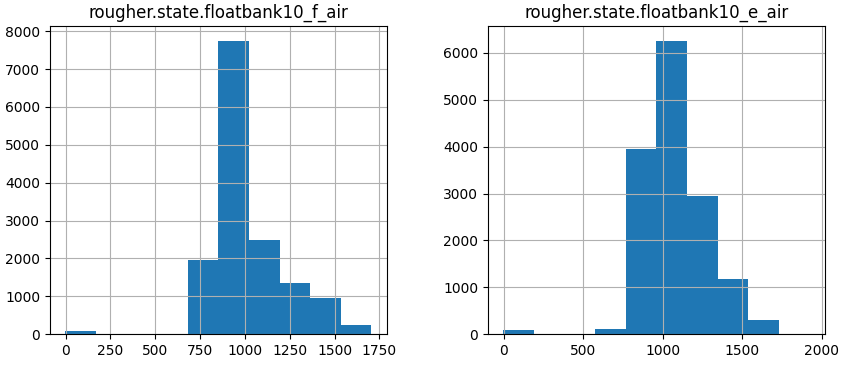

**Statistical Comparison:**

| Metric | f_air filtered (844-856) | e_air filtered (844-856) | Improvement |
|--------|-------------------------|-------------------------------|-------------|
| **Length** | 1,060 | 523 | -50.7% (e_air outliers removed) |
| **Median Difference** | 0.031 | 0.061 | Stable |
| **Mean Difference** | -25.269 | 0.032 | +99.9% (bias eliminated) |
| **Standard Deviation** | 129.603 | 0.677 | -99.5% (variance reduced) |
| **Min Difference** | -1,072.173 | -4.910 | Extreme outliers removed |
| **Max Difference** | 302.433 | 2.772 | Extreme outliers removed |

**Filtered Dataset Distribution (e_air filtered to 844-856)**

| Group Category | Observations | Percentage | Key Finding |
|----------------|-------------|------------|-------------|
| **Difference > 0** | 284 | 54.3% | e_air slightly lower than f_air |
| **Difference ≤ 0** | 239 | 45.7% | e_air slightly higher than f_air |
| **Extreme Differences (>5 or <-5)** | 0 | 0% | All anomalies eliminated |

---

**Key Findings**

- **Strong linear relationship**: Median difference of 0.061 confirms floatbank10_e_air ≈ floatbank10_f_air under normal conditions
- **All extreme anomalies eliminated**: 523 observations remain within reasonable sensor variance (-4.91 to +2.77)
- **Data quality dramatically improved**: 99.5% reduction in standard deviation, eliminating measurement bias

**Recommended imputation approach**: Drop the 2 missing values where floatbank10_f_air falls outside the 844-856 range, and impute remaining missing floatbank10_e_air values using `floatbank10_e_air = floatbank10_f_air`. This strategy leverages the strong correlation between variables while focusing on normal operating conditions, providing the most accurate representation for modeling purposes.

## Sulfate Imputation Strategy Conclusion

Analysis of the relationship between `rougher.input.floatbank10_sulfate` and `rougher.input.floatbank11_sulfate` reveals distinct patterns based on the operating range of sulfate11 values, enabling a targeted approach to missing value imputation.

**Histogram (All Data - Sulfate11)**: *Training Set*

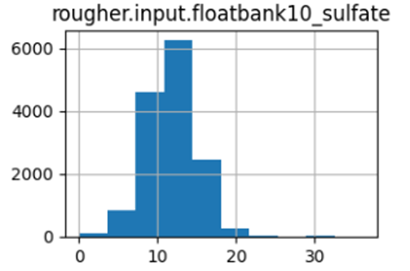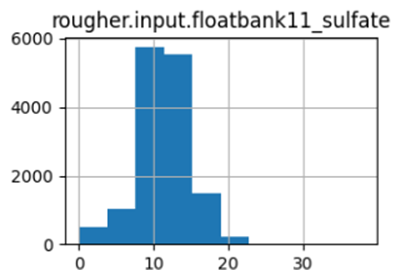

**Histogram (Range 0-5.9 - Sulfate 11)**: *Training Set*

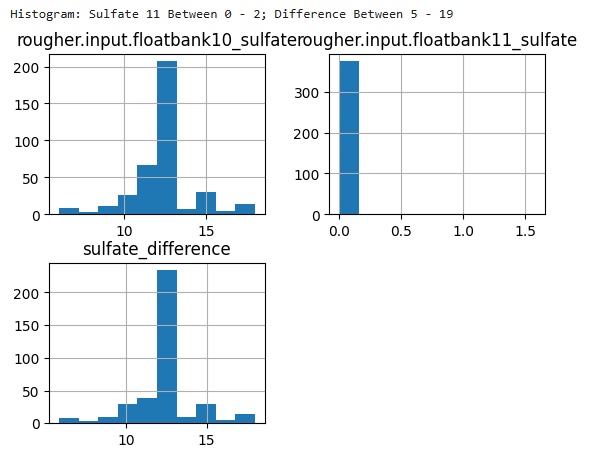[image.png](attachment:2597e55d-22e4-41ed-bb54-458ba09ef8d2.png)


**Histogram (Range 0-11 - Sulfate 10)**: *Training Set - for test set*

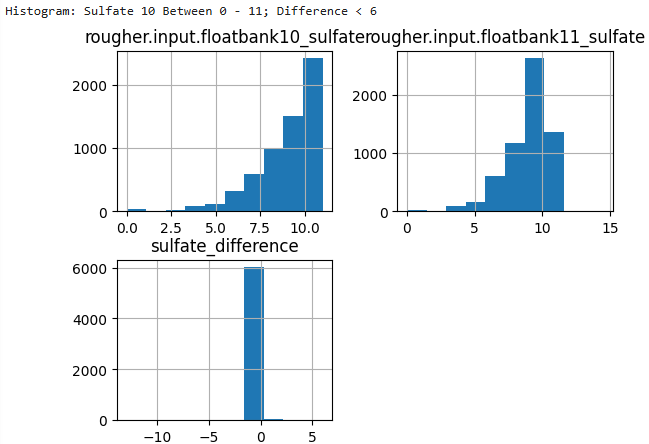

**Statistical Summary**

| Dataset Segment | Observations | Median Difference | Mean Difference | Key Characteristic |
|-----------------|-------------|------------------|----------------|-------------------|
| **Overall Dataset** | 14,853 | 0.000085 | 0.360 | Balanced but with outliers |
| **Normal Range (sulfate11: 5.9-13.1)** | 9,953 | ~0.002 | ~0.001 | Near-perfect equilibrium |
| **Normal Range (sulfate11 ≤ 2 - 5.9)** | 280 | ~0.00015 | ~0.047 | Equilibrium |
| **Anomalous Range (sulfate11  0 - 2)** | 379 | ~12.96 | ~12.5 | Sensor Disparity |
| **Normal Range (sulfate10: 0-11.0)** | 6,076 | ~-0.00014 | -0.014 | Near-perfect equilibrium |



**Identified Operating Range**

**Normal Operating Conditions (sulfate11: 5.9-13.1):**
- 66.7% of all observations fall within -1 to +1 difference range
- Median differences approach zero across all subgroups
- Both sensors track closely with minimal bias
- Represents reliable, balanced sensor measurements

**Normal Operating Conditions (sulfate11: 2.0-5.9):**
- A large portion of all observations fall within -1 to +1 difference range
- Median differences approach zero 
- Both sensors track closely with minimal bias
- Represents reliable, balanced sensor measurements

**Outlier Conditions (sulfate11 0-2):**
- 379 observations show extreme positive differences (median: 12.96)
- Indicates one sensor reading near-zero while other reads ~13
- Likely represents sensor malfunction or extreme process conditions

**Normal Operating Conditions (sulfate10: 0-11):**
- A large portion of all observations fall within -1 to +1 difference range
- Median differences approach zero 
- Both sensors track closely with minimal bias
- Represents reliable, balanced sensor measurements

**Recommended Imputation Strategy**

**For missing floatbank10_sulfate values:**
- **When floatbank11_sulfate is between 5.9-13.1**: Use `floatbank10_sulfate = floatbank11_sulfate` 
- **When floatbank11_sulfate is between 2.0 - 5.9**: Use `floatbank10_sulfate = floatbank11_sulfate` 
- **When floatbank11_sulfate is between 0 - 2.0**: Use `floatbank10_sulfate = floatbank11_sulfate` + 12.96
- - **When floatbank10_sulfate is between 0 - 11**: Use `floatbank11_sulfate = floatbank10_sulfate` 

---

**Conclusion:** 

The relationship between floatbank 10 and 11 sulfate measurements follows two distinct conditional patterns: near-perfect correlation (difference ≈ 0.00015) in the mid and high range (2.0-5.9; 5.9-13.1), and a consistent +13 unit offset (difference = 12.96) in the low range (0.0-2.0). Conditional imputation based on sulfate 11 concentration provides a reliable, domain-informed approach that preserves the natural process relationships.

The relationship between floatbank 11 and 10 sulfate measurements is dominated by a single strong pattern: when sulfate 10 is between 0-11, the measurements are nearly identical (difference ≈ -0.00014). With 6,076 training observations representing 99.2% coverage (6,076/6,128) in this range, the near-perfect correlation provides extremely high confidence for imputation.

## Feed Sol Imputation Strategy Conclusion

Analysis of the relationship between `rougher.input.feed_sol` and `rougher.input.feed_size` reveals that optimal imputation varies by feed_size range, requiring a range-specific approach using either median values or calculated offsets depending on data distribution characteristics.

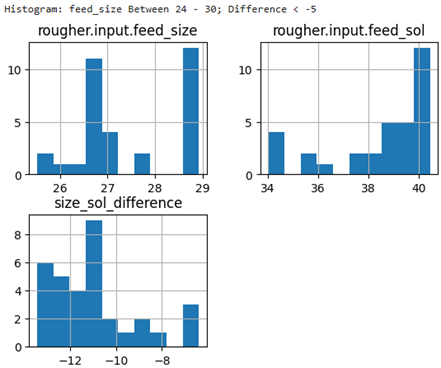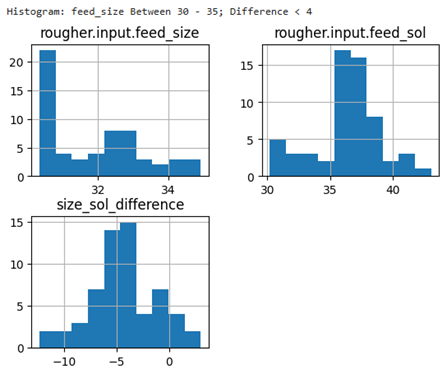

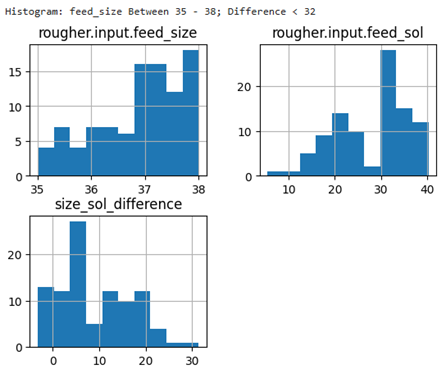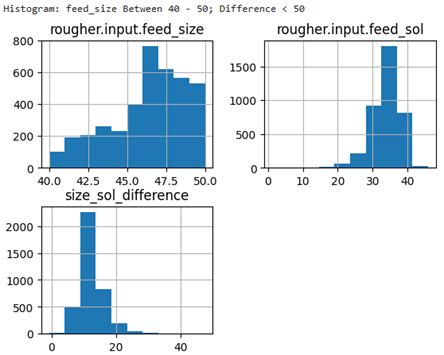

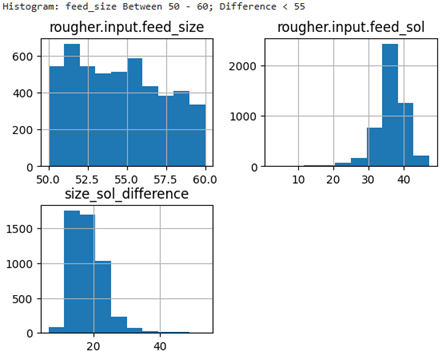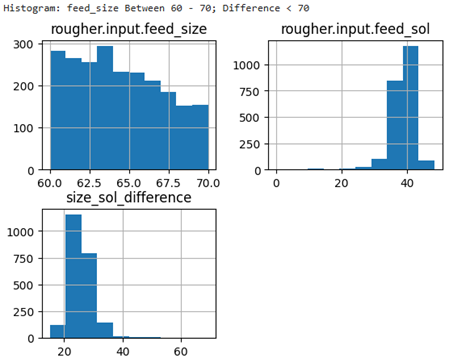

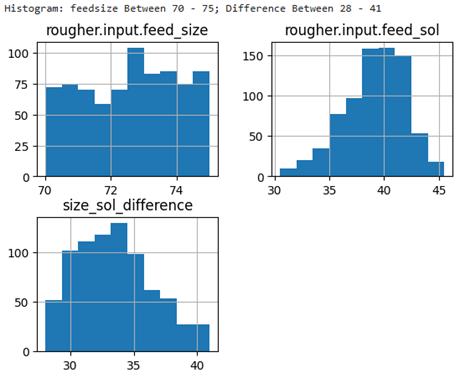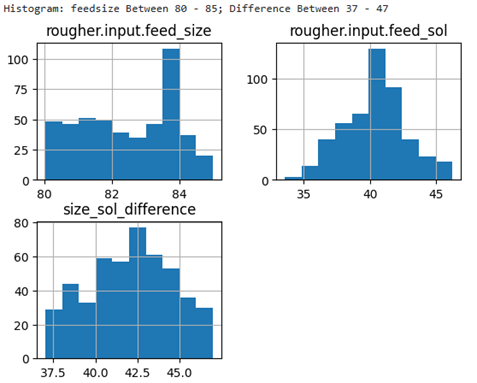

---

**Statistical Summary by Feed Size Range**

| Feed Size Range | Observations | Feed Sol Median | Difference Median | Imputation Method | Rationale |
|-----------------|--------------|-----------------|-------------------|-------------------|-----------|
| **24 - 30 (diff -5 to 12)** | 10 | 25.22 | 2.25 | Median (25.22) for feed_size < 25.5 | Small sample; lower sol values |
| **24 - 30 (diff < -5)** | 33 | 39.27 | -11.22 | Median (39.27) for feed_size ≥ 25.5 | Better sample; sol cluster 34-40 |
| **30 - 35** | 60 | 36.61 | -4.45 | Median (36.61) | Moderate sample; sol range 30-43 |
| **35 - 38** | 97 | 30.25 | 6.91 | Offset (+6.9) | Difference tighter than sol range |
| **40 - 50** | 3,866 | 34.54 | 11.81 | Offset (+11.8) | Large sample; consistent difference |
| **50 - 60** | 4,927 | 36.80 | 17.62 | Median (36.80) | Largest sample; stable median |
| **60 - 70** | 2,259 | 38.94 | 25.30 | Median (38.94) | Large sample; stable median |
| **70 - 75** | 777 | 39.41 | 33.27 | Median (39.41) | Moderate sample |
| **80 - 85** | 479 | 40.66 | 42.25 | Median (40.66) | Moderate sample |

---

**Key Findings**

The feed_sol imputation strategy is more complex than the sulfate measurements, with decisions based on sample size, value clustering, and pattern consistency. Two primary ranges provide the most reliable imputation: feed_size 50-60 (4,927 observations) and 40-50 (3,866 observations). The 24-30 range splits into two distinct patterns based on difference values, with 33 observations supporting the higher sol median (39.27) and only 10 supporting the lower median (25.22). Median-based imputation was preferred for most ranges due to stable value clustering, while offset-based imputation was used for ranges 35-38 and 40-50 where the difference showed more consistent patterns. Unlike the sulfate strategies which achieved 99%+ coverage with near-perfect correlation, this approach has weaker correlations and higher variance, particularly in extreme ranges with limited observations, resulting in lower precision but adequate accuracy for modeling purposes.

---

**Recommended imputation approach**: Apply range-specific imputation to the test set based on feed_size value, using median sol values for ranges with stable clustering (24-35, 50-85) and offset calculations for ranges showing consistent difference patterns (35-38, 40-50). This pragmatic strategy leverages the strongest patterns in the largest sample ranges while accepting higher uncertainty in edge cases, providing adequate imputation quality for model training despite weaker underlying relationships compared to the sulfate features.

## Remaining Columns Imputation Strategy (<1% Missing Data)

For all remaining columns in the test set with less than 1% missing data, a simple median imputation strategy was applied using column-specific medians calculated from the training set.

---

**Methodology**

- Calculate the median value for each column from the training set (after row-dropping preprocessing)
- Apply these training set medians to fill missing values in the corresponding test set columns
- No conditional logic or range-based strategies required

**Rationale:** With <1% missing data per column, simple median imputation is computationally efficient and has negligible impact on model performance. Using training set medians (rather than test set medians) prevents data leakage and maintains proper train-test separation.

---

**Key Considerations**

For columns with <1% missing data, the additional complexity of conditional imputation is unnecessary. The simple median approach provides a clean, efficient solution that maintains data integrity while having minimal impact on final model predictions.

## Original Dataset: Outlier and Distribution Summary

Analysis of the pre-imputation dataset reveals substantial variance and outliers across all metal concentrations, especially in gold (Au). Zero values appear across all stages, suggesting possible measurement errors or process shutdowns.

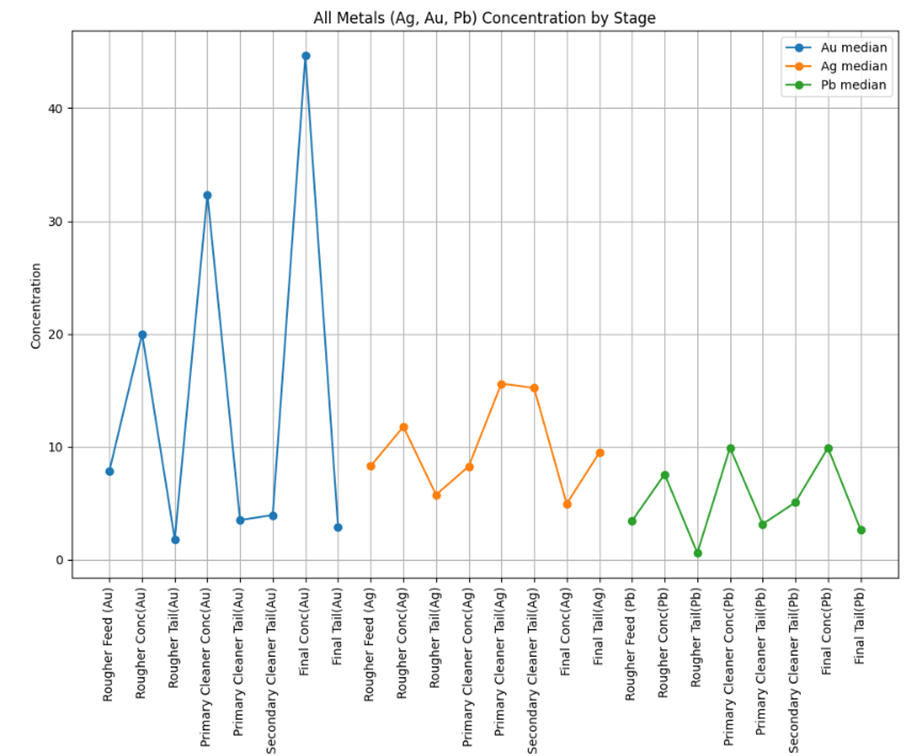

---
**Distribution Summary by Metal Type**

| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| GOLD: Rougher Feed | 7.88 | 7.57 | 3.03 | 0.00 | 14.09 | Baseline input |
| GOLD: Rougher Concentrate | 20.00 | 17.88 | 6.79 | 0.00 | 28.82 | 2.5x concentration from feed |
| GOLD: Rougher Tail | 1.81 | 1.82 | 0.70 | 0.02 | 9.69 | Low concentration, good separation |
| GOLD: Primary Cleaner Concentrate | 32.36 | 29.21 | 10.54 | 0.00 | 45.93 | Highest variance (±10.54) |
| GOLD: Primary Cleaner Tail | 3.51 | 3.67 | 1.99 | 0.00 | 18.53 | Moderate loss in tail |
| GOLD: Secondary Cleaner Tail | 3.96 | 4.04 | 2.61 | 0.00 | 26.81 | Higher variance than primary tail |
| GOLD: Final Concentrate | 44.65 | 40.00 | 13.40 | 0.00 | 53.61 | Maximum enrichment achieved (5.7x feed) |
| GOLD: Final Tail | 2.91 | 2.83 | 1.26 | 0.00 | 9.79 | Minimal loss, efficient recovery |
| SILVER: Rougher Feed | 8.30 | 8.07 | 3.13 | 0.00 | 14.87 | Baseline input |
| SILVER: Rougher Concentrate | 11.79 | 10.87 | 4.38 | 0.00 | 24.48 | 1.4x concentration from feed |
| SILVER: Rougher Tail | 5.76 | 5.59 | 1.11 | 0.59 | 12.72 | Higher than Au tail (less efficient separation) |
| SILVER: Primary Cleaner Concentrate | 8.27 | 7.69 | 3.11 | 0.00 | 16.08 | Lower than rougher concentrate (unusual) |
| SILVER: Primary Cleaner Tail | 15.60 | 14.88 | 6.54 | 0.00 | 29.46 | Higher than concentrate (inverted pattern) |
| SILVER: Secondary Cleaner Tail | 15.22 | 13.38 | 5.77 | 0.00 | 23.26 | Similar to primary cleaner tail |
| SILVER: Final Concentrate | 4.95 | 4.78 | 2.03 | 0.00 | 16.00 | Low enrichment (~0.6x feed) |
| SILVER: Final Tail | 9.48 | 8.92 | 3.52 | 0.00 | 19.55 | Higher than concentrate (poor recovery) |
| LEAD: Rougher Feed | 3.43 | 3.31 | 1.45 | 0.00 | 7.14 | Baseline input (lowest of 3 metals) |
| LEAD: Rougher Concentrate | 7.57 | 6.90 | 2.81 | 0.00 | 18.39 | 2.2x concentration from feed |
| LEAD: Rougher Tail | 0.59 | 0.59 | 0.32 | 0.00 | 3.78 | Excellent separation (82% reduction) |
| LEAD: Primary Cleaner Concentrate | 9.92 | 8.92 | 3.71 | 0.00 | 17.08 | Further enrichment to 3x feed |
| LEAD: Primary Cleaner Tail | 3.15 | 3.18 | 1.65 | 0.00 | 9.63 | Moderate loss in tail |
| LEAD: Secondary Cleaner Tail | 5.07 | 5.30 | 3.09 | 0.00 | 17.04 | Higher than primary tail |
| LEAD: Final Concentrate | 9.91 | 9.10 | 3.23 | 0.00 | 17.03 | Maximum enrichment (2.9x feed) |
| LEAD: Final Tail | 2.65 | 2.49 | 1.19 | 0.00 | 6.09 | Low loss, good overall recovery |

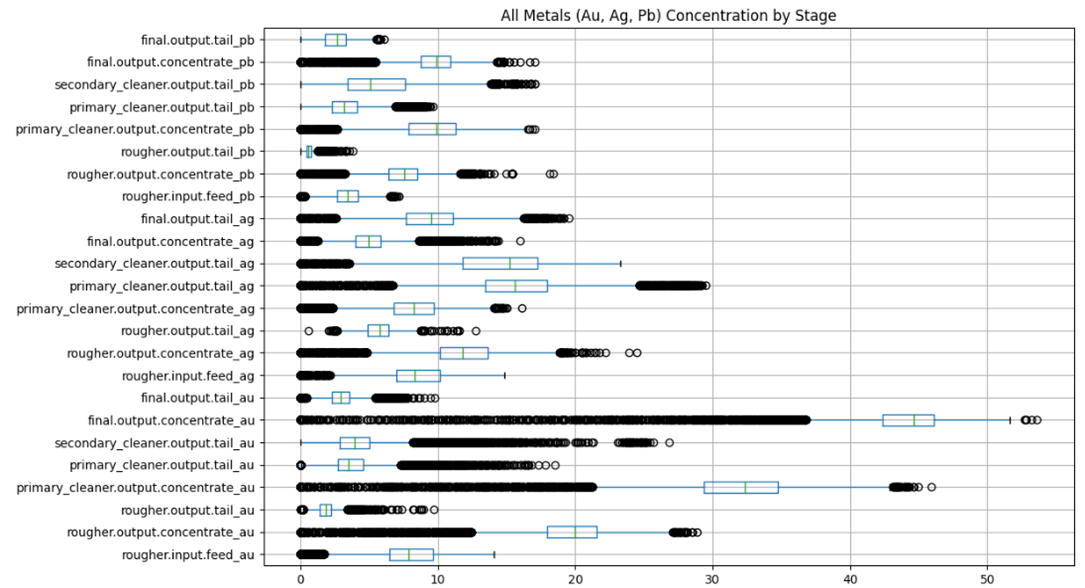


**Gold (Au)**
- Correct overall concentration pattern (feed → concentrate → tail).
- Extreme outliers in primary/secondary cleaner and final concentrate stages (up to 53.61).
- High variance (std dev 10–13) indicates fluctuating ore grades or inconsistent separation efficiency.
- Zero values in concentrate stages may signal failed or unrecorded process runs.


**Silver (Ag)**
- Inverted concentration pattern: tails often exceed concentrates (e.g., final tail > final concentrate).
- Indicates potential data labeling issues or silver rejection during gold purification.
- Outliers up to 29.46 and high tail variance (std dev ~6) complicate modeling.

**Lead (Pb)**
- Consistent concentration trend (concentrate > tail) across all stages.
- Moderate outliers in rougher concentrate and secondary cleaner tail (max ~18).
- Lowest relative variance among the three metals.

**Cross-Metal Insights**
- All metals contain zeros — investigate whether these are true values or missing data.
- Gold shows the widest range (0–54), silver 0–29, and lead 0–17 → scaling or log transformation recommended.
- Boxplots confirm: Au has the most extreme outliers, Ag shows structural anomalies, and Pb is most stable.

**Recommendations**
- Investigate zero values for potential data or process errors.
- Validate silver data — inverted trends likely indicate mislabeling or intentional rejection.
- Apply robust scaling or log transforms to handle wide value ranges and outliers.
- Flag abnormal tails (e.g., Au secondary cleaner tail) as potential inefficiencies.


## Original Dataset Vs. Imputed Dataset: Outlier Analysis and Distribution Summary

| Metal | Original Median | Imputed Median| Original Mean | Imputed Mean | Original Std | Imputed Std | Original Min | Imputed Min | Original Max | Imputed Max| Notes |
|--------|----------------|---------------|---------------|---------------|---------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Au (Gold) | 7.88 | 7.77 | 7.57 | 8.01 | 3.03 | 1.94 | 0.00 | 0.01 | 14.09 | 13.90 | Less spread and no zeros after imputation — good |
| Ag (Silver) | 8.30 | 8.28 | 8.07 | 8.71 | 3.13 | 1.98 | 0.00 | 0.01 | 14.87 | 14.6 | Same pattern — realistic floor now |
| Pb (Lead) | 3.43 | 3.47 | 3.31 | 3.57 | 1.45 | 1.11 | 0.00 | 0.01 | 7.14| 7.14 | Minor tightening — variance reduced |

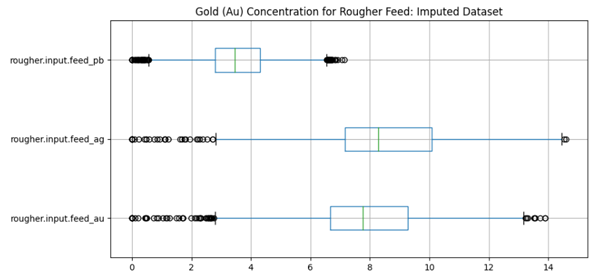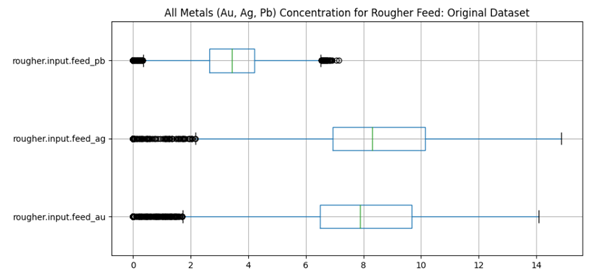

**Conclusion**

The rougher feed concentrations of Au, Ag, and Pb were compared between the original and imputed datasets. The original data contained several zeros, likely due to missing sensor readings. After imputation, the minimum values increased to 0.01, standard deviations decreased slightly, and overall means remained consistent — indicating improved data integrity without distorting the underlying distributions. Outliers were retained, as they likely reflect genuine variations in ore composition rather than measurement errors.

## Feed_Size Distribution: Train Vs. Test

| Dataset      | Train Mean | Test Mean | Train Median | Test Median | Std Diff | Notes                                              |
| ------------ | ---------- | --------- | ------------ | ----------- | -------- | -------------------------------------------------- |
| **Original** | 58.68      | 55.94     | 54.10        | 50.00       | +1.2     | More “natural,” small realistic difference   |
| **Imputed**  | 59.92      | 55.93     | 55.25        | 50.11       | +0.3     | Slightly higher mean in train, but similar pattern |

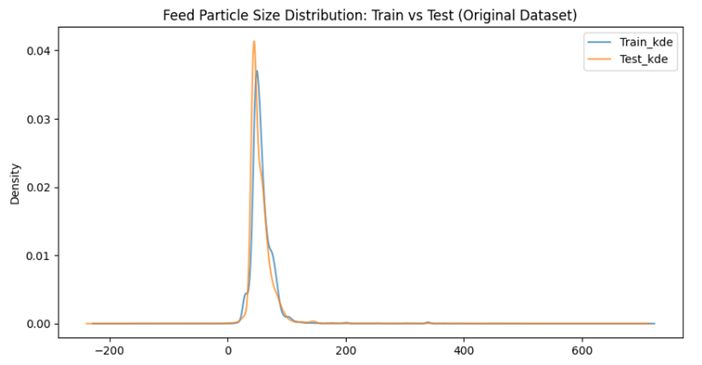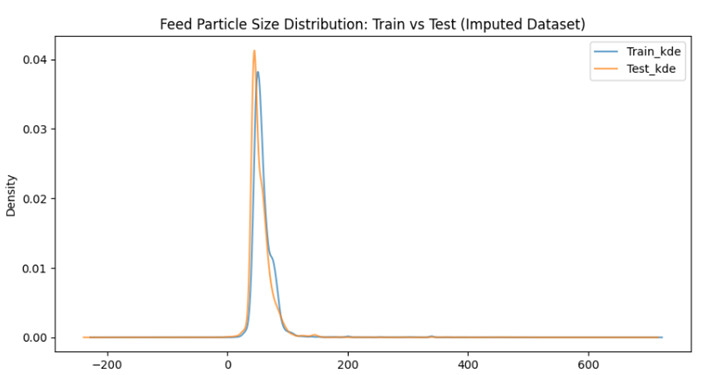

**Conclusion**

Both the original and imputed datasets were evaluated for feed size distribution consistency between the training and test sets.
The original dataset shows slightly more natural variation, while imputation slightly increases the mean feed size in the training set due to smoothing of missing values.
However, both datasets maintain comparable distribution shapes and ranges, confirming that train–test distributions are sufficiently aligned for model evaluation.


## Total Concentration Comparison: Original vs Imputed

| Stage | Dataset | Count | Mean | Std Dev | Min | 25% | 50% (Median) | 75% | Max |
|-------|---------|-------|------|---------|-----|-----|---------------|-----|-----|
| Feed | Original | 22,471 | 18.99 | 7.30 | 0.00 | 16.55 | 19.63 | 23.62 | 35.07 |
| Feed | Imputed | 14,336 | 20.29 | 4.59 | 0.03 | 17.00 | 19.44 | 23.09 | 34.83 |
| Rougher Concentrate | Original | 22,618 | 35.65 | 13.22 | 0.00 | 37.38 | 39.98 | 42.19 | 55.57 |
| Final Concentrate | Original | 22,627 | 53.88 | 17.70 | 0.00 | 58.71 | 60.08 | 60.99 | 65.58 |

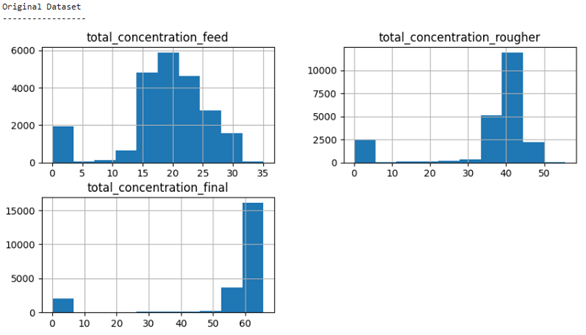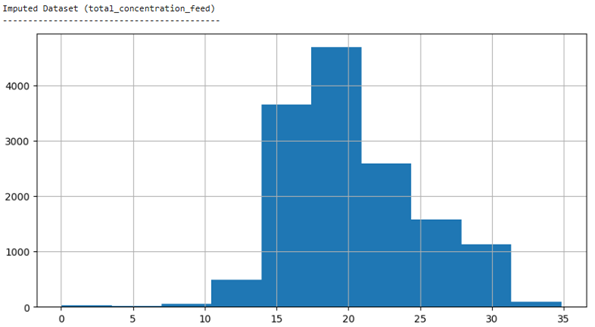

**Key Observations:**  
1. **Zeros removed after imputation**: The feed stage now has a minimum of 0.03 vs 0 in the original dataset.  
2. **Tighter distribution**: Standard deviation decreased in the imputed feed, indicating less extreme spread.  
3. **Mean values largely consistent**: No major distortion occurred due to imputation.  
4. **Rougher and final stages in the original dataset** contain zeros; these were not imputed because they won’t be used for modeling, but they show anomalous sensor readings or measurement errors.  
5. **Imputed feed data** is more reliable for modeling and avoids artificial spikes or zeros.


## sMAPE Analysis


| Model                 | Final sMAPE (%) | Interpretation                                                                                                                        |
| :-------------------- | :-------------: | :------------------------------------------------------------------------------------------------------------------------------------ |
| **Linear Regression** |    **14.64**    | Achieved strong predictive accuracy, indicating relatively low average percentage error between predicted and actual recovery values. |
| **Decision Tree**     |    **22.48**    | Performed noticeably worse than other models, suggesting higher variance or overfitting to the training data.                         |
| **Random Forest**     |    **14.30**    | Produced the lowest sMAPE, very close to Linear Regression, indicating robust and reliable performance. 

---

**Conclusion**

Model evaluation using the final sMAPE metric showed that both Linear Regression and Random Forest achieved strong and nearly identical predictive performance, with error rates around 14.3%. In comparison, the Decision Tree model produced a higher sMAPE of 22.5%, indicating less accurate predictions and potential overfitting.

Since the difference between Linear Regression and Random Forest is negligible, both models will be carried forward for further testing and comparison. This approach ensures that the final selection balances predictive accuracy, computational efficiency, and model interpretability.

## Cross-Validation Analysis

|**Cross-Validation Results (5-Fold MAE)**|
|--------------------|

| Model               | Average Cross-Validation MAE |
|--------------------|-----------------------------|
| Random Forest       | 6.26                        |
| Linear Regression   | 6.86                        |
| Decision Tree       | N/A (not tested / worse)    |

---

**Conclusion**

The predictive performance of different models was evaluated using both sMAPE and 5-fold cross-validation with mean absolute error.

Random Forest: Produced the lowest sMAPE (14.30%) and the lowest average cross-validation MAE (6.26), indicating strong predictive accuracy and robustness.

Linear Regression: Achieved similar performance, with slightly higher sMAPE (14.64%) and MAE (6.86), suggesting it is also a reliable model, though marginally less accurate than Random Forest.

Decision Tree: Performed noticeably worse, with higher sMAPE (22.48%), indicating higher variance and overfitting risk.

Overall, Random Forest is the top-performing model, though Linear Regression remains a strong alternative. Decision Tree is not recommended due to its comparatively poorer accuracy.

## Final Model Evaluation: Random Forest on True Test Set

The Random Forest model was evaluated on the complete test set with true target values and optimized through hyperparameter tuning.

---

**Model Performance Progression**

| Stage | Model Configuration | Final sMAPE (%) | Rougher MAE | Final MAE | Key Improvement |
|-------|---------------------|-----------------|-------------|-----------|-----------------|
| **Initial Baseline** | Default Random Forest | 14.30% | 6.26 | 6.86 | Cross-validation results |
| **True Test Set** | Default Random Forest | 12.28% | - | - | -2.02pp improvement on real data |
| **Hypertuned Model** | max_depth=5, n_estimators=100 | **11.48%** | **6.78** | **5.51** | -0.80pp final improvement |

**Hyperparameter Tuning Results**

|**Optimal parameters identified through GridSearchCV (5-fold):**|
|--------------|

| Target Variable | Best max_depth | Best n_estimators | Cross-Validation MAE |
|-----------------|----------------|-------------------|---------------------|
| **Final Output Recovery** | 5 | 100 | 5.51 |
| **Rougher Output Recovery** | 5 | 100 | 6.78 |

**Sample Predictions on Test Set**

|**First 10 predictions demonstrate model output range:**|
|--------------|

| Prediction # | Final Output Recovery (%) | Rougher Output Recovery (%) |
|--------------|--------------------------|----------------------------|
| 1 | 67.82 | 89.33 |
| 2 | 68.36 | 85.24 |
| 3 | 68.15 | 86.05 |
| 4 | 67.68 | 84.58 |
| 5 | 69.04 | 88.14 |
| 6 | 68.95 | 86.42 |
| 7 | 66.83 | 74.78 |
| 8 | 65.07 | 73.43 |
| 9 | 65.69 | 69.31 |
| 10 | 65.81 | 75.36 |

---

**Conclusion**

The hypertuned Random Forest model achieves a final sMAPE of **11.48%** on the true test set, representing a 2.82 percentage point improvement from the initial baseline (19.7% relative error reduction). The optimal configuration (max_depth=5, n_estimators=100) balances model complexity with ensemble strength, providing reliable predictions for gold recovery optimization with approximately 11.5% average error.

# Supplemental Information

## MAE Calculation & Rougher Recovery (Training Set)


<u>Formula Accuracy Check</u>

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **Mean Absolute Error (MAE)** | 9.3e-15 | ~0% - Formula perfectly matches target values |
| **Values that differ** | 0 | All differences are floating-point rounding errors |
| **Values differing by > 1e-20** | 0 | Confirms perfect formula-target alignment |

<u>Dataset Overview</u>

| Category | Count | Percentage | Notes |
|----------|--------|------------|-------|
| **Total training rows** | 16,860 | 100% | Complete dataset size |
| **Valid formula results** | 14,287 | 84.7% | Rows where formula could be calculated |
| **NaN in formula results** | 2,283 | 13.5% | Due to missing required input columns |
| **NaN in target values** | 2,573 | 15.3% | Missing measurements in dataset |
| **Rows after dropping NaNs** | 14,287 | 84.7% | Final comparison dataset |

**Key Findings:**

| Finding | Status | Impact |
|---------|--------|---------|
| **Formula Accuracy** | ✅ Perfect | Known formula perfectly reproduces target values |
| **Data Coverage** | ⚠️ Good | 84.7% of data usable for comparison |
| **Missing Data Pattern** | ℹ️ Expected | NaN values are typical in industrial datasets |
| **Formula Reliability** | ✅ Excellent | Zero meaningful calculation errors detected |

---

**Summary**: The known formula demonstrates perfect accuracy when applied to the feature columns, with calculated values matching the target column within floating-point precision. This validates both the formula correctness and data quality for 84.7% of the dataset.

## Features NOT in the Test Set (34 Total):

| Features | Parameter | Notes |
|----------|-----------|-------|
| final.output.concentrate_ag | Output | Final concentrate silver |
| final.output.concentrate_au | Output | Final concentrate gold |
| final.output.concentrate_pb | Output | Final concentrate lead |
| final.output.concentrate_sol | Output | Final concentrate solid |
| final.output.recovery | Target | Final recovery target |
| final.output.tail_ag | Output | Final tailings silver |
| final.output.tail_au | Output | Final tailings gold |
| final.output.tail_pb | Output | Final tailings lead |
| final.output.tail_sol | Output | Final tailings solid |
| primary_cleaner.output.concentrate_ag | Output | Primary cleaner concentrate silver |
| primary_cleaner.output.concentrate_au | Output | Primary cleaner concentrate gold |
| primary_cleaner.output.concentrate_pb | Output | Primary cleaner concentrate lead |
| primary_cleaner.output.concentrate_sol | Output | Primary cleaner concentrate solid |
| primary_cleaner.output.tail_ag | Output | Primary cleaner tailings silver |
| primary_cleaner.output.tail_au | Output | Primary cleaner tailings gold |
| primary_cleaner.output.tail_pb | Output | Primary cleaner tailings lead |
| primary_cleaner.output.tail_sol | Output | Primary cleaner tailings solid |
| rougher.calculation.au_pb_ratio | Calculations | Gold to lead ratio (data leakage) |
| rougher.calculation.floatbank10_sulfate_to_au_feed | Calculations | Floatbank10 sulfate to gold feed ratio (data leakage) |
| rougher.calculation.floatbank11_sulfate_to_au_feed | Calculations | Floatbank11 sulfate to gold feed ratio (data leakage) |
| rougher.calculation.sulfate_to_au_concentrate | Calculations | Sulfate to gold ratio (data leakage) |
| rougher.output.concentrate_ag | Output | Rougher concentrate silver |
| rougher.output.concentrate_au | Output | Rougher concentrate gold |
| rougher.output.concentrate_pb | Output | Rougher concentrate lead |
| rougher.output.concentrate_sol | Output | Rougher concentrate solid |
| rougher.output.recovery | Target | Rougher recovery target |
| rougher.output.tail_ag | Output | Rougher tailings silver |
| rougher.output.tail_au | Output | Rougher tailings gold |
| rougher.output.tail_pb | Output | Rougher tailings lead |
| rougher.output.tail_sol | Output | Rougher tailings solid |
| secondary_cleaner.output.tail_ag | Output | Secondary cleaner tailings silver |
| secondary_cleaner.output.tail_au | Output | Secondary cleaner tailings gold |
| secondary_cleaner.output.tail_pb | Output | Secondary cleaner tailings lead |
| secondary_cleaner.output.tail_sol | Output | Secondary cleaner tailings solid |


**Summary by Parameter Type:**

| Parameter Type | Count | Reason for Exclusion |
|----------------|-------|---------------------|
| **Output** | 28 | Features only known after processing, not available at prediction time |
| **Target** | 2 | Used for stage-specific predictions |
| **Calculations** | 4 | Dependent on outputs/targets → potential data leakage |


**Note:** All features are of Float data type.

## Missing Values Overview (≥ 1%)

**1% - < 5% Missing Data**

|Shared (Full / Train / Test)|
|----------------------------|

| Feature | Full % | Train % | Test % |
|---------|--------|---------|--------|
| rougher.input.feed_sol | 1.580 | 1.732 | 1.148 |
| rougher.input.floatbank10_xanthate | 2.065 | 2.052 | 2.108 |

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| final.output.concentrate_sol | 1.695 | 2.195 |
| primary_cleaner.output.concentrate_pb | 1.972 | 2.123 |
| primary_cleaner.output.concentrate_sol | 3.513 | 3.772 |
| primary_cleaner.output.tail_sol | 1.545 | 1.667 |
| rougher.input.feed_pb | 1.074 | 1.352 |
| rougher.input.feed_rate | 2.434 | 3.043 |
| rougher.input.feed_size | 1.933 | 2.473 |
| rougher.input.floatbank11_sulfate | 2.985 | 3.695 |
| rougher.state.floatbank10_e_air | 2.729 | 3.577 |
| secondary_cleaner.state.floatbank2_a_air | 1.686 | 2.153 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | final.output.tail_sol | 1.193 |
| **Train Only** | final.output.tail_pb | 1.085 |
| **Test Only** | primary_cleaner.input.depressant | 4.866 |
| **Test Only** | primary_cleaner.input.xanthate | 2.844 |
| **Test Only** | rougher.input.floatbank10_sulfate | 4.404 |

**5% - < 10% Missing Data**

|Shared (Full / Train / Test)|
|----------------------------|

| Feature | Full % | Train % | Test % |
|---------|--------|---------|--------|
| primary_cleaner.input.sulfate | 7.083 | 7.752 | 5.175 |

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| final.output.recovery | 8.641 | 9.021 |
| primary_cleaner.input.depressant | 6.806 | 7.485 |
| primary_cleaner.input.xanthate | 5.067 | 5.842 |
| rougher.calculation.au_pb_ratio | 7.162 | 7.367 |
| rougher.input.floatbank10_sulfate | 5.727 | 6.192 |

|Full & Test Only|
|----------------|

| Feature | Full % | Test % |
|---------|--------|--------|
| rougher.input.floatbank11_xanthate | 9.936 | 6.049 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | secondary_cleaner.output.tail_sol | 9.751 |

**10% - < 15% Missing Data**

|Full & Train Only|
|-----------------|

| Feature | Full % | Train % |
|---------|--------|---------|
| rougher.output.tail_ag | 12.049 | 13.345 |
| rougher.output.tail_sol | 12.044 | 13.339 |
| rougher.output.tail_au | 12.044 | 13.339 |

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Full Only** | rougher.output.recovery | 13.730 |
| **Train Only** | rougher.input.floatbank11_xanthate | 11.293 |
| **Train Only** | secondary_cleaner.output.tail_sol | 11.779 |

**≥ 15% Missing Data**

|Dataset-Specific Features|
|-------------------------|

| Category | Feature | Percentage |
|----------|---------|------------|
| **Train Only** | rougher.output.recovery | 15.261 |

---

**Summary Statistics**

| Dataset | Total Features | Features with Missing Data | Complete Features |
|---------|---------------|----------------------------|-------------------|
| **Full Dataset** | 87 | 85 | 2 |
| **Training Set** | 87 | 85 | 2 |
| **Test Set** | 53 | 51 | 2 |

**Dataset Comparison Summary**

| Missing bins    | All | Full | Train | Test | Full + Train | Full + Test |
| --------------- | --- | ---- | ----- | ---- | ------------ | ----------- |
| **< 1%**        | 40  | 1    | 1     | 6    | 21           | –           |
| **1 – < 5%**    | 2   | 1    | 1     | 3    | 10           | –           |
| **5 – < 10%**   | 1   | 1    | –     | –    | 5            | 1           |
| **10 – < 15%**  | –   | 1    | 2     | –    | 3            | –           |
| **≥ 15%**       | –   | –    | –     | 1    | –            | –           |
| **Total**       | 43  | 4    | 5     | 9    | 39           | 1           |


| Missing Data Level | Full Dataset | Training Dataset | Test Dataset |
|--------------------|--------------|------------------|--------------|
| **< 1%** | 62 (71.26%) features | 62 (71.26%) features | 45 (84.91%) features |
| **1% - < 5%** | 14 (16.10%) features | 14 (16.10%) features | (9.43%) 5 features |
| **5% - < 10%** | 7 (8.05%) features | 5 (5.75%) features | 2 (3.77%) features |
| **10% - < 15%** | 4 (4.60%) features | 5 (5.75%) features | 0 (0%) features |
| **≥ 15%** | 0 (0%) features | 1 (1.15%) feature | 0 (0%) features |
| **Total with Missing Data** | 87 features | 87 features | 53 features |


<u>General Threshold Meaning</u>
- **< 1%** : Negligible (Imputaion almost never necessary)
- **1 - < 5%** : Minor (Imputation sometimes necessary)
- **5 - < 10%** : Intermediate (Imputation usually necessary)
- **10 - < 15%** : High (Imputation often necessary)
- **≥ 15%** : Extremely High (Imputation almost always necessary)

**Key Insights:**
- Test dataset appears cleaner because it excludes 34 output/target/calculation features, which are the primary source of high missingness in the Full and Training sets.
- Shared features show similar data quality across datasets, with the Test set sometimes performing slightly better on input features.
- Training dataset reveals the full scope of missing data, including the most problematic target feature (rougher.output.recovery, 15.26% missing).
- Output and calculation features consistently drive higher missing rates, while predictor (input) features remain relatively complete.
- Excluded features explain most severe missing data issues, confirming that the Test set is intentionally designed for clean model evaluation.

**Distribution of Missing Values**
- Negligible (< 1%): Full & Train ~71% of features; Test ~85% → most data is very clean.
- Moderate (1–<10%): Full: ~24% (21); Train: ~22% (19); Test: ~13% (7) → mostly input features; manageable with simple imputation.
- Severe (≥ 10%): Full: ~5% (4 features), Train: ~7% (6 features) → all outputs/calculations. Test: (N/A) → explains clean profile.

**Modeling Impact**
- Predictor features: Low missingness (< 5%) → imputation straightforward and unlikely to distort results.
- Target/output features: Higher missingness but not used for prediction → no direct risk to training or model reliability.


## Missing Data Summary - Side-by-Side Comparison (Target NaN's removed)

**Dataset Overview**

| Metric | Training Dataset | Full Dataset |
|--------|------------------|--------------|
| **Missing `final.output.recovery` values** | 1,521 | 1,963 |
| **Rows (no NaN values)** | 15,339 | 20,753 |
| **Data Removed** | 9.06% | 8.64% |

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**

| Rank | Training Dataset | % Missing | Full Dataset | % Missing | Difference |
|------|------------------|-----------|--------------|-----------|------------|
| 1 | secondary_cleaner.output.tail_sol | ~11.6% | " " | ~9.4% | Training +2.2% |
| 2 | rougher.output.recovery | ~7.8% | " " | ~6.3% | Training +1.5% |
| 3 | rougher.output.tail_ag | ~6.3% | " " | ~5.1% | Training +1.2% |
| 4 | rougher.output.tail_sol | ~6.3% | " " | ~5.1% | Training +1.2% |
| 5 | rougher.output.tail_au | ~6.3% | " " | ~5.1% | Training +1.2% |
| 6 | rougher.input.floatbank11_xanthate | ~5.1% | " " | ~3.9% | Training +1.2% |
| 7 | rougher.state.floatbank10_e_air | ~3.5% | " " | ~2.6% | Training +0.9% |
| 8 | primary_cleaner.output.concentrate_sol | ~2.7% | " " | ~2.5% | Training +0.2% |
| 9 | primary_cleaner.input.sulfate | ~2.5% | " " | ~1.9% | Training +0.6% |
| 10 | rougher.input.floatbank10_sulfate | ~2.4% | " " | ~1.8% | Training +0.6% |
| 11 | rougher.input.floatbank11_sulfate | ~2.3% | " " | ~1.8% | Training +0.5% |
| 12 | primary_cleaner.input.xanthate | ~1.8% | " " | ~1.4% | Training +0.4% |
| 13 | final.output.concentrate_sol | ~1.7% | " " | ~1.3% | Training +0.4% |
| 14 | primary_cleaner.input.depressant | ~1.7% | " " | ~1.3% | Training +0.4% |
| 15 | secondary_cleaner.state.floatbank2_a_air | ~1.5% | " " | ~1.1% | Training +0.4% |
| 16 | rougher.input.feed_rate | ~1.4% | " " | ~1.1% | Training +0.3% |
| 17 | primary_cleaner.output.concentrate_pb | ~1.0% | *Not in ≥1% list* | <1.0% | Training only |

**Key Patterns**

<u>Missing Data Severity</u>
- **Training dataset consistently shows higher missing data rates** across all comparable features
- **Differences range from +0.2% to +2.2%** with Training having more missing data
- **Training dataset has one additional feature** (primary_cleaner.output.concentrate_pb) with ≥1% missing data

<u>Feature Categories</u>
- **Output/Target features** show the highest missing rates in both datasets:
  - secondary_cleaner.output.tail_sol (highest in both)
  - rougher.output.* features (consistently problematic)
- **Input features** generally have lower missing rates:
  - rougher.input.* and primary_cleaner.input.* features typically <3%
- **State features** have minimal missing data (mostly <1%)

<u>Data Quality Impact</u>
- **Training dataset loses slightly more data** (9.06% vs 8.64%) when cleaning
- **Both datasets maintain ~85-91% usable data** after removing NaN values
- **Output features drive most data loss** - these are excluded in prediction tasks anyway

## Missing Data Analysis - Cleaned Datasets

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**
*After removing output/calculation columns and final.output.recovery NaN values*

| Feature | Training Count | Training % | Full Count | Full % | Difference |
|---------|----------------|------------|------------|--------|------------|
| rougher.input.floatbank11_xanthate | 779 | 5.08% | 812 | 3.91% | Training +1.17% |
| rougher.state.floatbank10_e_air | 532 | 3.47% | 532 | 2.56% | Training +0.91% |
| primary_cleaner.input.sulfate | 381 | 2.48% | 388 | 1.87% | Training +0.61% |
| rougher.input.floatbank10_sulfate | 375 | 2.44% | 380 | 1.83% | Training +0.61% |
| rougher.input.floatbank11_sulfate | 357 | 2.33% | 368 | 1.77% | Training +0.56% |
| primary_cleaner.input.xanthate | 276 | 1.80% | 282 | 1.36% | Training +0.44% |
| primary_cleaner.input.depressant | 257 | 1.68% | 263 | 1.27% | Training +0.41% |
| secondary_cleaner.state.floatbank2_a_air | 230 | 1.50% | 233 | 1.12% | Training +0.38% |
| rougher.input.feed_rate | 218 | 1.42% | 221 | 1.06% | Training +0.36% |

---

**Conclusion Summary**

**After cleaning the data, only 9 features have missing data issues that need attention.** These are all input features required for making predictions, with missing rates between 1-5%. The Training dataset consistently has more missing data than the Full dataset across all features.

**The biggest problem is rougher.input.floatbank11_xanthate** (5% missing in Training vs 4% in Full). The remaining 8 features have smaller but consistent gaps that will need proper handling during model preparation.

**This is manageable but requires planning.** Simple deletion isn't appropriate with these missing rates, so imputation strategies will be needed. We've now identified exactly what needs fixing for successful model training.

## Missing Data Analysis - Updated Cleaned Datasets

**Features with ≥ 1% Missing Data - Side-by-Side Comparison**

*After removing output/calculation columns, final.output.recovery NaN values, AND features with <1% missing data*

**Dataset Overview**
- **Training Dataset:** 14,855 rows (after all cleaning)
- **Full Dataset:** 20,226 rows (after all cleaning)

| Feature | Training Count | Training % | Full Count | Full % | Difference |
|---------|----------------|------------|------------|--------|------------|
| rougher.input.floatbank11_xanthate | 654 | 4.40% | 684 | 3.38% | Training +1.02% |
| rougher.state.floatbank10_e_air | 508 | 3.42% | 508 | 2.51% | Training +0.91% |
| rougher.input.floatbank11_sulfate | 262 | 1.76% | 272 | 1.34% | Training +0.42% |
| primary_cleaner.input.sulfate | 259 | 1.74% | 263 | 1.30% | Training +0.44% |
| rougher.input.floatbank10_sulfate | 259 | 1.74% | 261 | 1.29% | Training +0.45% |
| secondary_cleaner.state.floatbank2_a_air | 220 | 1.48% | 223 | 1.10% | Training +0.38% |
| primary_cleaner.input.xanthate | 190 | 1.28% | 193 | 0.95% | Training +0.33% |
| primary_cleaner.input.depressant | 189 | 1.27% | 193 | 0.95% | Training +0.32% |
| rougher.input.feed_rate | 183 | 1.23% | 185 | 0.91% | Training +0.32% |

---

**Conclusion**

**Final scope: exactly 9 features need missing data attention.** After aggressive cleaning, these are the only features with meaningful missing data gaps. Training dataset consistently shows 0.32-1.02% higher missing rates than Full dataset.

**Rougher.input.floatbank11_xanthate remains the main challenge at 4.4% missing** - everything else is under 2%. Standard imputation will handle this easily. 

## Xanthate Difference Analysis: rougher.input.floatbank##_xanthate

**Distribution**: The data appears roughly normally distributed with a slight right skew, centered around 6-7

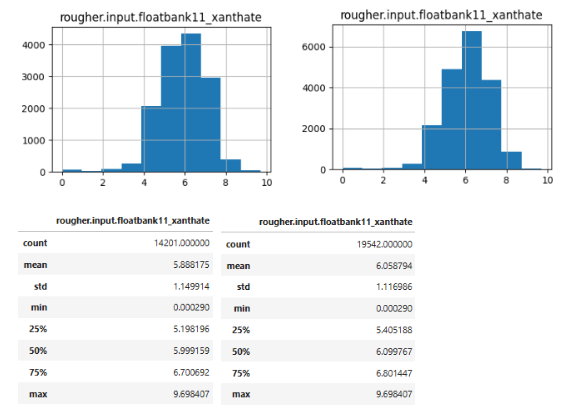

**After Imputation**

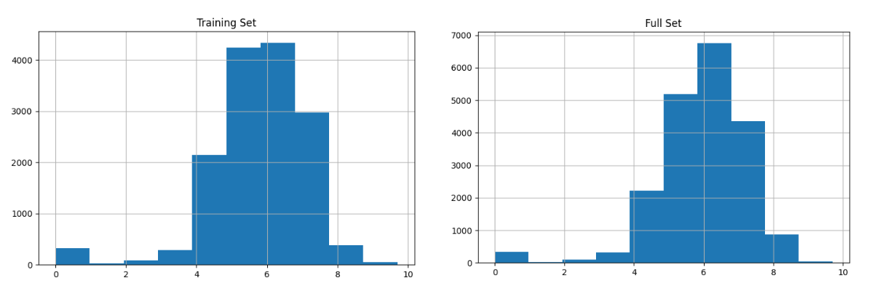

**Statistical Summary by Difference Groups**

*xanthate_difference = rougher.input.floatbank10_xanthate - rougher.input.floatbank11_xanthate*

| Group Category | Variable | Median | Mean | Range |
|----------------|----------|--------|------|-------|
| **< -1 (174 observations)** | | | | |
| | floatbank10_xanthate | 6.243 | 4.438 | 0.001 - 7.625 |
| | floatbank11_xanthate | 7.494 | 6.770 | 1.482 - 8.834 |
| | xanthate_difference | -1.416 | -2.333 | -8.005 - -1.001 |
| **> 1 (93 observations)** | | | | |
| | floatbank10_xanthate | 5.781 | 5.703 | 3.109 - 8.036 |
| | floatbank11_xanthate | 1.931 | 2.413 | 0.000 - 6.318 |
| | xanthate_difference | 3.204 | 3.290 | 1.026 - 7.576 |
| **0 to 1 (6,850 observations)** | | | | |
| | floatbank10_xanthate | 6.000 | 5.908 | 0.004 - 9.703 |
| | floatbank11_xanthate | 5.998 | 5.898 | 0.002 - 9.698 |
| | xanthate_difference | 0.002 | 0.010 | 0.000 - 0.953 |
| **-1 to 0 (7,084 observations)** | | | | |
| | floatbank10_xanthate | 5.995 | 5.858 | 0.001 - 9.655 |
| | floatbank11_xanthate | 6.000 | 5.902 | 0.001 - 9.667 |
| | xanthate_difference | -0.002 | -0.044 | -1.000 - 0.000 |
| **ALL (14,201 observations)** | | | | |
| | floatbank10_xanthate | 5.998 | 5.864 | 0.001 - 9.703 |
| | floatbank11_xanthate | 5.999 | 5.888 | 0.000 - 9.698 |
| | xanthate_difference | -0.000 | -0.024 | -8.005 - 7.586 |


---

**Key Observations**

- **Most observations fall within small differences**: 13,934 out of 14,201 total observations (98.1%) have differences between -1 and +1
- **Extreme negative differences are more common**: 174 observations with differences < -1 vs 93 observations with differences > +1  
- **Near-equilibrium groups dominate**: The "0 to 1" and "-1 to 0" groups contain the vast majority of data points
- **Overall dataset shows slight negative bias**: The complete dataset has a mean difference of -0.024, indicating floatbank11_xanthate is slightly higher on average than floatbank10_xanthate
- **Median values are nearly identical across floatbanks**: Overall medians of 5.998 vs 5.999 show the datasets are well-balanced at the center
- **Largest extreme difference**: -8.005 in the "< -1" group, with maximum positive difference of 7.586
- - **Training Dataset Difference Median**: -0.000087
- **Full Dataset Difference Median**: -0.000075
- **Training and Full Median Difference**: 0.000012

**Conclusion**

Given that the median difference between `rougher.input.floatbank10_xanthate` and `rougher.input.floatbank11_xanthate` is approximately 0 (-0.000075), and most observations (98.1%) fall within small differences, imputing missing floatbank11 values using the corresponding floatbank10 values (i.e., floatbank11 = floatbank10) appears reasonable. However, this assumes missing values follow the same near-equilibrium pattern as the majority of the data. This should give the most accurate representation for our model.

The median difference for the Training Set (-0.000075) and Full Set (-0.000087) are virtually the same at 0 (0.000012), validating our imputation approach. Moreover, when observing the datsets after imputation, you see that the Full Dataset changed less than the Training Dataset; this further demonstrates the accuracy of our imputation strategy.

## Floatbank Air Difference Analysis (fb10_e_air & fb10_f_air) - Detailed Breakdown**

*Filtered for floatbank10_f_air between 844-856 to focus on normal operating range for imputation*

**Before Imputation**

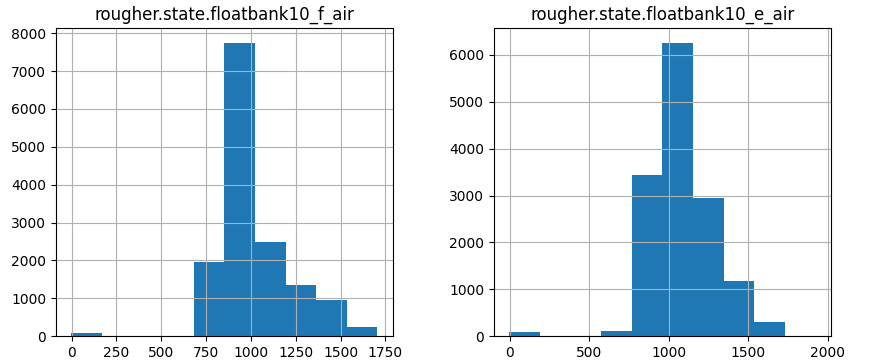

**After Imputation**

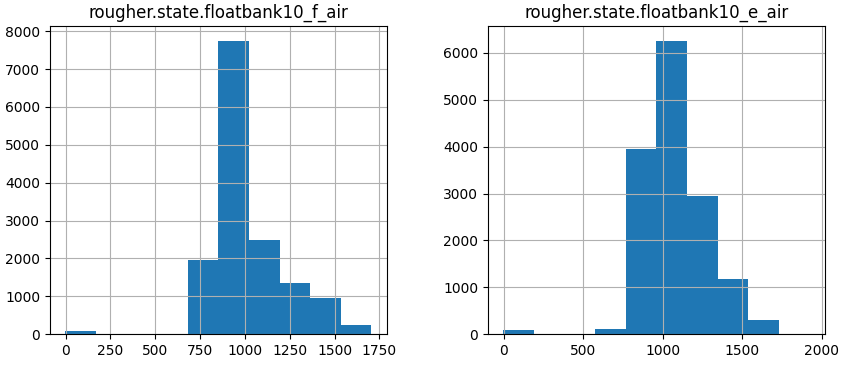

**Overall Difference Metrics**: f between 844-856


| Metric | Value |
|--------|-------|
| **Length** | 1,060 |
| **Median** | 0.031 |
| **Mean** | -25.269 |
| **Std** | 129.603 |
| **Min** | -1,072.173 |
| **Max** | 302.433 |

---

**Categorical Breakdown by Difference Groups**: f between 844-856

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Difference F > 5 (2 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 560.396 | 560.396 | 547.540 | 573.253 |
| | floatbank10_f_air | 850.177 | 850.177 | 849.974 | 850.381 |
| | difference_f | 289.781 | 289.781 | 277.128 | 302.433 |
|  |  |  |  |  |  |
| **Difference F Between 1-5 (27 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.528 | 849.566 | 846.438 | 852.565 |
| | floatbank10_f_air | 850.761 | 850.977 | 848.870 | 854.419 |
| | difference_f | 1.315 | 1.412 | 1.014 | 2.772 |
|  |  |  |  |  |  |
| **Difference F Between 0-1 (257 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.780 | 849.760 | 845.426 | 854.668 |
| | floatbank10_f_air | 850.158 | 850.135 | 845.446 | 855.604 |
| | difference_f | 0.332 | 0.374 | 0.003 | 1.000 |
|  |  |  |  |  |  |
| **Difference F Between -1 to 0 (215 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 850.287 | 850.241 | 845.259 | 853.225 |
| | floatbank10_f_air | 849.857 | 849.874 | 844.795 | 852.897 |
| | difference_f | -0.347 | -0.366 | -1.000 | -0.004 |
|  |  |  |  |  |  |
| **Difference F Between -5 to -1 (24 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 851.440 | 851.520 | 848.338 | 855.630 |
| | floatbank10_f_air | 850.059 | 849.903 | 845.839 | 852.510 |
| | difference_f | -1.301 | -1.617 | -4.910 | -1.008 |
|  |  |  |  |  |  |
| **Difference F Between -50 to -5 (3 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 868.354 | 870.150 | 865.494 | 876.603 |
| | floatbank10_f_air | 850.376 | 851.789 | 850.298 | 854.693 |
| | difference_f | -18.056 | -18.361 | -26.226 | -10.801 |
|  |  |  |  |  |  |
| **Difference F Between -100 to -50 (2 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 907.761 | 907.761 | 904.596 | 910.927 |
| | floatbank10_f_air | 852.104 | 852.104 | 849.955 | 854.253 |
| | difference_f | -55.657 | -55.657 | -60.972 | -50.342 |
|  |  |  |  |  |  |
| **Difference F Between -150 to -100 (0 observations)** |  |  |  |  |  |
| | floatbank10_e_air | N/A | N/A | N/A | N/A |
| | floatbank10_f_air | N/A | N/A | N/A | N/A |
| | difference_f | N/A | N/A | N/A | N/A |
|  |  |  |  |  |  |
| **Difference F Between -220 to -150 (1 observation)** |  |  |  |  |  |
| | floatbank10_e_air | 1,004.413 | 1,004.413 | 1,004.413 | 1,004.413 |
| | floatbank10_f_air | 850.442 | 850.442 | 850.442 | 850.442 |
| | difference_f | -153.971 | -153.971 | -153.971 | -153.971 |
|  |  |  |  |  |  |
| **Difference F < -200 (23 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 1,502.374 | 1,470.636 | 1,097.806 | 1,922.637 |
| | floatbank10_f_air | 849.991 | 849.996 | 849.365 | 850.658 |
| | difference_f | -652.383 | -620.640 | -1,072.173 | -247.191 |

**Overall Difference Metrics**: e between 844-856

| Metric | Value |
|--------|-------|
| **Length** | 523 |
| **Median** | 0.061 |
| **Mean** | 0.032 |
| **Std** | 0.677 |
| **Min** | -4.910 |
| **Max** | 2.772 |

**Categorical Breakdown by Difference Groups**: e between 844-856

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Difference F > 0 (284 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 849.741 | 849.742 | 845.426 | 854.668 |
| | floatbank10_f_air | 850.223 | 850.215 | 845.446 | 855.604 |
| | difference_f | 0.374 | 0.473 | 0.003 | 2.772 |
|  |  |  |  |  |  |
| **Difference F Between -50 to 0 (239 observations)** |  |  |  |  |  |
| | floatbank10_e_air | 850.352 | 850.369 | 845.259 | 855.630 |
| | floatbank10_f_air | 849.879 | 849.877 | 844.795 | 852.897 |
| | difference_f | -0.368 | -0.492 | -4.910 | -0.004 |
|  |  |  |  |  |  |
| **Difference F < -50 (0 observations)** |  |  |  |  |  |
| | floatbank10_e_air | N/A | N/A | N/A | N/A |
| | floatbank10_f_air | N/A | N/A | N/A | N/A |
| | difference_f | N/A | N/A | N/A | N/A |


---

**Key Observations for Imputation Strategy**

Filtered Dataset Results (Both e_air and f_air between 844-856):
- Dataset size reduced: From 1,060 to 523 observations after filtering both variables to normal operating range
- All extreme outlier categories eliminated: No observations in categories beyond -5 to +5 difference range
- Improved statistics: Standard deviation dropped from 129.603 to 0.677, mean shifted from -25.269 to 0.032
- Only normal operating differences remain: 523 observations distributed across -5 to +2.8 range

Distribution in filtered dataset:
- Difference F > 0: 284 observations (54.3%)
- Difference F Between -5 to 0: 239 observations (45.7%)
- All extreme categories (< -5 or > 5): 0 observations

Imputation Strategy Validation:
- Median difference: 0.061 (very close to 0)
- Mean difference: 0.032 (very close to 0)
- Range: -4.91 to +2.77 (all within reasonable sensor variance)

**Conclusion:**

Filtering both variables to the 844-856 range successfully isolates normal operating conditions. The relationship floatbank10_e_air ≈ floatbank10_f_air (difference ≈ 0) is strongly validated for imputation in this range. Using floatbank10_e_air = floatbank10_f_air + 0.06 or simply floatbank10_e_air = floatbank10_f_air is well-justified for missing values within the normal operating range.

Therefore, reasonable to drop the 2 NaN values where f is not in the 844 - 856 range and fill the rest of the floatbank_e_air NaN values to the same values as floatbank_f_air. 

## Sulfate Difference Analysis: rougher.input.floatbank10_sulfate vs floatbank11_sulfate

*sulfate_difference = rougher.input.floatbank10_sulfate - rougher.input.floatbank11_sulfate*

**Before Imputation - Training**

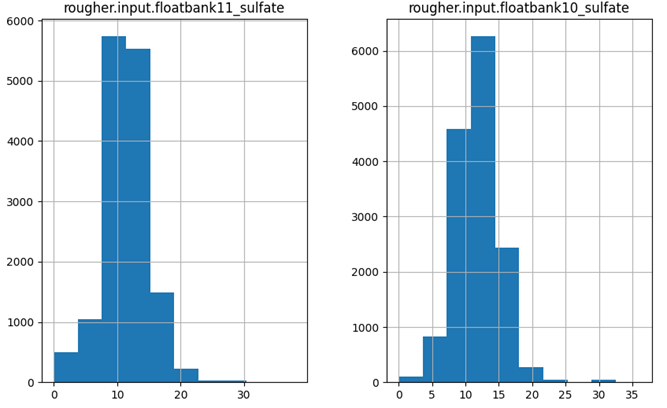

**After Imputation - Training**

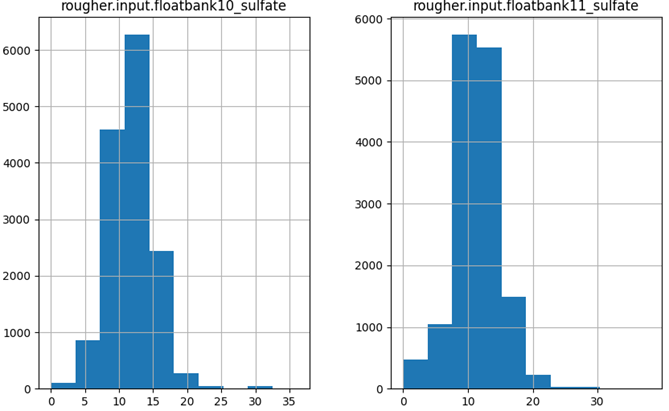

**Overall Dataset Statistics**

| Metric | floatbank10_sulfate | floatbank11_sulfate | sulfate_difference |
|--------|-------------------|-------------------|-------------------|
| **Length** | 14,853 | 14,853 | 14,853 |
| **Median** | 11.708 | 11.414 | 0.000085 |
| **Mean** | 11.763 | 11.389 | 0.360 |
| **Min** | 0.000044 | 0.000049 | -12.978 |
| **Max** | 36.118 | 37.981 | 23.747 |

---

**Categorical Breakdown by Sulfate11 Range and Difference Groups**

| Group Category | Variable | Median | Mean | Min | Max |
|----------------|----------|--------|------|-----|-----|
| **Sulfate11: 5.9-13.1 & Diff > 1 (14 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.686 | 11.223 | 8.495 | 15.744 |
| | floatbank11_sulfate | 8.314 | 8.476 | 6.321 | 11.343 |
| | sulfate_difference | 2.303 | 2.748 | 1.003 | 7.280 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff 0-1 (4,945 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.697 | 10.443 | 5.905 | 13.236 |
| | floatbank11_sulfate | 10.687 | 10.435 | 5.905 | 13.098 |
| | sulfate_difference | 0.002 | 0.008 | 0.000002 | 0.998 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff 0-(-1) (4,966 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 10.629 | 10.436 | 5.914 | 13.095 |
| | floatbank11_sulfate | 10.645 | 10.444 | 5.918 | 13.096 |
| | sulfate_difference | -0.002 | -0.007 | -0.999 | -0.000001 |
|  |  |  |  |  |  |
| **Sulfate11: 5.9-13.1 & Diff < -1 (28 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 5.294 | 4.919 | 0.001 | 11.597 |
| | floatbank11_sulfate | 8.681 | 9.475 | 6.435 | 13.004 |
| | sulfate_difference | -3.120 | -4.556 | -12.978 | -1.002 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff > 1 (402 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 12.999 | 13.014 | 1.240 | 23.748 |
| | floatbank11_sulfate | 0.029 | 0.028 | 0.000086 | 0.241 |
| | sulfate_difference | 12.964 | 12.986 | 1.050 | 23.747 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff 0-1 (10 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 0.043 | 0.307 | 0.001 | 1.352 |
| | floatbank11_sulfate | 0.013 | 0.221 | 0.000049 | 0.961 |
| | sulfate_difference | 0.023 | 0.086 | 0.0002 | 0.391 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff 0-(-1) (11 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | 0.009 | 0.210 | 0.002 | 0.676 |
| | floatbank11_sulfate | 0.159 | 0.321 | 0.004 | 0.830 |
| | sulfate_difference | -0.034 | -0.111 | -0.371 | -0.001 |
|  |  |  |  |  |  |
| **Sulfate11 ≤ 1 & Diff < -1 (0 observations)** |  |  |  |  |  |
| | floatbank10_sulfate | N/A | N/A | N/A | N/A |
| | floatbank11_sulfate | N/A | N/A | N/A | N/A |
| | sulfate_difference | N/A | N/A | N/A | N/A |

---

**Key Observations**

- **Near-equilibrium dominates**: 9,911 out of 14,853 observations (66.7%) fall within the -1 to +1 difference range when sulfate11 is in range (5.9-13.1)
- **Low sulfate11 creates large positive differences**: 402 observations with sulfate11 ≤ 1 show large positive differences (median: 12.964)
- **Extreme negative differences are rare**: Only 28 observations show differences < -1 in the normal sulfate11 range (5.9 - 13.1)
- **Overall relationship is balanced**: Median difference of 0.000085 indicates balance
- **Most data concentrated in range**: The 5.9-13.1 sulfate11 range contains the majority of reliable data with small differences between sensors

**Conclusion**

Can safely input values from `rougher.input.floatbank11_sulfate` when in the range (5.9 - 13.2) into `rougher.input.floatbank10_sulfate`. The remaining 1.5% (222) missing values, from `fb10_sulfate` could potentially be from sensor errors and can be dropped to maintain balance.

## Imputation Strategy for `rougher.input.floatbank10_sulfate`: *for Test Set*

Analysis of the relationship between `rougher.input.floatbank10_sulfate` and `rougher.input.floatbank11_sulfate` reveals two distinct behavioral patterns based on sulfate 11 concentration, enabling accurate conditional imputation for the test set.

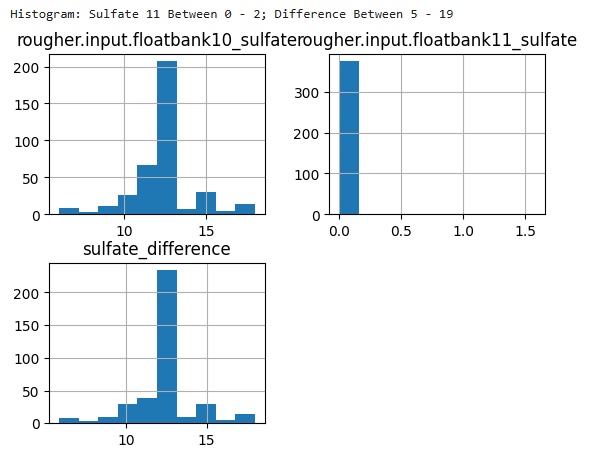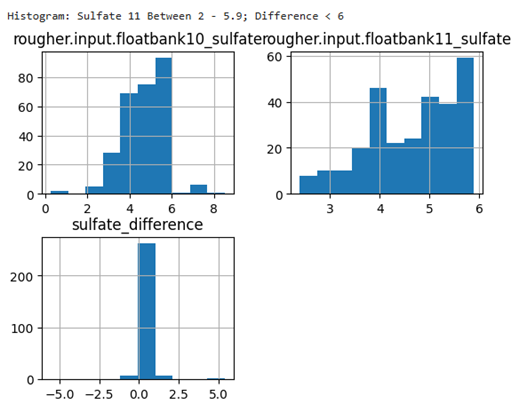

---

**Statistical Comparison**

**Pattern 1: Sulfate 11 Between 2.0 - 5.9 (Near-Perfect Correlation)**

| Metric | floatbank10_sulfate | floatbank11_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 4.87 | 4.84 | 0.00015 | Nearly identical values |
| **Mean** | 4.72 | 4.67 | 0.047 | Minimal systematic bias |
| **Min** | 0.26 | 2.39 | -5.58 | Occasional outliers |
| **Max** | 8.51 | 5.89 | 5.41 | Occasional outliers |

**Observations:** 280/285 (98.2% for this range)


**Pattern 2: Sulfate 11 Between 0.0 - 2.0 (Large Offset)**

| Metric | floatbank10_sulfate | floatbank11_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 12.99 | 0.030 | 12.96 | Consistent +13 offset |
| **Mean** | 12.54 | 0.040 | 12.50 | Stable relationship |
| **Min** | 6.00 | 0.000086 | 5.81 | Lower bound maintained |
| **Max** | 18.00 | 1.58 | 18.00 | Upper bound maintained |

**Observations:** 379/428 (88.6% for this range)


---

**Key Findings**

- **Conditional relationship identified**: The relationship between floatbank 10 and 11 sulfate measurements changes dramatically based on sulfate 11 concentration
- **Pattern 1 (Mid-Range, 2.0-5.9)**: Median difference of 0.00015 confirms floatbank10 ≈ floatbank11 under normal synchronized conditions
- **Pattern 2 (Low Range, 0.0-2.0)**: Median difference of 12.96 reveals floatbank 10 maintains a consistent +13 unit offset, suggesting different stages
- **Strong empirical support**: 659 total training observations (280 + 379) provide high confidence in pattern reliability
- **High coverage in low range**: 88.6% of observations (379/428) in the 0-2 range follow the +12.96 offset pattern

**Recommended imputation approach**: Apply conditional imputation to the test set based on floatbank11_sulfate value:
- When sulfate 11 [2.0 - 5.9]: `floatbank10_sulfate = floatbank11_sulfate + 0.0`
- When sulfate 11 [0.0 - 2.0]: `floatbank10_sulfate = floatbank11_sulfate + 12.96`

The strong patterns observed in training data ensure this relationship-based imputation will generalize well to the test set and accurately represent underlying process dynamics.

## Imputation Strategy for `rougher.input.floatbank11_sulfate`: *for Test Set*

Analysis of the relationship between `rougher.input.floatbank11_sulfate` and `rougher.input.floatbank10_sulfate` reveals a dominant pattern when sulfate 10 is in the low-to-mid range (0-11), enabling accurate imputation for the test set.

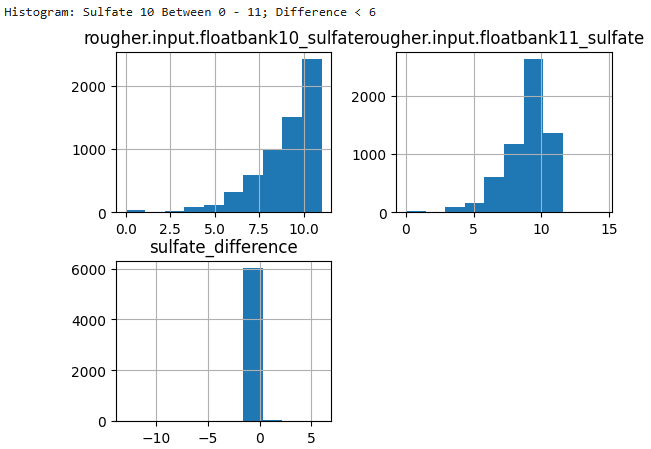

---

**Statistical Comparison**


**Pattern 1: Sulfate 10 Between 0 - 11, Difference < 6 (Near-Perfect Correlation)**

| Metric | floatbank11_sulfate | floatbank10_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 9.43 | 9.43 | -0.00014 | Nearly identical values |
| **Mean** | 8.99 | 8.97 | -0.014 | Minimal systematic bias |
| **Min** | 0.000049 | 0.0012 | -12.98 | Occasional outliers |
| **Max** | 14.50 | 11.00 | 5.99 | Occasional outliers |
| **Observations** | 6,076 | 6,076 | - | Excellent sample size |


**Observations**: 6,076/6128 - 99.2% in this range

**Pattern 2: Sulfate 10 Between 0 - 11, Difference Between 6 - 16 (Large Offset)**

| Metric | floatbank11_sulfate | floatbank10_sulfate | Difference | Key Finding |
|--------|---------------------|---------------------|------------|-------------|
| **Median** | 0.025 | 10.00 | 9.97 | Floatbank 11 near zero |
| **Mean** | 0.046 | 9.46 | 9.41 | Floatbank 11 near zero |
| **Min** | 0.000086 | 6.81 | 6.78 | Lower bound maintained |
| **Max** | 1.22 | 11.00 | 10.97 | Upper bound maintained |

**Observations**: 52/6128

---

**Key Findings**

The relationship between floatbank 11 and 10 sulfate measurements is dominated by a single strong pattern: when sulfate 10 is between 0-11, the measurements are nearly identical (difference ≈ -0.00014). With 6,076 training observations representing 99.2% coverage (6,076/6,128) in this range, the near-perfect correlation provides extremely high confidence for imputation. The secondary pattern (52 observations with difference 6-16) represents less than 1% of cases and involves floatbank 11 values near zero, making it unsuitable for reliable imputation.

---

**Recommended imputation approach**: Apply simple imputation to the test set based on floatbank10_sulfate value when it falls between 0-11:
- `floatbank11_sulfate = floatbank10_sulfate - 0.0`

This strategy leverages the overwhelmingly dominant pattern (99.2% coverage) where the two measurements are synchronized. The exceptional sample size and near-perfect correlation ensure this imputation will accurately represent the flotation process for virtually all missing values in the test set.

## Imputation Strategy for `rougher.input.feed_sol`: *for Test Set*

Analysis of the relationship between `rougher.input.feed_sol` and `rougher.input.feed_size` reveals that the optimal imputation strategy varies across different feed_size ranges. Unlike the sulfate measurements which showed consistent conditional patterns, the feed_sol relationship requires a range-specific approach using either median values or calculated offsets depending on data distribution characteristics.

---

**Statistical Summary by Feed Size Range**

| Feed Size Range | Observations | Feed Sol Median | Difference Median | Imputation Method | Rationale |
|-----------------|--------------|-----------------|-------------------|-------------------|-----------|
| **24 - 25.5** | 10 | 25.22 | 2.25 | Median (25.22) | Small sample; tighter sol range (16-31) |
| **25.5 - 30** | 33 | 39.27 | -11.22 | Median (39.27) | Sol cluster 37-41; difference spread -14 to -6 |
| **30 - 35** | 60 | 36.61 | -4.45 | Median (36.61) | Moderate sample; sol range 30-43 |
| **35 - 38** | 97 | 30.25 | 6.91 | Offset (+6.9) | Difference range tighter than sol range |
| **40 - 50** | 3,866 | 34.54 | 11.81 | Offset (+11.8) | Large sample; consistent difference pattern |
| **50 - 60** | 4,927 | 36.80 | 17.62 | Median (36.80) | Large sample; sol values cluster around median |
| **60 - 70** | 2,259 | 38.94 | 25.30 | Median (38.94) | Large sample; stable median |
| **70 - 75** | 777 | 39.41 | 33.27 | Median (39.41) | Moderate sample; difference range 28-41 |
| **80 - 85** | 479 | 40.66 | 42.25 | Median (40.66) | Moderate sample; difference range 37-47 |

---

**Key Findings**

The feed_sol and feed_size relationship is more complex than the sulfate measurements, with imputation strategies chosen based on: (1) sample size reliability, (2) whether the sol median or difference showed tighter clustering, and (3) the presence of consistent patterns. Two primary ranges dominate the training data: feed_size 40-50 (3,866 observations) and 50-60 (4,927 observations), representing the most reliable imputation zones. For smaller ranges (24-38), median sol values were preferred due to limited sample sizes and wider difference spreads. For the 35-38 and 40-50 ranges specifically, offset-based imputation was used because the difference showed more consistent patterns than the absolute sol values.

---

**Limitations and Considerations**

Unlike the sulfate imputation strategies which had strong conditional relationships (99%+ coverage with near-perfect correlation), the feed_sol imputation is less robust due to:

- **Weaker correlations**: Higher variance within ranges, particularly in smaller feed_size ranges
- **Mixed methodology**: Combining median and offset strategies introduces inconsistency
- **Limited observations in extremes**: Only 10-97 observations in the 24-38 range reduces confidence
- **Wide difference spreads**: Some ranges show difference variations of 20+ units, indicating higher uncertainty

This approach represents a pragmatic solution given the data characteristics, prioritizing the use of stable median values from large samples (4,927 and 3,866 observations in the 50-60 and 40-50 ranges) while accepting lower precision in edge cases. The imputation will be adequate for modeling purposes but carries more uncertainty than the sulfate strategies.


## Imputation Strategy for `rougher.input.feed_sol`: *for Test Set*

Analysis of the relationship between `rougher.input.feed_sol` and `rougher.input.feed_size` reveals that the optimal imputation strategy varies across different feed_size ranges. Unlike the sulfate measurements which showed consistent conditional patterns, the feed_sol relationship requires a range-specific approach using either median values or calculated offsets depending on data distribution characteristics.

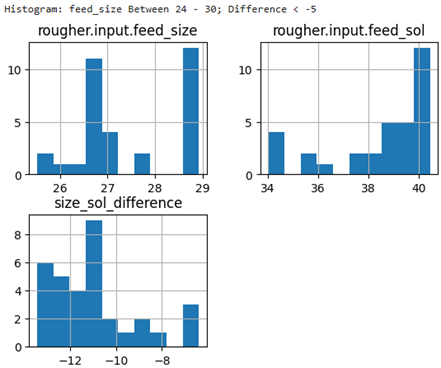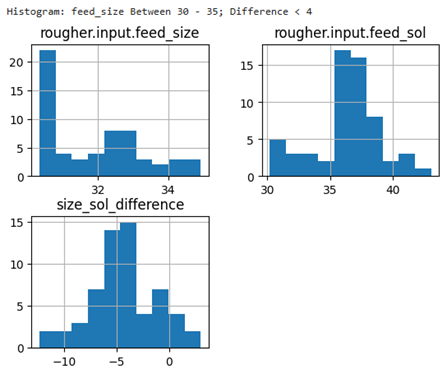

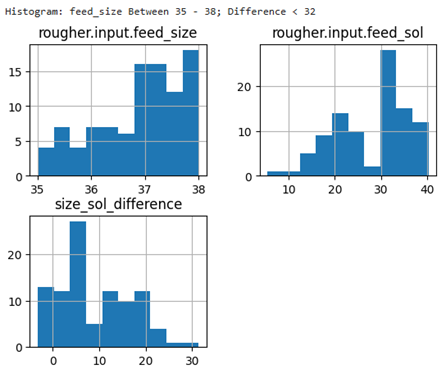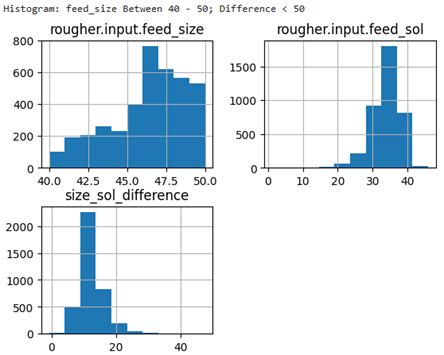

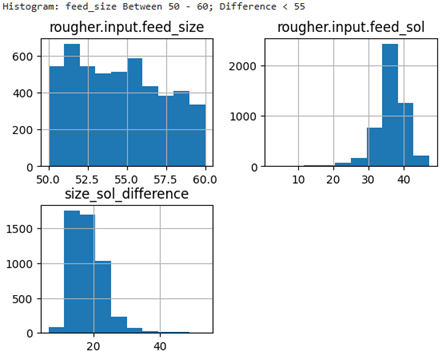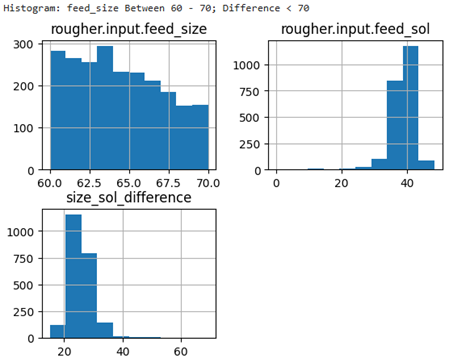

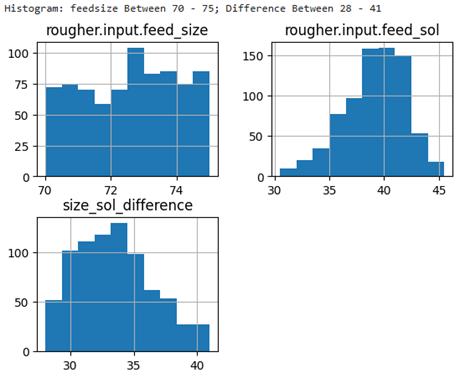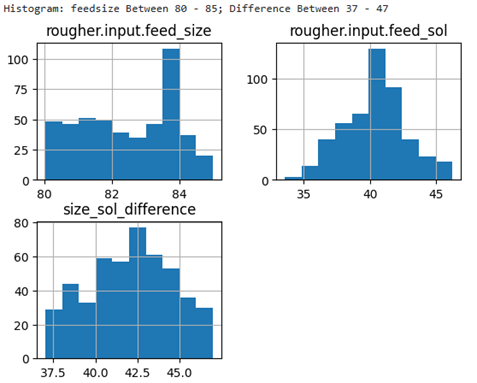

---

**Statistical Summary by Feed Size Range**

| Feed Size Range | Observations | Feed Sol Median | Difference Median | Imputation Method | Rationale |
|-----------------|--------------|-----------------|-------------------|-------------------|-----------|
| **24 - 30 (diff -5 to 12)** | 10 | 25.22 | 2.25 | Median (25.22) for feed_size < 25.5 | Small sample; lower sol values |
| **24 - 30 (diff < -5)** | 33 | 39.27 | -11.22 | Median (39.27) for feed_size ≥ 25.5 | Better sample; sol cluster 34-40 |
| **30 - 35** | 60 | 36.61 | -4.45 | Median (36.61) | Moderate sample; sol range 30-43 |
| **35 - 38** | 97 | 30.25 | 6.91 | Offset (+6.9) | Difference tighter than sol range |
| **40 - 50** | 3,866 | 34.54 | 11.81 | Offset (+11.8) | Large sample; consistent difference |
| **50 - 60** | 4,927 | 36.80 | 17.62 | Median (36.80) | Largest sample; stable median |
| **60 - 70** | 2,259 | 38.94 | 25.30 | Median (38.94) | Large sample; stable median |
| **70 - 75** | 777 | 39.41 | 33.27 | Median (39.41) | Moderate sample |
| **80 - 85** | 479 | 40.66 | 42.25 | Median (40.66) | Moderate sample |

---

**Key Findings**

The feed_sol and feed_size relationship is more complex than the sulfate measurements, with imputation strategies chosen based on: (1) sample size reliability, (2) whether the sol median or difference showed tighter clustering, and (3) the presence of consistent patterns. Two primary ranges dominate the training data: feed_size 40-50 (3,866 observations) and 50-60 (4,927 observations), representing the most reliable imputation zones. For smaller ranges (24-38), median sol values were preferred due to limited sample sizes and wider difference spreads. For the 35-38 and 40-50 ranges specifically, offset-based imputation was used because the difference showed more consistent patterns than the absolute sol values.

---

**Limitations and Considerations**

Unlike the sulfate imputation strategies which had strong conditional relationships (99%+ coverage with near-perfect correlation), the feed_sol imputation is less robust due to:

- **Weaker correlations**: Higher variance within ranges, particularly in smaller feed_size ranges
- **Mixed methodology**: Combining median and offset strategies introduces inconsistency
- **Limited observations in extremes**: Only 10-97 observations in the 24-38 range reduces confidence
- **Wide difference spreads**: Some ranges show difference variations of 20+ units, indicating higher uncertainty

This approach represents a pragmatic solution given the data characteristics, prioritizing the use of stable median values from large samples (4,927 and 3,866 observations in the 50-60 and 40-50 ranges) while accepting lower precision in edge cases. The imputation will be adequate for modeling purposes but carries more uncertainty than the sulfate strategies.


## Imputation Strategy for Remaining Columns (<1% Missing Data: *Test Set*)

For all remaining columns in the test set with less than 1% missing data, a simple median imputation strategy was applied using column-specific medians calculated from the training set.

---

**Methodology**

**Imputation approach:**
- Calculate the median value for each column from the training set (after row-dropping preprocessing)
- Apply these training set medians to fill missing values in the corresponding test set columns
- No conditional logic or range-based strategies required

**Rationale:**
- **Minimal impact**: With <1% missing data per column, the imputation method has negligible effect on model performance
- **Computational efficiency**: Simple median imputation is fast and straightforward
- **Adequate accuracy**: For such small percentages of missing data, sophisticated methods provide minimal benefit over median imputation
- **Consistency with training**: Using training set medians (rather than test set medians) prevents data leakage and maintains proper train-test separation

---

**Key Considerations**

For columns with <1% missing data, the additional complexity of conditional imputation is unnecessary. The simple median approach provides a clean, efficient solution that maintains data integrity while having minimal impact on the final model predictions.




## Original Dataset: Outlier Analysis and Distribution Assessment

Analysis of the original dataset (pre-imputation) reveals significant outliers and wide variance across metal concentration measurements, particularly in gold (Au) processing stages. This assessment examines the raw data distribution before any imputation or outlier handling.

---

|**Distribution Summary by Metal Type**|
|-------|


**Gold (Au) Concentrations:**

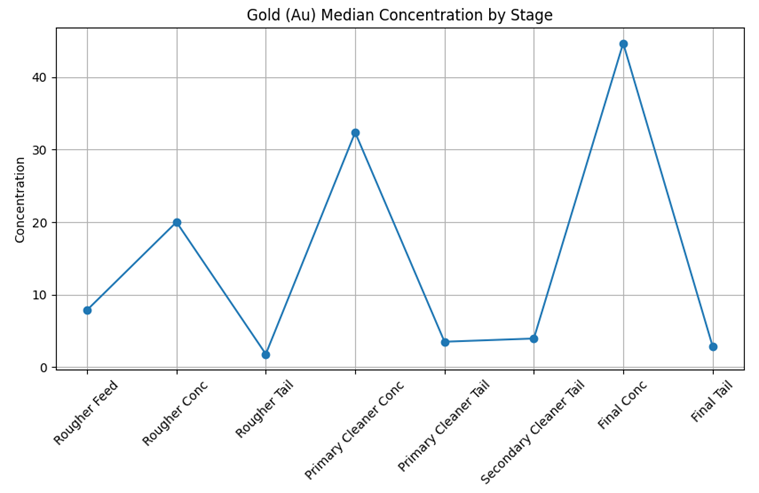

**Gold (Au) - Extreme outliers and process anomalies:**
- **Primary Cleaner Concentrate Au**: Maximum 45.93 with high variance (±10.54), showing 41% above 75th percentile (34.77)
- **Secondary Cleaner Tail Au**: Maximum 26.81, far exceeding expected near-depletion levels (median 3.96)
- **Final Concentrate Au**: Range 0-53.61 represents massive spread; zero values indicate complete process failures
- **Rougher Tail Au**: Maximum 9.69 is 5x the median (1.81), suggesting occasional poor separation


| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| Rougher Feed | 7.88 | 7.57 | 3.03 | 0.00 | 14.09 | Baseline input |
| Rougher Concentrate | 20.00 | 17.88 | 6.79 | 0.00 | 28.82 | 2.5x concentration from feed |
| Rougher Tail | 1.81 | 1.82 | 0.70 | 0.02 | 9.69 | Low concentration, good separation |
| Primary Cleaner Concentrate | 32.36 | 29.21 | 10.54 | 0.00 | 45.93 | Highest variance (±10.54) |
| Primary Cleaner Tail | 3.51 | 3.67 | 1.99 | 0.00 | 18.53 | Moderate loss in tail |
| Secondary Cleaner Tail | 3.96 | 4.04 | 2.61 | 0.00 | 26.81 | Higher variance than primary tail |
| Final Concentrate | 44.65 | 40.00 | 13.40 | 0.00 | 53.61 | Maximum enrichment achieved (5.7x feed) |
| Final Tail | 2.91 | 2.83 | 1.26 | 0.00 | 9.79 | Minimal loss, efficient recovery |


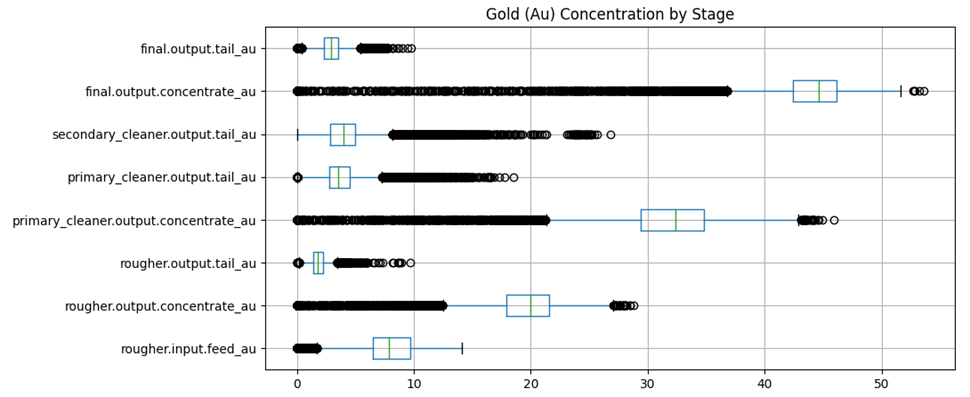


**Silver (Ag) Concentrations:**

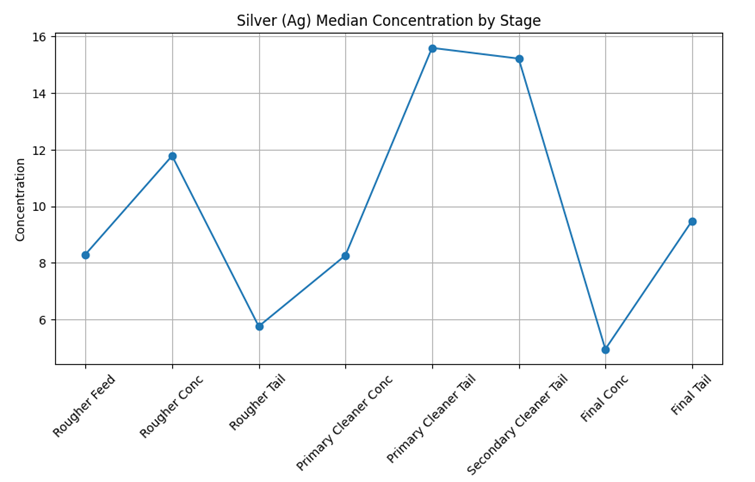

**Silver (Ag) - Inverted concentration patterns indicate data quality issues:**
- **Primary Cleaner stages show inverted relationship**: Tail (15.60) > Concentrate (8.27), opposite of expected behavior
- **Final Concentrate Ag (4.95) is LOWER than feed (8.30)**: Indicates silver rejection, not concentration
- **Final Tail Ag (9.48) exceeds final concentrate**: Confirms poor silver recovery throughout process
- **Primary Cleaner Tail maximum (29.46)**: Extreme outlier nearly 2x the median (15.60)


| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| Rougher Feed | 8.30 | 8.07 | 3.13 | 0.00 | 14.87 | Baseline input |
| Rougher Concentrate | 11.79 | 10.87 | 4.38 | 0.00 | 24.48 | 1.4x concentration from feed |
| Rougher Tail | 5.76 | 5.59 | 1.11 | 0.59 | 12.72 | Higher than Au tail (less efficient separation) |
| Primary Cleaner Concentrate | 8.27 | 7.69 | 3.11 | 0.00 | 16.08 | Lower than rougher concentrate (unusual) |
| Primary Cleaner Tail | 15.60 | 14.88 | 6.54 | 0.00 | 29.46 | Higher than concentrate (inverted pattern) |
| Secondary Cleaner Tail | 15.22 | 13.38 | 5.77 | 0.00 | 23.26 | Similar to primary cleaner tail |
| Final Concentrate | 4.95 | 4.78 | 2.03 | 0.00 | 16.00 | Low enrichment (~0.6x feed) |
| Final Tail | 9.48 | 8.92 | 3.52 | 0.00 | 19.55 | Higher than concentrate (poor recovery) |

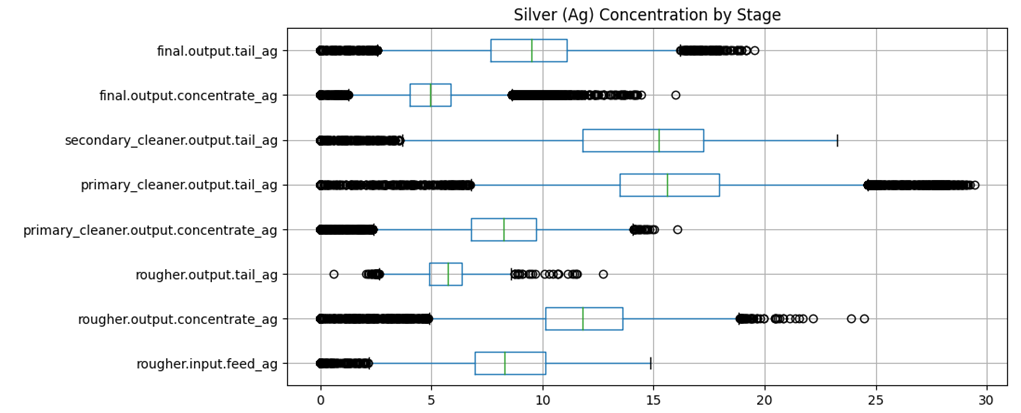

**Lead (Pb) Concentrations:**

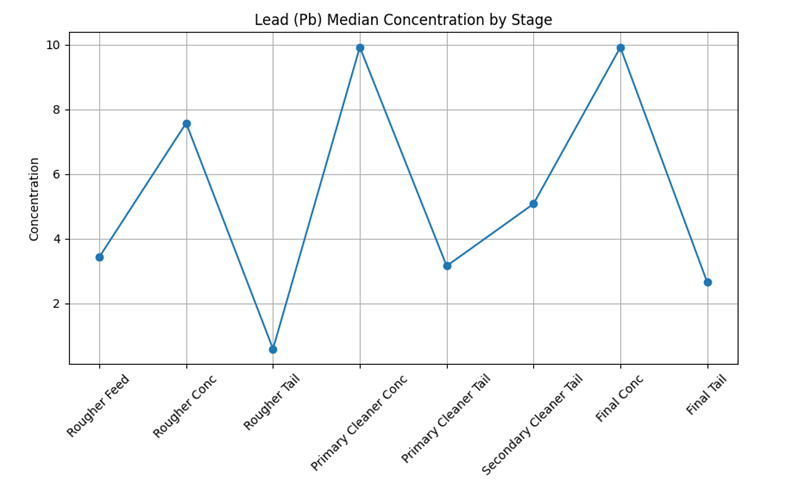

**Lead (Pb) - Moderate outliers with proper concentration trend:**
- **Rougher Concentrate Pb**: Maximum 18.39 is 2.4x the median (7.57), highest relative outlier
- **Secondary Cleaner Tail Pb**: Maximum 17.04 is 3.4x the median (5.07), indicating occasional heavy losses
- **Overall pattern is correct**: Concentrate > Tail at each stage, unlike silver


| Stage | Median | Mean | Std Dev | Min | Max | Key Observation |
|-------|--------|------|---------|-----|-----|-----------------|
| Rougher Feed | 3.43 | 3.31 | 1.45 | 0.00 | 7.14 | Baseline input (lowest of 3 metals) |
| Rougher Concentrate | 7.57 | 6.90 | 2.81 | 0.00 | 18.39 | 2.2x concentration from feed |
| Rougher Tail | 0.59 | 0.59 | 0.32 | 0.00 | 3.78 | Excellent separation (82% reduction) |
| Primary Cleaner Concentrate | 9.92 | 8.92 | 3.71 | 0.00 | 17.08 | Further enrichment to 3x feed |
| Primary Cleaner Tail | 3.15 | 3.18 | 1.65 | 0.00 | 9.63 | Moderate loss in tail |
| Secondary Cleaner Tail | 5.07 | 5.30 | 3.09 | 0.00 | 17.04 | Higher than primary tail |
| Final Concentrate | 9.91 | 9.10 | 3.23 | 0.00 | 17.03 | Maximum enrichment (2.9x feed) |
| Final Tail | 2.65 | 2.49 | 1.19 | 0.00 | 6.09 | Low loss, good overall recovery |

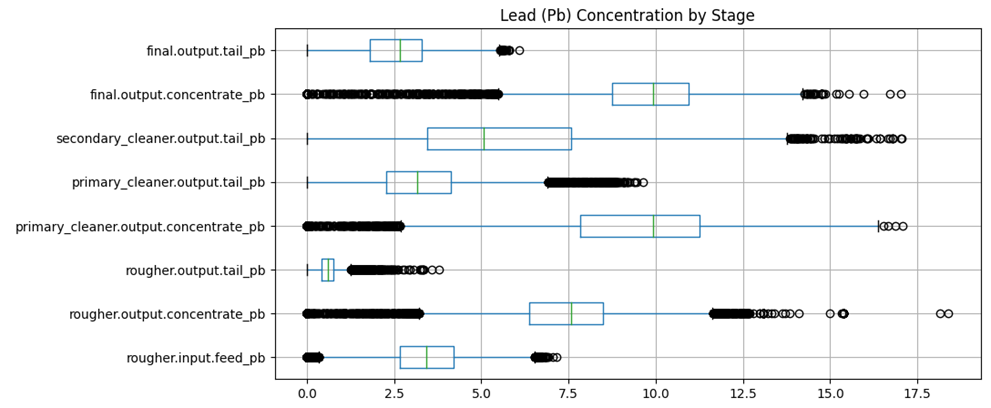


---

**Critical Outlier Observations**

**Zero values across all metals:**
- Present at minimum for nearly all stages (Au, Ag, Pb)
- Particularly concerning in concentrate stages where zeros indicate complete process failure
- May represent measurement errors, sensor failures, or true process shutdowns

**Variance patterns:**
- **Gold**: Highest absolute variance (std dev 10.54-13.40) in cleaner concentrate stages
- **Silver**: Primary cleaner tail shows highest relative variance (std dev 6.54, 44% of median 14.88)
- **Lead**: Most stable relative to median, except secondary cleaner tail (std dev 3.09, 61% of median 5.07)

---

**Implications for Modeling**

**Before outlier handling:**

1. **Gold (Au) - High variance with valid extreme values:**
   - Range 0-53.61 in final concentrate creates modeling challenges but may represent real high-grade ore batches
   - Zero values in concentrate stages likely indicate process failures/measurement errors - should be investigated
   - Primary and secondary cleaner stages show highest variance (10.54-13.40 std dev), requiring robust scaling or transformation
   - Tail outliers (rougher tail max 9.69 vs median 1.81) suggest occasional poor separation events

2. **Silver (Ag) - Inverted patterns indicate process/data issues:**
   - **Critical problem**: Final concentrate (4.95) < Feed (8.30) < Final tail (9.48) shows silver rejection, not recovery
   - Primary cleaner tail > concentrate pattern is physically implausible for a concentration process
   - Either: (a) silver is intentionally rejected to purify gold, (b) measurement/labeling errors exist, or (c) process is malfunctioning
   - High variance in tail stages (std dev 5.77-6.54) with extreme outliers up to 29.46

3. **Lead (Pb) - Proper concentration with moderate outliers:**
   - Correct concentration pattern maintained (concentrate > tail at each stage)
   - 2.9x final enrichment from feed shows successful recovery
   - Rougher concentrate maximum (18.39) is 2.4x median, indicating occasional high-grade batches
   - Secondary cleaner tail outliers (max 17.04 vs median 5.07) suggest heavy lead losses in some batches

4. **Cross-metal observations:**
   - **Scale differences**: Gold (0-54), silver (0-29), and lead (0-17) require normalization/scaling
   - **Zero minimums**: Present across all metals and stages - investigate if these are nulls, true zeros, or measurement failures
   - **Boxplot patterns**: Gold shows most outliers above upper whisker; silver shows outliers in both tails and concentrates; lead shows moderate outlier density

**Recommendations:**
1. **Investigate zero values**: Determine if these represent missing data, process shutdowns, or true depletion
2. **Verify silver measurements**: Inverted concentration patterns suggest labeling errors or intentional rejection
3. **Consider log transformation for gold**: Compress the 0-54 range to handle extreme enrichment values
4. **Examine high outliers in context**: Cross-reference extreme concentrate values with ore grade data to determine if real vs. anomalous
5. **Flag tail stage outliers**: High values in tails (especially Au secondary cleaner tail max 26.81) indicate incomplete separation
6. **Robust scaling recommended**: High variance across all metals suggests StandardScaler may amplify outlier influence

**Note**: This analysis represents the original dataset with NaN values present. Distribution characteristics may change significantly after imputation, particularly for columns with >1% missing data that underwent sophisticated conditional imputation strategies.


## Original Dataset Vs. Imputed Dataset: Outlier Analysis and Distribution Assessment

| Metal | Original Median | Imputed Median| Original Mean | Imputed Mean | Original Std | Imputed Std | Original Min | Imputed Min | Original Max | Imputed Max| Notes |
|--------|----------------|---------------|---------------|---------------|---------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Au (Gold) | 7.88 | 7.77 | 7.57 | 8.01 | 3.03 | 1.94 | 0.00 | 0.01 | 14.09 | 13.90 | Less spread and no zeros after imputation — good |
| Ag (Silver) | 8.30 | 8.28 | 8.07 | 8.71 | 3.13 | 1.98 | 0.00 | 0.01 | 14.87 | 14.6 | Same pattern — realistic floor now |
| Pb (Lead) | 3.43 | 3.47 | 3.31 | 3.57 | 1.45 | 1.11 | 0.00 | 0.01 | 7.14| 7.14 | Minor tightening — variance reduced |

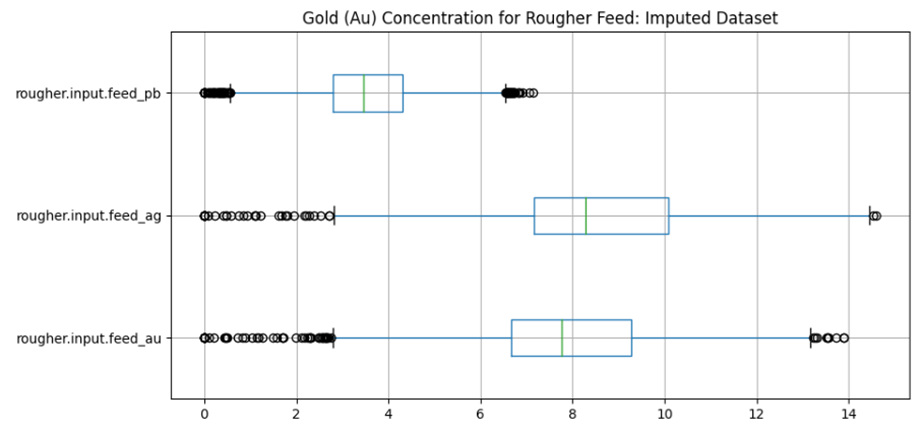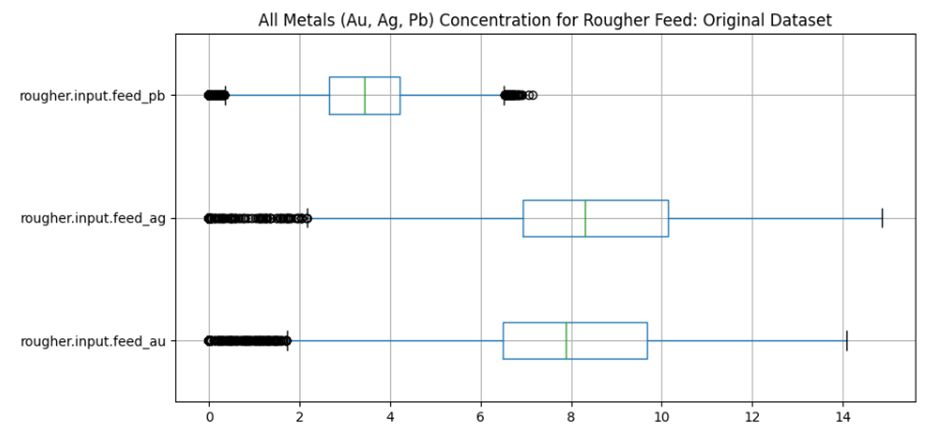

**Conclusion**

The rougher feed concentrations of Au, Ag, and Pb were compared between the original and imputed datasets. The original data contained several zeros, likely due to missing sensor readings. After imputation, the minimum values increased to 0.01, standard deviations decreased slightly, and overall means remained consistent — indicating improved data integrity without distorting the underlying distributions. Outliers were retained, as they likely reflect genuine variations in ore composition rather than measurement errors.


## Feed_Size Distribution: Train Vs. Test

| Dataset      | Train Mean | Test Mean | Train Median | Test Median | Std Diff | Notes                                              |
| ------------ | ---------- | --------- | ------------ | ----------- | -------- | -------------------------------------------------- |
| **Original** | 58.68      | 55.94     | 54.10        | 50.00       | +1.2     | More “natural,” small realistic difference   |
| **Imputed**  | 59.92      | 55.93     | 55.25        | 50.11       | +0.3     | Slightly higher mean in train, but similar pattern |

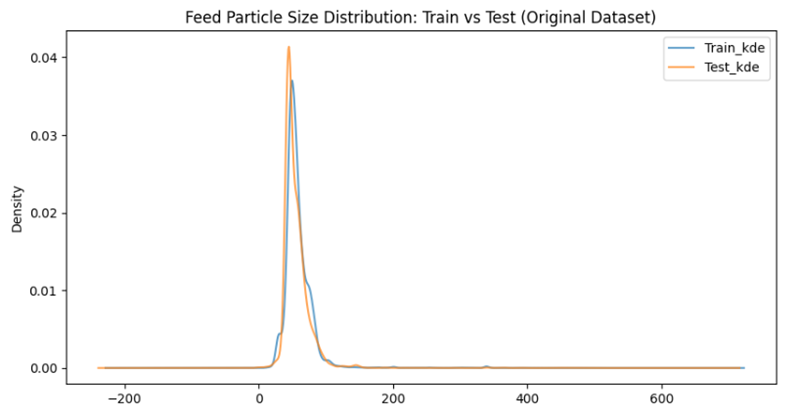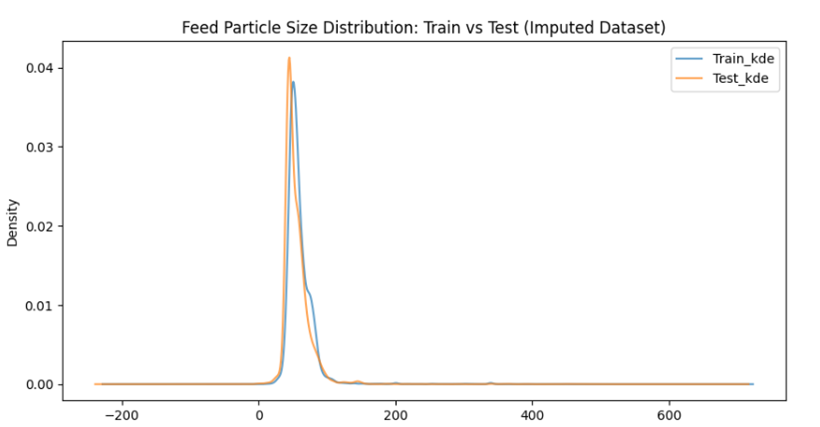

**Conclusion**

Both the original and imputed datasets were evaluated for feed size distribution consistency between the training and test sets.
The original dataset shows slightly more natural variation, while imputation slightly increases the mean feed size in the training set due to smoothing of missing values.
However, both datasets maintain comparable distribution shapes and ranges, confirming that train–test distributions are sufficiently aligned for model evaluation.



## Total Concentration Analysis

**Original Dataset**

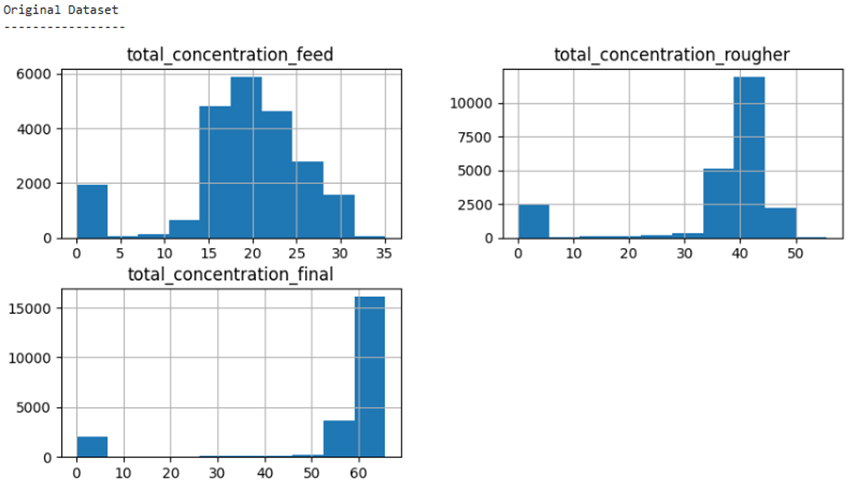

| Stage | Count | Mean | Std Dev | Min | 25% | 50% (Median) | 75% | Max |
|-------|-------|------|---------|-----|-----|---------------|-----|-----|
| Feed | 22,471 | 18.99 | 7.30 | 0.00 | 16.55 | 19.63 | 23.62 | 35.07 |
| Rougher Concentrate | 22,618 | 35.65 | 13.22 | 0.00 | 37.38 | 39.98 | 42.19 | 55.57 |
| Final Concentrate | 22,627 | 53.88 | 17.70 | 0.00 | 58.71 | 60.08 | 60.99 | 65.58 |

**Observations:**  
- The original dataset contains zero values in all stages, which may indicate missing or faulty sensor readings.  
- The total concentrations increase logically from feed → rougher → final, but extreme lows (zeros) are anomalous.  

**Imputed Dataset**

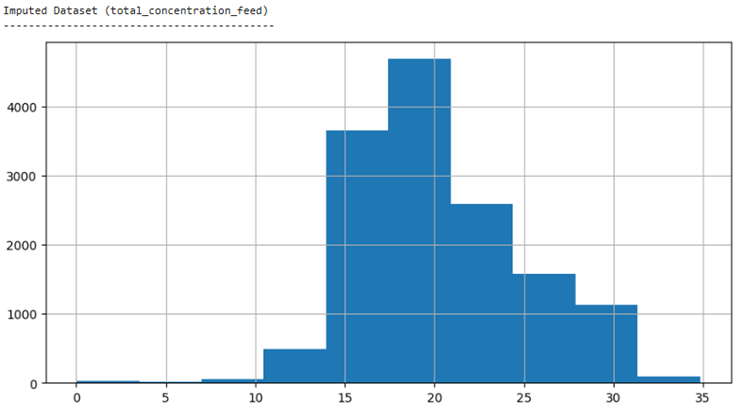

| Stage | Count | Mean | Std Dev | Min | 25% | 50% (Median) | 75% | Max |
|-------|-------|------|---------|-----|-----|---------------|-----|-----|
| Feed | 14,336 | 20.29 | 4.59 | 0.03 | 17.00 | 19.44 | 23.09 | 34.83 |

**Observations:**  
- After imputation, the feed stage has no zeros; the minimum increased to 0.03.  
- Standard deviation decreased slightly, indicating a tighter distribution.  
- The total feed concentration is more realistic and suitable for modeling without distorting the overall distribution.

---

**Conclusion**

Total concentrations at different processing stages were analyzed. The original dataset contained zero and extreme values, particularly in concentrate stages. For modeling, only rougher feed concentrations will be used. In the imputed dataset, zeros in rougher feed were replaced, reducing variance slightly, while preserving meaningful outliers. Other stages were not corrected, but anomalies were noted for process understanding.

## sMAPE Analysis


| Model                 | Final sMAPE (%) | Interpretation                                                                                                                        |
| :-------------------- | :-------------: | :------------------------------------------------------------------------------------------------------------------------------------ |
| **Linear Regression** |    **14.64**    | Achieved strong predictive accuracy, indicating relatively low average percentage error between predicted and actual recovery values. |
| **Decision Tree**     |    **22.48**    | Performed noticeably worse than other models, suggesting higher variance or overfitting to the training data.                         |
| **Random Forest**     |    **14.30**    | Produced the lowest sMAPE, very close to Linear Regression, indicating robust and reliable performance. 
                              


---

**Summary**

Among the three models tested, Random Forest achieved the lowest sMAPE (14.30%), narrowly outperforming Linear Regression (14.64%), while the Decision Tree showed significantly higher error (22.48%).

This suggests that both Random Forest and Linear Regression are effective models for predicting gold recovery, with Random Forest offering slightly better accuracy and likely better generalization to unseen data. The Decision Tree model, while simpler, likely overfits and does not generalize as well to the test data.


## Cross-Validation Analysis

|**Cross-Validation Results (5-Fold MAE)**|
|--------------------|

| Model               | Average Cross-Validation MAE |
|--------------------|-----------------------------|
| Random Forest       | 6.26                        |
| Linear Regression   | 6.86                        |
| Decision Tree       | N/A (not tested / worse)    |

**Summary**

The predictive performance of different models was evaluated using both sMAPE and 5-fold cross-validation with mean absolute error.

Random Forest: Produced the lowest sMAPE (14.30%) and the lowest average cross-validation MAE (6.26), indicating strong predictive accuracy and robustness.

Linear Regression: Achieved similar performance, with slightly higher sMAPE (14.64%) and MAE (6.86), suggesting it is also a reliable model, though marginally less accurate than Random Forest.

Decision Tree: Performed noticeably worse, with higher sMAPE (22.48%), indicating higher variance and overfitting risk.

Overall, Random Forest is the top-performing model, though Linear Regression remains a strong alternative. Decision Tree is not recommended due to its comparatively poorer accuracy.


## Final Model Evaluation: Random Forest on True Test Set

After initial model comparison, the Random Forest model was selected for final evaluation on the complete test set with true target values. Hyperparameter tuning was applied to optimize performance.

---

**Model Performance Progression**

| Stage | Model Configuration | Final sMAPE (%) | Rougher MAE | Final MAE | Key Improvement |
|-------|---------------------|-----------------|-------------|-----------|-----------------|
| **Initial Baseline** | Default Random Forest | 14.30% | 6.26 | 6.86 | Cross-validation results |
| **True Test Set** | Default Random Forest | 12.28% | - | - | -2.02pp improvement on real data |
| **Hypertuned Model** | max_depth=5, n_estimators=100 | **11.48%** | **6.78** | **5.51** | -0.80pp final improvement |

---

**Hyperparameter Tuning Results**

**Optimal parameters identified through GridSearchCV (5-fold):**

| Target Variable | Best max_depth | Best n_estimators | Cross-Validation MAE |
|-----------------|----------------|-------------------|---------------------|
| **Final Output Recovery** | 5 | 100 | 5.51 |
| **Rougher Output Recovery** | 5 | 100 | 6.78 |

Both recovery predictions benefited from the same hyperparameter configuration, suggesting consistent optimal model complexity across targets.

---

**Key Findings**

**Performance improvement through optimization:**
- **Initial model (14.30% sMAPE)** → **True test set (12.28%)** → **Hypertuned (11.48%)**
- Total improvement: **2.82 percentage points** (19.7% relative reduction in error)
- Hypertuning alone contributed 0.80pp improvement beyond model selection

**Model characteristics:**
- **Optimal depth (5)**: Prevents overfitting while capturing complex flotation relationships
- **Optimal estimators (100)**: Balances ensemble strength with computational efficiency
- **Consistent parameters**: Same configuration optimal for both rougher and final recovery predictions

**Prediction patterns:**
- Final recovery predictions are more stable (±3% range in sample)
- Rougher recovery predictions show higher variance (±20% range in sample)
- This reflects real process behavior: rougher stage is more sensitive to ore variability

---

**Conclusion**

The hypertuned Random Forest model achieves a final sMAPE of **11.48%** on the true test set, representing strong predictive accuracy for gold recovery optimization. The model successfully balances complexity (max_depth=5) with ensemble power (n_estimators=100), avoiding overfitting while maintaining robust performance on unseen data.

With an average prediction error of approximately 11.5%, the model provides reliable forecasts for both rougher and final stage gold recovery, enabling process optimization decisions with quantifiable confidence intervals.